In [1]:
import pandas as pd
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

#from google.colab import files
import io

train_df = pd.read_csv('data/train_df.csv')
print(train_df.head)

test_df = pd.read_csv('data/test_df.csv')
print(test_df.head)


<bound method NDFrame.head of       tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
1          0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
2          0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
3          0.276629      -0.016570      -0.115362     -0.998139     -0.980817   
4          0.277199      -0.010098      -0.105137     -0.997335     -0.990487   
...             ...            ...            ...           ...           ...   
7346       0.299665      -0.057193      -0.181233     -0.195387      0.039905   
7347       0.273853      -0.007749      -0.147468     -0.235309      0.004816   
7348       0.273387      -0.017011      -0.045022     -0.218218     -0.103822   
7349       0.289654      -0.018843      -0.158281     -0.219139     -0.111412   
7350       0.351503      -0.012423      -0.203867     -0.269270     -0.087212  

In [2]:
print(train_df.drop(['activity_name'], axis = 1))

train_df_2 = train_df.drop(['activity_name'], axis = 1)

train_arr = train_df_2.to_numpy()

x_train = train_arr[:, 0:561]
print(x_train.shape)

print(train_arr[:, 562])
y_train = train_arr[:, 562]
print(y_train.shape)

      tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
1          0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
2          0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
3          0.276629      -0.016570      -0.115362     -0.998139     -0.980817   
4          0.277199      -0.010098      -0.105137     -0.997335     -0.990487   
...             ...            ...            ...           ...           ...   
7346       0.299665      -0.057193      -0.181233     -0.195387      0.039905   
7347       0.273853      -0.007749      -0.147468     -0.235309      0.004816   
7348       0.273387      -0.017011      -0.045022     -0.218218     -0.103822   
7349       0.289654      -0.018843      -0.158281     -0.219139     -0.111412   
7350       0.351503      -0.012423      -0.203867     -0.269270     -0.087212   

      tBodyAccstdZ  tBodyAc

In [3]:
#process test data
print(test_df.head)
test_df_2 = test_df.drop(['activity_name'], axis = 1)
print(test_df_2)

test_arr = test_df_2.to_numpy()

x_test = test_arr[:, 0:561]
print(x_test.shape)

print(test_arr[:, 562])
y_test = test_arr[:, 562]
print(y_test.shape)

<bound method NDFrame.head of       tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.286027      -0.013163      -0.119083     -0.975415     -0.967458   
1          0.275485      -0.026050      -0.118152     -0.993819     -0.969926   
2          0.270298      -0.032614      -0.117520     -0.994743     -0.973268   
3          0.274833      -0.027848      -0.129527     -0.993852     -0.967445   
4          0.279220      -0.018620      -0.113902     -0.994455     -0.970417   
...             ...            ...            ...           ...           ...   
2941       0.310155      -0.053391      -0.099109     -0.287866     -0.140589   
2942       0.363385      -0.039214      -0.105915     -0.305388      0.028148   
2943       0.349966       0.030077      -0.115788     -0.329638     -0.042143   
2944       0.237594       0.018467      -0.096499     -0.323114     -0.229775   
2945       0.153627      -0.018437      -0.137018     -0.330046     -0.195253  

In [4]:
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

print("Machine learning libraries loaded")

Machine learning libraries loaded


In [5]:
print (x_train.shape)
print (x_test.shape)

(7351, 561)
(2946, 561)


In [6]:
input_shape = x_train.shape[1]
inputs = Input(shape=(input_shape))

#Encoder
encoded = Dense(350, activation='relu')(inputs)
encoded = Dense(150, activation='relu')(encoded)

#Decoder
decoded = Dense(350, activation='relu')(encoded)
decoded = Dense(input_shape)(decoded)

#Model setup, summary and compilation
deep_autoencoder = Model(inputs, decoded)
deep_autoencoder.summary()
deep_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense (Dense)                (None, 350)               196700    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               52650     
_________________________________________________________________
dense_2 (Dense)              (None, 350)               52850     
_________________________________________________________________
dense_3 (Dense)              (None, 561)               196911    
Total params: 499,111
Trainable params: 499,111
Non-trainable params: 0
_________________________________________________________________


In [7]:
#normalize data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
#x_train -= mean
#x_train /= std
#x_test -= mean
#x_test /= std

In [8]:
batch_size = 256

history = deep_autoencoder.fit(
    x_train,
    x_train,
    epochs=500,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/500
23/23 [==============================] - 0s 14ms/step - loss: 0.1693 - accuracy: 0.0588 - val_loss: 0.0437 - val_accuracy: 0.2746
Epoch 2/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0387 - accuracy: 0.1495 - val_loss: 0.0304 - val_accuracy: 0.2352
Epoch 3/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0317 - accuracy: 0.1578 - val_loss: 0.0261 - val_accuracy: 0.1876
Epoch 4/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0265 - accuracy: 0.1609 - val_loss: 0.0225 - val_accuracy: 0.1903
Epoch 5/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0231 - accuracy: 0.1767 - val_loss: 0.0209 - val_accuracy: 0.1768
Epoch 6/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0212 - accuracy: 0.1685 - val_loss: 0.0194 - val_accuracy: 0.1734
Epoch 7/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.1781 - val_loss: 0.0179 - val_accuracy: 0.2087
Epoch 8/500


Epoch 59/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 0.3247 - val_loss: 0.0058 - val_accuracy: 0.3263
Epoch 60/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 0.3306 - val_loss: 0.0057 - val_accuracy: 0.2740
Epoch 61/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 0.3179 - val_loss: 0.0058 - val_accuracy: 0.2971
Epoch 62/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 0.3199 - val_loss: 0.0057 - val_accuracy: 0.3555
Epoch 63/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 0.3264 - val_loss: 0.0057 - val_accuracy: 0.3270
Epoch 64/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 0.3207 - val_loss: 0.0056 - val_accuracy: 0.3304
Epoch 65/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 0.3204 - val_loss: 0.0065 - val_accuracy: 0.3542
Epoch 

23/23 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.3536 - val_loss: 0.0045 - val_accuracy: 0.3555
Epoch 117/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.3716 - val_loss: 0.0044 - val_accuracy: 0.3542
Epoch 118/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.3449 - val_loss: 0.0045 - val_accuracy: 0.3970
Epoch 119/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.3558 - val_loss: 0.0045 - val_accuracy: 0.3977
Epoch 120/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 0.3519 - val_loss: 0.0046 - val_accuracy: 0.3800
Epoch 121/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.3537 - val_loss: 0.0043 - val_accuracy: 0.3569
Epoch 122/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0038 - accuracy: 0.3519 - val_loss: 0.0044 - val_accuracy: 0.3793
Epoch 123/500

23/23 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.3653 - val_loss: 0.0039 - val_accuracy: 0.4201
Epoch 174/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0035 - accuracy: 0.3622 - val_loss: 0.0040 - val_accuracy: 0.3685
Epoch 175/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.3645 - val_loss: 0.0039 - val_accuracy: 0.4058
Epoch 176/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.3658 - val_loss: 0.0038 - val_accuracy: 0.3501
Epoch 177/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.3774 - val_loss: 0.0039 - val_accuracy: 0.3895
Epoch 178/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.3672 - val_loss: 0.0039 - val_accuracy: 0.3283
Epoch 179/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.3801 - val_loss: 0.0038 - val_accuracy: 0.2760
Epoch 180/500

23/23 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 0.3842 - val_loss: 0.0042 - val_accuracy: 0.3895
Epoch 231/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.3738 - val_loss: 0.0037 - val_accuracy: 0.4208
Epoch 232/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 0.3832 - val_loss: 0.0036 - val_accuracy: 0.4398
Epoch 233/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 0.3842 - val_loss: 0.0036 - val_accuracy: 0.4215
Epoch 234/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 0.3898 - val_loss: 0.0036 - val_accuracy: 0.4242
Epoch 235/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.3624 - val_loss: 0.0037 - val_accuracy: 0.3882
Epoch 236/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 0.3719 - val_loss: 0.0037 - val_accuracy: 0.4528
Epoch 237/500

23/23 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3767 - val_loss: 0.0035 - val_accuracy: 0.4854
Epoch 288/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3764 - val_loss: 0.0035 - val_accuracy: 0.4065
Epoch 289/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3976 - val_loss: 0.0035 - val_accuracy: 0.4174
Epoch 290/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 0.3978 - val_loss: 0.0039 - val_accuracy: 0.4575
Epoch 291/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3879 - val_loss: 0.0035 - val_accuracy: 0.4004
Epoch 292/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3929 - val_loss: 0.0036 - val_accuracy: 0.4004
Epoch 293/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 0.3908 - val_loss: 0.0035 - val_accuracy: 0.4290
Epoch 294/500

23/23 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3915 - val_loss: 0.0034 - val_accuracy: 0.5221
Epoch 345/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3823 - val_loss: 0.0036 - val_accuracy: 0.4330
Epoch 346/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3857 - val_loss: 0.0034 - val_accuracy: 0.4276
Epoch 347/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3920 - val_loss: 0.0035 - val_accuracy: 0.4378
Epoch 348/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 0.3798 - val_loss: 0.0035 - val_accuracy: 0.4099
Epoch 349/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3949 - val_loss: 0.0035 - val_accuracy: 0.4589
Epoch 350/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3934 - val_loss: 0.0034 - val_accuracy: 0.4235
Epoch 351/500

23/23 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.4003 - val_loss: 0.0034 - val_accuracy: 0.3936
Epoch 402/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.3995 - val_loss: 0.0034 - val_accuracy: 0.4133
Epoch 403/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3872 - val_loss: 0.0036 - val_accuracy: 0.3882
Epoch 404/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.3961 - val_loss: 0.0033 - val_accuracy: 0.4630
Epoch 405/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.4102 - val_loss: 0.0034 - val_accuracy: 0.4140
Epoch 406/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3930 - val_loss: 0.0036 - val_accuracy: 0.4514
Epoch 407/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3917 - val_loss: 0.0034 - val_accuracy: 0.4358
Epoch 408/500

23/23 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.3944 - val_loss: 0.0033 - val_accuracy: 0.4256
Epoch 459/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.3961 - val_loss: 0.0033 - val_accuracy: 0.5282
Epoch 460/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3724 - val_loss: 0.0033 - val_accuracy: 0.4086
Epoch 461/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.4056 - val_loss: 0.0033 - val_accuracy: 0.4915
Epoch 462/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.4056 - val_loss: 0.0033 - val_accuracy: 0.3066
Epoch 463/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.3881 - val_loss: 0.0033 - val_accuracy: 0.3753
Epoch 464/500
23/23 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.3968 - val_loss: 0.0034 - val_accuracy: 0.4079
Epoch 465/500

In [9]:
# use our encoded layer to encode the training input
def encodeX(X):
  encoder = Model(inputs, encoded)
  encoded_X = encoder(X).numpy()
  return encoded_X

encoded_X_train = encodeX(x_train)
encoded_X_test = encodeX(x_test)

print(encoded_X_train)
print(encoded_X_test)

[[0.         0.56831014 0.6922952  ... 0.9259902  0.7164864  0.824131  ]
 [0.         1.19947    0.5400694  ... 0.88846004 0.74954337 0.57898736]
 [0.         1.3222282  0.08359822 ... 0.6121713  0.58099926 0.584764  ]
 ...
 [0.         0.38417414 0.4580671  ... 1.3903906  0.9749763  1.439644  ]
 [0.         0.54931325 0.472951   ... 1.1965426  0.77475464 1.4557865 ]
 [0.         0.7545241  0.8839745  ... 0.91167897 0.9894682  1.0760337 ]]
[[0.         1.0550773  0.43934235 ... 1.1640631  0.85597295 0.29807237]
 [0.         1.0371712  0.33362973 ... 0.6971621  0.34402803 0.51598704]
 [0.         1.0623838  0.45755637 ... 0.79460734 0.2872949  0.64955896]
 ...
 [0.         0.86089146 0.21577802 ... 0.8035204  1.2220514  1.0286604 ]
 [0.         0.9191569  0.4685221  ... 0.68322533 0.8388373  1.2901887 ]
 [0.         1.046516   0.3547133  ... 0.6661316  1.0498524  1.5110426 ]]


In [10]:
#Use the transformed data to make predictions 
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC(C=10, gamma= 0.01)
#train model
svc.fit(encoded_X_train, y_train)
#test
y_pred = svc.predict(encoded_X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9097080787508486
[[473   7  16   0   0   0]
 [ 27 423  13   0   7   0]
 [ 11  43 364   0   2   0]
 [  0   4   0 416  57  14]
 [  0   4   0  41 487   0]
 [ 18   1   0   1   0 517]]
              precision    recall  f1-score   support

         1.0       0.89      0.95      0.92       496
         2.0       0.88      0.90      0.89       470
         3.0       0.93      0.87      0.90       420
         4.0       0.91      0.85      0.88       491
         5.0       0.88      0.92      0.90       532
         6.0       0.97      0.96      0.97       537

    accuracy                           0.91      2946
   macro avg       0.91      0.91      0.91      2946
weighted avg       0.91      0.91      0.91      2946



# Look at the number of outcome nodes on classification accuracy

In [11]:
component_list = [2, 3, 4]
mid_node_list = [150, 150, 150]
for i in range(5, 100, 5):
    component_list.append(i)
    mid_node_list.append(150)
    
for i in range(100, 550, 50):
    component_list.append(i)
    mid_node_list.append(i+50)
    
for j in range(len(component_list)):
  print(str(component_list[j]) + " " + str(mid_node_list[j]))


2 150
3 150
4 150
5 150
10 150
15 150
20 150
25 150
30 150
35 150
40 150
45 150
50 150
55 150
60 150
65 150
70 150
75 150
80 150
85 150
90 150
95 150
100 150
150 200
200 250
250 300
300 350
350 400
400 450
450 500
500 550


In [12]:
#setting up models
from sklearn.metrics import explained_variance_score

def predict_y(x_train, x_test, y_train, y_test):
    #Use the transformed data to make predictions 
    from sklearn.svm import SVC
    from sklearn import metrics

    svc = SVC(C=10, gamma= 0.01)
    #train model
    svc.fit(x_train, y_train)
    #test
    y_pred = svc.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    #var = metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average')
    print(acc)
    #print(metrics.confusion_matrix(y_test, y_pred))
    #print(metrics.classification_report(y_test, y_pred))

    return acc

component_acc = []
component_var = []

for c in range(len(component_list)):
    input_shape = x_train.shape[1]
    inputs = Input(shape=(input_shape))

    #Encoder
    encoded = Dense(mid_node_list[c], activation='relu')(inputs)
    encoded = Dense(component_list[c], activation='relu')(encoded)

    #Decoder
    decoded = Dense(mid_node_list[c], activation='relu')(encoded)
    decoded = Dense(input_shape)(decoded)

    #Model setup, summary and compilation
    deep_autoencoder = Model(inputs, decoded)
    deep_autoencoder.summary()
    deep_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), 
                             loss=tf.keras.losses.MeanSquaredError(), 
                             metrics=['accuracy'])

    #training the models

    batch_size = 512

    history = deep_autoencoder.fit(
        x_train,
        x_train,
        epochs=500,
        batch_size=batch_size,
        validation_split=0.2
    )

    #Encode X data
    encoder = Model(inputs, encoded)
    encoded_X_train = encoder(x_train).numpy()
    encoded_X_test = encoder(x_test).numpy()
    
    #variation looks at how the encoding/decoding affects
    y_var = deep_autoencoder.predict(x_test)
    variation = metrics.explained_variance_score(x_test, y_var, multioutput='uniform_average')
    
    accuracy = predict_y(encoded_X_train, encoded_X_test, y_train, y_test)
    component_acc.append(accuracy)
    component_var.append(variation)

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               84300     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 302       
_________________________________________________________________
dense_6 (Dense)              (None, 150)               450       
_________________________________________________________________
dense_7 (Dense)              (None, 561)               84711     
Total params: 169,763
Trainable params: 169,763
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
12/12 [==============================] - 0s 18ms/step - loss: 0.4834 - accuracy: 5.1020e-04 - val_loss

12/12 [==============================] - 0s 9ms/step - loss: 0.0367 - accuracy: 0.1340 - val_loss: 0.0322 - val_accuracy: 0.1176
Epoch 52/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0366 - accuracy: 0.1190 - val_loss: 0.0322 - val_accuracy: 0.1863
Epoch 53/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0365 - accuracy: 0.1168 - val_loss: 0.0322 - val_accuracy: 0.1360
Epoch 54/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0365 - accuracy: 0.1321 - val_loss: 0.0321 - val_accuracy: 0.1305
Epoch 55/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0364 - accuracy: 0.1182 - val_loss: 0.0321 - val_accuracy: 0.1353
Epoch 56/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0363 - accuracy: 0.1218 - val_loss: 0.0320 - val_accuracy: 0.1666
Epoch 57/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0363 - accuracy: 0.1194 - val_loss: 0.0320 - val_accuracy: 0.1407
Epoch 58/500
12/12 

12/12 [==============================] - 0s 9ms/step - loss: 0.0341 - accuracy: 0.1869 - val_loss: 0.0301 - val_accuracy: 0.2665
Epoch 109/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0341 - accuracy: 0.1915 - val_loss: 0.0301 - val_accuracy: 0.2196
Epoch 110/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0341 - accuracy: 0.2269 - val_loss: 0.0300 - val_accuracy: 0.1781
Epoch 111/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0340 - accuracy: 0.1927 - val_loss: 0.0299 - val_accuracy: 0.1808
Epoch 112/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0340 - accuracy: 0.2241 - val_loss: 0.0299 - val_accuracy: 0.2549
Epoch 113/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0340 - accuracy: 0.1872 - val_loss: 0.0299 - val_accuracy: 0.2583
Epoch 114/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0340 - accuracy: 0.2267 - val_loss: 0.0299 - val_accuracy: 0.3419
Epoch 115/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0331 - accuracy: 0.2667 - val_loss: 0.0291 - val_accuracy: 0.3127
Epoch 166/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0332 - accuracy: 0.2483 - val_loss: 0.0291 - val_accuracy: 0.2461
Epoch 167/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0331 - accuracy: 0.2531 - val_loss: 0.0291 - val_accuracy: 0.3569
Epoch 168/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0331 - accuracy: 0.2170 - val_loss: 0.0292 - val_accuracy: 0.3154
Epoch 169/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0331 - accuracy: 0.2667 - val_loss: 0.0291 - val_accuracy: 0.2359
Epoch 170/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0331 - accuracy: 0.2512 - val_loss: 0.0291 - val_accuracy: 0.3141
Epoch 171/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0331 - accuracy: 0.2588 - val_loss: 0.0291 - val_accuracy: 0.2794
Epoch 172/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.2825 - val_loss: 0.0290 - val_accuracy: 0.2658
Epoch 223/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.2876 - val_loss: 0.0289 - val_accuracy: 0.3351
Epoch 224/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.2738 - val_loss: 0.0289 - val_accuracy: 0.2624
Epoch 225/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0328 - accuracy: 0.2849 - val_loss: 0.0290 - val_accuracy: 0.1638
Epoch 226/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0328 - accuracy: 0.2639 - val_loss: 0.0290 - val_accuracy: 0.3372
Epoch 227/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.2366 - val_loss: 0.0290 - val_accuracy: 0.3603
Epoch 228/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.2905 - val_loss: 0.0289 - val_accuracy: 0.2196
Epoch 229/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0326 - accuracy: 0.3003 - val_loss: 0.0288 - val_accuracy: 0.2373
Epoch 280/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.2429 - val_loss: 0.0288 - val_accuracy: 0.3148
Epoch 281/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0327 - accuracy: 0.2760 - val_loss: 0.0289 - val_accuracy: 0.4385
Epoch 282/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0326 - accuracy: 0.2867 - val_loss: 0.0288 - val_accuracy: 0.3413
Epoch 283/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0326 - accuracy: 0.2665 - val_loss: 0.0287 - val_accuracy: 0.3936
Epoch 284/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0326 - accuracy: 0.2696 - val_loss: 0.0288 - val_accuracy: 0.2998
Epoch 285/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0326 - accuracy: 0.2619 - val_loss: 0.0287 - val_accuracy: 0.4106
Epoch 286/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 0.3114 - val_loss: 0.0285 - val_accuracy: 0.3392
Epoch 337/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 0.2804 - val_loss: 0.0286 - val_accuracy: 0.2814
Epoch 338/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 0.2641 - val_loss: 0.0285 - val_accuracy: 0.2019
Epoch 339/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 0.2874 - val_loss: 0.0286 - val_accuracy: 0.4895
Epoch 340/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 0.2990 - val_loss: 0.0285 - val_accuracy: 0.4779
Epoch 341/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0324 - accuracy: 0.3061 - val_loss: 0.0285 - val_accuracy: 0.4908
Epoch 342/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 0.3412 - val_loss: 0.0286 - val_accuracy: 0.3644
Epoch 343/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0317 - accuracy: 0.2903 - val_loss: 0.0277 - val_accuracy: 0.5078
Epoch 394/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0316 - accuracy: 0.3236 - val_loss: 0.0277 - val_accuracy: 0.3141
Epoch 395/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0316 - accuracy: 0.2983 - val_loss: 0.0277 - val_accuracy: 0.3154
Epoch 396/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0315 - accuracy: 0.3173 - val_loss: 0.0277 - val_accuracy: 0.3148
Epoch 397/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0315 - accuracy: 0.3012 - val_loss: 0.0277 - val_accuracy: 0.3012
Epoch 398/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0315 - accuracy: 0.3012 - val_loss: 0.0277 - val_accuracy: 0.3148
Epoch 399/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0314 - accuracy: 0.2838 - val_loss: 0.0276 - val_accuracy: 0.4630
Epoch 400/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0305 - accuracy: 0.3075 - val_loss: 0.0274 - val_accuracy: 0.3589
Epoch 451/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0305 - accuracy: 0.2696 - val_loss: 0.0274 - val_accuracy: 0.3127
Epoch 452/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0304 - accuracy: 0.2881 - val_loss: 0.0274 - val_accuracy: 0.2753
Epoch 453/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0304 - accuracy: 0.2491 - val_loss: 0.0274 - val_accuracy: 0.2583
Epoch 454/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0304 - accuracy: 0.2558 - val_loss: 0.0274 - val_accuracy: 0.3746
Epoch 455/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0304 - accuracy: 0.2573 - val_loss: 0.0274 - val_accuracy: 0.2250
Epoch 456/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0305 - accuracy: 0.2837 - val_loss: 0.0275 - val_accuracy: 0.3487
Epoch 457/500

12/12 [==============================] - 0s 18ms/step - loss: 0.3949 - accuracy: 1.7007e-04 - val_loss: 0.1728 - val_accuracy: 0.0000e+00
Epoch 2/500
12/12 [==============================] - 0s 8ms/step - loss: 0.1173 - accuracy: 0.1410 - val_loss: 0.0796 - val_accuracy: 0.2481
Epoch 3/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0812 - accuracy: 0.1622 - val_loss: 0.0704 - val_accuracy: 0.0911
Epoch 4/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0760 - accuracy: 0.1376 - val_loss: 0.0678 - val_accuracy: 0.0857
Epoch 5/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0744 - accuracy: 0.1607 - val_loss: 0.0670 - val_accuracy: 0.2481
Epoch 6/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0737 - accuracy: 0.1656 - val_loss: 0.0665 - val_accuracy: 0.2481
Epoch 7/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0732 - accuracy: 0.1656 - val_loss: 0.0661 - val_accuracy: 0.2481
Epoch 8/500
12/1

Epoch 59/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0347 - accuracy: 0.2442 - val_loss: 0.0307 - val_accuracy: 0.3447
Epoch 60/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0346 - accuracy: 0.2077 - val_loss: 0.0306 - val_accuracy: 0.2699
Epoch 61/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0346 - accuracy: 0.2502 - val_loss: 0.0306 - val_accuracy: 0.3406
Epoch 62/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0346 - accuracy: 0.2240 - val_loss: 0.0305 - val_accuracy: 0.3487
Epoch 63/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0345 - accuracy: 0.2587 - val_loss: 0.0305 - val_accuracy: 0.3379
Epoch 64/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0345 - accuracy: 0.2447 - val_loss: 0.0305 - val_accuracy: 0.3610
Epoch 65/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0345 - accuracy: 0.2602 - val_loss: 0.0305 - val_accuracy: 0.2658
Epoch 

12/12 [==============================] - 0s 8ms/step - loss: 0.0331 - accuracy: 0.2405 - val_loss: 0.0290 - val_accuracy: 0.2284
Epoch 117/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.2184 - val_loss: 0.0287 - val_accuracy: 0.3725
Epoch 118/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0323 - accuracy: 0.2328 - val_loss: 0.0285 - val_accuracy: 0.3501
Epoch 119/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0320 - accuracy: 0.2400 - val_loss: 0.0285 - val_accuracy: 0.2570
Epoch 120/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0317 - accuracy: 0.2379 - val_loss: 0.0284 - val_accuracy: 0.1428
Epoch 121/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0316 - accuracy: 0.1762 - val_loss: 0.0284 - val_accuracy: 0.3256
Epoch 122/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0315 - accuracy: 0.2148 - val_loss: 0.0284 - val_accuracy: 0.1414
Epoch 123/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0255 - accuracy: 0.2551 - val_loss: 0.0244 - val_accuracy: 0.3739
Epoch 174/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0255 - accuracy: 0.2694 - val_loss: 0.0245 - val_accuracy: 0.3630
Epoch 175/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0255 - accuracy: 0.2527 - val_loss: 0.0245 - val_accuracy: 0.2957
Epoch 176/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0255 - accuracy: 0.2430 - val_loss: 0.0245 - val_accuracy: 0.2862
Epoch 177/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0254 - accuracy: 0.2362 - val_loss: 0.0244 - val_accuracy: 0.2944
Epoch 178/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0254 - accuracy: 0.2537 - val_loss: 0.0245 - val_accuracy: 0.3379
Epoch 179/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0254 - accuracy: 0.2587 - val_loss: 0.0245 - val_accuracy: 0.3052
Epoch 180/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.2866 - val_loss: 0.0243 - val_accuracy: 0.3399
Epoch 231/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.2803 - val_loss: 0.0242 - val_accuracy: 0.4398
Epoch 232/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.3061 - val_loss: 0.0243 - val_accuracy: 0.3290
Epoch 233/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0242 - accuracy: 0.2779 - val_loss: 0.0243 - val_accuracy: 0.3304
Epoch 234/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0242 - accuracy: 0.2871 - val_loss: 0.0242 - val_accuracy: 0.3406
Epoch 235/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.2874 - val_loss: 0.0241 - val_accuracy: 0.3528
Epoch 236/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0242 - accuracy: 0.2883 - val_loss: 0.0242 - val_accuracy: 0.3868
Epoch 237/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0237 - accuracy: 0.2782 - val_loss: 0.0244 - val_accuracy: 0.3018
Epoch 288/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.2707 - val_loss: 0.0244 - val_accuracy: 0.3773
Epoch 289/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.2741 - val_loss: 0.0244 - val_accuracy: 0.2998
Epoch 290/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0237 - accuracy: 0.2770 - val_loss: 0.0244 - val_accuracy: 0.3209
Epoch 291/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.2811 - val_loss: 0.0245 - val_accuracy: 0.4201
Epoch 292/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.2738 - val_loss: 0.0244 - val_accuracy: 0.2923
Epoch 293/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.2915 - val_loss: 0.0245 - val_accuracy: 0.4201
Epoch 294/50

12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.2765 - val_loss: 0.0247 - val_accuracy: 0.4269
Epoch 345/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.2794 - val_loss: 0.0247 - val_accuracy: 0.2855
Epoch 346/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.2735 - val_loss: 0.0247 - val_accuracy: 0.3440
Epoch 347/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0234 - accuracy: 0.2781 - val_loss: 0.0247 - val_accuracy: 0.3766
Epoch 348/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.2891 - val_loss: 0.0246 - val_accuracy: 0.3351
Epoch 349/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.2687 - val_loss: 0.0245 - val_accuracy: 0.3297
Epoch 350/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0234 - accuracy: 0.2871 - val_loss: 0.0246 - val_accuracy: 0.3243
Epoch 351/50

12/12 [==============================] - 0s 9ms/step - loss: 0.0231 - accuracy: 0.3077 - val_loss: 0.0246 - val_accuracy: 0.3005
Epoch 402/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0231 - accuracy: 0.2825 - val_loss: 0.0247 - val_accuracy: 0.3997
Epoch 403/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0231 - accuracy: 0.2964 - val_loss: 0.0247 - val_accuracy: 0.3161
Epoch 404/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0231 - accuracy: 0.2963 - val_loss: 0.0247 - val_accuracy: 0.3168
Epoch 405/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0230 - accuracy: 0.2811 - val_loss: 0.0247 - val_accuracy: 0.3664
Epoch 406/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.2845 - val_loss: 0.0247 - val_accuracy: 0.3705
Epoch 407/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0230 - accuracy: 0.3043 - val_loss: 0.0248 - val_accuracy: 0.3583
Epoch 408/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0228 - accuracy: 0.3136 - val_loss: 0.0249 - val_accuracy: 0.3249
Epoch 459/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0227 - accuracy: 0.3068 - val_loss: 0.0248 - val_accuracy: 0.3821
Epoch 460/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0227 - accuracy: 0.3041 - val_loss: 0.0247 - val_accuracy: 0.2794
Epoch 461/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0228 - accuracy: 0.2985 - val_loss: 0.0248 - val_accuracy: 0.4011
Epoch 462/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0227 - accuracy: 0.3143 - val_loss: 0.0249 - val_accuracy: 0.3304
Epoch 463/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0228 - accuracy: 0.3139 - val_loss: 0.0248 - val_accuracy: 0.2896
Epoch 464/500
12/12 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.29 - 0s 9ms/step - loss: 0.0227 - accuracy: 0.3039 - val_loss: 0

Epoch 8/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0724 - accuracy: 0.1656 - val_loss: 0.0654 - val_accuracy: 0.2481
Epoch 9/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0719 - accuracy: 0.1656 - val_loss: 0.0649 - val_accuracy: 0.2481
Epoch 10/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0712 - accuracy: 0.1656 - val_loss: 0.0642 - val_accuracy: 0.2481
Epoch 11/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0702 - accuracy: 0.1658 - val_loss: 0.0633 - val_accuracy: 0.2481
Epoch 12/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0690 - accuracy: 0.1665 - val_loss: 0.0621 - val_accuracy: 0.2481
Epoch 13/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0676 - accuracy: 0.1677 - val_loss: 0.0608 - val_accuracy: 0.2488
Epoch 14/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0658 - accuracy: 0.1699 - val_loss: 0.0589 - val_accuracy: 0.2495
Epoch 15

Epoch 66/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0342 - accuracy: 0.2524 - val_loss: 0.0302 - val_accuracy: 0.2801
Epoch 67/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0343 - accuracy: 0.1808 - val_loss: 0.0305 - val_accuracy: 0.1645
Epoch 68/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0340 - accuracy: 0.2502 - val_loss: 0.0300 - val_accuracy: 0.2175
Epoch 69/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0336 - accuracy: 0.2219 - val_loss: 0.0298 - val_accuracy: 0.2549
Epoch 70/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0333 - accuracy: 0.2128 - val_loss: 0.0293 - val_accuracy: 0.2576
Epoch 71/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0327 - accuracy: 0.1980 - val_loss: 0.0288 - val_accuracy: 0.2284
Epoch 72/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0320 - accuracy: 0.2077 - val_loss: 0.0282 - val_accuracy: 0.1944
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0256 - accuracy: 0.2349 - val_loss: 0.0237 - val_accuracy: 0.3148
Epoch 124/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0256 - accuracy: 0.2444 - val_loss: 0.0236 - val_accuracy: 0.2889
Epoch 125/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0256 - accuracy: 0.2456 - val_loss: 0.0237 - val_accuracy: 0.2583
Epoch 126/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0256 - accuracy: 0.2439 - val_loss: 0.0237 - val_accuracy: 0.3372
Epoch 127/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0256 - accuracy: 0.2483 - val_loss: 0.0238 - val_accuracy: 0.3474
Epoch 128/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0256 - accuracy: 0.2490 - val_loss: 0.0237 - val_accuracy: 0.2801
Epoch 129/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0255 - accuracy: 0.2342 - val_loss: 0.0237 - val_accuracy: 0.2801
Epoch 130/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0244 - accuracy: 0.2774 - val_loss: 0.0235 - val_accuracy: 0.3535
Epoch 181/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.2803 - val_loss: 0.0235 - val_accuracy: 0.3936
Epoch 182/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0243 - accuracy: 0.2903 - val_loss: 0.0234 - val_accuracy: 0.3569
Epoch 183/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.2692 - val_loss: 0.0235 - val_accuracy: 0.3086
Epoch 184/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.2818 - val_loss: 0.0235 - val_accuracy: 0.4235
Epoch 185/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.2714 - val_loss: 0.0235 - val_accuracy: 0.4140
Epoch 186/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.3039 - val_loss: 0.0235 - val_accuracy: 0.3460
Epoch 187/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.2893 - val_loss: 0.0236 - val_accuracy: 0.4262
Epoch 238/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0239 - accuracy: 0.2929 - val_loss: 0.0236 - val_accuracy: 0.3630
Epoch 239/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.2689 - val_loss: 0.0236 - val_accuracy: 0.2162
Epoch 240/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0239 - accuracy: 0.2706 - val_loss: 0.0235 - val_accuracy: 0.2624
Epoch 241/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.2646 - val_loss: 0.0236 - val_accuracy: 0.2658
Epoch 242/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.2724 - val_loss: 0.0235 - val_accuracy: 0.3766
Epoch 243/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.2374 - val_loss: 0.0235 - val_accuracy: 0.3222
Epoch 244/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0236 - accuracy: 0.2764 - val_loss: 0.0235 - val_accuracy: 0.4269
Epoch 295/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.2835 - val_loss: 0.0235 - val_accuracy: 0.4201
Epoch 296/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.2905 - val_loss: 0.0236 - val_accuracy: 0.3494
Epoch 297/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.2939 - val_loss: 0.0235 - val_accuracy: 0.3229
Epoch 298/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0236 - accuracy: 0.2813 - val_loss: 0.0235 - val_accuracy: 0.4596
Epoch 299/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0236 - accuracy: 0.2728 - val_loss: 0.0235 - val_accuracy: 0.1869
Epoch 300/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0236 - accuracy: 0.2685 - val_loss: 0.0236 - val_accuracy: 0.2808
Epoch 301/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.2888 - val_loss: 0.0235 - val_accuracy: 0.3433
Epoch 352/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.2903 - val_loss: 0.0235 - val_accuracy: 0.3868
Epoch 353/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.3010 - val_loss: 0.0236 - val_accuracy: 0.3419
Epoch 354/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.2767 - val_loss: 0.0235 - val_accuracy: 0.3685
Epoch 355/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.2745 - val_loss: 0.0235 - val_accuracy: 0.3576
Epoch 356/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.2993 - val_loss: 0.0235 - val_accuracy: 0.3936
Epoch 357/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.3168 - val_loss: 0.0235 - val_accuracy: 0.3385
Epoch 358/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0232 - accuracy: 0.2900 - val_loss: 0.0236 - val_accuracy: 0.2903
Epoch 409/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.2823 - val_loss: 0.0235 - val_accuracy: 0.2814
Epoch 410/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0232 - accuracy: 0.2915 - val_loss: 0.0235 - val_accuracy: 0.3127
Epoch 411/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0232 - accuracy: 0.2767 - val_loss: 0.0236 - val_accuracy: 0.2998
Epoch 412/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.2942 - val_loss: 0.0236 - val_accuracy: 0.3685
Epoch 413/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0232 - accuracy: 0.2929 - val_loss: 0.0235 - val_accuracy: 0.3494
Epoch 414/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0232 - accuracy: 0.3032 - val_loss: 0.0236 - val_accuracy: 0.4120
Epoch 415/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.2730 - val_loss: 0.0236 - val_accuracy: 0.2488
Epoch 466/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.2932 - val_loss: 0.0236 - val_accuracy: 0.3127
Epoch 467/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.3073 - val_loss: 0.0235 - val_accuracy: 0.4038
Epoch 468/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.2935 - val_loss: 0.0236 - val_accuracy: 0.3848
Epoch 469/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.2976 - val_loss: 0.0236 - val_accuracy: 0.3759
Epoch 470/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.3068 - val_loss: 0.0236 - val_accuracy: 0.3576
Epoch 471/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.3172 - val_loss: 0.0235 - val_accuracy: 0.2522
Epoch 472/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0296 - accuracy: 0.2037 - val_loss: 0.0262 - val_accuracy: 0.2576
Epoch 16/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0288 - accuracy: 0.2221 - val_loss: 0.0257 - val_accuracy: 0.2325
Epoch 17/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0282 - accuracy: 0.2173 - val_loss: 0.0252 - val_accuracy: 0.2393
Epoch 18/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0277 - accuracy: 0.2133 - val_loss: 0.0248 - val_accuracy: 0.2277
Epoch 19/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0274 - accuracy: 0.2122 - val_loss: 0.0245 - val_accuracy: 0.2182
Epoch 20/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0272 - accuracy: 0.2236 - val_loss: 0.0244 - val_accuracy: 0.2719
Epoch 21/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0270 - accuracy: 0.2446 - val_loss: 0.0241 - val_accuracy: 0.2502
Epoch 22/500
12/12 

Epoch 73/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0240 - accuracy: 0.2697 - val_loss: 0.0233 - val_accuracy: 0.2944
Epoch 74/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0240 - accuracy: 0.2670 - val_loss: 0.0234 - val_accuracy: 0.3243
Epoch 75/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0240 - accuracy: 0.2767 - val_loss: 0.0234 - val_accuracy: 0.2454
Epoch 76/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0240 - accuracy: 0.2648 - val_loss: 0.0233 - val_accuracy: 0.2753
Epoch 77/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0240 - accuracy: 0.2532 - val_loss: 0.0234 - val_accuracy: 0.2271
Epoch 78/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.2663 - val_loss: 0.0234 - val_accuracy: 0.3032
Epoch 79/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.2660 - val_loss: 0.0233 - val_accuracy: 0.2012
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0231 - accuracy: 0.2592 - val_loss: 0.0231 - val_accuracy: 0.2801
Epoch 131/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.2474 - val_loss: 0.0229 - val_accuracy: 0.1666
Epoch 132/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.2735 - val_loss: 0.0231 - val_accuracy: 0.2508
Epoch 133/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.2561 - val_loss: 0.0230 - val_accuracy: 0.2896
Epoch 134/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.2645 - val_loss: 0.0231 - val_accuracy: 0.2481
Epoch 135/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.2423 - val_loss: 0.0231 - val_accuracy: 0.3827
Epoch 136/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0229 - accuracy: 0.2759 - val_loss: 0.0232 - val_accuracy: 0.2984
Epoch 137/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.2599 - val_loss: 0.0230 - val_accuracy: 0.3630
Epoch 188/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0224 - accuracy: 0.2747 - val_loss: 0.0230 - val_accuracy: 0.2780
Epoch 189/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.2918 - val_loss: 0.0229 - val_accuracy: 0.2148
Epoch 190/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.2553 - val_loss: 0.0229 - val_accuracy: 0.3209
Epoch 191/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.2553 - val_loss: 0.0230 - val_accuracy: 0.2305
Epoch 192/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.2595 - val_loss: 0.0229 - val_accuracy: 0.2882
Epoch 193/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.2514 - val_loss: 0.0230 - val_accuracy: 0.3889
Epoch 194/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.2866 - val_loss: 0.0228 - val_accuracy: 0.2978
Epoch 245/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.2840 - val_loss: 0.0227 - val_accuracy: 0.3447
Epoch 246/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.2675 - val_loss: 0.0228 - val_accuracy: 0.3753
Epoch 247/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.2804 - val_loss: 0.0228 - val_accuracy: 0.3107
Epoch 248/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.2575 - val_loss: 0.0227 - val_accuracy: 0.3188
Epoch 249/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.2799 - val_loss: 0.0227 - val_accuracy: 0.3909
Epoch 250/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.3063 - val_loss: 0.0227 - val_accuracy: 0.2753
Epoch 251/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.2906 - val_loss: 0.0226 - val_accuracy: 0.3542
Epoch 302/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.2728 - val_loss: 0.0224 - val_accuracy: 0.4562
Epoch 303/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.2832 - val_loss: 0.0224 - val_accuracy: 0.3603
Epoch 304/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.2575 - val_loss: 0.0226 - val_accuracy: 0.2067
Epoch 305/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.2696 - val_loss: 0.0224 - val_accuracy: 0.3589
Epoch 306/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.3015 - val_loss: 0.0225 - val_accuracy: 0.2794
Epoch 307/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.2757 - val_loss: 0.0225 - val_accuracy: 0.1842
Epoch 308/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0213 - accuracy: 0.2927 - val_loss: 0.0225 - val_accuracy: 0.4018
Epoch 359/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0213 - accuracy: 0.2793 - val_loss: 0.0225 - val_accuracy: 0.1965
Epoch 360/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0213 - accuracy: 0.2776 - val_loss: 0.0224 - val_accuracy: 0.2896
Epoch 361/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0213 - accuracy: 0.2961 - val_loss: 0.0223 - val_accuracy: 0.4412
Epoch 362/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0213 - accuracy: 0.2719 - val_loss: 0.0224 - val_accuracy: 0.4521
Epoch 363/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0213 - accuracy: 0.2976 - val_loss: 0.0223 - val_accuracy: 0.3066
Epoch 364/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0213 - accuracy: 0.2855 - val_loss: 0.0223 - val_accuracy: 0.3039
Epoch 365/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.2798 - val_loss: 0.0224 - val_accuracy: 0.4147
Epoch 416/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.2787 - val_loss: 0.0225 - val_accuracy: 0.2740
Epoch 417/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.2701 - val_loss: 0.0224 - val_accuracy: 0.3202
Epoch 418/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.3075 - val_loss: 0.0224 - val_accuracy: 0.4154
Epoch 419/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.3017 - val_loss: 0.0225 - val_accuracy: 0.1965
Epoch 420/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0211 - accuracy: 0.2498 - val_loss: 0.0224 - val_accuracy: 0.3419
Epoch 421/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.2998 - val_loss: 0.0224 - val_accuracy: 0.3603
Epoch 422/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0209 - accuracy: 0.2830 - val_loss: 0.0225 - val_accuracy: 0.2542
Epoch 473/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0209 - accuracy: 0.2741 - val_loss: 0.0225 - val_accuracy: 0.2971
Epoch 474/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 0.2781 - val_loss: 0.0224 - val_accuracy: 0.2746
Epoch 475/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 0.2668 - val_loss: 0.0225 - val_accuracy: 0.2678
Epoch 476/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0209 - accuracy: 0.2687 - val_loss: 0.0223 - val_accuracy: 0.3372
Epoch 477/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 0.2910 - val_loss: 0.0223 - val_accuracy: 0.2957
Epoch 478/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0209 - accuracy: 0.2813 - val_loss: 0.0224 - val_accuracy: 0.2808
Epoch 479/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0231 - accuracy: 0.1932 - val_loss: 0.0220 - val_accuracy: 0.2277
Epoch 23/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0229 - accuracy: 0.2177 - val_loss: 0.0218 - val_accuracy: 0.1958
Epoch 24/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0226 - accuracy: 0.2243 - val_loss: 0.0216 - val_accuracy: 0.2441
Epoch 25/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.2224 - val_loss: 0.0215 - val_accuracy: 0.2447
Epoch 26/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0223 - accuracy: 0.2321 - val_loss: 0.0214 - val_accuracy: 0.2379
Epoch 27/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0221 - accuracy: 0.2493 - val_loss: 0.0211 - val_accuracy: 0.2216
Epoch 28/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0219 - accuracy: 0.2575 - val_loss: 0.0211 - val_accuracy: 0.2243
Epoch 29/500
12/12 

Epoch 80/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0194 - accuracy: 0.2670 - val_loss: 0.0194 - val_accuracy: 0.2678
Epoch 81/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0194 - accuracy: 0.2779 - val_loss: 0.0194 - val_accuracy: 0.2842
Epoch 82/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0194 - accuracy: 0.2786 - val_loss: 0.0194 - val_accuracy: 0.1808
Epoch 83/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0194 - accuracy: 0.2493 - val_loss: 0.0193 - val_accuracy: 0.2631
Epoch 84/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0193 - accuracy: 0.2808 - val_loss: 0.0194 - val_accuracy: 0.3195
Epoch 85/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0193 - accuracy: 0.2942 - val_loss: 0.0194 - val_accuracy: 0.2536
Epoch 86/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0193 - accuracy: 0.2605 - val_loss: 0.0193 - val_accuracy: 0.2420
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0185 - accuracy: 0.2784 - val_loss: 0.0190 - val_accuracy: 0.2848
Epoch 138/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0184 - accuracy: 0.2837 - val_loss: 0.0189 - val_accuracy: 0.3324
Epoch 139/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0184 - accuracy: 0.2825 - val_loss: 0.0188 - val_accuracy: 0.3487
Epoch 140/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0183 - accuracy: 0.2747 - val_loss: 0.0188 - val_accuracy: 0.3732
Epoch 141/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0183 - accuracy: 0.2913 - val_loss: 0.0189 - val_accuracy: 0.3515
Epoch 142/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0183 - accuracy: 0.3063 - val_loss: 0.0189 - val_accuracy: 0.3188
Epoch 143/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0183 - accuracy: 0.2857 - val_loss: 0.0187 - val_accuracy: 0.3195
Epoch 144/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0174 - accuracy: 0.3027 - val_loss: 0.0183 - val_accuracy: 0.2005
Epoch 195/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0173 - accuracy: 0.2986 - val_loss: 0.0183 - val_accuracy: 0.3515
Epoch 196/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0173 - accuracy: 0.3219 - val_loss: 0.0183 - val_accuracy: 0.2944
Epoch 197/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0173 - accuracy: 0.2917 - val_loss: 0.0183 - val_accuracy: 0.4086
Epoch 198/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0172 - accuracy: 0.3046 - val_loss: 0.0183 - val_accuracy: 0.2699
Epoch 199/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0172 - accuracy: 0.3049 - val_loss: 0.0183 - val_accuracy: 0.3855
Epoch 200/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0173 - accuracy: 0.3009 - val_loss: 0.0184 - val_accuracy: 0.3032
Epoch 201/500

Epoch 251/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0167 - accuracy: 0.3299 - val_loss: 0.0183 - val_accuracy: 0.3372
Epoch 252/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0167 - accuracy: 0.3010 - val_loss: 0.0183 - val_accuracy: 0.4140
Epoch 253/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0167 - accuracy: 0.3056 - val_loss: 0.0183 - val_accuracy: 0.3562
Epoch 254/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0167 - accuracy: 0.3201 - val_loss: 0.0182 - val_accuracy: 0.3270
Epoch 255/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0167 - accuracy: 0.3153 - val_loss: 0.0183 - val_accuracy: 0.3365
Epoch 256/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0167 - accuracy: 0.2993 - val_loss: 0.0183 - val_accuracy: 0.3814
Epoch 257/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0167 - accuracy: 0.3092 - val_loss: 0.0182 - val_accuracy: 0.33

Epoch 308/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0164 - accuracy: 0.3111 - val_loss: 0.0183 - val_accuracy: 0.3256
Epoch 309/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0164 - accuracy: 0.3099 - val_loss: 0.0184 - val_accuracy: 0.3555
Epoch 310/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0164 - accuracy: 0.3131 - val_loss: 0.0183 - val_accuracy: 0.3875
Epoch 311/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0164 - accuracy: 0.3126 - val_loss: 0.0183 - val_accuracy: 0.3963
Epoch 312/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0164 - accuracy: 0.3111 - val_loss: 0.0182 - val_accuracy: 0.3759
Epoch 313/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0164 - accuracy: 0.3053 - val_loss: 0.0183 - val_accuracy: 0.2984
Epoch 314/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0164 - accuracy: 0.3313 - val_loss: 0.0183 - val_accuracy: 0.304

12/12 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.3228 - val_loss: 0.0182 - val_accuracy: 0.3481
Epoch 366/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.3082 - val_loss: 0.0183 - val_accuracy: 0.3963
Epoch 367/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.3048 - val_loss: 0.0183 - val_accuracy: 0.4208
Epoch 368/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.2930 - val_loss: 0.0183 - val_accuracy: 0.3725
Epoch 369/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.3139 - val_loss: 0.0183 - val_accuracy: 0.3671
Epoch 370/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.3168 - val_loss: 0.0183 - val_accuracy: 0.3161
Epoch 371/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.3204 - val_loss: 0.0182 - val_accuracy: 0.3746
Epoch 372/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 0.3054 - val_loss: 0.0183 - val_accuracy: 0.3474
Epoch 423/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 0.3179 - val_loss: 0.0183 - val_accuracy: 0.3997
Epoch 424/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 0.3228 - val_loss: 0.0181 - val_accuracy: 0.3923
Epoch 425/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 0.3150 - val_loss: 0.0184 - val_accuracy: 0.3848
Epoch 426/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 0.3151 - val_loss: 0.0183 - val_accuracy: 0.3093
Epoch 427/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 0.3187 - val_loss: 0.0184 - val_accuracy: 0.2937
Epoch 428/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 0.3226 - val_loss: 0.0182 - val_accuracy: 0.3773
Epoch 429/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0158 - accuracy: 0.3211 - val_loss: 0.0183 - val_accuracy: 0.3345
Epoch 480/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0157 - accuracy: 0.3121 - val_loss: 0.0182 - val_accuracy: 0.3453
Epoch 481/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0157 - accuracy: 0.3134 - val_loss: 0.0183 - val_accuracy: 0.3596
Epoch 482/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0157 - accuracy: 0.3315 - val_loss: 0.0183 - val_accuracy: 0.3453
Epoch 483/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0157 - accuracy: 0.3252 - val_loss: 0.0182 - val_accuracy: 0.2944
Epoch 484/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0157 - accuracy: 0.3116 - val_loss: 0.0182 - val_accuracy: 0.3929
Epoch 485/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0157 - accuracy: 0.3046 - val_loss: 0.0183 - val_accuracy: 0.4405
Epoch 486/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0188 - accuracy: 0.2379 - val_loss: 0.0181 - val_accuracy: 0.2005
Epoch 30/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0186 - accuracy: 0.2488 - val_loss: 0.0179 - val_accuracy: 0.2121
Epoch 31/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0185 - accuracy: 0.2495 - val_loss: 0.0180 - val_accuracy: 0.2087
Epoch 32/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0184 - accuracy: 0.2396 - val_loss: 0.0179 - val_accuracy: 0.2379
Epoch 33/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0182 - accuracy: 0.2570 - val_loss: 0.0177 - val_accuracy: 0.2175
Epoch 34/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0181 - accuracy: 0.2434 - val_loss: 0.0176 - val_accuracy: 0.2155
Epoch 35/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0180 - accuracy: 0.2571 - val_loss: 0.0176 - val_accuracy: 0.1801
Epoch 36/500
12/12 

Epoch 87/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.2951 - val_loss: 0.0161 - val_accuracy: 0.2379
Epoch 88/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.2852 - val_loss: 0.0160 - val_accuracy: 0.2991
Epoch 89/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.3003 - val_loss: 0.0160 - val_accuracy: 0.3358
Epoch 90/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.2957 - val_loss: 0.0161 - val_accuracy: 0.2481
Epoch 91/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.2937 - val_loss: 0.0161 - val_accuracy: 0.2386
Epoch 92/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.2861 - val_loss: 0.0160 - val_accuracy: 0.3671
Epoch 93/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.3005 - val_loss: 0.0160 - val_accuracy: 0.2787
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 0.3099 - val_loss: 0.0155 - val_accuracy: 0.2699
Epoch 145/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3039 - val_loss: 0.0155 - val_accuracy: 0.3766
Epoch 146/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3315 - val_loss: 0.0155 - val_accuracy: 0.2753
Epoch 147/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3099 - val_loss: 0.0155 - val_accuracy: 0.2740
Epoch 148/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3128 - val_loss: 0.0155 - val_accuracy: 0.3630
Epoch 149/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3136 - val_loss: 0.0156 - val_accuracy: 0.3385
Epoch 150/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3259 - val_loss: 0.0156 - val_accuracy: 0.3222
Epoch 151/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0139 - accuracy: 0.3201 - val_loss: 0.0153 - val_accuracy: 0.2767
Epoch 202/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0139 - accuracy: 0.3311 - val_loss: 0.0154 - val_accuracy: 0.3270
Epoch 203/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0140 - accuracy: 0.3206 - val_loss: 0.0155 - val_accuracy: 0.2964
Epoch 204/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0140 - accuracy: 0.3160 - val_loss: 0.0153 - val_accuracy: 0.3100
Epoch 205/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0139 - accuracy: 0.3187 - val_loss: 0.0154 - val_accuracy: 0.2774
Epoch 206/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0139 - accuracy: 0.3216 - val_loss: 0.0154 - val_accuracy: 0.2767
Epoch 207/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0139 - accuracy: 0.3221 - val_loss: 0.0153 - val_accuracy: 0.3086
Epoch 208/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.3024 - val_loss: 0.0152 - val_accuracy: 0.3780
Epoch 259/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.3231 - val_loss: 0.0154 - val_accuracy: 0.3338
Epoch 260/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.3310 - val_loss: 0.0153 - val_accuracy: 0.3120
Epoch 261/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.3202 - val_loss: 0.0152 - val_accuracy: 0.3039
Epoch 262/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.3279 - val_loss: 0.0152 - val_accuracy: 0.2774
Epoch 263/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0135 - accuracy: 0.3128 - val_loss: 0.0153 - val_accuracy: 0.3725
Epoch 264/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.3253 - val_loss: 0.0152 - val_accuracy: 0.3311
Epoch 265/50

12/12 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.3338 - val_loss: 0.0149 - val_accuracy: 0.2774
Epoch 316/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.3141 - val_loss: 0.0150 - val_accuracy: 0.3093
Epoch 317/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.3279 - val_loss: 0.0148 - val_accuracy: 0.3229
Epoch 318/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.3136 - val_loss: 0.0148 - val_accuracy: 0.3617
Epoch 319/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.3259 - val_loss: 0.0147 - val_accuracy: 0.2896
Epoch 320/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.3087 - val_loss: 0.0149 - val_accuracy: 0.3610
Epoch 321/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.3350 - val_loss: 0.0148 - val_accuracy: 0.3080
Epoch 322/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.3388 - val_loss: 0.0148 - val_accuracy: 0.2216
Epoch 373/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.3197 - val_loss: 0.0147 - val_accuracy: 0.3392
Epoch 374/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.3369 - val_loss: 0.0148 - val_accuracy: 0.3358
Epoch 375/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.3434 - val_loss: 0.0149 - val_accuracy: 0.2379
Epoch 376/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.3085 - val_loss: 0.0147 - val_accuracy: 0.3277
Epoch 377/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.3315 - val_loss: 0.0147 - val_accuracy: 0.2842
Epoch 378/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0128 - accuracy: 0.3248 - val_loss: 0.0148 - val_accuracy: 0.3358
Epoch 379/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3352 - val_loss: 0.0148 - val_accuracy: 0.2597
Epoch 430/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3338 - val_loss: 0.0147 - val_accuracy: 0.3555
Epoch 431/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3318 - val_loss: 0.0146 - val_accuracy: 0.2828
Epoch 432/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3167 - val_loss: 0.0147 - val_accuracy: 0.2984
Epoch 433/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3231 - val_loss: 0.0147 - val_accuracy: 0.3188
Epoch 434/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3277 - val_loss: 0.0148 - val_accuracy: 0.3392
Epoch 435/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0128 - accuracy: 0.3214 - val_loss: 0.0147 - val_accuracy: 0.3059
Epoch 436/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3335 - val_loss: 0.0147 - val_accuracy: 0.2277
Epoch 487/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3276 - val_loss: 0.0147 - val_accuracy: 0.3331
Epoch 488/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3332 - val_loss: 0.0146 - val_accuracy: 0.3059
Epoch 489/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3463 - val_loss: 0.0147 - val_accuracy: 0.2971
Epoch 490/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3391 - val_loss: 0.0147 - val_accuracy: 0.2848
Epoch 491/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3563 - val_loss: 0.0147 - val_accuracy: 0.2767
Epoch 492/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3408 - val_loss: 0.0147 - val_accuracy: 0.3270
Epoch 493/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0196 - accuracy: 0.2772 - val_loss: 0.0191 - val_accuracy: 0.2529
Epoch 37/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0195 - accuracy: 0.2927 - val_loss: 0.0189 - val_accuracy: 0.2597
Epoch 38/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0194 - accuracy: 0.2757 - val_loss: 0.0188 - val_accuracy: 0.3018
Epoch 39/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0193 - accuracy: 0.2840 - val_loss: 0.0186 - val_accuracy: 0.2848
Epoch 40/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0192 - accuracy: 0.2801 - val_loss: 0.0186 - val_accuracy: 0.2930
Epoch 41/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0191 - accuracy: 0.2830 - val_loss: 0.0185 - val_accuracy: 0.3100
Epoch 42/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0190 - accuracy: 0.2867 - val_loss: 0.0183 - val_accuracy: 0.2719
Epoch 43/500
12/12 

Epoch 94/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0158 - accuracy: 0.2944 - val_loss: 0.0162 - val_accuracy: 0.3059
Epoch 95/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0158 - accuracy: 0.3005 - val_loss: 0.0162 - val_accuracy: 0.2475
Epoch 96/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0157 - accuracy: 0.3009 - val_loss: 0.0161 - val_accuracy: 0.2352
Epoch 97/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0157 - accuracy: 0.2917 - val_loss: 0.0162 - val_accuracy: 0.2848
Epoch 98/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0157 - accuracy: 0.3066 - val_loss: 0.0162 - val_accuracy: 0.2672
Epoch 99/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0157 - accuracy: 0.3022 - val_loss: 0.0161 - val_accuracy: 0.2712
Epoch 100/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0156 - accuracy: 0.2973 - val_loss: 0.0162 - val_accuracy: 0.2339
Epoch

12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3128 - val_loss: 0.0154 - val_accuracy: 0.2576
Epoch 152/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3014 - val_loss: 0.0154 - val_accuracy: 0.3127
Epoch 153/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3116 - val_loss: 0.0154 - val_accuracy: 0.3542
Epoch 154/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0144 - accuracy: 0.3192 - val_loss: 0.0155 - val_accuracy: 0.2515
Epoch 155/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3231 - val_loss: 0.0154 - val_accuracy: 0.2257
Epoch 156/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3265 - val_loss: 0.0155 - val_accuracy: 0.3066
Epoch 157/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3160 - val_loss: 0.0155 - val_accuracy: 0.2651
Epoch 158/50

12/12 [==============================] - 0s 10ms/step - loss: 0.0138 - accuracy: 0.3291 - val_loss: 0.0152 - val_accuracy: 0.2264
Epoch 209/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0138 - accuracy: 0.3036 - val_loss: 0.0152 - val_accuracy: 0.2848
Epoch 210/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0138 - accuracy: 0.3219 - val_loss: 0.0152 - val_accuracy: 0.2978
Epoch 211/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0138 - accuracy: 0.3259 - val_loss: 0.0151 - val_accuracy: 0.2760
Epoch 212/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0138 - accuracy: 0.3207 - val_loss: 0.0151 - val_accuracy: 0.3304
Epoch 213/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0138 - accuracy: 0.3184 - val_loss: 0.0152 - val_accuracy: 0.2814
Epoch 214/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0138 - accuracy: 0.3192 - val_loss: 0.0152 - val_accuracy: 0.2944
Epoch 215

12/12 [==============================] - 0s 10ms/step - loss: 0.0134 - accuracy: 0.3253 - val_loss: 0.0150 - val_accuracy: 0.3569
Epoch 266/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0134 - accuracy: 0.3184 - val_loss: 0.0149 - val_accuracy: 0.2978
Epoch 267/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 0.3224 - val_loss: 0.0150 - val_accuracy: 0.2583
Epoch 268/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 0.3211 - val_loss: 0.0149 - val_accuracy: 0.3080
Epoch 269/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 0.3243 - val_loss: 0.0150 - val_accuracy: 0.2957
Epoch 270/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 0.3151 - val_loss: 0.0149 - val_accuracy: 0.3644
Epoch 271/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 0.3276 - val_loss: 0.0149 - val_accuracy: 0.3141
Epoch 272/50

12/12 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.3286 - val_loss: 0.0148 - val_accuracy: 0.2767
Epoch 323/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.3250 - val_loss: 0.0149 - val_accuracy: 0.2998
Epoch 324/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.3310 - val_loss: 0.0148 - val_accuracy: 0.3283
Epoch 325/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.3204 - val_loss: 0.0149 - val_accuracy: 0.3263
Epoch 326/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.3310 - val_loss: 0.0149 - val_accuracy: 0.3209
Epoch 327/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.3250 - val_loss: 0.0148 - val_accuracy: 0.3093
Epoch 328/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.3451 - val_loss: 0.0148 - val_accuracy: 0.3243
Epoch 329/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.3294 - val_loss: 0.0147 - val_accuracy: 0.3277
Epoch 380/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.3279 - val_loss: 0.0148 - val_accuracy: 0.2896
Epoch 381/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.3396 - val_loss: 0.0147 - val_accuracy: 0.3100
Epoch 382/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.3260 - val_loss: 0.0148 - val_accuracy: 0.2719
Epoch 383/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.3366 - val_loss: 0.0147 - val_accuracy: 0.3114
Epoch 384/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0128 - accuracy: 0.3386 - val_loss: 0.0147 - val_accuracy: 0.3052
Epoch 385/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.3316 - val_loss: 0.0147 - val_accuracy: 0.3249
Epoch 386/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3337 - val_loss: 0.0147 - val_accuracy: 0.2978
Epoch 437/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3350 - val_loss: 0.0146 - val_accuracy: 0.2706
Epoch 438/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3252 - val_loss: 0.0146 - val_accuracy: 0.3426
Epoch 439/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3257 - val_loss: 0.0146 - val_accuracy: 0.2189
Epoch 440/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3287 - val_loss: 0.0146 - val_accuracy: 0.2876
Epoch 441/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3269 - val_loss: 0.0147 - val_accuracy: 0.3950
Epoch 442/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3310 - val_loss: 0.0147 - val_accuracy: 0.2814
Epoch 443/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3318 - val_loss: 0.0146 - val_accuracy: 0.4018
Epoch 494/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3349 - val_loss: 0.0147 - val_accuracy: 0.2529
Epoch 495/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3259 - val_loss: 0.0146 - val_accuracy: 0.3256
Epoch 496/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3294 - val_loss: 0.0146 - val_accuracy: 0.2638
Epoch 497/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0125 - accuracy: 0.3296 - val_loss: 0.0146 - val_accuracy: 0.3936
Epoch 498/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3299 - val_loss: 0.0146 - val_accuracy: 0.2672
Epoch 499/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.3328 - val_loss: 0.0146 - val_accuracy: 0.3209
Epoch 500/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0169 - accuracy: 0.2437 - val_loss: 0.0165 - val_accuracy: 0.2753
Epoch 44/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0168 - accuracy: 0.2442 - val_loss: 0.0164 - val_accuracy: 0.2896
Epoch 45/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0167 - accuracy: 0.2440 - val_loss: 0.0164 - val_accuracy: 0.2678
Epoch 46/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0166 - accuracy: 0.2461 - val_loss: 0.0163 - val_accuracy: 0.2767
Epoch 47/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0166 - accuracy: 0.2558 - val_loss: 0.0163 - val_accuracy: 0.2393
Epoch 48/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0165 - accuracy: 0.2529 - val_loss: 0.0163 - val_accuracy: 0.2821
Epoch 49/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0165 - accuracy: 0.2515 - val_loss: 0.0162 - val_accuracy: 0.2950
Epoch 50/500
12/12

12/12 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 0.3063 - val_loss: 0.0151 - val_accuracy: 0.2481
Epoch 101/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 0.2798 - val_loss: 0.0151 - val_accuracy: 0.3209
Epoch 102/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 0.2940 - val_loss: 0.0151 - val_accuracy: 0.2835
Epoch 103/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 0.2910 - val_loss: 0.0151 - val_accuracy: 0.2814
Epoch 104/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 0.2871 - val_loss: 0.0151 - val_accuracy: 0.3154
Epoch 105/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.3024 - val_loss: 0.0150 - val_accuracy: 0.2658
Epoch 106/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.2925 - val_loss: 0.0150 - val_accuracy: 0.3046
Epoch 107/500

12/12 [==============================] - 0s 11ms/step - loss: 0.0137 - accuracy: 0.3020 - val_loss: 0.0146 - val_accuracy: 0.3249
Epoch 158/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0138 - accuracy: 0.3092 - val_loss: 0.0147 - val_accuracy: 0.3712
Epoch 159/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.3090 - val_loss: 0.0146 - val_accuracy: 0.2719
Epoch 160/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.3097 - val_loss: 0.0146 - val_accuracy: 0.3154
Epoch 161/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.3036 - val_loss: 0.0146 - val_accuracy: 0.3215
Epoch 162/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.3019 - val_loss: 0.0146 - val_accuracy: 0.3351
Epoch 163/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.3124 - val_loss: 0.0145 - val_accuracy: 0.3215
Epoch 164/5

12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3044 - val_loss: 0.0138 - val_accuracy: 0.3528
Epoch 215/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.2974 - val_loss: 0.0138 - val_accuracy: 0.2468
Epoch 216/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0128 - accuracy: 0.3049 - val_loss: 0.0138 - val_accuracy: 0.3406
Epoch 217/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3083 - val_loss: 0.0138 - val_accuracy: 0.3107
Epoch 218/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.2971 - val_loss: 0.0138 - val_accuracy: 0.2889
Epoch 219/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3019 - val_loss: 0.0138 - val_accuracy: 0.3182
Epoch 220/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.3092 - val_loss: 0.0138 - val_accuracy: 0.3766
Epoch 221/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3082 - val_loss: 0.0130 - val_accuracy: 0.3005
Epoch 272/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3017 - val_loss: 0.0131 - val_accuracy: 0.2570
Epoch 273/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3032 - val_loss: 0.0130 - val_accuracy: 0.2733
Epoch 274/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3051 - val_loss: 0.0130 - val_accuracy: 0.2753
Epoch 275/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.2963 - val_loss: 0.0130 - val_accuracy: 0.3195
Epoch 276/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3034 - val_loss: 0.0131 - val_accuracy: 0.2991
Epoch 277/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.3196 - val_loss: 0.0130 - val_accuracy: 0.2889
Epoch 278/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3087 - val_loss: 0.0128 - val_accuracy: 0.3406
Epoch 329/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3240 - val_loss: 0.0129 - val_accuracy: 0.2780
Epoch 330/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3100 - val_loss: 0.0128 - val_accuracy: 0.3086
Epoch 331/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3184 - val_loss: 0.0129 - val_accuracy: 0.3270
Epoch 332/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3070 - val_loss: 0.0127 - val_accuracy: 0.2733
Epoch 333/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3119 - val_loss: 0.0128 - val_accuracy: 0.3372
Epoch 334/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.3160 - val_loss: 0.0128 - val_accuracy: 0.3188
Epoch 335/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3187 - val_loss: 0.0127 - val_accuracy: 0.2916
Epoch 386/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3194 - val_loss: 0.0126 - val_accuracy: 0.2889
Epoch 387/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3105 - val_loss: 0.0127 - val_accuracy: 0.3195
Epoch 388/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3235 - val_loss: 0.0125 - val_accuracy: 0.2706
Epoch 389/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3180 - val_loss: 0.0126 - val_accuracy: 0.2930
Epoch 390/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3192 - val_loss: 0.0127 - val_accuracy: 0.3107
Epoch 391/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3158 - val_loss: 0.0126 - val_accuracy: 0.2828
Epoch 392/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.3405 - val_loss: 0.0126 - val_accuracy: 0.2889
Epoch 443/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.3401 - val_loss: 0.0125 - val_accuracy: 0.3249
Epoch 444/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.3401 - val_loss: 0.0125 - val_accuracy: 0.3882
Epoch 445/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.3291 - val_loss: 0.0125 - val_accuracy: 0.3304
Epoch 446/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.3182 - val_loss: 0.0126 - val_accuracy: 0.3290
Epoch 447/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.3315 - val_loss: 0.0125 - val_accuracy: 0.2468
Epoch 448/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.3357 - val_loss: 0.0126 - val_accuracy: 0.3304
Epoch 449/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3378 - val_loss: 0.0124 - val_accuracy: 0.3195
Epoch 500/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3194 - val_loss: 0.0123 - val_accuracy: 0.2610
0.8778004073319755
Model: "functional_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 561)]             0         
_________________________________________________________________
dense_36 (Dense)             (None, 150)               84300     
_________________________________________________________________
dense_37 (Dense)             (None, 30)                4530      
_________________________________________________________________
dense_38 (Dense)             (None, 150)               4650      
_________________________________________________________________
dense_39 (Dense)          

12/12 [==============================] - 0s 9ms/step - loss: 0.0146 - accuracy: 0.2491 - val_loss: 0.0146 - val_accuracy: 0.2488
Epoch 50/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 0.2491 - val_loss: 0.0145 - val_accuracy: 0.2407
Epoch 51/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.2529 - val_loss: 0.0145 - val_accuracy: 0.2386
Epoch 52/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0143 - accuracy: 0.2549 - val_loss: 0.0144 - val_accuracy: 0.2522
Epoch 53/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0142 - accuracy: 0.2614 - val_loss: 0.0143 - val_accuracy: 0.2271
Epoch 54/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0141 - accuracy: 0.2520 - val_loss: 0.0143 - val_accuracy: 0.2508
Epoch 55/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 0.2588 - val_loss: 0.0144 - val_accuracy: 0.2828
Epoch 56/500
12/12

Epoch 107/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.3216 - val_loss: 0.0126 - val_accuracy: 0.2984
Epoch 108/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.3274 - val_loss: 0.0126 - val_accuracy: 0.2944
Epoch 109/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.3151 - val_loss: 0.0126 - val_accuracy: 0.3168
Epoch 110/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3352 - val_loss: 0.0126 - val_accuracy: 0.3494
Epoch 111/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3340 - val_loss: 0.0125 - val_accuracy: 0.3358
Epoch 112/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3192 - val_loss: 0.0126 - val_accuracy: 0.2753
Epoch 113/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3272 - val_loss: 0.0125 - val_accuracy: 0.2971

12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3546 - val_loss: 0.0120 - val_accuracy: 0.3249
Epoch 165/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3207 - val_loss: 0.0119 - val_accuracy: 0.2937
Epoch 166/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3418 - val_loss: 0.0118 - val_accuracy: 0.3046
Epoch 167/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3398 - val_loss: 0.0119 - val_accuracy: 0.3093
Epoch 168/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3425 - val_loss: 0.0119 - val_accuracy: 0.2984
Epoch 169/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3457 - val_loss: 0.0119 - val_accuracy: 0.3270
Epoch 170/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3476 - val_loss: 0.0119 - val_accuracy: 0.2454
Epoch 171/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.3449 - val_loss: 0.0113 - val_accuracy: 0.3956
Epoch 222/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.3638 - val_loss: 0.0113 - val_accuracy: 0.3256
Epoch 223/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.3478 - val_loss: 0.0114 - val_accuracy: 0.4086
Epoch 224/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.3583 - val_loss: 0.0113 - val_accuracy: 0.3732
Epoch 225/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.3553 - val_loss: 0.0113 - val_accuracy: 0.3385
Epoch 226/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.3561 - val_loss: 0.0113 - val_accuracy: 0.3467
Epoch 227/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.3629 - val_loss: 0.0113 - val_accuracy: 0.3671
Epoch 228/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3668 - val_loss: 0.0112 - val_accuracy: 0.3066
Epoch 279/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3680 - val_loss: 0.0112 - val_accuracy: 0.3956
Epoch 280/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3561 - val_loss: 0.0111 - val_accuracy: 0.3406
Epoch 281/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3583 - val_loss: 0.0112 - val_accuracy: 0.3589
Epoch 282/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3556 - val_loss: 0.0111 - val_accuracy: 0.3651
Epoch 283/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3512 - val_loss: 0.0111 - val_accuracy: 0.3848
Epoch 284/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3600 - val_loss: 0.0114 - val_accuracy: 0.3664
Epoch 285/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3505 - val_loss: 0.0111 - val_accuracy: 0.3358
Epoch 336/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3590 - val_loss: 0.0111 - val_accuracy: 0.2644
Epoch 337/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3544 - val_loss: 0.0110 - val_accuracy: 0.3712
Epoch 338/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3653 - val_loss: 0.0110 - val_accuracy: 0.3562
Epoch 339/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3709 - val_loss: 0.0110 - val_accuracy: 0.3501
Epoch 340/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3566 - val_loss: 0.0110 - val_accuracy: 0.3739
Epoch 341/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3556 - val_loss: 0.0110 - val_accuracy: 0.3562
Epoch 342/500

12/12 [==============================] - 0s 10ms/step - loss: 0.0100 - accuracy: 0.3522 - val_loss: 0.0109 - val_accuracy: 0.3644
Epoch 393/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0099 - accuracy: 0.3713 - val_loss: 0.0109 - val_accuracy: 0.3209
Epoch 394/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.3747 - val_loss: 0.0109 - val_accuracy: 0.3392
Epoch 395/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0099 - accuracy: 0.3541 - val_loss: 0.0109 - val_accuracy: 0.3943
Epoch 396/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0099 - accuracy: 0.3503 - val_loss: 0.0109 - val_accuracy: 0.3984
Epoch 397/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0099 - accuracy: 0.3534 - val_loss: 0.0109 - val_accuracy: 0.3134
Epoch 398/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0099 - accuracy: 0.3575 - val_loss: 0.0109 - val_accuracy: 0.3963
Epoch 3

12/12 [==============================] - 0s 10ms/step - loss: 0.0098 - accuracy: 0.3388 - val_loss: 0.0108 - val_accuracy: 0.3589
Epoch 450/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.3527 - val_loss: 0.0108 - val_accuracy: 0.3433
Epoch 451/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0098 - accuracy: 0.3660 - val_loss: 0.0108 - val_accuracy: 0.3392
Epoch 452/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.3747 - val_loss: 0.0108 - val_accuracy: 0.3161
Epoch 453/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.3611 - val_loss: 0.0108 - val_accuracy: 0.3508
Epoch 454/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0099 - accuracy: 0.3546 - val_loss: 0.0109 - val_accuracy: 0.3080
Epoch 455/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.3488 - val_loss: 0.0109 - val_accuracy: 0.3916
Epoch 456/

12/12 [==============================] - 0s 18ms/step - loss: 0.3681 - accuracy: 0.0141 - val_loss: 0.1499 - val_accuracy: 0.0381
Epoch 2/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0999 - accuracy: 0.1172 - val_loss: 0.0622 - val_accuracy: 0.0897
Epoch 3/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0559 - accuracy: 0.0918 - val_loss: 0.0401 - val_accuracy: 0.2855
Epoch 4/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0410 - accuracy: 0.2345 - val_loss: 0.0335 - val_accuracy: 0.3909
Epoch 5/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0368 - accuracy: 0.2141 - val_loss: 0.0316 - val_accuracy: 0.2617
Epoch 6/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0351 - accuracy: 0.1782 - val_loss: 0.0305 - val_accuracy: 0.1917
Epoch 7/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0339 - accuracy: 0.1432 - val_loss: 0.0296 - val_accuracy: 0.1700
Epoch 8/500
12/12 [=====

Epoch 59/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0144 - accuracy: 0.2668 - val_loss: 0.0144 - val_accuracy: 0.2284
Epoch 60/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.2675 - val_loss: 0.0144 - val_accuracy: 0.2407
Epoch 61/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0143 - accuracy: 0.2680 - val_loss: 0.0144 - val_accuracy: 0.2726
Epoch 62/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0142 - accuracy: 0.2718 - val_loss: 0.0144 - val_accuracy: 0.2203
Epoch 63/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 0.2772 - val_loss: 0.0143 - val_accuracy: 0.2570
Epoch 64/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0140 - accuracy: 0.2670 - val_loss: 0.0142 - val_accuracy: 0.2624
Epoch 65/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0140 - accuracy: 0.2774 - val_loss: 0.0142 - val_accuracy: 0.2685
Epoc

12/12 [==============================] - 0s 9ms/step - loss: 0.0122 - accuracy: 0.2828 - val_loss: 0.0127 - val_accuracy: 0.3141
Epoch 117/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0121 - accuracy: 0.2810 - val_loss: 0.0127 - val_accuracy: 0.3494
Epoch 118/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0121 - accuracy: 0.2942 - val_loss: 0.0127 - val_accuracy: 0.3474
Epoch 119/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0121 - accuracy: 0.2844 - val_loss: 0.0127 - val_accuracy: 0.3372
Epoch 120/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0121 - accuracy: 0.2871 - val_loss: 0.0127 - val_accuracy: 0.3243
Epoch 121/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0121 - accuracy: 0.2947 - val_loss: 0.0127 - val_accuracy: 0.3460
Epoch 122/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0121 - accuracy: 0.2947 - val_loss: 0.0126 - val_accuracy: 0.2950
Epoch 123/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3231 - val_loss: 0.0121 - val_accuracy: 0.2570
Epoch 174/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3077 - val_loss: 0.0120 - val_accuracy: 0.3270
Epoch 175/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3029 - val_loss: 0.0120 - val_accuracy: 0.3372
Epoch 176/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3148 - val_loss: 0.0121 - val_accuracy: 0.3413
Epoch 177/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3236 - val_loss: 0.0120 - val_accuracy: 0.3114
Epoch 178/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3187 - val_loss: 0.0120 - val_accuracy: 0.3154
Epoch 179/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.2946 - val_loss: 0.0121 - val_accuracy: 0.2944
Epoch 180/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3281 - val_loss: 0.0117 - val_accuracy: 0.2923
Epoch 231/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.3362 - val_loss: 0.0117 - val_accuracy: 0.3385
Epoch 232/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3328 - val_loss: 0.0116 - val_accuracy: 0.3413
Epoch 233/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3281 - val_loss: 0.0117 - val_accuracy: 0.3589
Epoch 234/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3413 - val_loss: 0.0117 - val_accuracy: 0.2291
Epoch 235/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3318 - val_loss: 0.0117 - val_accuracy: 0.3052
Epoch 236/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.3379 - val_loss: 0.0116 - val_accuracy: 0.3338
Epoch 237/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.3398 - val_loss: 0.0115 - val_accuracy: 0.3039
Epoch 288/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.3471 - val_loss: 0.0115 - val_accuracy: 0.3032
Epoch 289/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.3434 - val_loss: 0.0115 - val_accuracy: 0.2848
Epoch 290/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.3342 - val_loss: 0.0115 - val_accuracy: 0.3630
Epoch 291/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.3512 - val_loss: 0.0115 - val_accuracy: 0.3168
Epoch 292/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.3427 - val_loss: 0.0115 - val_accuracy: 0.3494
Epoch 293/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.3337 - val_loss: 0.0116 - val_accuracy: 0.3114
Epoch 294/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3473 - val_loss: 0.0116 - val_accuracy: 0.3827
Epoch 345/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3371 - val_loss: 0.0115 - val_accuracy: 0.3331
Epoch 346/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3386 - val_loss: 0.0115 - val_accuracy: 0.3447
Epoch 347/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3520 - val_loss: 0.0115 - val_accuracy: 0.2556
Epoch 348/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3378 - val_loss: 0.0115 - val_accuracy: 0.3644
Epoch 349/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3582 - val_loss: 0.0115 - val_accuracy: 0.3222
Epoch 350/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3442 - val_loss: 0.0115 - val_accuracy: 0.2243
Epoch 351/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3446 - val_loss: 0.0114 - val_accuracy: 0.2699
Epoch 402/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3379 - val_loss: 0.0114 - val_accuracy: 0.3182
Epoch 403/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3483 - val_loss: 0.0114 - val_accuracy: 0.3324
Epoch 404/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3519 - val_loss: 0.0115 - val_accuracy: 0.3304
Epoch 405/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3291 - val_loss: 0.0115 - val_accuracy: 0.3535
Epoch 406/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3551 - val_loss: 0.0115 - val_accuracy: 0.3324
Epoch 407/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3605 - val_loss: 0.0115 - val_accuracy: 0.3603
Epoch 408/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3690 - val_loss: 0.0115 - val_accuracy: 0.3263
Epoch 459/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3417 - val_loss: 0.0115 - val_accuracy: 0.3392
Epoch 460/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3454 - val_loss: 0.0114 - val_accuracy: 0.3229
Epoch 461/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3531 - val_loss: 0.0114 - val_accuracy: 0.3433
Epoch 462/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3588 - val_loss: 0.0115 - val_accuracy: 0.2814
Epoch 463/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3524 - val_loss: 0.0114 - val_accuracy: 0.3515
Epoch 464/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3454 - val_loss: 0.0115 - val_accuracy: 0.3603
Epoch 465/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0318 - accuracy: 0.2099 - val_loss: 0.0274 - val_accuracy: 0.1835
Epoch 9/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0301 - accuracy: 0.1920 - val_loss: 0.0261 - val_accuracy: 0.1822
Epoch 10/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0285 - accuracy: 0.2002 - val_loss: 0.0250 - val_accuracy: 0.1978
Epoch 11/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0271 - accuracy: 0.1883 - val_loss: 0.0240 - val_accuracy: 0.1944
Epoch 12/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0257 - accuracy: 0.1854 - val_loss: 0.0232 - val_accuracy: 0.2080
Epoch 13/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0245 - accuracy: 0.1954 - val_loss: 0.0225 - val_accuracy: 0.2033
Epoch 14/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0237 - accuracy: 0.1930 - val_loss: 0.0220 - val_accuracy: 0.2046
Epoch 15/500
12/12 

Epoch 66/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0138 - accuracy: 0.2663 - val_loss: 0.0140 - val_accuracy: 0.2073
Epoch 67/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0138 - accuracy: 0.2779 - val_loss: 0.0140 - val_accuracy: 0.1937
Epoch 68/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.2721 - val_loss: 0.0139 - val_accuracy: 0.2094
Epoch 69/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0137 - accuracy: 0.2747 - val_loss: 0.0138 - val_accuracy: 0.2162
Epoch 70/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0136 - accuracy: 0.2857 - val_loss: 0.0138 - val_accuracy: 0.2814
Epoch 71/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.2759 - val_loss: 0.0138 - val_accuracy: 0.2311
Epoch 72/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0135 - accuracy: 0.2850 - val_loss: 0.0137 - val_accuracy: 0.2053
Epoc

12/12 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.3070 - val_loss: 0.0126 - val_accuracy: 0.3358
Epoch 124/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.3231 - val_loss: 0.0125 - val_accuracy: 0.3134
Epoch 125/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.3298 - val_loss: 0.0125 - val_accuracy: 0.2740
Epoch 126/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3221 - val_loss: 0.0125 - val_accuracy: 0.2556
Epoch 127/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3134 - val_loss: 0.0125 - val_accuracy: 0.3141
Epoch 128/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3250 - val_loss: 0.0125 - val_accuracy: 0.2726
Epoch 129/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0119 - accuracy: 0.3175 - val_loss: 0.0125 - val_accuracy: 0.3861
Epoch 130/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3241 - val_loss: 0.0120 - val_accuracy: 0.3882
Epoch 181/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3355 - val_loss: 0.0121 - val_accuracy: 0.3331
Epoch 182/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3264 - val_loss: 0.0120 - val_accuracy: 0.2957
Epoch 183/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3276 - val_loss: 0.0120 - val_accuracy: 0.2957
Epoch 184/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.3257 - val_loss: 0.0119 - val_accuracy: 0.3277
Epoch 185/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3386 - val_loss: 0.0119 - val_accuracy: 0.2801
Epoch 186/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.3231 - val_loss: 0.0120 - val_accuracy: 0.3399
Epoch 187/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0108 - accuracy: 0.3282 - val_loss: 0.0117 - val_accuracy: 0.3555
Epoch 238/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0108 - accuracy: 0.3435 - val_loss: 0.0117 - val_accuracy: 0.3188
Epoch 239/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0107 - accuracy: 0.3347 - val_loss: 0.0116 - val_accuracy: 0.3474
Epoch 240/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0107 - accuracy: 0.3308 - val_loss: 0.0116 - val_accuracy: 0.3549
Epoch 241/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3374 - val_loss: 0.0116 - val_accuracy: 0.3188
Epoch 242/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3223 - val_loss: 0.0117 - val_accuracy: 0.3678
Epoch 243/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.3459 - val_loss: 0.0116 - val_accuracy: 0.3725
Epoch 244/

12/12 [==============================] - 0s 10ms/step - loss: 0.0103 - accuracy: 0.3442 - val_loss: 0.0113 - val_accuracy: 0.3093
Epoch 295/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3281 - val_loss: 0.0112 - val_accuracy: 0.2644
Epoch 296/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3320 - val_loss: 0.0112 - val_accuracy: 0.3215
Epoch 297/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3296 - val_loss: 0.0112 - val_accuracy: 0.3188
Epoch 298/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3403 - val_loss: 0.0112 - val_accuracy: 0.3236
Epoch 299/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0102 - accuracy: 0.3272 - val_loss: 0.0112 - val_accuracy: 0.3229
Epoch 300/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3367 - val_loss: 0.0113 - val_accuracy: 0.3372
Epoch 301/5

12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.3410 - val_loss: 0.0110 - val_accuracy: 0.3603
Epoch 352/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.3526 - val_loss: 0.0111 - val_accuracy: 0.3365
Epoch 353/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3318 - val_loss: 0.0110 - val_accuracy: 0.3821
Epoch 354/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.3366 - val_loss: 0.0109 - val_accuracy: 0.3827
Epoch 355/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.3437 - val_loss: 0.0110 - val_accuracy: 0.3392
Epoch 356/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.3502 - val_loss: 0.0109 - val_accuracy: 0.3487
Epoch 357/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.3544 - val_loss: 0.0109 - val_accuracy: 0.3161
Epoch 358/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3447 - val_loss: 0.0106 - val_accuracy: 0.2889
Epoch 409/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.3330 - val_loss: 0.0106 - val_accuracy: 0.3691
Epoch 410/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.3497 - val_loss: 0.0106 - val_accuracy: 0.2964
Epoch 411/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3396 - val_loss: 0.0106 - val_accuracy: 0.3317
Epoch 412/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3498 - val_loss: 0.0106 - val_accuracy: 0.2746
Epoch 413/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3495 - val_loss: 0.0105 - val_accuracy: 0.3460
Epoch 414/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3337 - val_loss: 0.0106 - val_accuracy: 0.3100
Epoch 415/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3532 - val_loss: 0.0105 - val_accuracy: 0.3549
Epoch 466/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3483 - val_loss: 0.0106 - val_accuracy: 0.3433
Epoch 467/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3526 - val_loss: 0.0104 - val_accuracy: 0.3494
Epoch 468/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3614 - val_loss: 0.0104 - val_accuracy: 0.3032
Epoch 469/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3522 - val_loss: 0.0104 - val_accuracy: 0.3501
Epoch 470/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3476 - val_loss: 0.0104 - val_accuracy: 0.2930
Epoch 471/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0092 - accuracy: 0.3488 - val_loss: 0.0105 - val_accuracy: 0.3256
Epoch 472/50

12/12 [==============================] - 0s 9ms/step - loss: 0.0222 - accuracy: 0.2121 - val_loss: 0.0208 - val_accuracy: 0.2175
Epoch 16/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.2060 - val_loss: 0.0204 - val_accuracy: 0.2284
Epoch 17/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.2111 - val_loss: 0.0198 - val_accuracy: 0.1903
Epoch 18/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0204 - accuracy: 0.1995 - val_loss: 0.0193 - val_accuracy: 0.2128
Epoch 19/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0198 - accuracy: 0.2019 - val_loss: 0.0188 - val_accuracy: 0.2182
Epoch 20/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0193 - accuracy: 0.2092 - val_loss: 0.0185 - val_accuracy: 0.2366
Epoch 21/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0188 - accuracy: 0.2148 - val_loss: 0.0181 - val_accuracy: 0.2169
Epoch 22/500
12/12 

Epoch 73/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.2939 - val_loss: 0.0122 - val_accuracy: 0.2848
Epoch 74/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0114 - accuracy: 0.2935 - val_loss: 0.0121 - val_accuracy: 0.3086
Epoch 75/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0114 - accuracy: 0.2857 - val_loss: 0.0121 - val_accuracy: 0.3229
Epoch 76/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0114 - accuracy: 0.2920 - val_loss: 0.0120 - val_accuracy: 0.3202
Epoch 77/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.2966 - val_loss: 0.0120 - val_accuracy: 0.3399
Epoch 78/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.3046 - val_loss: 0.0120 - val_accuracy: 0.3052
Epoch 79/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.2942 - val_loss: 0.0119 - val_accuracy: 0.2740
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3284 - val_loss: 0.0109 - val_accuracy: 0.3630
Epoch 131/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3294 - val_loss: 0.0109 - val_accuracy: 0.3623
Epoch 132/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3243 - val_loss: 0.0109 - val_accuracy: 0.2767
Epoch 133/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0101 - accuracy: 0.3250 - val_loss: 0.0109 - val_accuracy: 0.3215
Epoch 134/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3361 - val_loss: 0.0108 - val_accuracy: 0.2937
Epoch 135/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3199 - val_loss: 0.0108 - val_accuracy: 0.3277
Epoch 136/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.3345 - val_loss: 0.0107 - val_accuracy: 0.3209
Epoch 137/50

12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3502 - val_loss: 0.0100 - val_accuracy: 0.3182
Epoch 188/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3454 - val_loss: 0.0101 - val_accuracy: 0.3379
Epoch 189/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 0.3304 - val_loss: 0.0100 - val_accuracy: 0.3365
Epoch 190/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3439 - val_loss: 0.0100 - val_accuracy: 0.3657
Epoch 191/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.3347 - val_loss: 0.0100 - val_accuracy: 0.3494
Epoch 192/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0091 - accuracy: 0.3459 - val_loss: 0.0100 - val_accuracy: 0.3651
Epoch 193/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0091 - accuracy: 0.3296 - val_loss: 0.0100 - val_accuracy: 0.3372
Epoch 194/5

12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.3306 - val_loss: 0.0096 - val_accuracy: 0.3474
Epoch 245/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0087 - accuracy: 0.3551 - val_loss: 0.0097 - val_accuracy: 0.3766
Epoch 246/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.3412 - val_loss: 0.0096 - val_accuracy: 0.3338
Epoch 247/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0086 - accuracy: 0.3532 - val_loss: 0.0096 - val_accuracy: 0.3474
Epoch 248/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.3544 - val_loss: 0.0096 - val_accuracy: 0.2896
Epoch 249/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.3355 - val_loss: 0.0096 - val_accuracy: 0.3487
Epoch 250/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.3600 - val_loss: 0.0096 - val_accuracy: 0.2678
Epoch 251/5

12/12 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.3633 - val_loss: 0.0094 - val_accuracy: 0.3902
Epoch 302/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3617 - val_loss: 0.0094 - val_accuracy: 0.3528
Epoch 303/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3604 - val_loss: 0.0094 - val_accuracy: 0.3555
Epoch 304/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3645 - val_loss: 0.0095 - val_accuracy: 0.3385
Epoch 305/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3731 - val_loss: 0.0094 - val_accuracy: 0.3256
Epoch 306/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.3439 - val_loss: 0.0094 - val_accuracy: 0.3392
Epoch 307/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3592 - val_loss: 0.0093 - val_accuracy: 0.3562
Epoch 308/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3633 - val_loss: 0.0093 - val_accuracy: 0.3698
Epoch 359/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3750 - val_loss: 0.0092 - val_accuracy: 0.3093
Epoch 360/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3594 - val_loss: 0.0093 - val_accuracy: 0.3433
Epoch 361/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3694 - val_loss: 0.0092 - val_accuracy: 0.3549
Epoch 362/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3602 - val_loss: 0.0093 - val_accuracy: 0.3460
Epoch 363/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3585 - val_loss: 0.0093 - val_accuracy: 0.3705
Epoch 364/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.3726 - val_loss: 0.0092 - val_accuracy: 0.3630
Epoch 365/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.3595 - val_loss: 0.0092 - val_accuracy: 0.3685
Epoch 416/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.3728 - val_loss: 0.0092 - val_accuracy: 0.3460
Epoch 417/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3587 - val_loss: 0.0091 - val_accuracy: 0.3705
Epoch 418/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0080 - accuracy: 0.3546 - val_loss: 0.0091 - val_accuracy: 0.3209
Epoch 419/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3406 - val_loss: 0.0091 - val_accuracy: 0.3889
Epoch 420/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3628 - val_loss: 0.0092 - val_accuracy: 0.3712
Epoch 421/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3524 - val_loss: 0.0091 - val_accuracy: 0.4269
Epoch 422/50

12/12 [==============================] - 0s 10ms/step - loss: 0.0079 - accuracy: 0.3796 - val_loss: 0.0090 - val_accuracy: 0.3297
Epoch 473/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0079 - accuracy: 0.3592 - val_loss: 0.0091 - val_accuracy: 0.3406
Epoch 474/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3660 - val_loss: 0.0091 - val_accuracy: 0.3161
Epoch 475/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3709 - val_loss: 0.0090 - val_accuracy: 0.3385
Epoch 476/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3718 - val_loss: 0.0090 - val_accuracy: 0.3732
Epoch 477/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3726 - val_loss: 0.0091 - val_accuracy: 0.3100
Epoch 478/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3631 - val_loss: 0.0091 - val_accuracy: 0.3555
Epoch 479/5

12/12 [==============================] - 0s 9ms/step - loss: 0.0188 - accuracy: 0.2131 - val_loss: 0.0181 - val_accuracy: 0.1700
Epoch 23/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0184 - accuracy: 0.2211 - val_loss: 0.0177 - val_accuracy: 0.2230
Epoch 24/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0179 - accuracy: 0.2277 - val_loss: 0.0174 - val_accuracy: 0.2128
Epoch 25/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0175 - accuracy: 0.2471 - val_loss: 0.0170 - val_accuracy: 0.2141
Epoch 26/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0172 - accuracy: 0.2553 - val_loss: 0.0168 - val_accuracy: 0.2114
Epoch 27/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0169 - accuracy: 0.2607 - val_loss: 0.0165 - val_accuracy: 0.1835
Epoch 28/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0166 - accuracy: 0.2662 - val_loss: 0.0162 - val_accuracy: 0.2352
Epoch 29/500
12

12/12 [==============================] - 0s 10ms/step - loss: 0.0106 - accuracy: 0.2946 - val_loss: 0.0108 - val_accuracy: 0.2237
Epoch 80/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0105 - accuracy: 0.2959 - val_loss: 0.0108 - val_accuracy: 0.2740
Epoch 81/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.2944 - val_loss: 0.0108 - val_accuracy: 0.2332
Epoch 82/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0104 - accuracy: 0.3063 - val_loss: 0.0110 - val_accuracy: 0.2767
Epoch 83/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0106 - accuracy: 0.2998 - val_loss: 0.0107 - val_accuracy: 0.2767
Epoch 84/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0104 - accuracy: 0.3015 - val_loss: 0.0107 - val_accuracy: 0.2386
Epoch 85/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.2915 - val_loss: 0.0106 - val_accuracy: 0.2604
Epoch 86/500
1

12/12 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.3247 - val_loss: 0.0094 - val_accuracy: 0.2685
Epoch 137/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0090 - accuracy: 0.3041 - val_loss: 0.0095 - val_accuracy: 0.3114
Epoch 138/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0090 - accuracy: 0.3211 - val_loss: 0.0093 - val_accuracy: 0.3032
Epoch 139/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0089 - accuracy: 0.3163 - val_loss: 0.0093 - val_accuracy: 0.3182
Epoch 140/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0089 - accuracy: 0.3179 - val_loss: 0.0092 - val_accuracy: 0.2882
Epoch 141/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3209 - val_loss: 0.0092 - val_accuracy: 0.3114
Epoch 142/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3148 - val_loss: 0.0092 - val_accuracy: 0.2930
Epoch 143

12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3498 - val_loss: 0.0088 - val_accuracy: 0.3535
Epoch 194/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3517 - val_loss: 0.0086 - val_accuracy: 0.3732
Epoch 195/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0082 - accuracy: 0.3447 - val_loss: 0.0087 - val_accuracy: 0.3487
Epoch 196/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3463 - val_loss: 0.0086 - val_accuracy: 0.3589
Epoch 197/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0082 - accuracy: 0.3527 - val_loss: 0.0087 - val_accuracy: 0.4290
Epoch 198/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0082 - accuracy: 0.3452 - val_loss: 0.0086 - val_accuracy: 0.3202
Epoch 199/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3430 - val_loss: 0.0087 - val_accuracy: 0.3916
Epoch 200/

12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3656 - val_loss: 0.0085 - val_accuracy: 0.3487
Epoch 251/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0078 - accuracy: 0.3575 - val_loss: 0.0084 - val_accuracy: 0.3589
Epoch 252/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0078 - accuracy: 0.3624 - val_loss: 0.0085 - val_accuracy: 0.3589
Epoch 253/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3553 - val_loss: 0.0088 - val_accuracy: 0.3793
Epoch 254/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3560 - val_loss: 0.0084 - val_accuracy: 0.3243
Epoch 255/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3509 - val_loss: 0.0084 - val_accuracy: 0.3807
Epoch 256/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3546 - val_loss: 0.0085 - val_accuracy: 0.3617
Epoch 257/5

12/12 [==============================] - 0s 10ms/step - loss: 0.0077 - accuracy: 0.3690 - val_loss: 0.0084 - val_accuracy: 0.4099
Epoch 308/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0077 - accuracy: 0.3760 - val_loss: 0.0084 - val_accuracy: 0.3725
Epoch 309/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3750 - val_loss: 0.0083 - val_accuracy: 0.3521
Epoch 310/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0076 - accuracy: 0.3597 - val_loss: 0.0084 - val_accuracy: 0.4276
Epoch 311/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0076 - accuracy: 0.3594 - val_loss: 0.0084 - val_accuracy: 0.3753
Epoch 312/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3614 - val_loss: 0.0084 - val_accuracy: 0.3549
Epoch 313/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3719 - val_loss: 0.0083 - val_accuracy: 0.4534
Epoch 314

12/12 [==============================] - 0s 10ms/step - loss: 0.0074 - accuracy: 0.3776 - val_loss: 0.0083 - val_accuracy: 0.3664
Epoch 365/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3519 - val_loss: 0.0084 - val_accuracy: 0.4983
Epoch 366/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3675 - val_loss: 0.0083 - val_accuracy: 0.3943
Epoch 367/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 0.3762 - val_loss: 0.0082 - val_accuracy: 0.3705
Epoch 368/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3690 - val_loss: 0.0083 - val_accuracy: 0.4072
Epoch 369/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 0.3750 - val_loss: 0.0082 - val_accuracy: 0.3596
Epoch 370/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 0.3628 - val_loss: 0.0083 - val_accuracy: 0.3406
Epoch 371

Epoch 421/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3675 - val_loss: 0.0082 - val_accuracy: 0.4106
Epoch 422/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3537 - val_loss: 0.0082 - val_accuracy: 0.3997
Epoch 423/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0073 - accuracy: 0.3791 - val_loss: 0.0082 - val_accuracy: 0.3977
Epoch 424/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3726 - val_loss: 0.0083 - val_accuracy: 0.4058
Epoch 425/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3782 - val_loss: 0.0083 - val_accuracy: 0.3943
Epoch 426/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3782 - val_loss: 0.0083 - val_accuracy: 0.3521
Epoch 427/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3755 - val_loss: 0.0082 - val_accuracy: 0.486

12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3672 - val_loss: 0.0082 - val_accuracy: 0.4079
Epoch 479/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3787 - val_loss: 0.0083 - val_accuracy: 0.3501
Epoch 480/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3696 - val_loss: 0.0083 - val_accuracy: 0.3508
Epoch 481/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0073 - accuracy: 0.3811 - val_loss: 0.0082 - val_accuracy: 0.3555
Epoch 482/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0072 - accuracy: 0.3658 - val_loss: 0.0082 - val_accuracy: 0.3977
Epoch 483/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3905 - val_loss: 0.0082 - val_accuracy: 0.3263
Epoch 484/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3874 - val_loss: 0.0082 - val_accuracy: 0.4222
Epoch 485/5

12/12 [==============================] - 0s 9ms/step - loss: 0.0178 - accuracy: 0.2039 - val_loss: 0.0169 - val_accuracy: 0.2427
Epoch 29/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0174 - accuracy: 0.2104 - val_loss: 0.0166 - val_accuracy: 0.2719
Epoch 30/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0171 - accuracy: 0.2194 - val_loss: 0.0163 - val_accuracy: 0.2386
Epoch 31/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0168 - accuracy: 0.2219 - val_loss: 0.0160 - val_accuracy: 0.2366
Epoch 32/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0165 - accuracy: 0.2310 - val_loss: 0.0159 - val_accuracy: 0.2576
Epoch 33/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0162 - accuracy: 0.2345 - val_loss: 0.0156 - val_accuracy: 0.2590
Epoch 34/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0161 - accuracy: 0.2337 - val_loss: 0.0155 - val_accuracy: 0.2753
Epoch 35/500
1

12/12 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.2646 - val_loss: 0.0112 - val_accuracy: 0.2869
Epoch 86/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0108 - accuracy: 0.2621 - val_loss: 0.0113 - val_accuracy: 0.3025
Epoch 87/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0108 - accuracy: 0.2670 - val_loss: 0.0112 - val_accuracy: 0.3086
Epoch 88/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0108 - accuracy: 0.2646 - val_loss: 0.0112 - val_accuracy: 0.3188
Epoch 89/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.2651 - val_loss: 0.0111 - val_accuracy: 0.2828
Epoch 90/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.2757 - val_loss: 0.0111 - val_accuracy: 0.2964
Epoch 91/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.2648 - val_loss: 0.0111 - val_accuracy: 0.2903
Epoch 92/500
12/12 

12/12 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.3078 - val_loss: 0.0101 - val_accuracy: 0.2678
Epoch 143/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.2971 - val_loss: 0.0101 - val_accuracy: 0.2658
Epoch 144/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0095 - accuracy: 0.3026 - val_loss: 0.0101 - val_accuracy: 0.2780
Epoch 145/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0096 - accuracy: 0.3014 - val_loss: 0.0105 - val_accuracy: 0.3025
Epoch 146/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.2944 - val_loss: 0.0101 - val_accuracy: 0.3290
Epoch 147/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.2925 - val_loss: 0.0100 - val_accuracy: 0.2998
Epoch 148/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.3000 - val_loss: 0.0100 - val_accuracy: 0.2597
Epoch 149/5

12/12 [==============================] - 0s 9ms/step - loss: 0.0090 - accuracy: 0.3122 - val_loss: 0.0096 - val_accuracy: 0.3671
Epoch 200/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0090 - accuracy: 0.3267 - val_loss: 0.0096 - val_accuracy: 0.3086
Epoch 201/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0090 - accuracy: 0.3204 - val_loss: 0.0096 - val_accuracy: 0.3603
Epoch 202/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0090 - accuracy: 0.3219 - val_loss: 0.0096 - val_accuracy: 0.2876
Epoch 203/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0089 - accuracy: 0.3170 - val_loss: 0.0096 - val_accuracy: 0.3759
Epoch 204/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0089 - accuracy: 0.3184 - val_loss: 0.0096 - val_accuracy: 0.3086
Epoch 205/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0089 - accuracy: 0.3255 - val_loss: 0.0096 - val_accuracy: 0.2699
Epoch 20

12/12 [==============================] - 0s 10ms/step - loss: 0.0087 - accuracy: 0.3459 - val_loss: 0.0094 - val_accuracy: 0.3093
Epoch 257/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0087 - accuracy: 0.3359 - val_loss: 0.0094 - val_accuracy: 0.3821
Epoch 258/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0087 - accuracy: 0.3417 - val_loss: 0.0094 - val_accuracy: 0.3222
Epoch 259/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.3461 - val_loss: 0.0094 - val_accuracy: 0.3481
Epoch 260/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0087 - accuracy: 0.3372 - val_loss: 0.0095 - val_accuracy: 0.4222
Epoch 261/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0087 - accuracy: 0.3420 - val_loss: 0.0094 - val_accuracy: 0.3229
Epoch 262/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0086 - accuracy: 0.3449 - val_loss: 0.0094 - val_accuracy: 0.3317
Epoch 2

Epoch 313/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0085 - accuracy: 0.3570 - val_loss: 0.0094 - val_accuracy: 0.3719
Epoch 314/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0085 - accuracy: 0.3493 - val_loss: 0.0094 - val_accuracy: 0.4337
Epoch 315/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0086 - accuracy: 0.3486 - val_loss: 0.0093 - val_accuracy: 0.3555
Epoch 316/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0085 - accuracy: 0.3566 - val_loss: 0.0093 - val_accuracy: 0.4194
Epoch 317/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0085 - accuracy: 0.3624 - val_loss: 0.0093 - val_accuracy: 0.3413
Epoch 318/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0085 - accuracy: 0.3660 - val_loss: 0.0093 - val_accuracy: 0.3657
Epoch 319/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0085 - accuracy: 0.3447 - val_loss: 0.0094 - val_accuracy:

12/12 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.3546 - val_loss: 0.0093 - val_accuracy: 0.3617
Epoch 371/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.3600 - val_loss: 0.0093 - val_accuracy: 0.3685
Epoch 372/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.3539 - val_loss: 0.0092 - val_accuracy: 0.3787
Epoch 373/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3510 - val_loss: 0.0092 - val_accuracy: 0.4745
Epoch 374/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3585 - val_loss: 0.0092 - val_accuracy: 0.3773
Epoch 375/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3539 - val_loss: 0.0092 - val_accuracy: 0.3916
Epoch 376/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.3639 - val_loss: 0.0092 - val_accuracy: 0.4602
Epoch 377/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3531 - val_loss: 0.0090 - val_accuracy: 0.4453
Epoch 428/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3663 - val_loss: 0.0091 - val_accuracy: 0.3814
Epoch 429/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3509 - val_loss: 0.0090 - val_accuracy: 0.3576
Epoch 430/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.3638 - val_loss: 0.0090 - val_accuracy: 0.3270
Epoch 431/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.3478 - val_loss: 0.0090 - val_accuracy: 0.3780
Epoch 432/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3553 - val_loss: 0.0091 - val_accuracy: 0.3956
Epoch 433/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3648 - val_loss: 0.0091 - val_accuracy: 0.3657
Epoch 434/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3565 - val_loss: 0.0089 - val_accuracy: 0.4439
Epoch 485/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3633 - val_loss: 0.0089 - val_accuracy: 0.3814
Epoch 486/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3468 - val_loss: 0.0089 - val_accuracy: 0.3691
Epoch 487/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3609 - val_loss: 0.0089 - val_accuracy: 0.4847
Epoch 488/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3740 - val_loss: 0.0089 - val_accuracy: 0.4385
Epoch 489/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3655 - val_loss: 0.0089 - val_accuracy: 0.3283
Epoch 490/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.3543 - val_loss: 0.0090 - val_accuracy: 0.4242
Epoch 491/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.2481 - val_loss: 0.0151 - val_accuracy: 0.2114
Epoch 35/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0150 - accuracy: 0.2580 - val_loss: 0.0150 - val_accuracy: 0.2135
Epoch 36/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0148 - accuracy: 0.2551 - val_loss: 0.0149 - val_accuracy: 0.2046
Epoch 37/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0149 - accuracy: 0.2600 - val_loss: 0.0148 - val_accuracy: 0.1625
Epoch 38/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0146 - accuracy: 0.2594 - val_loss: 0.0146 - val_accuracy: 0.2420
Epoch 39/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.2687 - val_loss: 0.0144 - val_accuracy: 0.2012
Epoch 40/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0142 - accuracy: 0.2641 - val_loss: 0.0142 - val_accuracy: 0.2461
Epoch 41/500
12/12 

12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.3213 - val_loss: 0.0107 - val_accuracy: 0.2842
Epoch 92/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3131 - val_loss: 0.0105 - val_accuracy: 0.2978
Epoch 93/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3303 - val_loss: 0.0105 - val_accuracy: 0.2685
Epoch 94/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.3223 - val_loss: 0.0105 - val_accuracy: 0.3243
Epoch 95/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3117 - val_loss: 0.0105 - val_accuracy: 0.2862
Epoch 96/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3206 - val_loss: 0.0106 - val_accuracy: 0.2862
Epoch 97/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.3092 - val_loss: 0.0105 - val_accuracy: 0.2944
Epoch 98/500
12/12 

Epoch 148/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0088 - accuracy: 0.3211 - val_loss: 0.0094 - val_accuracy: 0.3046
Epoch 149/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0089 - accuracy: 0.3097 - val_loss: 0.0094 - val_accuracy: 0.3766
Epoch 150/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0089 - accuracy: 0.3206 - val_loss: 0.0094 - val_accuracy: 0.2855
Epoch 151/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0088 - accuracy: 0.3204 - val_loss: 0.0094 - val_accuracy: 0.3263
Epoch 152/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0088 - accuracy: 0.3315 - val_loss: 0.0094 - val_accuracy: 0.3127
Epoch 153/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0088 - accuracy: 0.3196 - val_loss: 0.0094 - val_accuracy: 0.2950
Epoch 154/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3214 - val_loss: 0.0093 - val_accuracy: 

12/12 [==============================] - 0s 10ms/step - loss: 0.0082 - accuracy: 0.3405 - val_loss: 0.0088 - val_accuracy: 0.2862
Epoch 205/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0082 - accuracy: 0.3381 - val_loss: 0.0088 - val_accuracy: 0.3249
Epoch 206/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3257 - val_loss: 0.0088 - val_accuracy: 0.3134
Epoch 207/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0082 - accuracy: 0.3338 - val_loss: 0.0088 - val_accuracy: 0.3154
Epoch 208/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3231 - val_loss: 0.0087 - val_accuracy: 0.4133
Epoch 209/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.3361 - val_loss: 0.0087 - val_accuracy: 0.2760
Epoch 210/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0081 - accuracy: 0.3328 - val_loss: 0.0088 - val_accuracy: 0.2984
Epoch 211

12/12 [==============================] - 0s 10ms/step - loss: 0.0078 - accuracy: 0.3561 - val_loss: 0.0086 - val_accuracy: 0.3324
Epoch 262/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3665 - val_loss: 0.0085 - val_accuracy: 0.3705
Epoch 263/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0078 - accuracy: 0.3568 - val_loss: 0.0085 - val_accuracy: 0.3127
Epoch 264/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3551 - val_loss: 0.0085 - val_accuracy: 0.4045
Epoch 265/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0079 - accuracy: 0.3650 - val_loss: 0.0087 - val_accuracy: 0.3399
Epoch 266/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0079 - accuracy: 0.3485 - val_loss: 0.0085 - val_accuracy: 0.3834
Epoch 267/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0078 - accuracy: 0.3656 - val_loss: 0.0085 - val_accuracy: 0.3447
Epoch 26

12/12 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 0.3641 - val_loss: 0.0084 - val_accuracy: 0.3623
Epoch 319/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0076 - accuracy: 0.3648 - val_loss: 0.0084 - val_accuracy: 0.3705
Epoch 320/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0075 - accuracy: 0.3651 - val_loss: 0.0084 - val_accuracy: 0.3596
Epoch 321/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 0.3748 - val_loss: 0.0085 - val_accuracy: 0.3413
Epoch 322/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0076 - accuracy: 0.3736 - val_loss: 0.0085 - val_accuracy: 0.3664
Epoch 323/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0076 - accuracy: 0.3718 - val_loss: 0.0084 - val_accuracy: 0.3365
Epoch 324/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 0.3682 - val_loss: 0.0084 - val_accuracy: 0.3603
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3786 - val_loss: 0.0083 - val_accuracy: 0.3304
Epoch 376/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3673 - val_loss: 0.0083 - val_accuracy: 0.4072
Epoch 377/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0074 - accuracy: 0.3711 - val_loss: 0.0083 - val_accuracy: 0.3528
Epoch 378/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3832 - val_loss: 0.0083 - val_accuracy: 0.3848
Epoch 379/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3813 - val_loss: 0.0084 - val_accuracy: 0.3637
Epoch 380/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3813 - val_loss: 0.0083 - val_accuracy: 0.4147
Epoch 381/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3760 - val_loss: 0.0083 - val_accuracy: 0.3705
Epoch 382/50

12/12 [==============================] - 0s 10ms/step - loss: 0.0072 - accuracy: 0.3607 - val_loss: 0.0082 - val_accuracy: 0.4011
Epoch 433/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3891 - val_loss: 0.0082 - val_accuracy: 0.3936
Epoch 434/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0072 - accuracy: 0.3815 - val_loss: 0.0082 - val_accuracy: 0.3855
Epoch 435/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0072 - accuracy: 0.3893 - val_loss: 0.0082 - val_accuracy: 0.3229
Epoch 436/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0072 - accuracy: 0.3745 - val_loss: 0.0081 - val_accuracy: 0.3617
Epoch 437/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3925 - val_loss: 0.0083 - val_accuracy: 0.4528
Epoch 438/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0072 - accuracy: 0.3816 - val_loss: 0.0082 - val_accuracy: 0.4011
Epoch 43

12/12 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 0.3895 - val_loss: 0.0082 - val_accuracy: 0.3508
Epoch 490/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 0.3879 - val_loss: 0.0081 - val_accuracy: 0.3283
Epoch 491/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0072 - accuracy: 0.3889 - val_loss: 0.0083 - val_accuracy: 0.3345
Epoch 492/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3815 - val_loss: 0.0082 - val_accuracy: 0.4031
Epoch 493/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 0.3740 - val_loss: 0.0082 - val_accuracy: 0.4398
Epoch 494/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 0.3864 - val_loss: 0.0082 - val_accuracy: 0.4643
Epoch 495/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0072 - accuracy: 0.3900 - val_loss: 0.0081 - val_accuracy: 0.3746
Epoch 4

12/12 [==============================] - 0s 10ms/step - loss: 0.0149 - accuracy: 0.2469 - val_loss: 0.0145 - val_accuracy: 0.2876
Epoch 40/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0147 - accuracy: 0.2488 - val_loss: 0.0144 - val_accuracy: 0.2889
Epoch 41/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0145 - accuracy: 0.2469 - val_loss: 0.0142 - val_accuracy: 0.2413
Epoch 42/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0144 - accuracy: 0.2536 - val_loss: 0.0142 - val_accuracy: 0.2407
Epoch 43/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0142 - accuracy: 0.2457 - val_loss: 0.0140 - val_accuracy: 0.2508
Epoch 44/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0141 - accuracy: 0.2587 - val_loss: 0.0138 - val_accuracy: 0.2529
Epoch 45/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0139 - accuracy: 0.2588 - val_loss: 0.0138 - val_accuracy: 0.2305
Epoch 46/500
12

12/12 [==============================] - 0s 10ms/step - loss: 0.0105 - accuracy: 0.2781 - val_loss: 0.0108 - val_accuracy: 0.2094
Epoch 97/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0104 - accuracy: 0.2735 - val_loss: 0.0107 - val_accuracy: 0.2359
Epoch 98/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.2803 - val_loss: 0.0106 - val_accuracy: 0.2774
Epoch 99/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0102 - accuracy: 0.2779 - val_loss: 0.0105 - val_accuracy: 0.2393
Epoch 100/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0102 - accuracy: 0.2823 - val_loss: 0.0105 - val_accuracy: 0.2250
Epoch 101/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0102 - accuracy: 0.2799 - val_loss: 0.0105 - val_accuracy: 0.2264
Epoch 102/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0102 - accuracy: 0.2879 - val_loss: 0.0104 - val_accuracy: 0.2556
Epoch 103/

Epoch 153/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.3060 - val_loss: 0.0093 - val_accuracy: 0.3182
Epoch 154/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3068 - val_loss: 0.0093 - val_accuracy: 0.3304
Epoch 155/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0088 - accuracy: 0.3131 - val_loss: 0.0093 - val_accuracy: 0.3508
Epoch 156/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0090 - accuracy: 0.3053 - val_loss: 0.0093 - val_accuracy: 0.3290
Epoch 157/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0088 - accuracy: 0.3107 - val_loss: 0.0093 - val_accuracy: 0.3678
Epoch 158/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.3155 - val_loss: 0.0093 - val_accuracy: 0.3392
Epoch 159/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0088 - accuracy: 0.3128 - val_loss: 0.0092 - val_accuracy: 0.

12/12 [==============================] - 0s 10ms/step - loss: 0.0082 - accuracy: 0.3405 - val_loss: 0.0087 - val_accuracy: 0.3304
Epoch 211/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0082 - accuracy: 0.3330 - val_loss: 0.0088 - val_accuracy: 0.3780
Epoch 212/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0082 - accuracy: 0.3395 - val_loss: 0.0087 - val_accuracy: 0.3732
Epoch 213/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3398 - val_loss: 0.0087 - val_accuracy: 0.3800
Epoch 214/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3520 - val_loss: 0.0087 - val_accuracy: 0.3426
Epoch 215/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.3410 - val_loss: 0.0087 - val_accuracy: 0.3793
Epoch 216/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0082 - accuracy: 0.3471 - val_loss: 0.0086 - val_accuracy: 0.3963
Epoch 217

12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3580 - val_loss: 0.0083 - val_accuracy: 0.3678
Epoch 268/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3595 - val_loss: 0.0083 - val_accuracy: 0.3759
Epoch 269/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3653 - val_loss: 0.0083 - val_accuracy: 0.3555
Epoch 270/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3514 - val_loss: 0.0083 - val_accuracy: 0.3338
Epoch 271/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3568 - val_loss: 0.0083 - val_accuracy: 0.3691
Epoch 272/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3653 - val_loss: 0.0083 - val_accuracy: 0.3773
Epoch 273/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3543 - val_loss: 0.0083 - val_accuracy: 0.3691
Epoch 274/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3677 - val_loss: 0.0082 - val_accuracy: 0.3834
Epoch 325/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3573 - val_loss: 0.0081 - val_accuracy: 0.3460
Epoch 326/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3631 - val_loss: 0.0081 - val_accuracy: 0.3583
Epoch 327/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3503 - val_loss: 0.0082 - val_accuracy: 0.4058
Epoch 328/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3577 - val_loss: 0.0081 - val_accuracy: 0.3617
Epoch 329/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3679 - val_loss: 0.0081 - val_accuracy: 0.3950
Epoch 330/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3391 - val_loss: 0.0081 - val_accuracy: 0.3487
Epoch 331/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3529 - val_loss: 0.0080 - val_accuracy: 0.3644
Epoch 382/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3522 - val_loss: 0.0080 - val_accuracy: 0.3501
Epoch 383/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3665 - val_loss: 0.0079 - val_accuracy: 0.3875
Epoch 384/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3622 - val_loss: 0.0081 - val_accuracy: 0.3773
Epoch 385/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3645 - val_loss: 0.0079 - val_accuracy: 0.3508
Epoch 386/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3541 - val_loss: 0.0079 - val_accuracy: 0.3617
Epoch 387/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3577 - val_loss: 0.0079 - val_accuracy: 0.3549
Epoch 388/500

12/12 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 0.3519 - val_loss: 0.0078 - val_accuracy: 0.4079
Epoch 439/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3485 - val_loss: 0.0078 - val_accuracy: 0.3569
Epoch 440/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3582 - val_loss: 0.0078 - val_accuracy: 0.3447
Epoch 441/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3509 - val_loss: 0.0079 - val_accuracy: 0.3929
Epoch 442/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.3432 - val_loss: 0.0079 - val_accuracy: 0.3515
Epoch 443/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3485 - val_loss: 0.0079 - val_accuracy: 0.3515
Epoch 444/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3367 - val_loss: 0.0077 - val_accuracy: 0.3623
Epoch 445/50

Epoch 495/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3452 - val_loss: 0.0077 - val_accuracy: 0.3426
Epoch 496/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3587 - val_loss: 0.0077 - val_accuracy: 0.3936
Epoch 497/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3466 - val_loss: 0.0078 - val_accuracy: 0.3970
Epoch 498/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3548 - val_loss: 0.0077 - val_accuracy: 0.3651
Epoch 499/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3560 - val_loss: 0.0077 - val_accuracy: 0.3501
Epoch 500/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3437 - val_loss: 0.0077 - val_accuracy: 0.3868
0.8934147997284454
Model: "functional_71"
_________________________________________________________________
Layer (type)                 Outpu

12/12 [==============================] - 0s 9ms/step - loss: 0.0142 - accuracy: 0.2418 - val_loss: 0.0141 - val_accuracy: 0.3025
Epoch 46/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0140 - accuracy: 0.2476 - val_loss: 0.0139 - val_accuracy: 0.2305
Epoch 47/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0139 - accuracy: 0.2446 - val_loss: 0.0137 - val_accuracy: 0.2835
Epoch 48/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0138 - accuracy: 0.2505 - val_loss: 0.0136 - val_accuracy: 0.2604
Epoch 49/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.2457 - val_loss: 0.0135 - val_accuracy: 0.2617
Epoch 50/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.2474 - val_loss: 0.0134 - val_accuracy: 0.2617
Epoch 51/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0134 - accuracy: 0.2464 - val_loss: 0.0133 - val_accuracy: 0.2842
Epoch 52/500
12/12 

12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.2776 - val_loss: 0.0101 - val_accuracy: 0.2842
Epoch 103/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.2845 - val_loss: 0.0101 - val_accuracy: 0.2821
Epoch 104/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.2806 - val_loss: 0.0100 - val_accuracy: 0.2862
Epoch 105/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.2789 - val_loss: 0.0100 - val_accuracy: 0.2889
Epoch 106/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.2850 - val_loss: 0.0100 - val_accuracy: 0.2644
Epoch 107/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.2823 - val_loss: 0.0100 - val_accuracy: 0.3039
Epoch 108/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.2784 - val_loss: 0.0099 - val_accuracy: 0.2719
Epoch 109/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3111 - val_loss: 0.0089 - val_accuracy: 0.3426
Epoch 160/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3100 - val_loss: 0.0089 - val_accuracy: 0.2971
Epoch 161/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3024 - val_loss: 0.0089 - val_accuracy: 0.3277
Epoch 162/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3009 - val_loss: 0.0089 - val_accuracy: 0.2685
Epoch 163/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3054 - val_loss: 0.0088 - val_accuracy: 0.2801
Epoch 164/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3041 - val_loss: 0.0089 - val_accuracy: 0.3365
Epoch 165/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3058 - val_loss: 0.0088 - val_accuracy: 0.3365
Epoch 166/500

12/12 [==============================] - 0s 10ms/step - loss: 0.0080 - accuracy: 0.3296 - val_loss: 0.0084 - val_accuracy: 0.2903
Epoch 217/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0080 - accuracy: 0.3260 - val_loss: 0.0084 - val_accuracy: 0.3304
Epoch 218/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0080 - accuracy: 0.3316 - val_loss: 0.0084 - val_accuracy: 0.3215
Epoch 219/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0079 - accuracy: 0.3335 - val_loss: 0.0084 - val_accuracy: 0.3379
Epoch 220/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0080 - accuracy: 0.3294 - val_loss: 0.0084 - val_accuracy: 0.3080
Epoch 221/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0079 - accuracy: 0.3143 - val_loss: 0.0084 - val_accuracy: 0.3379
Epoch 222/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0080 - accuracy: 0.3328 - val_loss: 0.0084 - val_accuracy: 0.2937
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3298 - val_loss: 0.0081 - val_accuracy: 0.3508
Epoch 274/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3384 - val_loss: 0.0081 - val_accuracy: 0.3542
Epoch 275/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3401 - val_loss: 0.0083 - val_accuracy: 0.3012
Epoch 276/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3400 - val_loss: 0.0081 - val_accuracy: 0.2896
Epoch 277/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3369 - val_loss: 0.0081 - val_accuracy: 0.3474
Epoch 278/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3485 - val_loss: 0.0081 - val_accuracy: 0.3521
Epoch 279/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3430 - val_loss: 0.0081 - val_accuracy: 0.3345
Epoch 280/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3468 - val_loss: 0.0079 - val_accuracy: 0.3481
Epoch 331/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3427 - val_loss: 0.0079 - val_accuracy: 0.3515
Epoch 332/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3478 - val_loss: 0.0080 - val_accuracy: 0.3351
Epoch 333/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3563 - val_loss: 0.0079 - val_accuracy: 0.3481
Epoch 334/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3571 - val_loss: 0.0079 - val_accuracy: 0.3651
Epoch 335/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3532 - val_loss: 0.0079 - val_accuracy: 0.4031
Epoch 336/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.3628 - val_loss: 0.0079 - val_accuracy: 0.3270
Epoch 337/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3694 - val_loss: 0.0077 - val_accuracy: 0.3562
Epoch 388/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3558 - val_loss: 0.0077 - val_accuracy: 0.3433
Epoch 389/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3622 - val_loss: 0.0077 - val_accuracy: 0.3474
Epoch 390/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3651 - val_loss: 0.0078 - val_accuracy: 0.3460
Epoch 391/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3588 - val_loss: 0.0077 - val_accuracy: 0.3508
Epoch 392/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3699 - val_loss: 0.0077 - val_accuracy: 0.3385
Epoch 393/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3636 - val_loss: 0.0078 - val_accuracy: 0.4004
Epoch 394/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3689 - val_loss: 0.0077 - val_accuracy: 0.3773
Epoch 445/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3573 - val_loss: 0.0076 - val_accuracy: 0.3555
Epoch 446/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0070 - accuracy: 0.3776 - val_loss: 0.0076 - val_accuracy: 0.3501
Epoch 447/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0070 - accuracy: 0.3755 - val_loss: 0.0076 - val_accuracy: 0.3555
Epoch 448/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0070 - accuracy: 0.3621 - val_loss: 0.0077 - val_accuracy: 0.3644
Epoch 449/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3762 - val_loss: 0.0076 - val_accuracy: 0.3753
Epoch 450/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3587 - val_loss: 0.0077 - val_accuracy: 0.3834
Epoch 451/

12/12 [==============================] - 0s 18ms/step - loss: 0.3746 - accuracy: 0.0049 - val_loss: 0.1397 - val_accuracy: 0.1999
Epoch 2/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0949 - accuracy: 0.1728 - val_loss: 0.0599 - val_accuracy: 0.1196
Epoch 3/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0548 - accuracy: 0.0736 - val_loss: 0.0394 - val_accuracy: 0.1258
Epoch 4/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0403 - accuracy: 0.2529 - val_loss: 0.0331 - val_accuracy: 0.3134
Epoch 5/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0366 - accuracy: 0.2668 - val_loss: 0.0313 - val_accuracy: 0.2726
Epoch 6/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0346 - accuracy: 0.2090 - val_loss: 0.0299 - val_accuracy: 0.1958
Epoch 7/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0330 - accuracy: 0.1879 - val_loss: 0.0284 - val_accuracy: 0.2148
Epoch 8/500
12/12 [=====

Epoch 59/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0116 - accuracy: 0.2781 - val_loss: 0.0118 - val_accuracy: 0.2508
Epoch 60/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.2804 - val_loss: 0.0116 - val_accuracy: 0.2461
Epoch 61/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.2820 - val_loss: 0.0118 - val_accuracy: 0.2359
Epoch 62/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0114 - accuracy: 0.2804 - val_loss: 0.0116 - val_accuracy: 0.2420
Epoch 63/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.2866 - val_loss: 0.0114 - val_accuracy: 0.2651
Epoch 64/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.2842 - val_loss: 0.0114 - val_accuracy: 0.2631
Epoch 65/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.2872 - val_loss: 0.0112 - val_accuracy: 0.2617
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.2983 - val_loss: 0.0090 - val_accuracy: 0.2957
Epoch 117/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.3080 - val_loss: 0.0089 - val_accuracy: 0.3073
Epoch 118/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.3051 - val_loss: 0.0091 - val_accuracy: 0.2706
Epoch 119/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.2935 - val_loss: 0.0089 - val_accuracy: 0.3345
Epoch 120/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.2993 - val_loss: 0.0089 - val_accuracy: 0.3215
Epoch 121/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.3015 - val_loss: 0.0089 - val_accuracy: 0.3290
Epoch 122/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0085 - accuracy: 0.3085 - val_loss: 0.0088 - val_accuracy: 0.3005
Epoch 123/50

12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3289 - val_loss: 0.0080 - val_accuracy: 0.2950
Epoch 174/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3165 - val_loss: 0.0081 - val_accuracy: 0.3012
Epoch 175/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3321 - val_loss: 0.0079 - val_accuracy: 0.3447
Epoch 176/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3153 - val_loss: 0.0079 - val_accuracy: 0.3800
Epoch 177/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3361 - val_loss: 0.0079 - val_accuracy: 0.2808
Epoch 178/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3192 - val_loss: 0.0079 - val_accuracy: 0.3753
Epoch 179/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.3219 - val_loss: 0.0080 - val_accuracy: 0.2774
Epoch 180/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3471 - val_loss: 0.0075 - val_accuracy: 0.3596
Epoch 231/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3551 - val_loss: 0.0074 - val_accuracy: 0.3542
Epoch 232/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3488 - val_loss: 0.0074 - val_accuracy: 0.3793
Epoch 233/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3520 - val_loss: 0.0074 - val_accuracy: 0.3535
Epoch 234/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3446 - val_loss: 0.0074 - val_accuracy: 0.3664
Epoch 235/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3573 - val_loss: 0.0075 - val_accuracy: 0.3875
Epoch 236/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3505 - val_loss: 0.0074 - val_accuracy: 0.4106
Epoch 237/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3614 - val_loss: 0.0071 - val_accuracy: 0.3385
Epoch 288/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3595 - val_loss: 0.0071 - val_accuracy: 0.3222
Epoch 289/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3378 - val_loss: 0.0071 - val_accuracy: 0.3997
Epoch 290/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3679 - val_loss: 0.0071 - val_accuracy: 0.3385
Epoch 291/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3651 - val_loss: 0.0071 - val_accuracy: 0.3623
Epoch 292/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3565 - val_loss: 0.0071 - val_accuracy: 0.3385
Epoch 293/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3609 - val_loss: 0.0071 - val_accuracy: 0.3576
Epoch 294/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3702 - val_loss: 0.0070 - val_accuracy: 0.3127
Epoch 345/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3604 - val_loss: 0.0070 - val_accuracy: 0.3080
Epoch 346/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3690 - val_loss: 0.0071 - val_accuracy: 0.3249
Epoch 347/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3675 - val_loss: 0.0069 - val_accuracy: 0.3059
Epoch 348/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3612 - val_loss: 0.0069 - val_accuracy: 0.3215
Epoch 349/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0064 - accuracy: 0.3556 - val_loss: 0.0069 - val_accuracy: 0.3569
Epoch 350/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0064 - accuracy: 0.3480 - val_loss: 0.0070 - val_accuracy: 0.3610
Epoch 351/5

12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3731 - val_loss: 0.0068 - val_accuracy: 0.3161
Epoch 402/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3677 - val_loss: 0.0069 - val_accuracy: 0.4099
Epoch 403/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3757 - val_loss: 0.0068 - val_accuracy: 0.4024
Epoch 404/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3850 - val_loss: 0.0068 - val_accuracy: 0.3297
Epoch 405/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3662 - val_loss: 0.0068 - val_accuracy: 0.3052
Epoch 406/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3867 - val_loss: 0.0068 - val_accuracy: 0.3501
Epoch 407/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3787 - val_loss: 0.0072 - val_accuracy: 0.3358
Epoch 408/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3665 - val_loss: 0.0068 - val_accuracy: 0.3338
Epoch 459/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3821 - val_loss: 0.0068 - val_accuracy: 0.3039
Epoch 460/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3759 - val_loss: 0.0068 - val_accuracy: 0.3283
Epoch 461/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3558 - val_loss: 0.0068 - val_accuracy: 0.3392
Epoch 462/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3706 - val_loss: 0.0068 - val_accuracy: 0.3277
Epoch 463/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3837 - val_loss: 0.0068 - val_accuracy: 0.3474
Epoch 464/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3690 - val_loss: 0.0068 - val_accuracy: 0.3012
Epoch 465/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0297 - accuracy: 0.2500 - val_loss: 0.0255 - val_accuracy: 0.2719
Epoch 9/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0277 - accuracy: 0.2344 - val_loss: 0.0242 - val_accuracy: 0.1965
Epoch 10/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0263 - accuracy: 0.1968 - val_loss: 0.0234 - val_accuracy: 0.1924
Epoch 11/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0253 - accuracy: 0.1810 - val_loss: 0.0229 - val_accuracy: 0.1502
Epoch 12/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0245 - accuracy: 0.1677 - val_loss: 0.0225 - val_accuracy: 0.1475
Epoch 13/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.1755 - val_loss: 0.0222 - val_accuracy: 0.1475
Epoch 14/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.1891 - val_loss: 0.0218 - val_accuracy: 0.1632
Epoch 15/500
12/12 [

Epoch 66/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0114 - accuracy: 0.2844 - val_loss: 0.0116 - val_accuracy: 0.3018
Epoch 67/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.2876 - val_loss: 0.0116 - val_accuracy: 0.3114
Epoch 68/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0114 - accuracy: 0.2861 - val_loss: 0.0118 - val_accuracy: 0.2753
Epoch 69/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.2903 - val_loss: 0.0114 - val_accuracy: 0.2597
Epoch 70/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.2835 - val_loss: 0.0113 - val_accuracy: 0.3134
Epoch 71/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.2932 - val_loss: 0.0112 - val_accuracy: 0.3134
Epoch 72/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.2879 - val_loss: 0.0112 - val_accuracy: 0.2869
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.3180 - val_loss: 0.0090 - val_accuracy: 0.3494
Epoch 124/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.3121 - val_loss: 0.0090 - val_accuracy: 0.3814
Epoch 125/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.3097 - val_loss: 0.0091 - val_accuracy: 0.3943
Epoch 126/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.3107 - val_loss: 0.0090 - val_accuracy: 0.3861
Epoch 127/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.3143 - val_loss: 0.0089 - val_accuracy: 0.3855
Epoch 128/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.3240 - val_loss: 0.0089 - val_accuracy: 0.4079
Epoch 129/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.3143 - val_loss: 0.0090 - val_accuracy: 0.3984
Epoch 130/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3469 - val_loss: 0.0081 - val_accuracy: 0.4011
Epoch 181/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3372 - val_loss: 0.0081 - val_accuracy: 0.4120
Epoch 182/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3503 - val_loss: 0.0081 - val_accuracy: 0.3487
Epoch 183/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3383 - val_loss: 0.0081 - val_accuracy: 0.3596
Epoch 184/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3469 - val_loss: 0.0081 - val_accuracy: 0.3712
Epoch 185/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3544 - val_loss: 0.0080 - val_accuracy: 0.4086
Epoch 186/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3364 - val_loss: 0.0080 - val_accuracy: 0.3759
Epoch 187/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3568 - val_loss: 0.0075 - val_accuracy: 0.3848
Epoch 238/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3570 - val_loss: 0.0074 - val_accuracy: 0.3787
Epoch 239/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3636 - val_loss: 0.0075 - val_accuracy: 0.3753
Epoch 240/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3573 - val_loss: 0.0074 - val_accuracy: 0.3195
Epoch 241/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3556 - val_loss: 0.0074 - val_accuracy: 0.3481
Epoch 242/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3638 - val_loss: 0.0075 - val_accuracy: 0.3209
Epoch 243/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3634 - val_loss: 0.0074 - val_accuracy: 0.3331
Epoch 244/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3736 - val_loss: 0.0071 - val_accuracy: 0.3664
Epoch 295/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3808 - val_loss: 0.0071 - val_accuracy: 0.3814
Epoch 296/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3747 - val_loss: 0.0072 - val_accuracy: 0.3984
Epoch 297/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3716 - val_loss: 0.0072 - val_accuracy: 0.3576
Epoch 298/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3794 - val_loss: 0.0071 - val_accuracy: 0.3848
Epoch 299/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.3810 - val_loss: 0.0072 - val_accuracy: 0.3222
Epoch 300/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3730 - val_loss: 0.0071 - val_accuracy: 0.3780
Epoch 301/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3777 - val_loss: 0.0070 - val_accuracy: 0.3841
Epoch 352/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3833 - val_loss: 0.0070 - val_accuracy: 0.3494
Epoch 353/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3850 - val_loss: 0.0069 - val_accuracy: 0.3902
Epoch 354/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3859 - val_loss: 0.0070 - val_accuracy: 0.3501
Epoch 355/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3759 - val_loss: 0.0070 - val_accuracy: 0.3698
Epoch 356/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3810 - val_loss: 0.0069 - val_accuracy: 0.3583
Epoch 357/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3770 - val_loss: 0.0069 - val_accuracy: 0.3141
Epoch 358/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3935 - val_loss: 0.0068 - val_accuracy: 0.3603
Epoch 409/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3905 - val_loss: 0.0067 - val_accuracy: 0.3923
Epoch 410/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3786 - val_loss: 0.0068 - val_accuracy: 0.3474
Epoch 411/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3903 - val_loss: 0.0068 - val_accuracy: 0.3501
Epoch 412/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3898 - val_loss: 0.0067 - val_accuracy: 0.3345
Epoch 413/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3874 - val_loss: 0.0067 - val_accuracy: 0.3331
Epoch 414/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3808 - val_loss: 0.0068 - val_accuracy: 0.2808
Epoch 415/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3757 - val_loss: 0.0067 - val_accuracy: 0.3542
Epoch 466/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3954 - val_loss: 0.0068 - val_accuracy: 0.4065
Epoch 467/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3755 - val_loss: 0.0067 - val_accuracy: 0.4235
Epoch 468/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3801 - val_loss: 0.0067 - val_accuracy: 0.3644
Epoch 469/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3757 - val_loss: 0.0067 - val_accuracy: 0.3433
Epoch 470/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3874 - val_loss: 0.0067 - val_accuracy: 0.3372
Epoch 471/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3818 - val_loss: 0.0068 - val_accuracy: 0.4065
Epoch 472/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.1757 - val_loss: 0.0203 - val_accuracy: 0.2114
Epoch 16/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.1835 - val_loss: 0.0198 - val_accuracy: 0.1924
Epoch 17/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0205 - accuracy: 0.1825 - val_loss: 0.0193 - val_accuracy: 0.2311
Epoch 18/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0200 - accuracy: 0.1906 - val_loss: 0.0188 - val_accuracy: 0.2284
Epoch 19/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0194 - accuracy: 0.1799 - val_loss: 0.0184 - val_accuracy: 0.2148
Epoch 20/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0189 - accuracy: 0.2012 - val_loss: 0.0179 - val_accuracy: 0.2223
Epoch 21/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0184 - accuracy: 0.1993 - val_loss: 0.0175 - val_accuracy: 0.2230
Epoch 22/500
12/12 

Epoch 73/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.2803 - val_loss: 0.0102 - val_accuracy: 0.2576
Epoch 74/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.2781 - val_loss: 0.0101 - val_accuracy: 0.2726
Epoch 75/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.2740 - val_loss: 0.0099 - val_accuracy: 0.2508
Epoch 76/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.2806 - val_loss: 0.0099 - val_accuracy: 0.2733
Epoch 77/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.2706 - val_loss: 0.0099 - val_accuracy: 0.2733
Epoch 78/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.2891 - val_loss: 0.0098 - val_accuracy: 0.2529
Epoch 79/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0098 - accuracy: 0.2726 - val_loss: 0.0100 - val_accuracy: 0.2950
Epoch

Epoch 130/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3063 - val_loss: 0.0080 - val_accuracy: 0.3120
Epoch 131/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3054 - val_loss: 0.0080 - val_accuracy: 0.3141
Epoch 132/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3019 - val_loss: 0.0080 - val_accuracy: 0.3120
Epoch 133/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.2959 - val_loss: 0.0080 - val_accuracy: 0.3440
Epoch 134/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0077 - accuracy: 0.3082 - val_loss: 0.0081 - val_accuracy: 0.3086
Epoch 135/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3012 - val_loss: 0.0079 - val_accuracy: 0.3175
Epoch 136/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0076 - accuracy: 0.3068 - val_loss: 0.0079 - val_accuracy: 0.29

12/12 [==============================] - 0s 10ms/step - loss: 0.0068 - accuracy: 0.3301 - val_loss: 0.0072 - val_accuracy: 0.3494
Epoch 188/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0068 - accuracy: 0.3240 - val_loss: 0.0073 - val_accuracy: 0.3460
Epoch 189/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0070 - accuracy: 0.3276 - val_loss: 0.0076 - val_accuracy: 0.3834
Epoch 190/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0069 - accuracy: 0.3340 - val_loss: 0.0072 - val_accuracy: 0.3046
Epoch 191/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0068 - accuracy: 0.3141 - val_loss: 0.0072 - val_accuracy: 0.3739
Epoch 192/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0068 - accuracy: 0.3253 - val_loss: 0.0072 - val_accuracy: 0.2991
Epoch 193/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0069 - accuracy: 0.3216 - val_loss: 0.0072 - val_accuracy: 0.3644
Epoch 

12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3457 - val_loss: 0.0070 - val_accuracy: 0.3433
Epoch 245/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3457 - val_loss: 0.0069 - val_accuracy: 0.3719
Epoch 246/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.3471 - val_loss: 0.0069 - val_accuracy: 0.3032
Epoch 247/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3415 - val_loss: 0.0069 - val_accuracy: 0.3317
Epoch 248/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3432 - val_loss: 0.0069 - val_accuracy: 0.3453
Epoch 249/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0063 - accuracy: 0.3491 - val_loss: 0.0068 - val_accuracy: 0.3589
Epoch 250/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0063 - accuracy: 0.3452 - val_loss: 0.0069 - val_accuracy: 0.3630
Epoch 251/5

12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3626 - val_loss: 0.0067 - val_accuracy: 0.3753
Epoch 302/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3639 - val_loss: 0.0067 - val_accuracy: 0.3501
Epoch 303/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3730 - val_loss: 0.0067 - val_accuracy: 0.3453
Epoch 304/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3588 - val_loss: 0.0067 - val_accuracy: 0.3195
Epoch 305/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3628 - val_loss: 0.0067 - val_accuracy: 0.3406
Epoch 306/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0061 - accuracy: 0.3692 - val_loss: 0.0067 - val_accuracy: 0.3460
Epoch 307/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0062 - accuracy: 0.3556 - val_loss: 0.0069 - val_accuracy: 0.3406
Epoch 308/5

12/12 [==============================] - 0s 10ms/step - loss: 0.0059 - accuracy: 0.3816 - val_loss: 0.0066 - val_accuracy: 0.3861
Epoch 359/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3777 - val_loss: 0.0066 - val_accuracy: 0.3263
Epoch 360/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3740 - val_loss: 0.0066 - val_accuracy: 0.3950
Epoch 361/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0059 - accuracy: 0.3750 - val_loss: 0.0066 - val_accuracy: 0.3882
Epoch 362/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3779 - val_loss: 0.0066 - val_accuracy: 0.3406
Epoch 363/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3804 - val_loss: 0.0065 - val_accuracy: 0.3657
Epoch 364/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3765 - val_loss: 0.0066 - val_accuracy: 0.3270
Epoch 365/5

12/12 [==============================] - 0s 10ms/step - loss: 0.0057 - accuracy: 0.3859 - val_loss: 0.0066 - val_accuracy: 0.3379
Epoch 416/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3837 - val_loss: 0.0064 - val_accuracy: 0.3848
Epoch 417/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0057 - accuracy: 0.3842 - val_loss: 0.0064 - val_accuracy: 0.3487
Epoch 418/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3794 - val_loss: 0.0064 - val_accuracy: 0.3345
Epoch 419/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3830 - val_loss: 0.0065 - val_accuracy: 0.3800
Epoch 420/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3893 - val_loss: 0.0064 - val_accuracy: 0.3290
Epoch 421/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3825 - val_loss: 0.0065 - val_accuracy: 0.3542
Epoch 422/5

12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3905 - val_loss: 0.0063 - val_accuracy: 0.3535
Epoch 473/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3930 - val_loss: 0.0063 - val_accuracy: 0.3834
Epoch 474/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3888 - val_loss: 0.0063 - val_accuracy: 0.3338
Epoch 475/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3811 - val_loss: 0.0063 - val_accuracy: 0.3685
Epoch 476/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0055 - accuracy: 0.3776 - val_loss: 0.0063 - val_accuracy: 0.3535
Epoch 477/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3728 - val_loss: 0.0066 - val_accuracy: 0.3807
Epoch 478/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0057 - accuracy: 0.3597 - val_loss: 0.0064 - val_accuracy: 0.3419
Epoch 479/5

Epoch 22/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0188 - accuracy: 0.1939 - val_loss: 0.0179 - val_accuracy: 0.2692
Epoch 23/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0184 - accuracy: 0.2058 - val_loss: 0.0176 - val_accuracy: 0.2821
Epoch 24/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0180 - accuracy: 0.2163 - val_loss: 0.0172 - val_accuracy: 0.2740
Epoch 25/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0176 - accuracy: 0.2112 - val_loss: 0.0170 - val_accuracy: 0.2706
Epoch 26/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0172 - accuracy: 0.2330 - val_loss: 0.0166 - val_accuracy: 0.2869
Epoch 27/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0169 - accuracy: 0.2248 - val_loss: 0.0163 - val_accuracy: 0.3012
Epoch 28/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0166 - accuracy: 0.2338 - val_loss: 0.0161 - val_accuracy: 0.2930
Epoch

12/12 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.2723 - val_loss: 0.0103 - val_accuracy: 0.2808
Epoch 80/500
12/12 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.28 - 0s 10ms/step - loss: 0.0099 - accuracy: 0.2803 - val_loss: 0.0102 - val_accuracy: 0.2753
Epoch 81/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0098 - accuracy: 0.2779 - val_loss: 0.0102 - val_accuracy: 0.2590
Epoch 82/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.2781 - val_loss: 0.0104 - val_accuracy: 0.2896
Epoch 83/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.2823 - val_loss: 0.0101 - val_accuracy: 0.2624
Epoch 84/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.2838 - val_loss: 0.0100 - val_accuracy: 0.3046
Epoch 85/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.2827 - val_loss: 0.010

12/12 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.3116 - val_loss: 0.0083 - val_accuracy: 0.2964
Epoch 137/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3172 - val_loss: 0.0082 - val_accuracy: 0.3005
Epoch 138/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.3238 - val_loss: 0.0082 - val_accuracy: 0.2604
Epoch 139/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0077 - accuracy: 0.3274 - val_loss: 0.0081 - val_accuracy: 0.2182
Epoch 140/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.3119 - val_loss: 0.0081 - val_accuracy: 0.3515
Epoch 141/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0077 - accuracy: 0.3214 - val_loss: 0.0082 - val_accuracy: 0.2420
Epoch 142/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0079 - accuracy: 0.3175 - val_loss: 0.0082 - val_accuracy: 0.2712
Epoch 143/

Epoch 193/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0069 - accuracy: 0.3463 - val_loss: 0.0074 - val_accuracy: 0.2345
Epoch 194/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.3313 - val_loss: 0.0073 - val_accuracy: 0.3433
Epoch 195/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3345 - val_loss: 0.0073 - val_accuracy: 0.3073
Epoch 196/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3350 - val_loss: 0.0073 - val_accuracy: 0.3127
Epoch 197/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3413 - val_loss: 0.0073 - val_accuracy: 0.2889
Epoch 198/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0068 - accuracy: 0.3412 - val_loss: 0.0072 - val_accuracy: 0.3283
Epoch 199/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3379 - val_loss: 0.0073 - val_accuracy: 0.29

12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3519 - val_loss: 0.0068 - val_accuracy: 0.3141
Epoch 251/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3505 - val_loss: 0.0067 - val_accuracy: 0.3719
Epoch 252/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3536 - val_loss: 0.0069 - val_accuracy: 0.2624
Epoch 253/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3563 - val_loss: 0.0067 - val_accuracy: 0.3080
Epoch 254/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3534 - val_loss: 0.0068 - val_accuracy: 0.3066
Epoch 255/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3522 - val_loss: 0.0067 - val_accuracy: 0.3107
Epoch 256/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3568 - val_loss: 0.0068 - val_accuracy: 0.3141
Epoch 257/500

12/12 [==============================] - 0s 10ms/step - loss: 0.0059 - accuracy: 0.3588 - val_loss: 0.0065 - val_accuracy: 0.3379
Epoch 308/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3638 - val_loss: 0.0065 - val_accuracy: 0.3603
Epoch 309/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3585 - val_loss: 0.0065 - val_accuracy: 0.2876
Epoch 310/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0059 - accuracy: 0.3599 - val_loss: 0.0064 - val_accuracy: 0.3596
Epoch 311/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3694 - val_loss: 0.0067 - val_accuracy: 0.3114
Epoch 312/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 0.3440 - val_loss: 0.0065 - val_accuracy: 0.3277
Epoch 313/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0059 - accuracy: 0.3558 - val_loss: 0.0064 - val_accuracy: 0.3691
Epoch 314/

12/12 [==============================] - 0s 10ms/step - loss: 0.0057 - accuracy: 0.3607 - val_loss: 0.0063 - val_accuracy: 0.3413
Epoch 365/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0057 - accuracy: 0.3784 - val_loss: 0.0062 - val_accuracy: 0.3304
Epoch 366/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3662 - val_loss: 0.0062 - val_accuracy: 0.3603
Epoch 367/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3696 - val_loss: 0.0062 - val_accuracy: 0.3351
Epoch 368/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0057 - accuracy: 0.3713 - val_loss: 0.0064 - val_accuracy: 0.3651
Epoch 369/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3713 - val_loss: 0.0062 - val_accuracy: 0.2991
Epoch 370/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3653 - val_loss: 0.0062 - val_accuracy: 0.3535
Epoch 371/

12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3653 - val_loss: 0.0061 - val_accuracy: 0.3018
Epoch 422/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3687 - val_loss: 0.0060 - val_accuracy: 0.3821
Epoch 423/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3757 - val_loss: 0.0061 - val_accuracy: 0.3025
Epoch 424/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3774 - val_loss: 0.0065 - val_accuracy: 0.3018
Epoch 425/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3588 - val_loss: 0.0061 - val_accuracy: 0.3773
Epoch 426/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3651 - val_loss: 0.0061 - val_accuracy: 0.3052
Epoch 427/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3779 - val_loss: 0.0060 - val_accuracy: 0.3161
Epoch 428/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3782 - val_loss: 0.0060 - val_accuracy: 0.3351
Epoch 479/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3821 - val_loss: 0.0060 - val_accuracy: 0.3345
Epoch 480/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3866 - val_loss: 0.0061 - val_accuracy: 0.3562
Epoch 481/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0054 - accuracy: 0.3764 - val_loss: 0.0059 - val_accuracy: 0.3603
Epoch 482/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0053 - accuracy: 0.3874 - val_loss: 0.0059 - val_accuracy: 0.3569
Epoch 483/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0053 - accuracy: 0.3745 - val_loss: 0.0060 - val_accuracy: 0.3467
Epoch 484/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3740 - val_loss: 0.0062 - val_accuracy: 0.3773
Epoch 485/50

12/12 [==============================] - 0s 9ms/step - loss: 0.0166 - accuracy: 0.2293 - val_loss: 0.0160 - val_accuracy: 0.2237
Epoch 29/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0164 - accuracy: 0.2344 - val_loss: 0.0158 - val_accuracy: 0.2318
Epoch 30/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.2282 - val_loss: 0.0155 - val_accuracy: 0.2420
Epoch 31/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0158 - accuracy: 0.2311 - val_loss: 0.0153 - val_accuracy: 0.2264
Epoch 32/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0155 - accuracy: 0.2410 - val_loss: 0.0151 - val_accuracy: 0.2101
Epoch 33/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.2364 - val_loss: 0.0149 - val_accuracy: 0.2515
Epoch 34/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.2403 - val_loss: 0.0149 - val_accuracy: 0.2230
Epoch 35/500
12/12

Epoch 86/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0096 - accuracy: 0.2884 - val_loss: 0.0099 - val_accuracy: 0.3134
Epoch 87/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.2810 - val_loss: 0.0098 - val_accuracy: 0.3005
Epoch 88/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.2823 - val_loss: 0.0098 - val_accuracy: 0.2910
Epoch 89/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0095 - accuracy: 0.2816 - val_loss: 0.0098 - val_accuracy: 0.3229
Epoch 90/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0094 - accuracy: 0.2872 - val_loss: 0.0098 - val_accuracy: 0.3243
Epoch 91/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0093 - accuracy: 0.2833 - val_loss: 0.0096 - val_accuracy: 0.2889
Epoch 92/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 0.2895 - val_loss: 0.0096 - val_accuracy: 0.2610
Ep

12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.2940 - val_loss: 0.0082 - val_accuracy: 0.3209
Epoch 144/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0077 - accuracy: 0.2940 - val_loss: 0.0081 - val_accuracy: 0.2767
Epoch 145/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0077 - accuracy: 0.2920 - val_loss: 0.0080 - val_accuracy: 0.3215
Epoch 146/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3012 - val_loss: 0.0081 - val_accuracy: 0.2542
Epoch 147/500
12/12 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.28 - 0s 9ms/step - loss: 0.0078 - accuracy: 0.2976 - val_loss: 0.0081 - val_accuracy: 0.2583
Epoch 148/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.2918 - val_loss: 0.0080 - val_accuracy: 0.3385
Epoch 149/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.3005 - val_loss:

Epoch 200/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3196 - val_loss: 0.0072 - val_accuracy: 0.3066
Epoch 201/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3082 - val_loss: 0.0072 - val_accuracy: 0.3107
Epoch 202/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0068 - accuracy: 0.3221 - val_loss: 0.0072 - val_accuracy: 0.2277
Epoch 203/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.3002 - val_loss: 0.0072 - val_accuracy: 0.3195
Epoch 204/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3187 - val_loss: 0.0071 - val_accuracy: 0.2678
Epoch 205/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3105 - val_loss: 0.0071 - val_accuracy: 0.3080
Epoch 206/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.3207 - val_loss: 0.0072 - val_accuracy: 0.290

12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.3274 - val_loss: 0.0067 - val_accuracy: 0.3311
Epoch 258/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3354 - val_loss: 0.0067 - val_accuracy: 0.3671
Epoch 259/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3425 - val_loss: 0.0067 - val_accuracy: 0.3311
Epoch 260/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3410 - val_loss: 0.0067 - val_accuracy: 0.3399
Epoch 261/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3330 - val_loss: 0.0067 - val_accuracy: 0.3195
Epoch 262/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3405 - val_loss: 0.0067 - val_accuracy: 0.3515
Epoch 263/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3423 - val_loss: 0.0066 - val_accuracy: 0.3406
Epoch 264/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3502 - val_loss: 0.0063 - val_accuracy: 0.3732
Epoch 315/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0058 - accuracy: 0.3573 - val_loss: 0.0063 - val_accuracy: 0.3215
Epoch 316/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0058 - accuracy: 0.3509 - val_loss: 0.0063 - val_accuracy: 0.3317
Epoch 317/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3430 - val_loss: 0.0063 - val_accuracy: 0.3555
Epoch 318/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.3551 - val_loss: 0.0065 - val_accuracy: 0.3222
Epoch 319/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0059 - accuracy: 0.3435 - val_loss: 0.0063 - val_accuracy: 0.3698
Epoch 320/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.3578 - val_loss: 0.0063 - val_accuracy: 0.3107
Epoch 321/

Epoch 371/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3604 - val_loss: 0.0062 - val_accuracy: 0.3324
Epoch 372/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3543 - val_loss: 0.0061 - val_accuracy: 0.3732
Epoch 373/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3600 - val_loss: 0.0061 - val_accuracy: 0.3678
Epoch 374/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3531 - val_loss: 0.0061 - val_accuracy: 0.3739
Epoch 375/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3667 - val_loss: 0.0061 - val_accuracy: 0.3406
Epoch 376/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3554 - val_loss: 0.0061 - val_accuracy: 0.3154
Epoch 377/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3582 - val_loss: 0.0061 - val_accuracy: 0.3324

12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3526 - val_loss: 0.0060 - val_accuracy: 0.3487
Epoch 429/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3529 - val_loss: 0.0059 - val_accuracy: 0.3487
Epoch 430/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0053 - accuracy: 0.3609 - val_loss: 0.0059 - val_accuracy: 0.3562
Epoch 431/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0053 - accuracy: 0.3672 - val_loss: 0.0060 - val_accuracy: 0.3392
Epoch 432/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.3590 - val_loss: 0.0061 - val_accuracy: 0.3576
Epoch 433/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3609 - val_loss: 0.0060 - val_accuracy: 0.3419
Epoch 434/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.3619 - val_loss: 0.0059 - val_accuracy: 0.3528
Epoch 435/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0052 - accuracy: 0.3696 - val_loss: 0.0058 - val_accuracy: 0.3868
Epoch 486/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0052 - accuracy: 0.3614 - val_loss: 0.0058 - val_accuracy: 0.3487
Epoch 487/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0052 - accuracy: 0.3716 - val_loss: 0.0058 - val_accuracy: 0.3637
Epoch 488/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0052 - accuracy: 0.3614 - val_loss: 0.0058 - val_accuracy: 0.3236
Epoch 489/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0052 - accuracy: 0.3609 - val_loss: 0.0058 - val_accuracy: 0.3419
Epoch 490/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0052 - accuracy: 0.3667 - val_loss: 0.0058 - val_accuracy: 0.3379
Epoch 491/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0052 - accuracy: 0.3658 - val_loss: 0.0059 - val_accuracy: 0.3460
Epoch 492/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0143 - accuracy: 0.2423 - val_loss: 0.0141 - val_accuracy: 0.2080
Epoch 36/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0140 - accuracy: 0.2440 - val_loss: 0.0138 - val_accuracy: 0.2271
Epoch 37/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0138 - accuracy: 0.2430 - val_loss: 0.0136 - val_accuracy: 0.2495
Epoch 38/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0137 - accuracy: 0.2500 - val_loss: 0.0135 - val_accuracy: 0.2175
Epoch 39/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0135 - accuracy: 0.2497 - val_loss: 0.0134 - val_accuracy: 0.2162
Epoch 40/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 0.2526 - val_loss: 0.0132 - val_accuracy: 0.2475
Epoch 41/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.2510 - val_loss: 0.0130 - val_accuracy: 0.2141
Epoch 42/500
12/1

12/12 [==============================] - 0s 10ms/step - loss: 0.0086 - accuracy: 0.2980 - val_loss: 0.0089 - val_accuracy: 0.3114
Epoch 93/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.2954 - val_loss: 0.0089 - val_accuracy: 0.2658
Epoch 94/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0086 - accuracy: 0.2974 - val_loss: 0.0088 - val_accuracy: 0.3270
Epoch 95/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.2966 - val_loss: 0.0090 - val_accuracy: 0.2984
Epoch 96/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.2964 - val_loss: 0.0088 - val_accuracy: 0.3182
Epoch 97/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.2917 - val_loss: 0.0087 - val_accuracy: 0.3039
Epoch 98/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0084 - accuracy: 0.3071 - val_loss: 0.0086 - val_accuracy: 0.3243
Epoch 99/500
12/

Epoch 149/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.3145 - val_loss: 0.0074 - val_accuracy: 0.3148
Epoch 150/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3240 - val_loss: 0.0074 - val_accuracy: 0.3168
Epoch 151/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3202 - val_loss: 0.0074 - val_accuracy: 0.2814
Epoch 152/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3201 - val_loss: 0.0074 - val_accuracy: 0.3141
Epoch 153/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 0.3180 - val_loss: 0.0076 - val_accuracy: 0.1992
Epoch 154/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.3167 - val_loss: 0.0074 - val_accuracy: 0.3039
Epoch 155/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.3201 - val_loss: 0.0073 - val_accuracy: 0.278

12/12 [==============================] - 0s 10ms/step - loss: 0.0062 - accuracy: 0.3267 - val_loss: 0.0066 - val_accuracy: 0.2726
Epoch 207/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0062 - accuracy: 0.3372 - val_loss: 0.0069 - val_accuracy: 0.2672
Epoch 208/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.3238 - val_loss: 0.0067 - val_accuracy: 0.2549
Epoch 209/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.3338 - val_loss: 0.0065 - val_accuracy: 0.2692
Epoch 210/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3281 - val_loss: 0.0065 - val_accuracy: 0.3032
Epoch 211/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.3418 - val_loss: 0.0065 - val_accuracy: 0.2515
Epoch 212/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0061 - accuracy: 0.3332 - val_loss: 0.0065 - val_accuracy: 0.2930
Epoch 213/

12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3415 - val_loss: 0.0061 - val_accuracy: 0.3039
Epoch 264/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3420 - val_loss: 0.0061 - val_accuracy: 0.2427
Epoch 265/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3413 - val_loss: 0.0060 - val_accuracy: 0.3182
Epoch 266/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3386 - val_loss: 0.0061 - val_accuracy: 0.3039
Epoch 267/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.3401 - val_loss: 0.0060 - val_accuracy: 0.3535
Epoch 268/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3388 - val_loss: 0.0060 - val_accuracy: 0.3270
Epoch 269/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3452 - val_loss: 0.0060 - val_accuracy: 0.3134
Epoch 270/500

12/12 [==============================] - 0s 10ms/step - loss: 0.0053 - accuracy: 0.3403 - val_loss: 0.0057 - val_accuracy: 0.2984
Epoch 321/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0053 - accuracy: 0.3536 - val_loss: 0.0056 - val_accuracy: 0.3535
Epoch 322/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0053 - accuracy: 0.3456 - val_loss: 0.0057 - val_accuracy: 0.2740
Epoch 323/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0054 - accuracy: 0.3459 - val_loss: 0.0057 - val_accuracy: 0.2835
Epoch 324/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0053 - accuracy: 0.3565 - val_loss: 0.0057 - val_accuracy: 0.3073
Epoch 325/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0053 - accuracy: 0.3543 - val_loss: 0.0056 - val_accuracy: 0.2801
Epoch 326/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0052 - accuracy: 0.3498 - val_loss: 0.0056 - val_accuracy: 0.3358
Epoch 327/

Epoch 377/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.3391 - val_loss: 0.0055 - val_accuracy: 0.3644
Epoch 378/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0051 - accuracy: 0.3497 - val_loss: 0.0054 - val_accuracy: 0.2869
Epoch 379/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0050 - accuracy: 0.3485 - val_loss: 0.0055 - val_accuracy: 0.3283
Epoch 380/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0050 - accuracy: 0.3607 - val_loss: 0.0054 - val_accuracy: 0.3297
Epoch 381/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0050 - accuracy: 0.3439 - val_loss: 0.0055 - val_accuracy: 0.3290
Epoch 382/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0050 - accuracy: 0.3534 - val_loss: 0.0054 - val_accuracy: 0.3338
Epoch 383/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0050 - accuracy: 0.3531 - val_loss: 0.0054 - val_accuracy: 0.

12/12 [==============================] - 0s 9ms/step - loss: 0.0048 - accuracy: 0.3565 - val_loss: 0.0053 - val_accuracy: 0.3311
Epoch 435/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0049 - accuracy: 0.3650 - val_loss: 0.0054 - val_accuracy: 0.3351
Epoch 436/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0049 - accuracy: 0.3571 - val_loss: 0.0053 - val_accuracy: 0.3338
Epoch 437/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0049 - accuracy: 0.3628 - val_loss: 0.0053 - val_accuracy: 0.3100
Epoch 438/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0048 - accuracy: 0.3505 - val_loss: 0.0053 - val_accuracy: 0.3664
Epoch 439/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0049 - accuracy: 0.3519 - val_loss: 0.0054 - val_accuracy: 0.3535
Epoch 440/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0049 - accuracy: 0.3628 - val_loss: 0.0053 - val_accuracy: 0.2855
Epoch 441/50

12/12 [==============================] - 0s 9ms/step - loss: 0.0047 - accuracy: 0.3611 - val_loss: 0.0051 - val_accuracy: 0.3358
Epoch 492/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0047 - accuracy: 0.3656 - val_loss: 0.0051 - val_accuracy: 0.3141
Epoch 493/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0047 - accuracy: 0.3594 - val_loss: 0.0051 - val_accuracy: 0.3759
Epoch 494/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0047 - accuracy: 0.3578 - val_loss: 0.0051 - val_accuracy: 0.3249
Epoch 495/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0047 - accuracy: 0.3684 - val_loss: 0.0051 - val_accuracy: 0.3909
Epoch 496/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0047 - accuracy: 0.3497 - val_loss: 0.0051 - val_accuracy: 0.3719
Epoch 497/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0047 - accuracy: 0.3651 - val_loss: 0.0051 - val_accuracy: 0.3746
Epoch 498/5

12/12 [==============================] - 0s 11ms/step - loss: 0.0117 - accuracy: 0.2570 - val_loss: 0.0118 - val_accuracy: 0.2685
Epoch 42/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0115 - accuracy: 0.2553 - val_loss: 0.0117 - val_accuracy: 0.2250
Epoch 43/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0115 - accuracy: 0.2544 - val_loss: 0.0116 - val_accuracy: 0.2393
Epoch 44/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0113 - accuracy: 0.2548 - val_loss: 0.0115 - val_accuracy: 0.2862
Epoch 45/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0111 - accuracy: 0.2602 - val_loss: 0.0113 - val_accuracy: 0.2794
Epoch 46/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0110 - accuracy: 0.2585 - val_loss: 0.0112 - val_accuracy: 0.2692
Epoch 47/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0108 - accuracy: 0.2643 - val_loss: 0.0111 - val_accuracy: 0.2957
Epoch 48/500

12/12 [==============================] - 0s 10ms/step - loss: 0.0072 - accuracy: 0.3036 - val_loss: 0.0074 - val_accuracy: 0.3385
Epoch 99/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0072 - accuracy: 0.3022 - val_loss: 0.0075 - val_accuracy: 0.3086
Epoch 100/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0072 - accuracy: 0.3012 - val_loss: 0.0074 - val_accuracy: 0.3277
Epoch 101/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0071 - accuracy: 0.3073 - val_loss: 0.0073 - val_accuracy: 0.3433
Epoch 102/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0070 - accuracy: 0.3012 - val_loss: 0.0073 - val_accuracy: 0.3372
Epoch 103/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0070 - accuracy: 0.3060 - val_loss: 0.0073 - val_accuracy: 0.3236
Epoch 104/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0071 - accuracy: 0.2974 - val_loss: 0.0077 - val_accuracy: 0.3229
Epoch 1

Epoch 155/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0061 - accuracy: 0.3138 - val_loss: 0.0062 - val_accuracy: 0.3202
Epoch 156/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0057 - accuracy: 0.3153 - val_loss: 0.0060 - val_accuracy: 0.3202
Epoch 157/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0056 - accuracy: 0.3272 - val_loss: 0.0059 - val_accuracy: 0.3528
Epoch 158/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0056 - accuracy: 0.3316 - val_loss: 0.0059 - val_accuracy: 0.3685
Epoch 159/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0056 - accuracy: 0.3247 - val_loss: 0.0060 - val_accuracy: 0.3202
Epoch 160/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0056 - accuracy: 0.3219 - val_loss: 0.0059 - val_accuracy: 0.3521
Epoch 161/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0056 - accuracy: 0.3177 - val_loss: 0.0059 - val_accuracy:

Epoch 212/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0048 - accuracy: 0.3240 - val_loss: 0.0052 - val_accuracy: 0.3093
Epoch 213/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0048 - accuracy: 0.3279 - val_loss: 0.0052 - val_accuracy: 0.3277
Epoch 214/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0052 - accuracy: 0.3218 - val_loss: 0.0065 - val_accuracy: 0.3685
Epoch 215/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0053 - accuracy: 0.3146 - val_loss: 0.0053 - val_accuracy: 0.3093
Epoch 216/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0049 - accuracy: 0.3318 - val_loss: 0.0052 - val_accuracy: 0.2855
Epoch 217/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0048 - accuracy: 0.3318 - val_loss: 0.0051 - val_accuracy: 0.3297
Epoch 218/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0047 - accuracy: 0.3310 - val_loss: 0.0051 - val_accuracy:

Epoch 269/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0044 - accuracy: 0.3328 - val_loss: 0.0047 - val_accuracy: 0.3277
Epoch 270/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0043 - accuracy: 0.3415 - val_loss: 0.0048 - val_accuracy: 0.3345
Epoch 271/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0045 - accuracy: 0.3359 - val_loss: 0.0048 - val_accuracy: 0.3474
Epoch 272/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0044 - accuracy: 0.3344 - val_loss: 0.0047 - val_accuracy: 0.3256
Epoch 273/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0043 - accuracy: 0.3410 - val_loss: 0.0047 - val_accuracy: 0.3249
Epoch 274/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0043 - accuracy: 0.3378 - val_loss: 0.0047 - val_accuracy: 0.3617
Epoch 275/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0043 - accuracy: 0.3384 - val_loss: 0.0047 - val_accuracy:

Epoch 326/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0041 - accuracy: 0.3369 - val_loss: 0.0044 - val_accuracy: 0.2978
Epoch 327/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 0.3289 - val_loss: 0.0044 - val_accuracy: 0.3929
Epoch 328/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 0.3427 - val_loss: 0.0043 - val_accuracy: 0.3331
Epoch 329/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0040 - accuracy: 0.3503 - val_loss: 0.0047 - val_accuracy: 0.3066
Epoch 330/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0041 - accuracy: 0.3318 - val_loss: 0.0044 - val_accuracy: 0.3467
Epoch 331/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 0.3415 - val_loss: 0.0043 - val_accuracy: 0.3698
Epoch 332/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 0.3430 - val_loss: 0.0043 - val_accuracy:

Epoch 383/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0038 - accuracy: 0.3250 - val_loss: 0.0043 - val_accuracy: 0.3685
Epoch 384/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 0.3406 - val_loss: 0.0041 - val_accuracy: 0.3705
Epoch 385/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0037 - accuracy: 0.3495 - val_loss: 0.0041 - val_accuracy: 0.3542
Epoch 386/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 0.3389 - val_loss: 0.0041 - val_accuracy: 0.3304
Epoch 387/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 0.3412 - val_loss: 0.0041 - val_accuracy: 0.3685
Epoch 388/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 0.3493 - val_loss: 0.0043 - val_accuracy: 0.3453
Epoch 389/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0038 - accuracy: 0.3311 - val_loss: 0.0041 - val_accuracy:

Epoch 440/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0035 - accuracy: 0.3560 - val_loss: 0.0039 - val_accuracy: 0.3950
Epoch 441/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0034 - accuracy: 0.3488 - val_loss: 0.0039 - val_accuracy: 0.3780
Epoch 442/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0034 - accuracy: 0.3646 - val_loss: 0.0039 - val_accuracy: 0.3120
Epoch 443/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 0.3296 - val_loss: 0.0041 - val_accuracy: 0.3623
Epoch 444/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0036 - accuracy: 0.3417 - val_loss: 0.0040 - val_accuracy: 0.3351
Epoch 445/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0035 - accuracy: 0.3495 - val_loss: 0.0039 - val_accuracy: 0.3732
Epoch 446/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0034 - accuracy: 0.3580 - val_loss: 0.0039 - val_accuracy:

Epoch 497/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0033 - accuracy: 0.3750 - val_loss: 0.0037 - val_accuracy: 0.3651
Epoch 498/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0033 - accuracy: 0.3645 - val_loss: 0.0037 - val_accuracy: 0.3651
Epoch 499/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0035 - accuracy: 0.3639 - val_loss: 0.0042 - val_accuracy: 0.3997
Epoch 500/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 0.3616 - val_loss: 0.0038 - val_accuracy: 0.3855
0.9093686354378818
Model: "functional_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 561)]             0         
_________________________________________________________________
dense_100 (Dense)            (None, 250)               140500    
___________________________________________________

12/12 [==============================] - 0s 13ms/step - loss: 0.0093 - accuracy: 0.2821 - val_loss: 0.0095 - val_accuracy: 0.3100
Epoch 48/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0092 - accuracy: 0.2866 - val_loss: 0.0097 - val_accuracy: 0.2475
Epoch 49/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0092 - accuracy: 0.2864 - val_loss: 0.0093 - val_accuracy: 0.2712
Epoch 50/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0090 - accuracy: 0.2832 - val_loss: 0.0093 - val_accuracy: 0.2774
Epoch 51/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0088 - accuracy: 0.2867 - val_loss: 0.0090 - val_accuracy: 0.2617
Epoch 52/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0088 - accuracy: 0.2866 - val_loss: 0.0093 - val_accuracy: 0.2726
Epoch 53/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0088 - accuracy: 0.2840 - val_loss: 0.0090 - val_accuracy: 0.3433
Epoch 54/500

12/12 [==============================] - 0s 12ms/step - loss: 0.0064 - accuracy: 0.3010 - val_loss: 0.0065 - val_accuracy: 0.3392
Epoch 105/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0061 - accuracy: 0.3145 - val_loss: 0.0063 - val_accuracy: 0.2019
Epoch 106/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0059 - accuracy: 0.3066 - val_loss: 0.0062 - val_accuracy: 0.2780
Epoch 107/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0058 - accuracy: 0.3192 - val_loss: 0.0061 - val_accuracy: 0.2454
Epoch 108/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0058 - accuracy: 0.3109 - val_loss: 0.0062 - val_accuracy: 0.2944
Epoch 109/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0060 - accuracy: 0.3109 - val_loss: 0.0061 - val_accuracy: 0.2481
Epoch 110/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0058 - accuracy: 0.3145 - val_loss: 0.0061 - val_accuracy: 0.2740
Epoch 

Epoch 161/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0047 - accuracy: 0.3272 - val_loss: 0.0051 - val_accuracy: 0.2706
Epoch 162/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0046 - accuracy: 0.3350 - val_loss: 0.0050 - val_accuracy: 0.3351
Epoch 163/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0046 - accuracy: 0.3253 - val_loss: 0.0050 - val_accuracy: 0.2971
Epoch 164/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0046 - accuracy: 0.3391 - val_loss: 0.0050 - val_accuracy: 0.2835
Epoch 165/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0047 - accuracy: 0.3134 - val_loss: 0.0058 - val_accuracy: 0.3018
Epoch 166/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0049 - accuracy: 0.3245 - val_loss: 0.0050 - val_accuracy: 0.2760
Epoch 167/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0046 - accuracy: 0.3279 - val_loss: 0.0049 - val_accuracy:

Epoch 218/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0040 - accuracy: 0.3507 - val_loss: 0.0045 - val_accuracy: 0.3562
Epoch 219/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0039 - accuracy: 0.3349 - val_loss: 0.0043 - val_accuracy: 0.3712
Epoch 220/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0039 - accuracy: 0.3549 - val_loss: 0.0043 - val_accuracy: 0.3100
Epoch 221/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0041 - accuracy: 0.3321 - val_loss: 0.0048 - val_accuracy: 0.3603
Epoch 222/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0041 - accuracy: 0.3439 - val_loss: 0.0044 - val_accuracy: 0.3385
Epoch 223/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0039 - accuracy: 0.3471 - val_loss: 0.0043 - val_accuracy: 0.3270
Epoch 224/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0038 - accuracy: 0.3423 - val_loss: 0.0043 - val_accuracy:

Epoch 275/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0034 - accuracy: 0.3432 - val_loss: 0.0039 - val_accuracy: 0.3977
Epoch 276/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0034 - accuracy: 0.3429 - val_loss: 0.0039 - val_accuracy: 0.3827
Epoch 277/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0036 - accuracy: 0.3468 - val_loss: 0.0042 - val_accuracy: 0.3195
Epoch 278/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0035 - accuracy: 0.3474 - val_loss: 0.0038 - val_accuracy: 0.3229
Epoch 279/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0034 - accuracy: 0.3468 - val_loss: 0.0038 - val_accuracy: 0.3705
Epoch 280/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0034 - accuracy: 0.3548 - val_loss: 0.0039 - val_accuracy: 0.3521
Epoch 281/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0036 - accuracy: 0.3420 - val_loss: 0.0045 - val_accuracy:

Epoch 332/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0031 - accuracy: 0.3463 - val_loss: 0.0035 - val_accuracy: 0.3664
Epoch 333/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0030 - accuracy: 0.3531 - val_loss: 0.0035 - val_accuracy: 0.3623
Epoch 334/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0030 - accuracy: 0.3469 - val_loss: 0.0035 - val_accuracy: 0.3202
Epoch 335/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0030 - accuracy: 0.3689 - val_loss: 0.0035 - val_accuracy: 0.3419
Epoch 336/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0031 - accuracy: 0.3325 - val_loss: 0.0036 - val_accuracy: 0.3916
Epoch 337/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0035 - accuracy: 0.3413 - val_loss: 0.0036 - val_accuracy: 0.2991
Epoch 338/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0031 - accuracy: 0.3449 - val_loss: 0.0035 - val_accuracy:

Epoch 389/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0031 - accuracy: 0.3435 - val_loss: 0.0036 - val_accuracy: 0.3481
Epoch 390/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0029 - accuracy: 0.3471 - val_loss: 0.0034 - val_accuracy: 0.3433
Epoch 391/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0028 - accuracy: 0.3503 - val_loss: 0.0033 - val_accuracy: 0.4072
Epoch 392/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0028 - accuracy: 0.3510 - val_loss: 0.0034 - val_accuracy: 0.3453
Epoch 393/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0029 - accuracy: 0.3718 - val_loss: 0.0034 - val_accuracy: 0.3317
Epoch 394/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0028 - accuracy: 0.3507 - val_loss: 0.0033 - val_accuracy: 0.3923
Epoch 395/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0027 - accuracy: 0.3645 - val_loss: 0.0033 - val_accuracy:

Epoch 446/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0028 - accuracy: 0.3333 - val_loss: 0.0032 - val_accuracy: 0.3617
Epoch 447/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 0.3573 - val_loss: 0.0031 - val_accuracy: 0.3453
Epoch 448/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 0.3767 - val_loss: 0.0031 - val_accuracy: 0.3433
Epoch 449/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0027 - accuracy: 0.3658 - val_loss: 0.0043 - val_accuracy: 0.2998
Epoch 450/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0031 - accuracy: 0.3417 - val_loss: 0.0032 - val_accuracy: 0.3148
Epoch 451/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 0.3566 - val_loss: 0.0031 - val_accuracy: 0.3501
Epoch 452/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 0.3713 - val_loss: 0.0031 - val_accuracy:

12/12 [==============================] - 0s 38ms/step - loss: 0.2603 - accuracy: 0.0070 - val_loss: 0.0722 - val_accuracy: 0.0245
Epoch 2/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0631 - accuracy: 0.0932 - val_loss: 0.0421 - val_accuracy: 0.0313
Epoch 3/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0407 - accuracy: 0.1141 - val_loss: 0.0329 - val_accuracy: 0.1387
Epoch 4/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.1667 - val_loss: 0.0300 - val_accuracy: 0.2604
Epoch 5/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0325 - accuracy: 0.1643 - val_loss: 0.0277 - val_accuracy: 0.1088
Epoch 6/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0296 - accuracy: 0.1361 - val_loss: 0.0253 - val_accuracy: 0.1523
Epoch 7/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0267 - accuracy: 0.2017 - val_loss: 0.0234 - val_accuracy: 0.1747
Epoch 8/500
12/12 

12/12 [==============================] - 0s 14ms/step - loss: 0.0069 - accuracy: 0.3024 - val_loss: 0.0074 - val_accuracy: 0.2617
Epoch 59/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0071 - accuracy: 0.2956 - val_loss: 0.0073 - val_accuracy: 0.2814
Epoch 60/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0068 - accuracy: 0.2971 - val_loss: 0.0071 - val_accuracy: 0.2971
Epoch 61/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0067 - accuracy: 0.3134 - val_loss: 0.0070 - val_accuracy: 0.2794
Epoch 62/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0068 - accuracy: 0.2959 - val_loss: 0.0074 - val_accuracy: 0.2971
Epoch 63/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0067 - accuracy: 0.2978 - val_loss: 0.0070 - val_accuracy: 0.2753
Epoch 64/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0065 - accuracy: 0.2997 - val_loss: 0.0068 - val_accuracy: 0.3283
Epoch 65/500

Epoch 115/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0045 - accuracy: 0.3384 - val_loss: 0.0048 - val_accuracy: 0.3671
Epoch 116/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0045 - accuracy: 0.3306 - val_loss: 0.0049 - val_accuracy: 0.3046
Epoch 117/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0045 - accuracy: 0.3270 - val_loss: 0.0048 - val_accuracy: 0.3324
Epoch 118/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0044 - accuracy: 0.3332 - val_loss: 0.0048 - val_accuracy: 0.3114
Epoch 119/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0046 - accuracy: 0.3221 - val_loss: 0.0049 - val_accuracy: 0.3182
Epoch 120/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0044 - accuracy: 0.3269 - val_loss: 0.0047 - val_accuracy: 0.3311
Epoch 121/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0043 - accuracy: 0.3396 - val_loss: 0.0047 - val_accuracy:

Epoch 172/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0035 - accuracy: 0.3434 - val_loss: 0.0038 - val_accuracy: 0.3392
Epoch 173/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0037 - accuracy: 0.3337 - val_loss: 0.0049 - val_accuracy: 0.3209
Epoch 174/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0040 - accuracy: 0.3190 - val_loss: 0.0040 - val_accuracy: 0.3528
Epoch 175/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0035 - accuracy: 0.3434 - val_loss: 0.0038 - val_accuracy: 0.3256
Epoch 176/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0034 - accuracy: 0.3491 - val_loss: 0.0038 - val_accuracy: 0.3753
Epoch 177/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0035 - accuracy: 0.3459 - val_loss: 0.0046 - val_accuracy: 0.3535
Epoch 178/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0037 - accuracy: 0.3310 - val_loss: 0.0038 - val_accuracy:

Epoch 229/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0029 - accuracy: 0.3509 - val_loss: 0.0034 - val_accuracy: 0.3719
Epoch 230/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0036 - accuracy: 0.3201 - val_loss: 0.0035 - val_accuracy: 0.3501
Epoch 231/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0030 - accuracy: 0.3361 - val_loss: 0.0033 - val_accuracy: 0.3780
Epoch 232/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0029 - accuracy: 0.3503 - val_loss: 0.0032 - val_accuracy: 0.3399
Epoch 233/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0028 - accuracy: 0.3541 - val_loss: 0.0032 - val_accuracy: 0.3324
Epoch 234/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0028 - accuracy: 0.3417 - val_loss: 0.0031 - val_accuracy: 0.3895
Epoch 235/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0029 - accuracy: 0.3473 - val_loss: 0.0033 - val_accuracy:

Epoch 286/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0024 - accuracy: 0.3539 - val_loss: 0.0028 - val_accuracy: 0.3481
Epoch 287/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0025 - accuracy: 0.3600 - val_loss: 0.0033 - val_accuracy: 0.3610
Epoch 288/500
12/12 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.34 - 0s 14ms/step - loss: 0.0028 - accuracy: 0.3478 - val_loss: 0.0029 - val_accuracy: 0.3882
Epoch 289/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0025 - accuracy: 0.3685 - val_loss: 0.0028 - val_accuracy: 0.3773
Epoch 290/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0024 - accuracy: 0.3486 - val_loss: 0.0027 - val_accuracy: 0.3807
Epoch 291/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0024 - accuracy: 0.3706 - val_loss: 0.0029 - val_accuracy: 0.3385
Epoch 292/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0030 - accuracy:

12/12 [==============================] - 0s 16ms/step - loss: 0.0025 - accuracy: 0.3519 - val_loss: 0.0027 - val_accuracy: 0.4140
Epoch 343/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0022 - accuracy: 0.3816 - val_loss: 0.0025 - val_accuracy: 0.4194
Epoch 344/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0021 - accuracy: 0.3713 - val_loss: 0.0025 - val_accuracy: 0.4004
Epoch 345/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0021 - accuracy: 0.3786 - val_loss: 0.0025 - val_accuracy: 0.3664
Epoch 346/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0022 - accuracy: 0.3706 - val_loss: 0.0027 - val_accuracy: 0.4099
Epoch 347/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0024 - accuracy: 0.3563 - val_loss: 0.0027 - val_accuracy: 0.3589
Epoch 348/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0022 - accuracy: 0.3794 - val_loss: 0.0025 - val_accuracy: 0.3623
Epoch 

Epoch 399/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0021 - accuracy: 0.3874 - val_loss: 0.0024 - val_accuracy: 0.4507
Epoch 400/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0020 - accuracy: 0.3888 - val_loss: 0.0024 - val_accuracy: 0.3814
Epoch 401/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0021 - accuracy: 0.3726 - val_loss: 0.0025 - val_accuracy: 0.4079
Epoch 402/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0020 - accuracy: 0.3852 - val_loss: 0.0023 - val_accuracy: 0.3719
Epoch 403/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0019 - accuracy: 0.3888 - val_loss: 0.0022 - val_accuracy: 0.3800
Epoch 404/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0019 - accuracy: 0.3855 - val_loss: 0.0026 - val_accuracy: 0.4188
Epoch 405/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0026 - accuracy: 0.3634 - val_loss: 0.0025 - val_accuracy:

Epoch 456/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0023 - accuracy: 0.3481 - val_loss: 0.0028 - val_accuracy: 0.2835
Epoch 457/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0020 - accuracy: 0.3658 - val_loss: 0.0022 - val_accuracy: 0.3528
Epoch 458/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0018 - accuracy: 0.3876 - val_loss: 0.0021 - val_accuracy: 0.3800
Epoch 459/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0017 - accuracy: 0.3940 - val_loss: 0.0021 - val_accuracy: 0.4126
Epoch 460/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0019 - accuracy: 0.3886 - val_loss: 0.0029 - val_accuracy: 0.3773
Epoch 461/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0021 - accuracy: 0.3707 - val_loss: 0.0022 - val_accuracy: 0.3807
Epoch 462/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0018 - accuracy: 0.3874 - val_loss: 0.0021 - val_accuracy:

Epoch 6/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0276 - accuracy: 0.2682 - val_loss: 0.0236 - val_accuracy: 0.2774
Epoch 7/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0248 - accuracy: 0.2355 - val_loss: 0.0219 - val_accuracy: 0.2373
Epoch 8/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0230 - accuracy: 0.1864 - val_loss: 0.0209 - val_accuracy: 0.1924
Epoch 9/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0216 - accuracy: 0.1696 - val_loss: 0.0199 - val_accuracy: 0.1937
Epoch 10/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0204 - accuracy: 0.1810 - val_loss: 0.0189 - val_accuracy: 0.2189
Epoch 11/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0194 - accuracy: 0.1864 - val_loss: 0.0181 - val_accuracy: 0.2189
Epoch 12/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0184 - accuracy: 0.2041 - val_loss: 0.0173 - val_accuracy: 0.2318
Epo

12/12 [==============================] - 0s 17ms/step - loss: 0.0063 - accuracy: 0.2920 - val_loss: 0.0065 - val_accuracy: 0.3406
Epoch 64/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0060 - accuracy: 0.3128 - val_loss: 0.0063 - val_accuracy: 0.3080
Epoch 65/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0059 - accuracy: 0.3138 - val_loss: 0.0063 - val_accuracy: 0.3039
Epoch 66/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0060 - accuracy: 0.3170 - val_loss: 0.0065 - val_accuracy: 0.2889
Epoch 67/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0060 - accuracy: 0.3134 - val_loss: 0.0062 - val_accuracy: 0.3270
Epoch 68/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0057 - accuracy: 0.3182 - val_loss: 0.0063 - val_accuracy: 0.2998
Epoch 69/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0060 - accuracy: 0.3105 - val_loss: 0.0062 - val_accuracy: 0.3413
Epoch 70/500

12/12 [==============================] - 0s 17ms/step - loss: 0.0039 - accuracy: 0.3350 - val_loss: 0.0045 - val_accuracy: 0.3032
Epoch 121/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0043 - accuracy: 0.3316 - val_loss: 0.0044 - val_accuracy: 0.3848
Epoch 122/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0040 - accuracy: 0.3408 - val_loss: 0.0043 - val_accuracy: 0.3426
Epoch 123/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0039 - accuracy: 0.3340 - val_loss: 0.0043 - val_accuracy: 0.3657
Epoch 124/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0039 - accuracy: 0.3395 - val_loss: 0.0045 - val_accuracy: 0.3080
Epoch 125/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0044 - accuracy: 0.3281 - val_loss: 0.0044 - val_accuracy: 0.3059
Epoch 126/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0039 - accuracy: 0.3241 - val_loss: 0.0042 - val_accuracy: 0.3453
Epoch 

Epoch 177/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0031 - accuracy: 0.3391 - val_loss: 0.0035 - val_accuracy: 0.3515
Epoch 178/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0030 - accuracy: 0.3503 - val_loss: 0.0034 - val_accuracy: 0.2746
Epoch 179/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0029 - accuracy: 0.3430 - val_loss: 0.0036 - val_accuracy: 0.2787
Epoch 180/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0036 - accuracy: 0.3255 - val_loss: 0.0037 - val_accuracy: 0.3923
Epoch 181/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0031 - accuracy: 0.3366 - val_loss: 0.0034 - val_accuracy: 0.3188
Epoch 182/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0029 - accuracy: 0.3330 - val_loss: 0.0033 - val_accuracy: 0.3270
Epoch 183/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0029 - accuracy: 0.3466 - val_loss: 0.0033 - val_accuracy:

Epoch 234/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0027 - accuracy: 0.3444 - val_loss: 0.0028 - val_accuracy: 0.3787
Epoch 235/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0024 - accuracy: 0.3616 - val_loss: 0.0028 - val_accuracy: 0.3623
Epoch 236/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0026 - accuracy: 0.3602 - val_loss: 0.0037 - val_accuracy: 0.3460
Epoch 237/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0030 - accuracy: 0.3449 - val_loss: 0.0030 - val_accuracy: 0.3481
Epoch 238/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0025 - accuracy: 0.3514 - val_loss: 0.0028 - val_accuracy: 0.3188
Epoch 239/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0024 - accuracy: 0.3549 - val_loss: 0.0027 - val_accuracy: 0.3120
Epoch 240/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0025 - accuracy: 0.3667 - val_loss: 0.0034 - val_accuracy:

Epoch 291/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0021 - accuracy: 0.3731 - val_loss: 0.0028 - val_accuracy: 0.3705
Epoch 292/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0023 - accuracy: 0.3515 - val_loss: 0.0025 - val_accuracy: 0.3603
Epoch 293/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0021 - accuracy: 0.3782 - val_loss: 0.0024 - val_accuracy: 0.3855
Epoch 294/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0020 - accuracy: 0.3874 - val_loss: 0.0026 - val_accuracy: 0.3651
Epoch 295/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0025 - accuracy: 0.3405 - val_loss: 0.0029 - val_accuracy: 0.3100
Epoch 296/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0022 - accuracy: 0.3541 - val_loss: 0.0025 - val_accuracy: 0.3725
Epoch 297/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0020 - accuracy: 0.3633 - val_loss: 0.0024 - val_accuracy:

Epoch 348/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0018 - accuracy: 0.3796 - val_loss: 0.0021 - val_accuracy: 0.3433
Epoch 349/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0025 - accuracy: 0.3527 - val_loss: 0.0043 - val_accuracy: 0.3086
Epoch 350/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0026 - accuracy: 0.3189 - val_loss: 0.0024 - val_accuracy: 0.2889
Epoch 351/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0019 - accuracy: 0.3743 - val_loss: 0.0022 - val_accuracy: 0.4018
Epoch 352/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0018 - accuracy: 0.3915 - val_loss: 0.0021 - val_accuracy: 0.3576
Epoch 353/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0018 - accuracy: 0.3879 - val_loss: 0.0023 - val_accuracy: 0.3644
Epoch 354/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0021 - accuracy: 0.3821 - val_loss: 0.0024 - val_accuracy:

Epoch 405/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0019 - accuracy: 0.3767 - val_loss: 0.0021 - val_accuracy: 0.3848
Epoch 406/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0016 - accuracy: 0.3883 - val_loss: 0.0019 - val_accuracy: 0.4188
Epoch 407/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0016 - accuracy: 0.3947 - val_loss: 0.0019 - val_accuracy: 0.4018
Epoch 408/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 0.3724 - val_loss: 0.0022 - val_accuracy: 0.2658
Epoch 409/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0018 - accuracy: 0.3318 - val_loss: 0.0020 - val_accuracy: 0.3780
Epoch 410/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0018 - accuracy: 0.3636 - val_loss: 0.0020 - val_accuracy: 0.3555
Epoch 411/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0016 - accuracy: 0.3923 - val_loss: 0.0019 - val_accuracy:

Epoch 462/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0016 - accuracy: 0.3896 - val_loss: 0.0018 - val_accuracy: 0.4133
Epoch 463/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0016 - accuracy: 0.3957 - val_loss: 0.0019 - val_accuracy: 0.4507
Epoch 464/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0015 - accuracy: 0.3961 - val_loss: 0.0018 - val_accuracy: 0.3154
Epoch 465/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0016 - accuracy: 0.3913 - val_loss: 0.0022 - val_accuracy: 0.3970
Epoch 466/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 0.3344 - val_loss: 0.0019 - val_accuracy: 0.4188
Epoch 467/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0015 - accuracy: 0.3946 - val_loss: 0.0018 - val_accuracy: 0.3705
Epoch 468/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0015 - accuracy: 0.4041 - val_loss: 0.0018 - val_accuracy:

Epoch 12/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0184 - accuracy: 0.2014 - val_loss: 0.0172 - val_accuracy: 0.2135
Epoch 13/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0173 - accuracy: 0.2060 - val_loss: 0.0164 - val_accuracy: 0.2026
Epoch 14/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0164 - accuracy: 0.2299 - val_loss: 0.0157 - val_accuracy: 0.2617
Epoch 15/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0156 - accuracy: 0.2406 - val_loss: 0.0149 - val_accuracy: 0.2325
Epoch 16/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0148 - accuracy: 0.2408 - val_loss: 0.0151 - val_accuracy: 0.2678
Epoch 17/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0149 - accuracy: 0.2418 - val_loss: 0.0143 - val_accuracy: 0.2529
Epoch 18/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0137 - accuracy: 0.2425 - val_loss: 0.0133 - val_accuracy: 0.2556

12/12 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.30 - 0s 19ms/step - loss: 0.0058 - accuracy: 0.2983 - val_loss: 0.0058 - val_accuracy: 0.2794
Epoch 70/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0054 - accuracy: 0.2988 - val_loss: 0.0055 - val_accuracy: 0.2155
Epoch 71/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0051 - accuracy: 0.3099 - val_loss: 0.0055 - val_accuracy: 0.2658
Epoch 72/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0050 - accuracy: 0.3141 - val_loss: 0.0054 - val_accuracy: 0.2481
Epoch 73/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0050 - accuracy: 0.3007 - val_loss: 0.0056 - val_accuracy: 0.2502
Epoch 74/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0053 - accuracy: 0.2818 - val_loss: 0.0054 - val_accuracy: 0.2984
Epoch 75/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0049 - accuracy: 0.3153 - val_loss: 

12/12 [==============================] - 0s 20ms/step - loss: 0.0036 - accuracy: 0.3362 - val_loss: 0.0038 - val_accuracy: 0.2481
Epoch 126/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0034 - accuracy: 0.3345 - val_loss: 0.0037 - val_accuracy: 0.2678
Epoch 127/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0033 - accuracy: 0.3378 - val_loss: 0.0037 - val_accuracy: 0.2821
Epoch 128/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0034 - accuracy: 0.3289 - val_loss: 0.0042 - val_accuracy: 0.2631
Epoch 129/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0037 - accuracy: 0.3099 - val_loss: 0.0039 - val_accuracy: 0.1883
Epoch 130/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0033 - accuracy: 0.3286 - val_loss: 0.0037 - val_accuracy: 0.2658
Epoch 131/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0032 - accuracy: 0.3439 - val_loss: 0.0036 - val_accuracy: 0.2468
Epoch 

Epoch 182/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0025 - accuracy: 0.3571 - val_loss: 0.0029 - val_accuracy: 0.3100
Epoch 183/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0025 - accuracy: 0.3537 - val_loss: 0.0029 - val_accuracy: 0.2536
Epoch 184/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0025 - accuracy: 0.3509 - val_loss: 0.0031 - val_accuracy: 0.2441
Epoch 185/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0026 - accuracy: 0.3224 - val_loss: 0.0031 - val_accuracy: 0.2808
Epoch 186/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0025 - accuracy: 0.3434 - val_loss: 0.0028 - val_accuracy: 0.3134
Epoch 187/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0024 - accuracy: 0.3561 - val_loss: 0.0028 - val_accuracy: 0.2828
Epoch 188/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 0.3551 - val_loss: 0.0028 - val_accuracy:

12/12 [==============================] - 0s 19ms/step - loss: 0.0029 - accuracy: 0.3315 - val_loss: 0.0028 - val_accuracy: 0.3399
Epoch 239/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0022 - accuracy: 0.3461 - val_loss: 0.0024 - val_accuracy: 0.3698
Epoch 240/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0020 - accuracy: 0.3633 - val_loss: 0.0023 - val_accuracy: 0.3304
Epoch 241/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0021 - accuracy: 0.3677 - val_loss: 0.0029 - val_accuracy: 0.3018
Epoch 242/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0025 - accuracy: 0.3544 - val_loss: 0.0024 - val_accuracy: 0.3453
Epoch 243/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0020 - accuracy: 0.3605 - val_loss: 0.0023 - val_accuracy: 0.3215
Epoch 244/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0020 - accuracy: 0.3675 - val_loss: 0.0024 - val_accuracy: 0.3222
Epoch 

Epoch 295/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0018 - accuracy: 0.3879 - val_loss: 0.0020 - val_accuracy: 0.3515
Epoch 296/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0017 - accuracy: 0.3815 - val_loss: 0.0020 - val_accuracy: 0.3725
Epoch 297/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0018 - accuracy: 0.3643 - val_loss: 0.0023 - val_accuracy: 0.3542
Epoch 298/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0018 - accuracy: 0.3682 - val_loss: 0.0021 - val_accuracy: 0.3440
Epoch 299/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0017 - accuracy: 0.3765 - val_loss: 0.0020 - val_accuracy: 0.3610
Epoch 300/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0017 - accuracy: 0.3759 - val_loss: 0.0021 - val_accuracy: 0.3725
Epoch 301/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0018 - accuracy: 0.3590 - val_loss: 0.0022 - val_accuracy:

Epoch 352/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 0.3801 - val_loss: 0.0018 - val_accuracy: 0.3943
Epoch 353/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0015 - accuracy: 0.3757 - val_loss: 0.0021 - val_accuracy: 0.2930
Epoch 354/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0019 - accuracy: 0.3376 - val_loss: 0.0019 - val_accuracy: 0.4120
Epoch 355/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 0.3806 - val_loss: 0.0018 - val_accuracy: 0.3882
Epoch 356/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 0.3888 - val_loss: 0.0019 - val_accuracy: 0.3800
Epoch 357/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 0.3813 - val_loss: 0.0021 - val_accuracy: 0.3685
Epoch 358/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 0.3878 - val_loss: 0.0018 - val_accuracy:

Epoch 409/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 0.3857 - val_loss: 0.0017 - val_accuracy: 0.4262
Epoch 410/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 0.4160 - val_loss: 0.0016 - val_accuracy: 0.3610
Epoch 411/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 0.4054 - val_loss: 0.0018 - val_accuracy: 0.3800
Epoch 412/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 0.3327 - val_loss: 0.0019 - val_accuracy: 0.3766
Epoch 413/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.3690 - val_loss: 0.0017 - val_accuracy: 0.3460
Epoch 414/500
12/12 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 0.3942 - val_loss: 0.0017 - val_accuracy: 0.3528
Epoch 415/500
12/12 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.3961 - val_loss: 0.0019 - val_accuracy:

Epoch 466/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 0.4131 - val_loss: 0.0018 - val_accuracy: 0.4133
Epoch 467/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.3796 - val_loss: 0.0016 - val_accuracy: 0.4072
Epoch 468/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 0.4049 - val_loss: 0.0016 - val_accuracy: 0.4099
Epoch 469/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 0.4049 - val_loss: 0.0017 - val_accuracy: 0.4487
Epoch 470/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 0.3957 - val_loss: 0.0017 - val_accuracy: 0.4310
Epoch 471/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 0.3932 - val_loss: 0.0015 - val_accuracy: 0.4276
Epoch 472/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 0.4070 - val_loss: 0.0015 - val_accuracy:

Epoch 16/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0147 - accuracy: 0.2350 - val_loss: 0.0141 - val_accuracy: 0.2318
Epoch 17/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0141 - accuracy: 0.2400 - val_loss: 0.0137 - val_accuracy: 0.2080
Epoch 18/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0135 - accuracy: 0.2449 - val_loss: 0.0131 - val_accuracy: 0.1747
Epoch 19/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0139 - accuracy: 0.2408 - val_loss: 0.0146 - val_accuracy: 0.2189
Epoch 20/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0133 - accuracy: 0.2466 - val_loss: 0.0127 - val_accuracy: 0.1706
Epoch 21/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0123 - accuracy: 0.2491 - val_loss: 0.0121 - val_accuracy: 0.2128
Epoch 22/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0117 - accuracy: 0.2483 - val_loss: 0.0116 - val_accuracy: 0.2488

12/12 [==============================] - 0s 21ms/step - loss: 0.0048 - accuracy: 0.3219 - val_loss: 0.0065 - val_accuracy: 0.3923
Epoch 74/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0055 - accuracy: 0.3054 - val_loss: 0.0054 - val_accuracy: 0.3195
Epoch 75/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0047 - accuracy: 0.3257 - val_loss: 0.0052 - val_accuracy: 0.3134
Epoch 76/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0046 - accuracy: 0.3274 - val_loss: 0.0051 - val_accuracy: 0.3012
Epoch 77/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0046 - accuracy: 0.3121 - val_loss: 0.0060 - val_accuracy: 0.3012
Epoch 78/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0049 - accuracy: 0.3214 - val_loss: 0.0050 - val_accuracy: 0.3093
Epoch 79/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0044 - accuracy: 0.3226 - val_loss: 0.0049 - val_accuracy: 0.2998
Epoch 80/500

12/12 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 0.3029 - val_loss: 0.0037 - val_accuracy: 0.2978
Epoch 131/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0030 - accuracy: 0.3524 - val_loss: 0.0035 - val_accuracy: 0.3610
Epoch 132/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0029 - accuracy: 0.3507 - val_loss: 0.0034 - val_accuracy: 0.3549
Epoch 133/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0033 - accuracy: 0.3493 - val_loss: 0.0049 - val_accuracy: 0.3039
Epoch 134/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0035 - accuracy: 0.3330 - val_loss: 0.0035 - val_accuracy: 0.4086
Epoch 135/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 0.3532 - val_loss: 0.0034 - val_accuracy: 0.3413
Epoch 136/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 0.3609 - val_loss: 0.0034 - val_accuracy: 0.3277
Epoch 

Epoch 187/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 0.3474 - val_loss: 0.0027 - val_accuracy: 0.3644
Epoch 188/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0023 - accuracy: 0.3323 - val_loss: 0.0027 - val_accuracy: 0.3107
Epoch 189/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.3539 - val_loss: 0.0029 - val_accuracy: 0.3345
Epoch 190/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 0.3548 - val_loss: 0.0026 - val_accuracy: 0.3875
Epoch 191/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 0.3619 - val_loss: 0.0025 - val_accuracy: 0.3243
Epoch 192/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0023 - accuracy: 0.3609 - val_loss: 0.0033 - val_accuracy: 0.2937
Epoch 193/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0026 - accuracy: 0.3381 - val_loss: 0.0027 - val_accuracy:

Epoch 244/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.3862 - val_loss: 0.0027 - val_accuracy: 0.3739
Epoch 245/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.3534 - val_loss: 0.0023 - val_accuracy: 0.3698
Epoch 246/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.3738 - val_loss: 0.0021 - val_accuracy: 0.3467
Epoch 247/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 0.3658 - val_loss: 0.0021 - val_accuracy: 0.3923
Epoch 248/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0020 - accuracy: 0.3536 - val_loss: 0.0026 - val_accuracy: 0.3419
Epoch 249/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0019 - accuracy: 0.3651 - val_loss: 0.0021 - val_accuracy: 0.3324
Epoch 250/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 0.3753 - val_loss: 0.0021 - val_accuracy:

Epoch 301/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 0.3592 - val_loss: 0.0020 - val_accuracy: 0.3161
Epoch 302/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 0.3733 - val_loss: 0.0018 - val_accuracy: 0.3365
Epoch 303/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.3850 - val_loss: 0.0022 - val_accuracy: 0.3467
Epoch 304/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0020 - accuracy: 0.3570 - val_loss: 0.0020 - val_accuracy: 0.3970
Epoch 305/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.3779 - val_loss: 0.0018 - val_accuracy: 0.4120
Epoch 306/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 0.3944 - val_loss: 0.0018 - val_accuracy: 0.4079
Epoch 307/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 0.3748 - val_loss: 0.0020 - val_accuracy:

Epoch 358/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 0.3517 - val_loss: 0.0019 - val_accuracy: 0.3195
Epoch 359/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 0.3935 - val_loss: 0.0016 - val_accuracy: 0.3494
Epoch 360/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 0.4014 - val_loss: 0.0016 - val_accuracy: 0.4106
Epoch 361/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 0.3844 - val_loss: 0.0024 - val_accuracy: 0.3889
Epoch 362/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.3580 - val_loss: 0.0017 - val_accuracy: 0.3977
Epoch 363/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 0.3896 - val_loss: 0.0016 - val_accuracy: 0.3691
Epoch 364/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.4017 - val_loss: 0.0016 - val_accuracy:

Epoch 415/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0011 - accuracy: 0.4126 - val_loss: 0.0015 - val_accuracy: 0.4867
Epoch 416/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 0.3804 - val_loss: 0.0022 - val_accuracy: 0.2916
Epoch 417/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 0.3781 - val_loss: 0.0016 - val_accuracy: 0.4208
Epoch 418/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.4126 - val_loss: 0.0014 - val_accuracy: 0.4113
Epoch 419/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 0.4104 - val_loss: 0.0016 - val_accuracy: 0.4079
Epoch 420/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 0.3663 - val_loss: 0.0019 - val_accuracy: 0.4874
Epoch 421/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 0.4009 - val_loss: 0.0015 - val_accuracy:

Epoch 472/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0010 - accuracy: 0.4333 - val_loss: 0.0014 - val_accuracy: 0.3664
Epoch 473/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 0.3696 - val_loss: 0.0020 - val_accuracy: 0.3249
Epoch 474/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 0.3956 - val_loss: 0.0014 - val_accuracy: 0.3576
Epoch 475/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0011 - accuracy: 0.4162 - val_loss: 0.0013 - val_accuracy: 0.3984
Epoch 476/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0011 - accuracy: 0.4163 - val_loss: 0.0019 - val_accuracy: 0.3555
Epoch 477/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.3796 - val_loss: 0.0015 - val_accuracy: 0.3759
Epoch 478/500
12/12 [==============================] - 0s 21ms/step - loss: 0.0011 - accuracy: 0.4066 - val_loss: 0.0014 - val_accuracy:

Epoch 22/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0111 - accuracy: 0.2658 - val_loss: 0.0112 - val_accuracy: 0.3005
Epoch 23/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0106 - accuracy: 0.2679 - val_loss: 0.0108 - val_accuracy: 0.3025
Epoch 24/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0103 - accuracy: 0.2748 - val_loss: 0.0104 - val_accuracy: 0.3351
Epoch 25/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0099 - accuracy: 0.2813 - val_loss: 0.0101 - val_accuracy: 0.3249
Epoch 26/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0096 - accuracy: 0.2835 - val_loss: 0.0100 - val_accuracy: 0.2923
Epoch 27/500
12/12 [==============================] - 0s 25ms/step - loss: 0.0099 - accuracy: 0.2735 - val_loss: 0.0100 - val_accuracy: 0.3093
Epoch 28/500
12/12 [==============================] - 0s 27ms/step - loss: 0.0093 - accuracy: 0.2781 - val_loss: 0.0095 - val_accuracy: 0.3467

12/12 [==============================] - 0s 24ms/step - loss: 0.0048 - accuracy: 0.2905 - val_loss: 0.0049 - val_accuracy: 0.3134
Epoch 80/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0043 - accuracy: 0.3145 - val_loss: 0.0047 - val_accuracy: 0.2855
Epoch 81/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0043 - accuracy: 0.3107 - val_loss: 0.0046 - val_accuracy: 0.2889
Epoch 82/500
12/12 [==============================] - 0s 25ms/step - loss: 0.0040 - accuracy: 0.3207 - val_loss: 0.0045 - val_accuracy: 0.2984
Epoch 83/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0041 - accuracy: 0.3209 - val_loss: 0.0046 - val_accuracy: 0.3549
Epoch 84/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0045 - accuracy: 0.3015 - val_loss: 0.0058 - val_accuracy: 0.3182
Epoch 85/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0044 - accuracy: 0.2776 - val_loss: 0.0046 - val_accuracy: 0.2964
Epoch 86/500

12/12 [==============================] - 0s 24ms/step - loss: 0.0028 - accuracy: 0.3325 - val_loss: 0.0036 - val_accuracy: 0.3277
Epoch 137/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0033 - accuracy: 0.3041 - val_loss: 0.0033 - val_accuracy: 0.3304
Epoch 138/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0027 - accuracy: 0.3276 - val_loss: 0.0031 - val_accuracy: 0.3345
Epoch 139/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0026 - accuracy: 0.3381 - val_loss: 0.0031 - val_accuracy: 0.3392
Epoch 140/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0030 - accuracy: 0.3187 - val_loss: 0.0043 - val_accuracy: 0.2910
Epoch 141/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0032 - accuracy: 0.3124 - val_loss: 0.0032 - val_accuracy: 0.3501
Epoch 142/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0027 - accuracy: 0.3425 - val_loss: 0.0031 - val_accuracy: 0.3263
Epoch 

Epoch 193/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0020 - accuracy: 0.3534 - val_loss: 0.0023 - val_accuracy: 0.3821
Epoch 194/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0020 - accuracy: 0.3471 - val_loss: 0.0025 - val_accuracy: 0.3923
Epoch 195/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0024 - accuracy: 0.3383 - val_loss: 0.0027 - val_accuracy: 0.3528
Epoch 196/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0021 - accuracy: 0.3486 - val_loss: 0.0024 - val_accuracy: 0.3610
Epoch 197/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0020 - accuracy: 0.3636 - val_loss: 0.0023 - val_accuracy: 0.3685
Epoch 198/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0019 - accuracy: 0.3568 - val_loss: 0.0023 - val_accuracy: 0.3406
Epoch 199/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0025 - accuracy: 0.3379 - val_loss: 0.0038 - val_accuracy:

Epoch 250/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0018 - accuracy: 0.3665 - val_loss: 0.0021 - val_accuracy: 0.3739
Epoch 251/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 0.3769 - val_loss: 0.0019 - val_accuracy: 0.3453
Epoch 252/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 0.3721 - val_loss: 0.0022 - val_accuracy: 0.3188
Epoch 253/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0025 - accuracy: 0.3043 - val_loss: 0.0023 - val_accuracy: 0.3059
Epoch 254/500
12/12 [==============================] - 0s 25ms/step - loss: 0.0018 - accuracy: 0.3415 - val_loss: 0.0020 - val_accuracy: 0.3623
Epoch 255/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 0.3728 - val_loss: 0.0019 - val_accuracy: 0.3617
Epoch 256/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 0.3738 - val_loss: 0.0019 - val_accuracy:

Epoch 307/500
12/12 [==============================] - 0s 25ms/step - loss: 0.0014 - accuracy: 0.3922 - val_loss: 0.0017 - val_accuracy: 0.3875
Epoch 308/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 0.3793 - val_loss: 0.0021 - val_accuracy: 0.3977
Epoch 309/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0020 - accuracy: 0.3185 - val_loss: 0.0019 - val_accuracy: 0.4439
Epoch 310/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 0.3672 - val_loss: 0.0017 - val_accuracy: 0.4174
Epoch 311/500
12/12 [==============================] - 0s 25ms/step - loss: 0.0014 - accuracy: 0.3811 - val_loss: 0.0017 - val_accuracy: 0.3447
Epoch 312/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 0.3842 - val_loss: 0.0019 - val_accuracy: 0.3950
Epoch 313/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0019 - accuracy: 0.3663 - val_loss: 0.0019 - val_accuracy:

Epoch 364/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 0.3639 - val_loss: 0.0020 - val_accuracy: 0.3358
Epoch 365/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 0.3859 - val_loss: 0.0016 - val_accuracy: 0.3821
Epoch 366/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 0.4160 - val_loss: 0.0015 - val_accuracy: 0.4052
Epoch 367/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 0.3811 - val_loss: 0.0019 - val_accuracy: 0.3304
Epoch 368/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 0.3796 - val_loss: 0.0015 - val_accuracy: 0.3800
Epoch 369/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 0.3935 - val_loss: 0.0030 - val_accuracy: 0.2672
Epoch 370/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0019 - accuracy: 0.3270 - val_loss: 0.0017 - val_accuracy:

Epoch 421/500
12/12 [==============================] - 0s 27ms/step - loss: 0.0013 - accuracy: 0.4037 - val_loss: 0.0015 - val_accuracy: 0.3841
Epoch 422/500
12/12 [==============================] - 0s 25ms/step - loss: 0.0011 - accuracy: 0.4138 - val_loss: 0.0014 - val_accuracy: 0.3827
Epoch 423/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0011 - accuracy: 0.4162 - val_loss: 0.0016 - val_accuracy: 0.4330
Epoch 424/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0020 - accuracy: 0.3828 - val_loss: 0.0018 - val_accuracy: 0.3487
Epoch 425/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 0.4148 - val_loss: 0.0015 - val_accuracy: 0.3719
Epoch 426/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0011 - accuracy: 0.4077 - val_loss: 0.0015 - val_accuracy: 0.3875
Epoch 427/500
12/12 [==============================] - 0s 25ms/step - loss: 0.0014 - accuracy: 0.3912 - val_loss: 0.0021 - val_accuracy:

Epoch 478/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0011 - accuracy: 0.4223 - val_loss: 0.0013 - val_accuracy: 0.4446
Epoch 479/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0010 - accuracy: 0.4219 - val_loss: 0.0015 - val_accuracy: 0.3651
Epoch 480/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 0.3878 - val_loss: 0.0014 - val_accuracy: 0.3929
Epoch 481/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0010 - accuracy: 0.4218 - val_loss: 0.0013 - val_accuracy: 0.4011
Epoch 482/500
12/12 [==============================] - 0s 24ms/step - loss: 9.5268e-04 - accuracy: 0.4395 - val_loss: 0.0013 - val_accuracy: 0.3365
Epoch 483/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 0.3568 - val_loss: 0.0016 - val_accuracy: 0.3705
Epoch 484/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 0.3891 - val_loss: 0.0013 - val_accur

12/12 [==============================] - 0s 29ms/step - loss: 0.0090 - accuracy: 0.2803 - val_loss: 0.0091 - val_accuracy: 0.2475
Epoch 28/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0085 - accuracy: 0.2777 - val_loss: 0.0089 - val_accuracy: 0.2216
Epoch 29/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0093 - accuracy: 0.2730 - val_loss: 0.0092 - val_accuracy: 0.2930
Epoch 30/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0084 - accuracy: 0.2721 - val_loss: 0.0085 - val_accuracy: 0.2468
Epoch 31/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0079 - accuracy: 0.2735 - val_loss: 0.0082 - val_accuracy: 0.3052
Epoch 32/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0077 - accuracy: 0.2827 - val_loss: 0.0080 - val_accuracy: 0.2848
Epoch 33/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0081 - accuracy: 0.2755 - val_loss: 0.0086 - val_accuracy: 0.2828
Epoch 34/500

12/12 [==============================] - 0s 28ms/step - loss: 0.0036 - accuracy: 0.3396 - val_loss: 0.0044 - val_accuracy: 0.3535
Epoch 85/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0040 - accuracy: 0.3194 - val_loss: 0.0042 - val_accuracy: 0.3630
Epoch 86/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0036 - accuracy: 0.3313 - val_loss: 0.0040 - val_accuracy: 0.3929
Epoch 87/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0039 - accuracy: 0.3216 - val_loss: 0.0066 - val_accuracy: 0.2250
Epoch 88/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0043 - accuracy: 0.2956 - val_loss: 0.0042 - val_accuracy: 0.3664
Epoch 89/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0036 - accuracy: 0.3349 - val_loss: 0.0040 - val_accuracy: 0.3617
Epoch 90/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0034 - accuracy: 0.3253 - val_loss: 0.0039 - val_accuracy: 0.3807
Epoch 91/500

12/12 [==============================] - 0s 28ms/step - loss: 0.0027 - accuracy: 0.3417 - val_loss: 0.0030 - val_accuracy: 0.3379
Epoch 142/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0024 - accuracy: 0.3663 - val_loss: 0.0029 - val_accuracy: 0.3338
Epoch 143/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0024 - accuracy: 0.3522 - val_loss: 0.0028 - val_accuracy: 0.4092
Epoch 144/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0023 - accuracy: 0.3541 - val_loss: 0.0028 - val_accuracy: 0.3984
Epoch 145/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0025 - accuracy: 0.3563 - val_loss: 0.0036 - val_accuracy: 0.3331
Epoch 146/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0029 - accuracy: 0.3262 - val_loss: 0.0030 - val_accuracy: 0.4099
Epoch 147/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0024 - accuracy: 0.3536 - val_loss: 0.0027 - val_accuracy: 0.3861
Epoch 

Epoch 198/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0018 - accuracy: 0.3685 - val_loss: 0.0023 - val_accuracy: 0.4092
Epoch 199/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0019 - accuracy: 0.3736 - val_loss: 0.0024 - val_accuracy: 0.4031
Epoch 200/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0020 - accuracy: 0.3728 - val_loss: 0.0024 - val_accuracy: 0.4072
Epoch 201/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0018 - accuracy: 0.3707 - val_loss: 0.0022 - val_accuracy: 0.4113
Epoch 202/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0018 - accuracy: 0.3704 - val_loss: 0.0023 - val_accuracy: 0.4181
Epoch 203/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0021 - accuracy: 0.3524 - val_loss: 0.0024 - val_accuracy: 0.3664
Epoch 204/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0018 - accuracy: 0.3760 - val_loss: 0.0022 - val_accuracy:

Epoch 255/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0014 - accuracy: 0.3952 - val_loss: 0.0018 - val_accuracy: 0.4344
Epoch 256/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0022 - accuracy: 0.3628 - val_loss: 0.0024 - val_accuracy: 0.3963
Epoch 257/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0017 - accuracy: 0.3594 - val_loss: 0.0019 - val_accuracy: 0.4609
Epoch 258/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0014 - accuracy: 0.3978 - val_loss: 0.0018 - val_accuracy: 0.4072
Epoch 259/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0017 - accuracy: 0.3925 - val_loss: 0.0025 - val_accuracy: 0.4534
Epoch 260/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0016 - accuracy: 0.3901 - val_loss: 0.0018 - val_accuracy: 0.3956
Epoch 261/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0014 - accuracy: 0.3983 - val_loss: 0.0018 - val_accuracy:

Epoch 312/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0014 - accuracy: 0.3816 - val_loss: 0.0018 - val_accuracy: 0.3705
Epoch 313/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0012 - accuracy: 0.4015 - val_loss: 0.0016 - val_accuracy: 0.4976
Epoch 314/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0013 - accuracy: 0.4049 - val_loss: 0.0018 - val_accuracy: 0.4555
Epoch 315/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0013 - accuracy: 0.3947 - val_loss: 0.0019 - val_accuracy: 0.4541
Epoch 316/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0014 - accuracy: 0.3827 - val_loss: 0.0017 - val_accuracy: 0.5255
Epoch 317/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0012 - accuracy: 0.4180 - val_loss: 0.0016 - val_accuracy: 0.4018
Epoch 318/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0012 - accuracy: 0.4111 - val_loss: 0.0016 - val_accuracy:

Epoch 369/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0010 - accuracy: 0.4276 - val_loss: 0.0015 - val_accuracy: 0.4147
Epoch 370/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0013 - accuracy: 0.3862 - val_loss: 0.0021 - val_accuracy: 0.3603
Epoch 371/500
12/12 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.37 - 0s 30ms/step - loss: 0.0014 - accuracy: 0.3736 - val_loss: 0.0015 - val_accuracy: 0.4222
Epoch 372/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0011 - accuracy: 0.4206 - val_loss: 0.0014 - val_accuracy: 0.4371
Epoch 373/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0010 - accuracy: 0.4304 - val_loss: 0.0015 - val_accuracy: 0.3984
Epoch 374/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0013 - accuracy: 0.4012 - val_loss: 0.0017 - val_accuracy: 0.3990
Epoch 375/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0012 - accuracy:

12/12 [==============================] - 0s 28ms/step - loss: 0.0016 - accuracy: 0.3968 - val_loss: 0.0016 - val_accuracy: 0.3990
Epoch 426/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0011 - accuracy: 0.4070 - val_loss: 0.0014 - val_accuracy: 0.5187
Epoch 427/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0014 - accuracy: 0.4391 - val_loss: 0.0027 - val_accuracy: 0.4174
Epoch 428/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0013 - accuracy: 0.4036 - val_loss: 0.0014 - val_accuracy: 0.4419
Epoch 429/500
12/12 [==============================] - 0s 28ms/step - loss: 9.9960e-04 - accuracy: 0.4299 - val_loss: 0.0014 - val_accuracy: 0.4487
Epoch 430/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0011 - accuracy: 0.4177 - val_loss: 0.0020 - val_accuracy: 0.3889
Epoch 431/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0012 - accuracy: 0.4090 - val_loss: 0.0014 - val_accuracy: 0.4833
Ep

12/12 [==============================] - 0s 29ms/step - loss: 9.4787e-04 - accuracy: 0.4088 - val_loss: 0.0013 - val_accuracy: 0.4514
Epoch 482/500
12/12 [==============================] - 0s 28ms/step - loss: 8.7793e-04 - accuracy: 0.4333 - val_loss: 0.0012 - val_accuracy: 0.4765
Epoch 483/500
12/12 [==============================] - 0s 28ms/step - loss: 9.5445e-04 - accuracy: 0.4219 - val_loss: 0.0017 - val_accuracy: 0.4290
Epoch 484/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0011 - accuracy: 0.3963 - val_loss: 0.0013 - val_accuracy: 0.4276
Epoch 485/500
12/12 [==============================] - ETA: 0s - loss: 8.6520e-04 - accuracy: 0.43 - 0s 28ms/step - loss: 8.6239e-04 - accuracy: 0.4372 - val_loss: 0.0012 - val_accuracy: 0.4392
Epoch 486/500
12/12 [==============================] - 0s 28ms/step - loss: 8.3189e-04 - accuracy: 0.4520 - val_loss: 0.0013 - val_accuracy: 0.4337
Epoch 487/500
12/12 [==============================] - 0s 28ms/step - loss: 0.0011 -

In [13]:
print(component_acc)
print(component_var)

[0.6174473862864902, 0.7688391038696538, 0.769857433808554, 0.8272233536999322, 0.8479293957909029, 0.8536999321113374, 0.8458927359131025, 0.8778004073319755, 0.8744059742023083, 0.8652410047522063, 0.878479293957909, 0.8886625933469111, 0.8906992532247114, 0.8744059742023083, 0.891378139850645, 0.8934147997284454, 0.8896809232858113, 0.8910386965376782, 0.8934147997284454, 0.90020366598778, 0.8978275627970129, 0.9012219959266803, 0.9022403258655805, 0.9093686354378818, 0.9154786150712831, 0.9171758316361168, 0.9151391717583164, 0.9161575016972165, 0.9192124915139172, 0.9168363883231501, 0.9212491513917176]
[0.5645917066930479, 0.5934512822408375, 0.6084705791427821, 0.6130878245121069, 0.6659443925019, 0.7108040204895202, 0.7133927980868531, 0.7411735143256866, 0.7645731246828251, 0.75943123271477, 0.7743254816486032, 0.7974366403973432, 0.8138664642020125, 0.7993578287679338, 0.8131550443809453, 0.8195014823810336, 0.8188520713510428, 0.8351018718262835, 0.8337186213672083, 0.845603

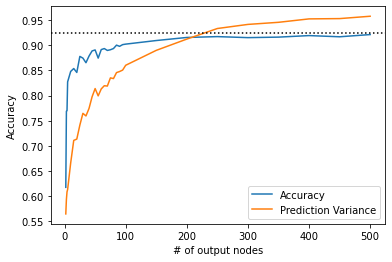

In [14]:
import matplotlib.pyplot as plt
#for i in range(len(results)):
#  print(results[i][0])
#  print(acc_list[i])
#  plt.plot(results[i][0], acc_list[i])
#plt.plot(results[i][0], var_list[i])

line1=plt.plot(component_list, component_acc)
line2 = plt.plot(component_list, component_var)
#line2=plt.plot(component_list, var_list)
plt.axhline(y=0.925, color = 'k', linestyle = ':')
plt.xlabel("# of output nodes")
plt.ylabel("Accuracy")
plt.legend((line1[0], line2[0]), ('Accuracy', 'Prediction Variance'))
#plt.legend((line1[0]), ('Accuracy'))
plt.show()

In [15]:
#output to CSV file
ae_df = pd.DataFrame(list(zip(component_list, component_acc, component_var))
                      ,columns = ['Component', 'Accuracy', 'Prediction Variance'])
print(ae_df)
pd.DataFrame(ae_df).to_csv('AE_500_epochs_results.csv')

    Component  Accuracy  Prediction Variance
0           2  0.617447             0.564592
1           3  0.768839             0.593451
2           4  0.769857             0.608471
3           5  0.827223             0.613088
4          10  0.847929             0.665944
5          15  0.853700             0.710804
6          20  0.845893             0.713393
7          25  0.877800             0.741174
8          30  0.874406             0.764573
9          35  0.865241             0.759431
10         40  0.878479             0.774325
11         45  0.888663             0.797437
12         50  0.890699             0.813866
13         55  0.874406             0.799358
14         60  0.891378             0.813155
15         65  0.893415             0.819501
16         70  0.889681             0.818852
17         75  0.891039             0.835102
18         80  0.893415             0.833719
19         85  0.900204             0.845603
20         90  0.897828             0.847730
21        

try one layer and compare difference

In [17]:
component_acc = []
component_var = []

for c in range(len(component_list)):
    input_shape = x_train.shape[1]
    inputs = Input(shape=(input_shape))

    #Encoder
    encoded = Dense(component_list[c], activation='relu')(inputs)

    #Decoder
    decoded = Dense(input_shape)(encoded)

    #Model setup, summary and compilation
    deep_autoencoder = Model(inputs, decoded)
    deep_autoencoder.summary()
    deep_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), 
                             loss=tf.keras.losses.MeanSquaredError(), 
                             metrics=['accuracy'])

    #training the models

    batch_size = 512

    history = deep_autoencoder.fit(
        x_train,
        x_train,
        epochs=500,
        batch_size=batch_size,
        validation_split=0.2
    )

    #Encode X data
    encoder = Model(inputs, encoded)
    encoded_X_train = encoder(x_train).numpy()
    encoded_X_test = encoder(x_test).numpy()
    
    #variation looks at how the encoding/decoding affects
    y_var = deep_autoencoder.predict(x_test)
    variation = metrics.explained_variance_score(x_test, y_var, multioutput='uniform_average')
    
    accuracy = predict_y(encoded_X_train, encoded_X_test, y_train, y_test)
    component_acc.append(accuracy)
    component_var.append(variation)

Model: "functional_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 561)]             0         
_________________________________________________________________
dense_130 (Dense)            (None, 2)                 1124      
_________________________________________________________________
dense_131 (Dense)            (None, 561)               1683      
Total params: 2,807
Trainable params: 2,807
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
12/12 [==============================] - 0s 12ms/step - loss: 0.5319 - accuracy: 0.0531 - val_loss: 0.5355 - val_accuracy: 0.0857
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5185 - accuracy: 0.0966 - val_loss: 0.5218 - val_accuracy: 0.0857
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5053 - accuracy: 0.144

12/12 [==============================] - 0s 5ms/step - loss: 0.0647 - accuracy: 0.1716 - val_loss: 0.0585 - val_accuracy: 0.2502
Epoch 54/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0644 - accuracy: 0.1709 - val_loss: 0.0582 - val_accuracy: 0.2502
Epoch 55/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0640 - accuracy: 0.1718 - val_loss: 0.0579 - val_accuracy: 0.2502
Epoch 56/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0637 - accuracy: 0.1716 - val_loss: 0.0575 - val_accuracy: 0.2495
Epoch 57/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0633 - accuracy: 0.1731 - val_loss: 0.0572 - val_accuracy: 0.2502
Epoch 58/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0630 - accuracy: 0.1755 - val_loss: 0.0569 - val_accuracy: 0.2508
Epoch 59/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0626 - accuracy: 0.1757 - val_loss: 0.0566 - val_accuracy: 0.2508
Epoch 60/500
12/12 

Epoch 111/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0482 - accuracy: 0.2388 - val_loss: 0.0436 - val_accuracy: 0.3916
Epoch 112/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0480 - accuracy: 0.2442 - val_loss: 0.0434 - val_accuracy: 0.3943
Epoch 113/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0478 - accuracy: 0.2420 - val_loss: 0.0432 - val_accuracy: 0.3902
Epoch 114/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0477 - accuracy: 0.2423 - val_loss: 0.0431 - val_accuracy: 0.4092
Epoch 115/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0475 - accuracy: 0.2429 - val_loss: 0.0429 - val_accuracy: 0.3956
Epoch 116/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 0.2391 - val_loss: 0.0427 - val_accuracy: 0.4038
Epoch 117/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0471 - accuracy: 0.2447 - val_loss: 0.0425 - val_accuracy: 0.4242

12/12 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.2684 - val_loss: 0.0364 - val_accuracy: 0.4378
Epoch 169/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0407 - accuracy: 0.2631 - val_loss: 0.0363 - val_accuracy: 0.4460
Epoch 170/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.2660 - val_loss: 0.0363 - val_accuracy: 0.4541
Epoch 171/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.2726 - val_loss: 0.0362 - val_accuracy: 0.4541
Epoch 172/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0405 - accuracy: 0.2658 - val_loss: 0.0362 - val_accuracy: 0.4405
Epoch 173/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0405 - accuracy: 0.2651 - val_loss: 0.0361 - val_accuracy: 0.4582
Epoch 174/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.2731 - val_loss: 0.0360 - val_accuracy: 0.4555
Epoch 175/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.2857 - val_loss: 0.0340 - val_accuracy: 0.3780
Epoch 226/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.2736 - val_loss: 0.0340 - val_accuracy: 0.4099
Epoch 227/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.2845 - val_loss: 0.0340 - val_accuracy: 0.3861
Epoch 228/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.2741 - val_loss: 0.0340 - val_accuracy: 0.4106
Epoch 229/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.2769 - val_loss: 0.0339 - val_accuracy: 0.4283
Epoch 230/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.2760 - val_loss: 0.0339 - val_accuracy: 0.3875
Epoch 231/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.2770 - val_loss: 0.0339 - val_accuracy: 0.3868
Epoch 232/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.2895 - val_loss: 0.0334 - val_accuracy: 0.3562
Epoch 283/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.2541 - val_loss: 0.0335 - val_accuracy: 0.4038
Epoch 284/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.2791 - val_loss: 0.0334 - val_accuracy: 0.3569
Epoch 285/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.2672 - val_loss: 0.0335 - val_accuracy: 0.4072
Epoch 286/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.2665 - val_loss: 0.0334 - val_accuracy: 0.3705
Epoch 287/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.2755 - val_loss: 0.0334 - val_accuracy: 0.3419
Epoch 288/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.2675 - val_loss: 0.0334 - val_accuracy: 0.3861
Epoch 289/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2639 - val_loss: 0.0334 - val_accuracy: 0.3712
Epoch 340/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2673 - val_loss: 0.0333 - val_accuracy: 0.3664
Epoch 341/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2719 - val_loss: 0.0333 - val_accuracy: 0.3644
Epoch 342/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2600 - val_loss: 0.0334 - val_accuracy: 0.3841
Epoch 343/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2713 - val_loss: 0.0333 - val_accuracy: 0.3603
Epoch 344/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2628 - val_loss: 0.0333 - val_accuracy: 0.3413
Epoch 345/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2736 - val_loss: 0.0333 - val_accuracy: 0.3535
Epoch 346/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2701 - val_loss: 0.0333 - val_accuracy: 0.3637
Epoch 397/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2645 - val_loss: 0.0333 - val_accuracy: 0.3651
Epoch 398/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2653 - val_loss: 0.0333 - val_accuracy: 0.3712
Epoch 399/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2645 - val_loss: 0.0333 - val_accuracy: 0.3630
Epoch 400/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2813 - val_loss: 0.0334 - val_accuracy: 0.3358
Epoch 401/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2551 - val_loss: 0.0333 - val_accuracy: 0.3895
Epoch 402/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0383 - accuracy: 0.2789 - val_loss: 0.0333 - val_accuracy: 0.3345
Epoch 403/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2622 - val_loss: 0.0333 - val_accuracy: 0.4099
Epoch 454/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2774 - val_loss: 0.0333 - val_accuracy: 0.3637
Epoch 455/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2719 - val_loss: 0.0333 - val_accuracy: 0.3617
Epoch 456/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2721 - val_loss: 0.0333 - val_accuracy: 0.3685
Epoch 457/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2752 - val_loss: 0.0334 - val_accuracy: 0.3630
Epoch 458/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2665 - val_loss: 0.0334 - val_accuracy: 0.3923
Epoch 459/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.2656 - val_loss: 0.0333 - val_accuracy: 0.3780
Epoch 460/500

Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.1896 - accuracy: 0.1406 - val_loss: 0.1510 - val_accuracy: 0.0857
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.1350 - accuracy: 0.1442 - val_loss: 0.1090 - val_accuracy: 0.0857
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.1034 - accuracy: 0.1410 - val_loss: 0.0861 - val_accuracy: 0.1387
Epoch 8/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0867 - accuracy: 0.1582 - val_loss: 0.0744 - val_accuracy: 0.2400
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0782 - accuracy: 0.1604 - val_loss: 0.0686 - val_accuracy: 0.1883
Epoch 10/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0738 - accuracy: 0.1524 - val_loss: 0.0654 - val_accuracy: 0.1224
Epoch 11/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0712 - accuracy: 0.1486 - val_loss: 0.0632 - val_accuracy: 0.1108
Epoch 12/50

Epoch 63/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.2430 - val_loss: 0.0318 - val_accuracy: 0.3535
Epoch 64/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.2372 - val_loss: 0.0318 - val_accuracy: 0.3474
Epoch 65/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.2412 - val_loss: 0.0318 - val_accuracy: 0.3542
Epoch 66/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.2310 - val_loss: 0.0318 - val_accuracy: 0.3453
Epoch 67/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.2498 - val_loss: 0.0318 - val_accuracy: 0.3406
Epoch 68/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.2156 - val_loss: 0.0318 - val_accuracy: 0.3358
Epoch 69/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.2480 - val_loss: 0.0318 - val_accuracy: 0.3440
Epoch 

12/12 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.2403 - val_loss: 0.0314 - val_accuracy: 0.3379
Epoch 121/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.2236 - val_loss: 0.0314 - val_accuracy: 0.2393
Epoch 122/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.2204 - val_loss: 0.0314 - val_accuracy: 0.3283
Epoch 123/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.2345 - val_loss: 0.0314 - val_accuracy: 0.3351
Epoch 124/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.2289 - val_loss: 0.0314 - val_accuracy: 0.3086
Epoch 125/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.2228 - val_loss: 0.0313 - val_accuracy: 0.3433
Epoch 126/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.2337 - val_loss: 0.0313 - val_accuracy: 0.3433
Epoch 127/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.2158 - val_loss: 0.0309 - val_accuracy: 0.3419
Epoch 178/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.2272 - val_loss: 0.0309 - val_accuracy: 0.2325
Epoch 179/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.2114 - val_loss: 0.0308 - val_accuracy: 0.3161
Epoch 180/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.2287 - val_loss: 0.0308 - val_accuracy: 0.3039
Epoch 181/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.2226 - val_loss: 0.0308 - val_accuracy: 0.2719
Epoch 182/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.2187 - val_loss: 0.0308 - val_accuracy: 0.3576
Epoch 183/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.2259 - val_loss: 0.0308 - val_accuracy: 0.2991
Epoch 184/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.2170 - val_loss: 0.0303 - val_accuracy: 0.2678
Epoch 235/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.2207 - val_loss: 0.0303 - val_accuracy: 0.3379
Epoch 236/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.2284 - val_loss: 0.0303 - val_accuracy: 0.2665
Epoch 237/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.2087 - val_loss: 0.0302 - val_accuracy: 0.3392
Epoch 238/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.2304 - val_loss: 0.0303 - val_accuracy: 0.2427
Epoch 239/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.2177 - val_loss: 0.0302 - val_accuracy: 0.3195
Epoch 240/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.2180 - val_loss: 0.0303 - val_accuracy: 0.2678
Epoch 241/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.2228 - val_loss: 0.0298 - val_accuracy: 0.3073
Epoch 292/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.2145 - val_loss: 0.0298 - val_accuracy: 0.3134
Epoch 293/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.2247 - val_loss: 0.0298 - val_accuracy: 0.3222
Epoch 294/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.2139 - val_loss: 0.0298 - val_accuracy: 0.3188
Epoch 295/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.2241 - val_loss: 0.0298 - val_accuracy: 0.2923
Epoch 296/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.2214 - val_loss: 0.0298 - val_accuracy: 0.3161
Epoch 297/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.2219 - val_loss: 0.0298 - val_accuracy: 0.2978
Epoch 298/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.2163 - val_loss: 0.0294 - val_accuracy: 0.3195
Epoch 349/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.2257 - val_loss: 0.0293 - val_accuracy: 0.3372
Epoch 350/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.2233 - val_loss: 0.0294 - val_accuracy: 0.3188
Epoch 351/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.2226 - val_loss: 0.0294 - val_accuracy: 0.3481
Epoch 352/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.2272 - val_loss: 0.0294 - val_accuracy: 0.2848
Epoch 353/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.2245 - val_loss: 0.0293 - val_accuracy: 0.3453
Epoch 354/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.2202 - val_loss: 0.0294 - val_accuracy: 0.3195
Epoch 355/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.2546 - val_loss: 0.0291 - val_accuracy: 0.3324
Epoch 406/500
12/12 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.24 - 0s 5ms/step - loss: 0.0337 - accuracy: 0.2372 - val_loss: 0.0291 - val_accuracy: 0.3148
Epoch 407/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.2388 - val_loss: 0.0291 - val_accuracy: 0.3270
Epoch 408/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.2432 - val_loss: 0.0291 - val_accuracy: 0.3249
Epoch 409/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.2389 - val_loss: 0.0291 - val_accuracy: 0.3474
Epoch 410/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.2350 - val_loss: 0.0291 - val_accuracy: 0.3311
Epoch 411/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.2585 - val_loss: 0

Epoch 462/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.2571 - val_loss: 0.0289 - val_accuracy: 0.3372
Epoch 463/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.2571 - val_loss: 0.0289 - val_accuracy: 0.3453
Epoch 464/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.2554 - val_loss: 0.0289 - val_accuracy: 0.3365
Epoch 465/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.2515 - val_loss: 0.0288 - val_accuracy: 0.3358
Epoch 466/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.2685 - val_loss: 0.0289 - val_accuracy: 0.3317
Epoch 467/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.2531 - val_loss: 0.0289 - val_accuracy: 0.3596
Epoch 468/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.2526 - val_loss: 0.0288 - val_accuracy: 0.3528

12/12 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.1207 - val_loss: 0.0328 - val_accuracy: 0.1258
Epoch 15/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.1345 - val_loss: 0.0325 - val_accuracy: 0.1924
Epoch 16/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 0.1777 - val_loss: 0.0324 - val_accuracy: 0.2638
Epoch 17/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.1966 - val_loss: 0.0323 - val_accuracy: 0.2753
Epoch 18/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.2029 - val_loss: 0.0323 - val_accuracy: 0.2692
Epoch 19/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.2012 - val_loss: 0.0322 - val_accuracy: 0.2882
Epoch 20/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.2041 - val_loss: 0.0322 - val_accuracy: 0.2685
Epoch 21/500
12/12 

12/12 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.2190 - val_loss: 0.0300 - val_accuracy: 0.2753
Epoch 72/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.2180 - val_loss: 0.0299 - val_accuracy: 0.2903
Epoch 73/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 0.2083 - val_loss: 0.0298 - val_accuracy: 0.2930
Epoch 74/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.2206 - val_loss: 0.0298 - val_accuracy: 0.2780
Epoch 75/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.2126 - val_loss: 0.0297 - val_accuracy: 0.2957
Epoch 76/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.2170 - val_loss: 0.0296 - val_accuracy: 0.2821
Epoch 77/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.2158 - val_loss: 0.0296 - val_accuracy: 0.2971
Epoch 78/500
12/12 

12/12 [==============================] - 0s 5ms/step - loss: 0.0319 - accuracy: 0.2111 - val_loss: 0.0280 - val_accuracy: 0.2563
Epoch 129/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0319 - accuracy: 0.2099 - val_loss: 0.0280 - val_accuracy: 0.2678
Epoch 130/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0319 - accuracy: 0.2063 - val_loss: 0.0281 - val_accuracy: 0.2767
Epoch 131/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0318 - accuracy: 0.2117 - val_loss: 0.0280 - val_accuracy: 0.2692
Epoch 132/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0318 - accuracy: 0.2124 - val_loss: 0.0281 - val_accuracy: 0.2774
Epoch 133/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0318 - accuracy: 0.2105 - val_loss: 0.0280 - val_accuracy: 0.2508
Epoch 134/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0318 - accuracy: 0.2019 - val_loss: 0.0280 - val_accuracy: 0.2719
Epoch 135/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0310 - accuracy: 0.2060 - val_loss: 0.0276 - val_accuracy: 0.2658
Epoch 186/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0310 - accuracy: 0.2000 - val_loss: 0.0276 - val_accuracy: 0.2590
Epoch 187/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0310 - accuracy: 0.2027 - val_loss: 0.0275 - val_accuracy: 0.2774
Epoch 188/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0310 - accuracy: 0.1993 - val_loss: 0.0276 - val_accuracy: 0.2821
Epoch 189/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0309 - accuracy: 0.2027 - val_loss: 0.0275 - val_accuracy: 0.2726
Epoch 190/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0309 - accuracy: 0.2075 - val_loss: 0.0275 - val_accuracy: 0.2420
Epoch 191/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0309 - accuracy: 0.1993 - val_loss: 0.0275 - val_accuracy: 0.2740
Epoch 192/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.2070 - val_loss: 0.0270 - val_accuracy: 0.2726
Epoch 243/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.2051 - val_loss: 0.0271 - val_accuracy: 0.2706
Epoch 244/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.1952 - val_loss: 0.0270 - val_accuracy: 0.2862
Epoch 245/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.1986 - val_loss: 0.0270 - val_accuracy: 0.2794
Epoch 246/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.2014 - val_loss: 0.0269 - val_accuracy: 0.2733
Epoch 247/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.2075 - val_loss: 0.0269 - val_accuracy: 0.2923
Epoch 248/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.2020 - val_loss: 0.0269 - val_accuracy: 0.2780
Epoch 249/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0300 - accuracy: 0.2126 - val_loss: 0.0265 - val_accuracy: 0.2808
Epoch 300/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0300 - accuracy: 0.2054 - val_loss: 0.0265 - val_accuracy: 0.2318
Epoch 301/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0300 - accuracy: 0.2053 - val_loss: 0.0264 - val_accuracy: 0.2556
Epoch 302/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0299 - accuracy: 0.1997 - val_loss: 0.0265 - val_accuracy: 0.2794
Epoch 303/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0300 - accuracy: 0.2065 - val_loss: 0.0264 - val_accuracy: 0.2828
Epoch 304/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0299 - accuracy: 0.2019 - val_loss: 0.0264 - val_accuracy: 0.2971
Epoch 305/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0299 - accuracy: 0.2070 - val_loss: 0.0265 - val_accuracy: 0.2495
Epoch 306/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.2014 - val_loss: 0.0260 - val_accuracy: 0.2740
Epoch 357/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.2065 - val_loss: 0.0260 - val_accuracy: 0.2305
Epoch 358/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.2148 - val_loss: 0.0260 - val_accuracy: 0.2808
Epoch 359/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.2073 - val_loss: 0.0260 - val_accuracy: 0.2903
Epoch 360/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.2080 - val_loss: 0.0260 - val_accuracy: 0.2876
Epoch 361/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.2119 - val_loss: 0.0260 - val_accuracy: 0.2848
Epoch 362/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.2009 - val_loss: 0.0260 - val_accuracy: 0.2869
Epoch 363/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.2238 - val_loss: 0.0257 - val_accuracy: 0.2964
Epoch 414/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.2240 - val_loss: 0.0257 - val_accuracy: 0.2332
Epoch 415/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.2442 - val_loss: 0.0257 - val_accuracy: 0.2903
Epoch 416/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.2327 - val_loss: 0.0257 - val_accuracy: 0.2978
Epoch 417/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.2367 - val_loss: 0.0257 - val_accuracy: 0.2923
Epoch 418/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.2376 - val_loss: 0.0257 - val_accuracy: 0.2855
Epoch 419/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.2401 - val_loss: 0.0256 - val_accuracy: 0.2678
Epoch 420/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2491 - val_loss: 0.0254 - val_accuracy: 0.3005
Epoch 471/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2434 - val_loss: 0.0255 - val_accuracy: 0.2998
Epoch 472/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2485 - val_loss: 0.0254 - val_accuracy: 0.2801
Epoch 473/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2486 - val_loss: 0.0254 - val_accuracy: 0.2950
Epoch 474/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2505 - val_loss: 0.0254 - val_accuracy: 0.2821
Epoch 475/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2515 - val_loss: 0.0254 - val_accuracy: 0.2862
Epoch 476/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2362 - val_loss: 0.0255 - val_accuracy: 0.3202
Epoch 477/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0395 - accuracy: 0.2080 - val_loss: 0.0341 - val_accuracy: 0.3046
Epoch 23/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0389 - accuracy: 0.2294 - val_loss: 0.0337 - val_accuracy: 0.3182
Epoch 24/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0384 - accuracy: 0.2418 - val_loss: 0.0333 - val_accuracy: 0.3365
Epoch 25/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0381 - accuracy: 0.2594 - val_loss: 0.0330 - val_accuracy: 0.3562
Epoch 26/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.2629 - val_loss: 0.0328 - val_accuracy: 0.3481
Epoch 27/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.2602 - val_loss: 0.0327 - val_accuracy: 0.3440
Epoch 28/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0373 - accuracy: 0.2604 - val_loss: 0.0325 - val_accuracy: 0.3317
Epoch 29/500
12/12 

Epoch 80/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.2728 - val_loss: 0.0291 - val_accuracy: 0.3379
Epoch 81/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.2718 - val_loss: 0.0290 - val_accuracy: 0.3433
Epoch 82/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.2701 - val_loss: 0.0290 - val_accuracy: 0.3447
Epoch 83/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.2731 - val_loss: 0.0289 - val_accuracy: 0.3406
Epoch 84/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.2713 - val_loss: 0.0289 - val_accuracy: 0.3467
Epoch 85/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.2709 - val_loss: 0.0288 - val_accuracy: 0.3426
Epoch 86/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.2745 - val_loss: 0.0288 - val_accuracy: 0.3351
Epoch 

12/12 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.2673 - val_loss: 0.0279 - val_accuracy: 0.3168
Epoch 138/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.2634 - val_loss: 0.0279 - val_accuracy: 0.3256
Epoch 139/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.2592 - val_loss: 0.0279 - val_accuracy: 0.3263
Epoch 140/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.2694 - val_loss: 0.0279 - val_accuracy: 0.3086
Epoch 141/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.2617 - val_loss: 0.0279 - val_accuracy: 0.3263
Epoch 142/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.2556 - val_loss: 0.0278 - val_accuracy: 0.3066
Epoch 143/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.2560 - val_loss: 0.0279 - val_accuracy: 0.3120
Epoch 144/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.2043 - val_loss: 0.0274 - val_accuracy: 0.2746
Epoch 195/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 0.2146 - val_loss: 0.0274 - val_accuracy: 0.2413
Epoch 196/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 0.2114 - val_loss: 0.0274 - val_accuracy: 0.2678
Epoch 197/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 0.2104 - val_loss: 0.0273 - val_accuracy: 0.2522
Epoch 198/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 0.2141 - val_loss: 0.0274 - val_accuracy: 0.2590
Epoch 199/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0307 - accuracy: 0.2066 - val_loss: 0.0273 - val_accuracy: 0.2481
Epoch 200/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0307 - accuracy: 0.2158 - val_loss: 0.0273 - val_accuracy: 0.2413
Epoch 201/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0302 - accuracy: 0.1988 - val_loss: 0.0268 - val_accuracy: 0.2529
Epoch 252/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0302 - accuracy: 0.2085 - val_loss: 0.0268 - val_accuracy: 0.2318
Epoch 253/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0302 - accuracy: 0.2036 - val_loss: 0.0268 - val_accuracy: 0.2339
Epoch 254/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0302 - accuracy: 0.2019 - val_loss: 0.0268 - val_accuracy: 0.2169
Epoch 255/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0302 - accuracy: 0.2070 - val_loss: 0.0268 - val_accuracy: 0.2366
Epoch 256/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0302 - accuracy: 0.2000 - val_loss: 0.0267 - val_accuracy: 0.2345
Epoch 257/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0302 - accuracy: 0.2129 - val_loss: 0.0267 - val_accuracy: 0.2257
Epoch 258/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.1918 - val_loss: 0.0263 - val_accuracy: 0.2495
Epoch 309/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.2080 - val_loss: 0.0263 - val_accuracy: 0.2060
Epoch 310/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.2053 - val_loss: 0.0262 - val_accuracy: 0.2012
Epoch 311/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.2070 - val_loss: 0.0263 - val_accuracy: 0.2257
Epoch 312/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.2066 - val_loss: 0.0263 - val_accuracy: 0.2203
Epoch 313/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.2077 - val_loss: 0.0262 - val_accuracy: 0.2305
Epoch 314/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.2002 - val_loss: 0.0262 - val_accuracy: 0.2250
Epoch 315/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.2075 - val_loss: 0.0258 - val_accuracy: 0.2386
Epoch 366/500
12/12 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.20 - 0s 5ms/step - loss: 0.0295 - accuracy: 0.2129 - val_loss: 0.0258 - val_accuracy: 0.2407
Epoch 367/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.2032 - val_loss: 0.0259 - val_accuracy: 0.2420
Epoch 368/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.2083 - val_loss: 0.0258 - val_accuracy: 0.2352
Epoch 369/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.2102 - val_loss: 0.0258 - val_accuracy: 0.2257
Epoch 370/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.2107 - val_loss: 0.0258 - val_accuracy: 0.2305
Epoch 371/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.2060 - val_loss: 0

12/12 [==============================] - 0s 5ms/step - loss: 0.0293 - accuracy: 0.2146 - val_loss: 0.0255 - val_accuracy: 0.2325
Epoch 423/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0293 - accuracy: 0.2061 - val_loss: 0.0256 - val_accuracy: 0.2699
Epoch 424/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0293 - accuracy: 0.2194 - val_loss: 0.0256 - val_accuracy: 0.2311
Epoch 425/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0293 - accuracy: 0.2099 - val_loss: 0.0255 - val_accuracy: 0.2644
Epoch 426/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0293 - accuracy: 0.2092 - val_loss: 0.0255 - val_accuracy: 0.2699
Epoch 427/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0293 - accuracy: 0.2065 - val_loss: 0.0255 - val_accuracy: 0.2549
Epoch 428/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0293 - accuracy: 0.2156 - val_loss: 0.0255 - val_accuracy: 0.2250
Epoch 429/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2192 - val_loss: 0.0254 - val_accuracy: 0.2638
Epoch 480/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2262 - val_loss: 0.0253 - val_accuracy: 0.2495
Epoch 481/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2238 - val_loss: 0.0253 - val_accuracy: 0.2658
Epoch 482/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2274 - val_loss: 0.0253 - val_accuracy: 0.2624
Epoch 483/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2112 - val_loss: 0.0253 - val_accuracy: 0.2604
Epoch 484/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2228 - val_loss: 0.0253 - val_accuracy: 0.2617
Epoch 485/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.2221 - val_loss: 0.0253 - val_accuracy: 0.2434
Epoch 486/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.1879 - val_loss: 0.0300 - val_accuracy: 0.2631
Epoch 32/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.1869 - val_loss: 0.0298 - val_accuracy: 0.2536
Epoch 33/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.1942 - val_loss: 0.0296 - val_accuracy: 0.2651
Epoch 34/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.1963 - val_loss: 0.0294 - val_accuracy: 0.2631
Epoch 35/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.1983 - val_loss: 0.0292 - val_accuracy: 0.2624
Epoch 36/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.2032 - val_loss: 0.0291 - val_accuracy: 0.2678
Epoch 37/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.1985 - val_loss: 0.0289 - val_accuracy: 0.2699
Epoch 38/500
12/12 

Epoch 89/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0267 - accuracy: 0.1395 - val_loss: 0.0240 - val_accuracy: 0.2033
Epoch 90/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.1473 - val_loss: 0.0239 - val_accuracy: 0.1958
Epoch 91/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.1444 - val_loss: 0.0239 - val_accuracy: 0.2053
Epoch 92/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0265 - accuracy: 0.1434 - val_loss: 0.0238 - val_accuracy: 0.2039
Epoch 93/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0265 - accuracy: 0.1425 - val_loss: 0.0238 - val_accuracy: 0.2094
Epoch 94/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0264 - accuracy: 0.1449 - val_loss: 0.0238 - val_accuracy: 0.2060
Epoch 95/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0264 - accuracy: 0.1463 - val_loss: 0.0237 - val_accuracy: 0.2230
Epoch 

12/12 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 0.1954 - val_loss: 0.0223 - val_accuracy: 0.2468
Epoch 147/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 0.1997 - val_loss: 0.0222 - val_accuracy: 0.2502
Epoch 148/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0240 - accuracy: 0.2043 - val_loss: 0.0221 - val_accuracy: 0.2610
Epoch 149/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0240 - accuracy: 0.2031 - val_loss: 0.0221 - val_accuracy: 0.2529
Epoch 150/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0240 - accuracy: 0.2024 - val_loss: 0.0222 - val_accuracy: 0.2237
Epoch 151/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0240 - accuracy: 0.2068 - val_loss: 0.0221 - val_accuracy: 0.2332
Epoch 152/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0240 - accuracy: 0.2043 - val_loss: 0.0222 - val_accuracy: 0.2427
Epoch 153/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.2247 - val_loss: 0.0219 - val_accuracy: 0.2644
Epoch 204/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.2303 - val_loss: 0.0219 - val_accuracy: 0.2386
Epoch 205/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0235 - accuracy: 0.2253 - val_loss: 0.0219 - val_accuracy: 0.2413
Epoch 206/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0235 - accuracy: 0.2197 - val_loss: 0.0219 - val_accuracy: 0.2570
Epoch 207/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0235 - accuracy: 0.2247 - val_loss: 0.0219 - val_accuracy: 0.2400
Epoch 208/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0235 - accuracy: 0.2238 - val_loss: 0.0219 - val_accuracy: 0.2468
Epoch 209/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.2201 - val_loss: 0.0220 - val_accuracy: 0.2481
Epoch 210/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.2238 - val_loss: 0.0218 - val_accuracy: 0.2882
Epoch 261/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.2291 - val_loss: 0.0218 - val_accuracy: 0.2719
Epoch 262/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.2325 - val_loss: 0.0218 - val_accuracy: 0.2685
Epoch 263/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.2362 - val_loss: 0.0219 - val_accuracy: 0.2604
Epoch 264/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.2330 - val_loss: 0.0218 - val_accuracy: 0.2706
Epoch 265/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.2327 - val_loss: 0.0218 - val_accuracy: 0.2719
Epoch 266/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.2213 - val_loss: 0.0217 - val_accuracy: 0.2842
Epoch 267/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0233 - accuracy: 0.2262 - val_loss: 0.0218 - val_accuracy: 0.2706
Epoch 318/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0233 - accuracy: 0.2320 - val_loss: 0.0217 - val_accuracy: 0.2549
Epoch 319/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0232 - accuracy: 0.2243 - val_loss: 0.0217 - val_accuracy: 0.2583
Epoch 320/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0232 - accuracy: 0.2294 - val_loss: 0.0217 - val_accuracy: 0.2808
Epoch 321/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0232 - accuracy: 0.2223 - val_loss: 0.0217 - val_accuracy: 0.2862
Epoch 322/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0232 - accuracy: 0.2306 - val_loss: 0.0217 - val_accuracy: 0.2658
Epoch 323/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0232 - accuracy: 0.2262 - val_loss: 0.0216 - val_accuracy: 0.2733
Epoch 324/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.2287 - val_loss: 0.0216 - val_accuracy: 0.2726
Epoch 375/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.2301 - val_loss: 0.0216 - val_accuracy: 0.2536
Epoch 376/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.2291 - val_loss: 0.0216 - val_accuracy: 0.2366
Epoch 377/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.2294 - val_loss: 0.0216 - val_accuracy: 0.2515
Epoch 378/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.2259 - val_loss: 0.0217 - val_accuracy: 0.2638
Epoch 379/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.2308 - val_loss: 0.0217 - val_accuracy: 0.2610
Epoch 380/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.2316 - val_loss: 0.0216 - val_accuracy: 0.2420
Epoch 381/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.2272 - val_loss: 0.0216 - val_accuracy: 0.2597
Epoch 432/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.2286 - val_loss: 0.0215 - val_accuracy: 0.2583
Epoch 433/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.2252 - val_loss: 0.0215 - val_accuracy: 0.2672
Epoch 434/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.2247 - val_loss: 0.0216 - val_accuracy: 0.2753
Epoch 435/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.2272 - val_loss: 0.0215 - val_accuracy: 0.2712
Epoch 436/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.2318 - val_loss: 0.0215 - val_accuracy: 0.2801
Epoch 437/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.2298 - val_loss: 0.0215 - val_accuracy: 0.2794
Epoch 438/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 0.2293 - val_loss: 0.0215 - val_accuracy: 0.2475
Epoch 489/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 0.2279 - val_loss: 0.0214 - val_accuracy: 0.2672
Epoch 490/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 0.2252 - val_loss: 0.0215 - val_accuracy: 0.2665
Epoch 491/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 0.2269 - val_loss: 0.0214 - val_accuracy: 0.2842
Epoch 492/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 0.2264 - val_loss: 0.0214 - val_accuracy: 0.2624
Epoch 493/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 0.2238 - val_loss: 0.0215 - val_accuracy: 0.2604
Epoch 494/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 0.2241 - val_loss: 0.0214 - val_accuracy: 0.2631
Epoch 495/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.1502 - val_loss: 0.0270 - val_accuracy: 0.2141
Epoch 41/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0306 - accuracy: 0.1488 - val_loss: 0.0269 - val_accuracy: 0.2162
Epoch 42/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.1423 - val_loss: 0.0267 - val_accuracy: 0.2012
Epoch 43/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0302 - accuracy: 0.1374 - val_loss: 0.0265 - val_accuracy: 0.1999
Epoch 44/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.1286 - val_loss: 0.0264 - val_accuracy: 0.1727
Epoch 45/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.1267 - val_loss: 0.0261 - val_accuracy: 0.1937
Epoch 46/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.1146 - val_loss: 0.0258 - val_accuracy: 0.1883
Epoch 47/500
12/12 

Epoch 98/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0244 - accuracy: 0.1951 - val_loss: 0.0222 - val_accuracy: 0.1869
Epoch 99/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0242 - accuracy: 0.1898 - val_loss: 0.0221 - val_accuracy: 0.1978
Epoch 100/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 0.1895 - val_loss: 0.0221 - val_accuracy: 0.1801
Epoch 101/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0240 - accuracy: 0.1876 - val_loss: 0.0219 - val_accuracy: 0.2237
Epoch 102/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0239 - accuracy: 0.1912 - val_loss: 0.0218 - val_accuracy: 0.1944
Epoch 103/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0238 - accuracy: 0.1895 - val_loss: 0.0217 - val_accuracy: 0.2005
Epoch 104/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.1991 - val_loss: 0.0217 - val_accuracy: 0.2114
E

12/12 [==============================] - 0s 5ms/step - loss: 0.0213 - accuracy: 0.2321 - val_loss: 0.0197 - val_accuracy: 0.2352
Epoch 156/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0212 - accuracy: 0.2333 - val_loss: 0.0197 - val_accuracy: 0.2475
Epoch 157/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0212 - accuracy: 0.2303 - val_loss: 0.0197 - val_accuracy: 0.2407
Epoch 158/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.2272 - val_loss: 0.0196 - val_accuracy: 0.2345
Epoch 159/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0210 - accuracy: 0.2371 - val_loss: 0.0195 - val_accuracy: 0.2549
Epoch 160/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0210 - accuracy: 0.2347 - val_loss: 0.0195 - val_accuracy: 0.2461
Epoch 161/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.2347 - val_loss: 0.0194 - val_accuracy: 0.2644
Epoch 162/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.2577 - val_loss: 0.0182 - val_accuracy: 0.3046
Epoch 213/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.2650 - val_loss: 0.0182 - val_accuracy: 0.2896
Epoch 214/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.2592 - val_loss: 0.0182 - val_accuracy: 0.2978
Epoch 215/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.2604 - val_loss: 0.0183 - val_accuracy: 0.2998
Epoch 216/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.2602 - val_loss: 0.0183 - val_accuracy: 0.2869
Epoch 217/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.2611 - val_loss: 0.0183 - val_accuracy: 0.2978
Epoch 218/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.2612 - val_loss: 0.0182 - val_accuracy: 0.3148
Epoch 219/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.2741 - val_loss: 0.0181 - val_accuracy: 0.3046
Epoch 270/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.2757 - val_loss: 0.0181 - val_accuracy: 0.2780
Epoch 271/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.2741 - val_loss: 0.0181 - val_accuracy: 0.3086
Epoch 272/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.2762 - val_loss: 0.0182 - val_accuracy: 0.3032
Epoch 273/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.2719 - val_loss: 0.0181 - val_accuracy: 0.3052
Epoch 274/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.2735 - val_loss: 0.0182 - val_accuracy: 0.3039
Epoch 275/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.2764 - val_loss: 0.0182 - val_accuracy: 0.2950
Epoch 276/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.2837 - val_loss: 0.0176 - val_accuracy: 0.3005
Epoch 327/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.2816 - val_loss: 0.0176 - val_accuracy: 0.3032
Epoch 328/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.2852 - val_loss: 0.0176 - val_accuracy: 0.3175
Epoch 329/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.2820 - val_loss: 0.0176 - val_accuracy: 0.3148
Epoch 330/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.2835 - val_loss: 0.0176 - val_accuracy: 0.3195
Epoch 331/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.2835 - val_loss: 0.0176 - val_accuracy: 0.3202
Epoch 332/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0188 - accuracy: 0.2813 - val_loss: 0.0175 - val_accuracy: 0.3120
Epoch 333/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 0.2929 - val_loss: 0.0174 - val_accuracy: 0.2971
Epoch 384/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2837 - val_loss: 0.0174 - val_accuracy: 0.2896
Epoch 385/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2915 - val_loss: 0.0175 - val_accuracy: 0.2950
Epoch 386/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2906 - val_loss: 0.0175 - val_accuracy: 0.2774
Epoch 387/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 0.2869 - val_loss: 0.0175 - val_accuracy: 0.2814
Epoch 388/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 0.2871 - val_loss: 0.0174 - val_accuracy: 0.3243
Epoch 389/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2847 - val_loss: 0.0174 - val_accuracy: 0.2835
Epoch 390/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2810 - val_loss: 0.0174 - val_accuracy: 0.3080
Epoch 441/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2844 - val_loss: 0.0174 - val_accuracy: 0.2869
Epoch 442/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2852 - val_loss: 0.0175 - val_accuracy: 0.3012
Epoch 443/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2855 - val_loss: 0.0174 - val_accuracy: 0.2889
Epoch 444/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2889 - val_loss: 0.0174 - val_accuracy: 0.3222
Epoch 445/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2886 - val_loss: 0.0174 - val_accuracy: 0.3100
Epoch 446/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2859 - val_loss: 0.0174 - val_accuracy: 0.2828
Epoch 447/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2878 - val_loss: 0.0174 - val_accuracy: 0.2937
Epoch 498/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.2801 - val_loss: 0.0174 - val_accuracy: 0.2957
Epoch 499/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.2874 - val_loss: 0.0173 - val_accuracy: 0.2944
Epoch 500/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.2866 - val_loss: 0.0173 - val_accuracy: 0.3018
0.8445349626612356
Model: "functional_156"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 561)]             0         
_________________________________________________________________
dense_142 (Dense)            (None, 20)                11240     
_________________________________________________________________
den

12/12 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.1406 - val_loss: 0.0214 - val_accuracy: 0.1312
Epoch 50/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.1468 - val_loss: 0.0214 - val_accuracy: 0.1380
Epoch 51/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 0.1485 - val_loss: 0.0213 - val_accuracy: 0.1360
Epoch 52/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0229 - accuracy: 0.1415 - val_loss: 0.0212 - val_accuracy: 0.1577
Epoch 53/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0228 - accuracy: 0.1476 - val_loss: 0.0212 - val_accuracy: 0.1339
Epoch 54/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0227 - accuracy: 0.1532 - val_loss: 0.0211 - val_accuracy: 0.1339
Epoch 55/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0226 - accuracy: 0.1514 - val_loss: 0.0210 - val_accuracy: 0.1196
Epoch 56/500
12/12 

Epoch 107/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 0.2031 - val_loss: 0.0183 - val_accuracy: 0.1720
Epoch 108/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.1949 - val_loss: 0.0183 - val_accuracy: 0.1897
Epoch 109/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.1954 - val_loss: 0.0183 - val_accuracy: 0.1971
Epoch 110/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.2031 - val_loss: 0.0182 - val_accuracy: 0.2121
Epoch 111/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.1934 - val_loss: 0.0182 - val_accuracy: 0.2033
Epoch 112/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.2010 - val_loss: 0.0181 - val_accuracy: 0.2060
Epoch 113/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0196 - accuracy: 0.1998 - val_loss: 0.0182 - val_accuracy: 0.2019

12/12 [==============================] - 0s 5ms/step - loss: 0.0178 - accuracy: 0.2405 - val_loss: 0.0167 - val_accuracy: 0.2454
Epoch 165/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0178 - accuracy: 0.2359 - val_loss: 0.0166 - val_accuracy: 0.2549
Epoch 166/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0178 - accuracy: 0.2357 - val_loss: 0.0166 - val_accuracy: 0.2522
Epoch 167/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0178 - accuracy: 0.2349 - val_loss: 0.0166 - val_accuracy: 0.2529
Epoch 168/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.2408 - val_loss: 0.0166 - val_accuracy: 0.2359
Epoch 169/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.2412 - val_loss: 0.0166 - val_accuracy: 0.2434
Epoch 170/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.2388 - val_loss: 0.0166 - val_accuracy: 0.2583
Epoch 171/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 0.2692 - val_loss: 0.0163 - val_accuracy: 0.2903
Epoch 222/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 0.2560 - val_loss: 0.0162 - val_accuracy: 0.3188
Epoch 223/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0172 - accuracy: 0.2667 - val_loss: 0.0163 - val_accuracy: 0.3012
Epoch 224/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0172 - accuracy: 0.2677 - val_loss: 0.0162 - val_accuracy: 0.2719
Epoch 225/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0172 - accuracy: 0.2578 - val_loss: 0.0162 - val_accuracy: 0.2767
Epoch 226/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0172 - accuracy: 0.2731 - val_loss: 0.0162 - val_accuracy: 0.2359
Epoch 227/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0172 - accuracy: 0.2696 - val_loss: 0.0162 - val_accuracy: 0.2726
Epoch 228/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0166 - accuracy: 0.2838 - val_loss: 0.0158 - val_accuracy: 0.2475
Epoch 279/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0166 - accuracy: 0.2810 - val_loss: 0.0158 - val_accuracy: 0.2889
Epoch 280/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0166 - accuracy: 0.2849 - val_loss: 0.0158 - val_accuracy: 0.3317
Epoch 281/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0166 - accuracy: 0.2852 - val_loss: 0.0158 - val_accuracy: 0.3161
Epoch 282/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0166 - accuracy: 0.2835 - val_loss: 0.0158 - val_accuracy: 0.2964
Epoch 283/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0166 - accuracy: 0.2801 - val_loss: 0.0158 - val_accuracy: 0.3222
Epoch 284/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0166 - accuracy: 0.2799 - val_loss: 0.0158 - val_accuracy: 0.3338
Epoch 285/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.3031 - val_loss: 0.0157 - val_accuracy: 0.3141
Epoch 336/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.2959 - val_loss: 0.0157 - val_accuracy: 0.3236
Epoch 337/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.2971 - val_loss: 0.0158 - val_accuracy: 0.3487
Epoch 338/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.3019 - val_loss: 0.0157 - val_accuracy: 0.3426
Epoch 339/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.3024 - val_loss: 0.0157 - val_accuracy: 0.2862
Epoch 340/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.2978 - val_loss: 0.0158 - val_accuracy: 0.2740
Epoch 341/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.2937 - val_loss: 0.0158 - val_accuracy: 0.2556
Epoch 342/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.3019 - val_loss: 0.0157 - val_accuracy: 0.3385
Epoch 393/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.3037 - val_loss: 0.0157 - val_accuracy: 0.3678
Epoch 394/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2849 - val_loss: 0.0157 - val_accuracy: 0.3719
Epoch 395/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2927 - val_loss: 0.0157 - val_accuracy: 0.3249
Epoch 396/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2949 - val_loss: 0.0157 - val_accuracy: 0.2794
Epoch 397/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2964 - val_loss: 0.0157 - val_accuracy: 0.3243
Epoch 398/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.3100 - val_loss: 0.0157 - val_accuracy: 0.3324
Epoch 399/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.3002 - val_loss: 0.0158 - val_accuracy: 0.3086
Epoch 450/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.3002 - val_loss: 0.0157 - val_accuracy: 0.2767
Epoch 451/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2915 - val_loss: 0.0157 - val_accuracy: 0.3331
Epoch 452/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2971 - val_loss: 0.0157 - val_accuracy: 0.3780
Epoch 453/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.3061 - val_loss: 0.0157 - val_accuracy: 0.3691
Epoch 454/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.3036 - val_loss: 0.0157 - val_accuracy: 0.3453
Epoch 455/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0164 - accuracy: 0.3031 - val_loss: 0.0157 - val_accuracy: 0.3814
Epoch 456/500

12/12 [==============================] - 0s 13ms/step - loss: 0.4941 - accuracy: 0.0034 - val_loss: 0.3992 - val_accuracy: 0.0462
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 0.3105 - accuracy: 0.0718 - val_loss: 0.2097 - val_accuracy: 0.0197
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.1609 - accuracy: 0.0551 - val_loss: 0.1091 - val_accuracy: 0.0891
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0970 - accuracy: 0.0731 - val_loss: 0.0744 - val_accuracy: 0.1020
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0721 - accuracy: 0.1032 - val_loss: 0.0575 - val_accuracy: 0.2203
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0567 - accuracy: 0.1253 - val_loss: 0.0453 - val_accuracy: 0.1108
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0459 - accuracy: 0.1167 - val_loss: 0.0375 - val_accuracy: 0.1822
Epoch 8/500
12/12 [=====

Epoch 59/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.2043 - val_loss: 0.0186 - val_accuracy: 0.2692
Epoch 60/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.2051 - val_loss: 0.0185 - val_accuracy: 0.2685
Epoch 61/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0196 - accuracy: 0.2058 - val_loss: 0.0184 - val_accuracy: 0.2767
Epoch 62/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.2068 - val_loss: 0.0183 - val_accuracy: 0.2508
Epoch 63/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0194 - accuracy: 0.2104 - val_loss: 0.0182 - val_accuracy: 0.2536
Epoch 64/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.2139 - val_loss: 0.0181 - val_accuracy: 0.2475
Epoch 65/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.2094 - val_loss: 0.0181 - val_accuracy: 0.2610
Epoch 

12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2748 - val_loss: 0.0158 - val_accuracy: 0.2740
Epoch 117/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2733 - val_loss: 0.0158 - val_accuracy: 0.2876
Epoch 118/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2704 - val_loss: 0.0157 - val_accuracy: 0.2978
Epoch 119/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2736 - val_loss: 0.0157 - val_accuracy: 0.3141
Epoch 120/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 0.2728 - val_loss: 0.0156 - val_accuracy: 0.2882
Epoch 121/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 0.2716 - val_loss: 0.0156 - val_accuracy: 0.2814
Epoch 122/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0162 - accuracy: 0.2724 - val_loss: 0.0156 - val_accuracy: 0.2950
Epoch 123/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.2957 - val_loss: 0.0143 - val_accuracy: 0.2923
Epoch 174/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.2964 - val_loss: 0.0143 - val_accuracy: 0.2869
Epoch 175/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.2949 - val_loss: 0.0143 - val_accuracy: 0.3222
Epoch 176/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.3000 - val_loss: 0.0143 - val_accuracy: 0.3046
Epoch 177/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.2949 - val_loss: 0.0144 - val_accuracy: 0.3236
Epoch 178/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.2980 - val_loss: 0.0144 - val_accuracy: 0.3481
Epoch 179/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.3015 - val_loss: 0.0142 - val_accuracy: 0.3277
Epoch 180/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.3102 - val_loss: 0.0140 - val_accuracy: 0.3508
Epoch 231/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.3124 - val_loss: 0.0139 - val_accuracy: 0.3365
Epoch 232/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.3121 - val_loss: 0.0140 - val_accuracy: 0.3086
Epoch 233/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.3121 - val_loss: 0.0139 - val_accuracy: 0.3426
Epoch 234/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.3126 - val_loss: 0.0139 - val_accuracy: 0.3188
Epoch 235/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.3100 - val_loss: 0.0139 - val_accuracy: 0.3399
Epoch 236/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0141 - accuracy: 0.3170 - val_loss: 0.0139 - val_accuracy: 0.3426
Epoch 237/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.3095 - val_loss: 0.0137 - val_accuracy: 0.3447
Epoch 288/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.3124 - val_loss: 0.0138 - val_accuracy: 0.3283
Epoch 289/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.3114 - val_loss: 0.0137 - val_accuracy: 0.3521
Epoch 290/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.3092 - val_loss: 0.0138 - val_accuracy: 0.3453
Epoch 291/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.3167 - val_loss: 0.0138 - val_accuracy: 0.3358
Epoch 292/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.3092 - val_loss: 0.0138 - val_accuracy: 0.3277
Epoch 293/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.3116 - val_loss: 0.0138 - val_accuracy: 0.3487
Epoch 294/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3121 - val_loss: 0.0134 - val_accuracy: 0.3175
Epoch 345/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3065 - val_loss: 0.0134 - val_accuracy: 0.3385
Epoch 346/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3117 - val_loss: 0.0133 - val_accuracy: 0.3324
Epoch 347/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3151 - val_loss: 0.0133 - val_accuracy: 0.3549
Epoch 348/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3105 - val_loss: 0.0134 - val_accuracy: 0.3290
Epoch 349/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0137 - accuracy: 0.3122 - val_loss: 0.0135 - val_accuracy: 0.3311
Epoch 350/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3087 - val_loss: 0.0134 - val_accuracy: 0.3256
Epoch 351/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3162 - val_loss: 0.0133 - val_accuracy: 0.3345
Epoch 402/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3124 - val_loss: 0.0135 - val_accuracy: 0.3685
Epoch 403/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3146 - val_loss: 0.0134 - val_accuracy: 0.3508
Epoch 404/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3139 - val_loss: 0.0133 - val_accuracy: 0.3290
Epoch 405/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3160 - val_loss: 0.0134 - val_accuracy: 0.3311
Epoch 406/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3155 - val_loss: 0.0133 - val_accuracy: 0.3555
Epoch 407/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3102 - val_loss: 0.0133 - val_accuracy: 0.3222
Epoch 408/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3185 - val_loss: 0.0133 - val_accuracy: 0.3487
Epoch 459/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3156 - val_loss: 0.0133 - val_accuracy: 0.3243
Epoch 460/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3182 - val_loss: 0.0133 - val_accuracy: 0.3277
Epoch 461/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3128 - val_loss: 0.0133 - val_accuracy: 0.3494
Epoch 462/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3119 - val_loss: 0.0133 - val_accuracy: 0.2930
Epoch 463/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3153 - val_loss: 0.0134 - val_accuracy: 0.3487
Epoch 464/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3160 - val_loss: 0.0134 - val_accuracy: 0.3134
Epoch 465/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.1991 - val_loss: 0.0318 - val_accuracy: 0.2196
Epoch 11/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.1990 - val_loss: 0.0312 - val_accuracy: 0.2203
Epoch 12/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.2022 - val_loss: 0.0306 - val_accuracy: 0.2311
Epoch 13/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.1985 - val_loss: 0.0300 - val_accuracy: 0.2175
Epoch 14/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.2051 - val_loss: 0.0290 - val_accuracy: 0.2223
Epoch 15/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.2190 - val_loss: 0.0282 - val_accuracy: 0.2237
Epoch 16/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0314 - accuracy: 0.2145 - val_loss: 0.0276 - val_accuracy: 0.2169
Epoch 17/500
12/12 

Epoch 68/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.1949 - val_loss: 0.0179 - val_accuracy: 0.2318
Epoch 69/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.1978 - val_loss: 0.0179 - val_accuracy: 0.2617
Epoch 70/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0191 - accuracy: 0.1954 - val_loss: 0.0178 - val_accuracy: 0.2271
Epoch 71/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0190 - accuracy: 0.2053 - val_loss: 0.0177 - val_accuracy: 0.2162
Epoch 72/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0190 - accuracy: 0.2029 - val_loss: 0.0177 - val_accuracy: 0.2291
Epoch 73/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.2065 - val_loss: 0.0176 - val_accuracy: 0.2508
Epoch 74/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0188 - accuracy: 0.2019 - val_loss: 0.0175 - val_accuracy: 0.2339
Epoch 

12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2560 - val_loss: 0.0156 - val_accuracy: 0.2651
Epoch 126/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2577 - val_loss: 0.0156 - val_accuracy: 0.2760
Epoch 127/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.2631 - val_loss: 0.0155 - val_accuracy: 0.2760
Epoch 128/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 0.2597 - val_loss: 0.0155 - val_accuracy: 0.2733
Epoch 129/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 0.2590 - val_loss: 0.0156 - val_accuracy: 0.2570
Epoch 130/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 0.2604 - val_loss: 0.0155 - val_accuracy: 0.2617
Epoch 131/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0163 - accuracy: 0.2607 - val_loss: 0.0156 - val_accuracy: 0.2740
Epoch 132/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 0.2859 - val_loss: 0.0144 - val_accuracy: 0.3012
Epoch 183/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0147 - accuracy: 0.2968 - val_loss: 0.0143 - val_accuracy: 0.3304
Epoch 184/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0147 - accuracy: 0.2942 - val_loss: 0.0143 - val_accuracy: 0.2991
Epoch 185/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0147 - accuracy: 0.2872 - val_loss: 0.0143 - val_accuracy: 0.3018
Epoch 186/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0147 - accuracy: 0.2949 - val_loss: 0.0143 - val_accuracy: 0.2950
Epoch 187/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.2896 - val_loss: 0.0143 - val_accuracy: 0.2957
Epoch 188/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0147 - accuracy: 0.2908 - val_loss: 0.0143 - val_accuracy: 0.3229
Epoch 189/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0138 - accuracy: 0.2954 - val_loss: 0.0135 - val_accuracy: 0.3120
Epoch 240/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0139 - accuracy: 0.3049 - val_loss: 0.0136 - val_accuracy: 0.2998
Epoch 241/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0138 - accuracy: 0.2980 - val_loss: 0.0135 - val_accuracy: 0.3222
Epoch 242/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0138 - accuracy: 0.3061 - val_loss: 0.0135 - val_accuracy: 0.3005
Epoch 243/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0138 - accuracy: 0.3012 - val_loss: 0.0136 - val_accuracy: 0.2842
Epoch 244/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0138 - accuracy: 0.2998 - val_loss: 0.0135 - val_accuracy: 0.2910
Epoch 245/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0138 - accuracy: 0.2993 - val_loss: 0.0135 - val_accuracy: 0.3025
Epoch 246/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3032 - val_loss: 0.0134 - val_accuracy: 0.3093
Epoch 297/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3073 - val_loss: 0.0134 - val_accuracy: 0.3290
Epoch 298/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3071 - val_loss: 0.0134 - val_accuracy: 0.3127
Epoch 299/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3039 - val_loss: 0.0134 - val_accuracy: 0.3134
Epoch 300/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3083 - val_loss: 0.0134 - val_accuracy: 0.2971
Epoch 301/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3097 - val_loss: 0.0133 - val_accuracy: 0.3236
Epoch 302/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.3039 - val_loss: 0.0136 - val_accuracy: 0.3080
Epoch 303/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3066 - val_loss: 0.0133 - val_accuracy: 0.3202
Epoch 354/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3124 - val_loss: 0.0133 - val_accuracy: 0.3453
Epoch 355/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3061 - val_loss: 0.0134 - val_accuracy: 0.3141
Epoch 356/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3092 - val_loss: 0.0133 - val_accuracy: 0.2998
Epoch 357/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3077 - val_loss: 0.0133 - val_accuracy: 0.3243
Epoch 358/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3034 - val_loss: 0.0133 - val_accuracy: 0.3168
Epoch 359/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.3128 - val_loss: 0.0133 - val_accuracy: 0.3460
Epoch 360/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3102 - val_loss: 0.0129 - val_accuracy: 0.3467
Epoch 411/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3071 - val_loss: 0.0129 - val_accuracy: 0.3263
Epoch 412/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3063 - val_loss: 0.0129 - val_accuracy: 0.3596
Epoch 413/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3078 - val_loss: 0.0129 - val_accuracy: 0.3311
Epoch 414/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.2980 - val_loss: 0.0129 - val_accuracy: 0.3304
Epoch 415/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3111 - val_loss: 0.0129 - val_accuracy: 0.3195
Epoch 416/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3032 - val_loss: 0.0129 - val_accuracy: 0.3372
Epoch 417/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3083 - val_loss: 0.0130 - val_accuracy: 0.3413
Epoch 468/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3128 - val_loss: 0.0129 - val_accuracy: 0.3236
Epoch 469/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0131 - accuracy: 0.3090 - val_loss: 0.0129 - val_accuracy: 0.2984
Epoch 470/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0131 - accuracy: 0.3082 - val_loss: 0.0129 - val_accuracy: 0.3141
Epoch 471/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0131 - accuracy: 0.3099 - val_loss: 0.0129 - val_accuracy: 0.3243
Epoch 472/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0131 - accuracy: 0.3124 - val_loss: 0.0129 - val_accuracy: 0.3413
Epoch 473/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0131 - accuracy: 0.3087 - val_loss: 0.0130 - val_accuracy: 0.3311
Epoch 474/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.1743 - val_loss: 0.0261 - val_accuracy: 0.1978
Epoch 20/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0286 - accuracy: 0.1815 - val_loss: 0.0255 - val_accuracy: 0.1734
Epoch 21/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0280 - accuracy: 0.1636 - val_loss: 0.0251 - val_accuracy: 0.1666
Epoch 22/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0274 - accuracy: 0.1597 - val_loss: 0.0247 - val_accuracy: 0.1482
Epoch 23/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0269 - accuracy: 0.1473 - val_loss: 0.0243 - val_accuracy: 0.1462
Epoch 24/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0265 - accuracy: 0.1451 - val_loss: 0.0240 - val_accuracy: 0.1441
Epoch 25/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.1423 - val_loss: 0.0238 - val_accuracy: 0.1407
Epoch 26/500
12/12 

Epoch 77/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0194 - accuracy: 0.2058 - val_loss: 0.0182 - val_accuracy: 0.2162
Epoch 78/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.2075 - val_loss: 0.0182 - val_accuracy: 0.2216
Epoch 79/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.2056 - val_loss: 0.0181 - val_accuracy: 0.2203
Epoch 80/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0191 - accuracy: 0.2112 - val_loss: 0.0180 - val_accuracy: 0.2087
Epoch 81/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0190 - accuracy: 0.2131 - val_loss: 0.0179 - val_accuracy: 0.2189
Epoch 82/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0190 - accuracy: 0.2145 - val_loss: 0.0178 - val_accuracy: 0.2107
Epoch 83/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.2165 - val_loss: 0.0178 - val_accuracy: 0.2366
Epoch 

12/12 [==============================] - 0s 5ms/step - loss: 0.0161 - accuracy: 0.2587 - val_loss: 0.0155 - val_accuracy: 0.3385
Epoch 135/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0161 - accuracy: 0.2626 - val_loss: 0.0155 - val_accuracy: 0.3154
Epoch 136/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0161 - accuracy: 0.2646 - val_loss: 0.0154 - val_accuracy: 0.3141
Epoch 137/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0160 - accuracy: 0.2594 - val_loss: 0.0154 - val_accuracy: 0.3175
Epoch 138/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0160 - accuracy: 0.2532 - val_loss: 0.0154 - val_accuracy: 0.3052
Epoch 139/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0160 - accuracy: 0.2524 - val_loss: 0.0153 - val_accuracy: 0.2923
Epoch 140/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0159 - accuracy: 0.2491 - val_loss: 0.0153 - val_accuracy: 0.2889
Epoch 141/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.2798 - val_loss: 0.0140 - val_accuracy: 0.3236
Epoch 192/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0141 - accuracy: 0.2850 - val_loss: 0.0139 - val_accuracy: 0.3290
Epoch 193/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0141 - accuracy: 0.2811 - val_loss: 0.0139 - val_accuracy: 0.3148
Epoch 194/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0141 - accuracy: 0.2791 - val_loss: 0.0138 - val_accuracy: 0.3236
Epoch 195/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.2804 - val_loss: 0.0138 - val_accuracy: 0.3365
Epoch 196/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.2827 - val_loss: 0.0138 - val_accuracy: 0.3107
Epoch 197/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.2804 - val_loss: 0.0137 - val_accuracy: 0.3249
Epoch 198/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3020 - val_loss: 0.0132 - val_accuracy: 0.3202
Epoch 249/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3022 - val_loss: 0.0132 - val_accuracy: 0.3399
Epoch 250/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3007 - val_loss: 0.0131 - val_accuracy: 0.3243
Epoch 251/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3056 - val_loss: 0.0131 - val_accuracy: 0.3433
Epoch 252/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3041 - val_loss: 0.0131 - val_accuracy: 0.3331
Epoch 253/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.3046 - val_loss: 0.0131 - val_accuracy: 0.3270
Epoch 254/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.2976 - val_loss: 0.0131 - val_accuracy: 0.3433
Epoch 255/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.3054 - val_loss: 0.0128 - val_accuracy: 0.3372
Epoch 306/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.3102 - val_loss: 0.0128 - val_accuracy: 0.3202
Epoch 307/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.3087 - val_loss: 0.0127 - val_accuracy: 0.3603
Epoch 308/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.3056 - val_loss: 0.0128 - val_accuracy: 0.3243
Epoch 309/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.3099 - val_loss: 0.0128 - val_accuracy: 0.3120
Epoch 310/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.3051 - val_loss: 0.0128 - val_accuracy: 0.3249
Epoch 311/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.3088 - val_loss: 0.0128 - val_accuracy: 0.3256
Epoch 312/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0128 - accuracy: 0.3160 - val_loss: 0.0127 - val_accuracy: 0.3589
Epoch 363/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0128 - accuracy: 0.3136 - val_loss: 0.0127 - val_accuracy: 0.3215
Epoch 364/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0128 - accuracy: 0.3131 - val_loss: 0.0127 - val_accuracy: 0.3528
Epoch 365/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0127 - accuracy: 0.3155 - val_loss: 0.0127 - val_accuracy: 0.3358
Epoch 366/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0127 - accuracy: 0.3117 - val_loss: 0.0127 - val_accuracy: 0.3324
Epoch 367/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0127 - accuracy: 0.3138 - val_loss: 0.0127 - val_accuracy: 0.3474
Epoch 368/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0127 - accuracy: 0.3131 - val_loss: 0.0126 - val_accuracy: 0.3413
Epoch 369/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3145 - val_loss: 0.0121 - val_accuracy: 0.3331
Epoch 420/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3158 - val_loss: 0.0121 - val_accuracy: 0.3215
Epoch 421/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3153 - val_loss: 0.0121 - val_accuracy: 0.3195
Epoch 422/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3078 - val_loss: 0.0121 - val_accuracy: 0.3243
Epoch 423/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3182 - val_loss: 0.0121 - val_accuracy: 0.3134
Epoch 424/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3090 - val_loss: 0.0122 - val_accuracy: 0.3385
Epoch 425/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3145 - val_loss: 0.0122 - val_accuracy: 0.3345
Epoch 426/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3180 - val_loss: 0.0121 - val_accuracy: 0.3379
Epoch 477/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3192 - val_loss: 0.0121 - val_accuracy: 0.3290
Epoch 478/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3211 - val_loss: 0.0121 - val_accuracy: 0.3209
Epoch 479/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3202 - val_loss: 0.0121 - val_accuracy: 0.3290
Epoch 480/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3224 - val_loss: 0.0121 - val_accuracy: 0.3277
Epoch 481/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3184 - val_loss: 0.0121 - val_accuracy: 0.3351
Epoch 482/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.3184 - val_loss: 0.0121 - val_accuracy: 0.3209
Epoch 483/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0220 - accuracy: 0.1401 - val_loss: 0.0207 - val_accuracy: 0.1570
Epoch 29/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 0.1485 - val_loss: 0.0205 - val_accuracy: 0.1516
Epoch 30/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0215 - accuracy: 0.1509 - val_loss: 0.0203 - val_accuracy: 0.1509
Epoch 31/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0213 - accuracy: 0.1510 - val_loss: 0.0201 - val_accuracy: 0.1448
Epoch 32/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.1551 - val_loss: 0.0199 - val_accuracy: 0.1462
Epoch 33/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.1546 - val_loss: 0.0197 - val_accuracy: 0.1462
Epoch 34/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0207 - accuracy: 0.1532 - val_loss: 0.0195 - val_accuracy: 0.1570
Epoch 35/500
12/12 

Epoch 86/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0157 - accuracy: 0.2323 - val_loss: 0.0150 - val_accuracy: 0.2570
Epoch 87/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0156 - accuracy: 0.2311 - val_loss: 0.0150 - val_accuracy: 0.2651
Epoch 88/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0156 - accuracy: 0.2350 - val_loss: 0.0150 - val_accuracy: 0.2311
Epoch 89/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0155 - accuracy: 0.2355 - val_loss: 0.0149 - val_accuracy: 0.2706
Epoch 90/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0155 - accuracy: 0.2357 - val_loss: 0.0149 - val_accuracy: 0.2393
Epoch 91/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 0.2310 - val_loss: 0.0149 - val_accuracy: 0.2617
Epoch 92/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 0.2349 - val_loss: 0.0150 - val_accuracy: 0.2277
Epoch 

12/12 [==============================] - 0s 5ms/step - loss: 0.0134 - accuracy: 0.2617 - val_loss: 0.0131 - val_accuracy: 0.2821
Epoch 144/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0134 - accuracy: 0.2658 - val_loss: 0.0131 - val_accuracy: 0.2971
Epoch 145/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0134 - accuracy: 0.2650 - val_loss: 0.0130 - val_accuracy: 0.2903
Epoch 146/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.2609 - val_loss: 0.0131 - val_accuracy: 0.2876
Epoch 147/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0134 - accuracy: 0.2660 - val_loss: 0.0130 - val_accuracy: 0.2991
Epoch 148/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.2619 - val_loss: 0.0130 - val_accuracy: 0.2998
Epoch 149/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.2685 - val_loss: 0.0130 - val_accuracy: 0.2984
Epoch 150/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.2604 - val_loss: 0.0120 - val_accuracy: 0.3018
Epoch 201/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.2808 - val_loss: 0.0120 - val_accuracy: 0.3562
Epoch 202/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.2799 - val_loss: 0.0120 - val_accuracy: 0.2780
Epoch 203/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0124 - accuracy: 0.2755 - val_loss: 0.0120 - val_accuracy: 0.2597
Epoch 204/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.2821 - val_loss: 0.0120 - val_accuracy: 0.3114
Epoch 205/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.2827 - val_loss: 0.0120 - val_accuracy: 0.3154
Epoch 206/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.2782 - val_loss: 0.0120 - val_accuracy: 0.3093
Epoch 207/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0119 - accuracy: 0.3043 - val_loss: 0.0116 - val_accuracy: 0.3379
Epoch 258/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0119 - accuracy: 0.3000 - val_loss: 0.0117 - val_accuracy: 0.3283
Epoch 259/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0119 - accuracy: 0.2971 - val_loss: 0.0117 - val_accuracy: 0.3209
Epoch 260/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0119 - accuracy: 0.3034 - val_loss: 0.0117 - val_accuracy: 0.2617
Epoch 261/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0119 - accuracy: 0.2901 - val_loss: 0.0116 - val_accuracy: 0.3141
Epoch 262/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 0.2997 - val_loss: 0.0116 - val_accuracy: 0.3059
Epoch 263/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 0.3012 - val_loss: 0.0116 - val_accuracy: 0.2733
Epoch 264/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.3058 - val_loss: 0.0115 - val_accuracy: 0.3311
Epoch 315/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.3073 - val_loss: 0.0114 - val_accuracy: 0.3100
Epoch 316/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.2963 - val_loss: 0.0115 - val_accuracy: 0.3256
Epoch 317/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.3102 - val_loss: 0.0115 - val_accuracy: 0.3222
Epoch 318/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.2983 - val_loss: 0.0114 - val_accuracy: 0.3100
Epoch 319/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.3078 - val_loss: 0.0115 - val_accuracy: 0.3141
Epoch 320/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.3080 - val_loss: 0.0115 - val_accuracy: 0.3032
Epoch 321/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.2963 - val_loss: 0.0114 - val_accuracy: 0.2916
Epoch 372/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.2905 - val_loss: 0.0114 - val_accuracy: 0.3651
Epoch 373/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.3020 - val_loss: 0.0114 - val_accuracy: 0.2488
Epoch 374/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.2946 - val_loss: 0.0113 - val_accuracy: 0.3508
Epoch 375/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.3003 - val_loss: 0.0114 - val_accuracy: 0.3249
Epoch 376/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.2964 - val_loss: 0.0113 - val_accuracy: 0.3270
Epoch 377/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0114 - accuracy: 0.3029 - val_loss: 0.0112 - val_accuracy: 0.3440
Epoch 378/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.3099 - val_loss: 0.0111 - val_accuracy: 0.3331
Epoch 429/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.3163 - val_loss: 0.0111 - val_accuracy: 0.3148
Epoch 430/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.3085 - val_loss: 0.0112 - val_accuracy: 0.3691
Epoch 431/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.3197 - val_loss: 0.0112 - val_accuracy: 0.3277
Epoch 432/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.3048 - val_loss: 0.0111 - val_accuracy: 0.3399
Epoch 433/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.3131 - val_loss: 0.0112 - val_accuracy: 0.3351
Epoch 434/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.3196 - val_loss: 0.0112 - val_accuracy: 0.2964
Epoch 435/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0112 - accuracy: 0.3199 - val_loss: 0.0111 - val_accuracy: 0.3236
Epoch 486/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0112 - accuracy: 0.3139 - val_loss: 0.0111 - val_accuracy: 0.3515
Epoch 487/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0112 - accuracy: 0.3252 - val_loss: 0.0111 - val_accuracy: 0.3290
Epoch 488/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0112 - accuracy: 0.3114 - val_loss: 0.0111 - val_accuracy: 0.3555
Epoch 489/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0112 - accuracy: 0.3134 - val_loss: 0.0111 - val_accuracy: 0.3338
Epoch 490/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0112 - accuracy: 0.3172 - val_loss: 0.0111 - val_accuracy: 0.3080
Epoch 491/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0111 - accuracy: 0.3095 - val_loss: 0.0111 - val_accuracy: 0.3535
Epoch 492/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0188 - accuracy: 0.1930 - val_loss: 0.0179 - val_accuracy: 0.2169
Epoch 38/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.2000 - val_loss: 0.0176 - val_accuracy: 0.2053
Epoch 39/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0184 - accuracy: 0.2043 - val_loss: 0.0175 - val_accuracy: 0.2121
Epoch 40/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0182 - accuracy: 0.2134 - val_loss: 0.0173 - val_accuracy: 0.2223
Epoch 41/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.2121 - val_loss: 0.0172 - val_accuracy: 0.1992
Epoch 42/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0179 - accuracy: 0.2248 - val_loss: 0.0169 - val_accuracy: 0.2325
Epoch 43/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.2248 - val_loss: 0.0168 - val_accuracy: 0.2407
Epoch 44/500
12/12 

Epoch 95/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0135 - accuracy: 0.2571 - val_loss: 0.0131 - val_accuracy: 0.2753
Epoch 96/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0134 - accuracy: 0.2580 - val_loss: 0.0131 - val_accuracy: 0.2651
Epoch 97/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.2621 - val_loss: 0.0129 - val_accuracy: 0.2420
Epoch 98/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.2609 - val_loss: 0.0129 - val_accuracy: 0.2733
Epoch 99/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.2604 - val_loss: 0.0129 - val_accuracy: 0.2651
Epoch 100/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.2668 - val_loss: 0.0129 - val_accuracy: 0.2508
Epoch 101/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.2643 - val_loss: 0.0128 - val_accuracy: 0.2515
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.2818 - val_loss: 0.0111 - val_accuracy: 0.2753
Epoch 153/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.2869 - val_loss: 0.0110 - val_accuracy: 0.3297
Epoch 154/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.2910 - val_loss: 0.0111 - val_accuracy: 0.2916
Epoch 155/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0112 - accuracy: 0.2929 - val_loss: 0.0110 - val_accuracy: 0.2808
Epoch 156/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.2855 - val_loss: 0.0114 - val_accuracy: 0.2984
Epoch 157/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.2849 - val_loss: 0.0110 - val_accuracy: 0.3059
Epoch 158/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.2929 - val_loss: 0.0110 - val_accuracy: 0.2712
Epoch 159/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - accuracy: 0.2988 - val_loss: 0.0103 - val_accuracy: 0.3467
Epoch 210/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - accuracy: 0.3129 - val_loss: 0.0102 - val_accuracy: 0.2475
Epoch 211/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - accuracy: 0.2944 - val_loss: 0.0102 - val_accuracy: 0.3351
Epoch 212/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - accuracy: 0.3080 - val_loss: 0.0103 - val_accuracy: 0.2930
Epoch 213/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - accuracy: 0.3019 - val_loss: 0.0102 - val_accuracy: 0.2774
Epoch 214/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0104 - accuracy: 0.3056 - val_loss: 0.0102 - val_accuracy: 0.3351
Epoch 215/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - accuracy: 0.3134 - val_loss: 0.0103 - val_accuracy: 0.2998
Epoch 216/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 0.3245 - val_loss: 0.0098 - val_accuracy: 0.3283
Epoch 267/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 0.3255 - val_loss: 0.0098 - val_accuracy: 0.3345
Epoch 268/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.3267 - val_loss: 0.0098 - val_accuracy: 0.3100
Epoch 269/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.3282 - val_loss: 0.0098 - val_accuracy: 0.3576
Epoch 270/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.3395 - val_loss: 0.0098 - val_accuracy: 0.2597
Epoch 271/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.3235 - val_loss: 0.0098 - val_accuracy: 0.3283
Epoch 272/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.3277 - val_loss: 0.0098 - val_accuracy: 0.3467
Epoch 273/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.3327 - val_loss: 0.0097 - val_accuracy: 0.3345
Epoch 324/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.3267 - val_loss: 0.0097 - val_accuracy: 0.3249
Epoch 325/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.3332 - val_loss: 0.0097 - val_accuracy: 0.3304
Epoch 326/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3320 - val_loss: 0.0097 - val_accuracy: 0.2998
Epoch 327/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3367 - val_loss: 0.0097 - val_accuracy: 0.2950
Epoch 328/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3257 - val_loss: 0.0097 - val_accuracy: 0.3406
Epoch 329/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3321 - val_loss: 0.0097 - val_accuracy: 0.3209
Epoch 330/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3287 - val_loss: 0.0098 - val_accuracy: 0.3032
Epoch 381/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0103 - accuracy: 0.3175 - val_loss: 0.0104 - val_accuracy: 0.3372
Epoch 382/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 0.3231 - val_loss: 0.0097 - val_accuracy: 0.3256
Epoch 383/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3286 - val_loss: 0.0097 - val_accuracy: 0.3399
Epoch 384/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3320 - val_loss: 0.0096 - val_accuracy: 0.3229
Epoch 385/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3320 - val_loss: 0.0097 - val_accuracy: 0.3589
Epoch 386/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3398 - val_loss: 0.0096 - val_accuracy: 0.3080
Epoch 387/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3303 - val_loss: 0.0097 - val_accuracy: 0.3168
Epoch 438/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3364 - val_loss: 0.0096 - val_accuracy: 0.3154
Epoch 439/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3316 - val_loss: 0.0096 - val_accuracy: 0.3073
Epoch 440/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3226 - val_loss: 0.0096 - val_accuracy: 0.3596
Epoch 441/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3406 - val_loss: 0.0096 - val_accuracy: 0.2828
Epoch 442/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3233 - val_loss: 0.0100 - val_accuracy: 0.3800
Epoch 443/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0101 - accuracy: 0.3282 - val_loss: 0.0097 - val_accuracy: 0.2964
Epoch 444/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 0.3296 - val_loss: 0.0098 - val_accuracy: 0.3433
Epoch 495/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3287 - val_loss: 0.0097 - val_accuracy: 0.3073
Epoch 496/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3296 - val_loss: 0.0096 - val_accuracy: 0.3467
Epoch 497/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.3315 - val_loss: 0.0096 - val_accuracy: 0.3433
Epoch 498/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.3311 - val_loss: 0.0096 - val_accuracy: 0.3222
Epoch 499/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.3284 - val_loss: 0.0096 - val_accuracy: 0.3311
Epoch 500/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.3304 - val_loss: 0.0096 - val_accuracy: 0.3433
0.87983706720

12/12 [==============================] - 0s 6ms/step - loss: 0.0184 - accuracy: 0.2141 - val_loss: 0.0172 - val_accuracy: 0.2094
Epoch 47/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0183 - accuracy: 0.2134 - val_loss: 0.0170 - val_accuracy: 0.2420
Epoch 48/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0181 - accuracy: 0.2177 - val_loss: 0.0169 - val_accuracy: 0.1978
Epoch 49/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0180 - accuracy: 0.2218 - val_loss: 0.0168 - val_accuracy: 0.1992
Epoch 50/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0178 - accuracy: 0.2230 - val_loss: 0.0166 - val_accuracy: 0.2141
Epoch 51/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0177 - accuracy: 0.2160 - val_loss: 0.0165 - val_accuracy: 0.2257
Epoch 52/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0175 - accuracy: 0.2250 - val_loss: 0.0164 - val_accuracy: 0.2305
Epoch 53/500
12/12 

Epoch 104/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.2522 - val_loss: 0.0131 - val_accuracy: 0.3154
Epoch 105/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.2534 - val_loss: 0.0131 - val_accuracy: 0.2726
Epoch 106/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.2503 - val_loss: 0.0131 - val_accuracy: 0.2767
Epoch 107/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0134 - accuracy: 0.2498 - val_loss: 0.0131 - val_accuracy: 0.2746
Epoch 108/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0134 - accuracy: 0.2558 - val_loss: 0.0130 - val_accuracy: 0.2461
Epoch 109/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0133 - accuracy: 0.2507 - val_loss: 0.0130 - val_accuracy: 0.2502
Epoch 110/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.2480 - val_loss: 0.0130 - val_accuracy: 0.3059

Epoch 161/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0118 - accuracy: 0.2629 - val_loss: 0.0116 - val_accuracy: 0.2950
Epoch 162/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0118 - accuracy: 0.2628 - val_loss: 0.0116 - val_accuracy: 0.3114
Epoch 163/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0119 - accuracy: 0.2656 - val_loss: 0.0117 - val_accuracy: 0.2916
Epoch 164/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0118 - accuracy: 0.2668 - val_loss: 0.0116 - val_accuracy: 0.2971
Epoch 165/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.2614 - val_loss: 0.0115 - val_accuracy: 0.3073
Epoch 166/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.2604 - val_loss: 0.0115 - val_accuracy: 0.2889
Epoch 167/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.2621 - val_loss: 0.0114 - val_accuracy: 0.2910

12/12 [==============================] - 0s 6ms/step - loss: 0.0111 - accuracy: 0.2791 - val_loss: 0.0110 - val_accuracy: 0.3358
Epoch 219/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0114 - accuracy: 0.2920 - val_loss: 0.0111 - val_accuracy: 0.3134
Epoch 220/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0112 - accuracy: 0.2752 - val_loss: 0.0111 - val_accuracy: 0.3324
Epoch 221/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0111 - accuracy: 0.2968 - val_loss: 0.0110 - val_accuracy: 0.3311
Epoch 222/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0111 - accuracy: 0.2747 - val_loss: 0.0109 - val_accuracy: 0.3365
Epoch 223/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0111 - accuracy: 0.2946 - val_loss: 0.0110 - val_accuracy: 0.3392
Epoch 224/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0111 - accuracy: 0.2884 - val_loss: 0.0110 - val_accuracy: 0.3229
Epoch 225/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.3124 - val_loss: 0.0108 - val_accuracy: 0.3569
Epoch 276/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.3036 - val_loss: 0.0108 - val_accuracy: 0.3379
Epoch 277/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.3133 - val_loss: 0.0108 - val_accuracy: 0.3209
Epoch 278/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.3094 - val_loss: 0.0108 - val_accuracy: 0.3419
Epoch 279/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.3083 - val_loss: 0.0108 - val_accuracy: 0.3168
Epoch 280/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.3070 - val_loss: 0.0108 - val_accuracy: 0.3576
Epoch 281/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.3134 - val_loss: 0.0108 - val_accuracy: 0.3141
Epoch 282/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.3017 - val_loss: 0.0107 - val_accuracy: 0.3236
Epoch 333/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.3173 - val_loss: 0.0107 - val_accuracy: 0.3793
Epoch 334/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.3109 - val_loss: 0.0107 - val_accuracy: 0.3209
Epoch 335/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0108 - accuracy: 0.3105 - val_loss: 0.0107 - val_accuracy: 0.3610
Epoch 336/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.3114 - val_loss: 0.0107 - val_accuracy: 0.3188
Epoch 337/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0107 - accuracy: 0.3102 - val_loss: 0.0107 - val_accuracy: 0.3589
Epoch 338/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.3117 - val_loss: 0.0109 - val_accuracy: 0.3508
Epoch 339/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0106 - accuracy: 0.3204 - val_loss: 0.0105 - val_accuracy: 0.3215
Epoch 390/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0106 - accuracy: 0.3197 - val_loss: 0.0106 - val_accuracy: 0.3596
Epoch 391/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0106 - accuracy: 0.3128 - val_loss: 0.0105 - val_accuracy: 0.3433
Epoch 392/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0106 - accuracy: 0.3175 - val_loss: 0.0105 - val_accuracy: 0.3297
Epoch 393/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0106 - accuracy: 0.3160 - val_loss: 0.0105 - val_accuracy: 0.3290
Epoch 394/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0106 - accuracy: 0.3204 - val_loss: 0.0105 - val_accuracy: 0.3209
Epoch 395/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0108 - accuracy: 0.3070 - val_loss: 0.0109 - val_accuracy: 0.3474
Epoch 396/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - accuracy: 0.3223 - val_loss: 0.0103 - val_accuracy: 0.3379
Epoch 447/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0105 - accuracy: 0.3192 - val_loss: 0.0104 - val_accuracy: 0.3474
Epoch 448/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - accuracy: 0.3204 - val_loss: 0.0104 - val_accuracy: 0.3426
Epoch 449/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0105 - accuracy: 0.3180 - val_loss: 0.0103 - val_accuracy: 0.3481
Epoch 450/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0105 - accuracy: 0.3126 - val_loss: 0.0103 - val_accuracy: 0.3209
Epoch 451/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0105 - accuracy: 0.3129 - val_loss: 0.0106 - val_accuracy: 0.3814
Epoch 452/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0107 - accuracy: 0.3145 - val_loss: 0.0105 - val_accuracy: 0.3012
Epoch 453/500

12/12 [==============================] - 0s 13ms/step - loss: 0.4832 - accuracy: 0.0041 - val_loss: 0.3547 - val_accuracy: 0.0999
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.0769 - val_loss: 0.1407 - val_accuracy: 0.0904
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.1041 - accuracy: 0.0546 - val_loss: 0.0652 - val_accuracy: 0.0211
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0584 - accuracy: 0.0293 - val_loss: 0.0438 - val_accuracy: 0.0489
Epoch 5/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0436 - accuracy: 0.1180 - val_loss: 0.0359 - val_accuracy: 0.2848
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.2259 - val_loss: 0.0330 - val_accuracy: 0.3052
Epoch 7/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0361 - accuracy: 0.1738 - val_loss: 0.0316 - val_accuracy: 0.2576
Epoch 8/500
12/12 [=====

Epoch 59/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0140 - accuracy: 0.2537 - val_loss: 0.0137 - val_accuracy: 0.2400
Epoch 60/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0139 - accuracy: 0.2537 - val_loss: 0.0136 - val_accuracy: 0.2536
Epoch 61/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0139 - accuracy: 0.2534 - val_loss: 0.0136 - val_accuracy: 0.2305
Epoch 62/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0138 - accuracy: 0.2493 - val_loss: 0.0135 - val_accuracy: 0.2461
Epoch 63/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0137 - accuracy: 0.2532 - val_loss: 0.0134 - val_accuracy: 0.2305
Epoch 64/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0137 - accuracy: 0.2512 - val_loss: 0.0134 - val_accuracy: 0.2386
Epoch 65/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0137 - accuracy: 0.2491 - val_loss: 0.0133 - val_accuracy: 0.2400
Epoch 

12/12 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.2656 - val_loss: 0.0112 - val_accuracy: 0.2536
Epoch 117/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.2721 - val_loss: 0.0113 - val_accuracy: 0.2549
Epoch 118/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.2684 - val_loss: 0.0112 - val_accuracy: 0.2427
Epoch 119/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.2718 - val_loss: 0.0112 - val_accuracy: 0.2508
Epoch 120/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0112 - accuracy: 0.2716 - val_loss: 0.0111 - val_accuracy: 0.2481
Epoch 121/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0112 - accuracy: 0.2713 - val_loss: 0.0110 - val_accuracy: 0.2624
Epoch 122/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0112 - accuracy: 0.2782 - val_loss: 0.0110 - val_accuracy: 0.2624
Epoch 123/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.2981 - val_loss: 0.0097 - val_accuracy: 0.2910
Epoch 174/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.3009 - val_loss: 0.0096 - val_accuracy: 0.2828
Epoch 175/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.2973 - val_loss: 0.0097 - val_accuracy: 0.3005
Epoch 176/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 0.2986 - val_loss: 0.0096 - val_accuracy: 0.2978
Epoch 177/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 0.3002 - val_loss: 0.0096 - val_accuracy: 0.2978
Epoch 178/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 0.3024 - val_loss: 0.0096 - val_accuracy: 0.2889
Epoch 179/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 0.3053 - val_loss: 0.0095 - val_accuracy: 0.3018
Epoch 180/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.3184 - val_loss: 0.0089 - val_accuracy: 0.3413
Epoch 231/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.3173 - val_loss: 0.0089 - val_accuracy: 0.2896
Epoch 232/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.3102 - val_loss: 0.0089 - val_accuracy: 0.3229
Epoch 233/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.3168 - val_loss: 0.0089 - val_accuracy: 0.3311
Epoch 234/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.3265 - val_loss: 0.0089 - val_accuracy: 0.3039
Epoch 235/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.3211 - val_loss: 0.0089 - val_accuracy: 0.3317
Epoch 236/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.3231 - val_loss: 0.0089 - val_accuracy: 0.3521
Epoch 237/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.3332 - val_loss: 0.0083 - val_accuracy: 0.3317
Epoch 288/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.3301 - val_loss: 0.0083 - val_accuracy: 0.3392
Epoch 289/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.3408 - val_loss: 0.0083 - val_accuracy: 0.3290
Epoch 290/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.3337 - val_loss: 0.0083 - val_accuracy: 0.3467
Epoch 291/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.3344 - val_loss: 0.0083 - val_accuracy: 0.3358
Epoch 292/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 0.3313 - val_loss: 0.0088 - val_accuracy: 0.3671
Epoch 293/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.3284 - val_loss: 0.0084 - val_accuracy: 0.3542
Epoch 294/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0081 - accuracy: 0.3425 - val_loss: 0.0082 - val_accuracy: 0.3304
Epoch 345/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.3379 - val_loss: 0.0085 - val_accuracy: 0.3154
Epoch 346/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 0.3298 - val_loss: 0.0082 - val_accuracy: 0.3324
Epoch 347/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0081 - accuracy: 0.3340 - val_loss: 0.0081 - val_accuracy: 0.3249
Epoch 348/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0081 - accuracy: 0.3289 - val_loss: 0.0081 - val_accuracy: 0.3406
Epoch 349/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.3423 - val_loss: 0.0081 - val_accuracy: 0.3331
Epoch 350/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.3457 - val_loss: 0.0081 - val_accuracy: 0.3521
Epoch 351/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3393 - val_loss: 0.0079 - val_accuracy: 0.3528
Epoch 402/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3474 - val_loss: 0.0080 - val_accuracy: 0.3331
Epoch 403/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0079 - accuracy: 0.3447 - val_loss: 0.0079 - val_accuracy: 0.3637
Epoch 404/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0079 - accuracy: 0.3503 - val_loss: 0.0079 - val_accuracy: 0.3331
Epoch 405/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3529 - val_loss: 0.0079 - val_accuracy: 0.3141
Epoch 406/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3473 - val_loss: 0.0079 - val_accuracy: 0.3821
Epoch 407/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3461 - val_loss: 0.0079 - val_accuracy: 0.3304
Epoch 408/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.3464 - val_loss: 0.0077 - val_accuracy: 0.3419
Epoch 459/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.3541 - val_loss: 0.0077 - val_accuracy: 0.3440
Epoch 460/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.3522 - val_loss: 0.0077 - val_accuracy: 0.3521
Epoch 461/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.3519 - val_loss: 0.0077 - val_accuracy: 0.3807
Epoch 462/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3507 - val_loss: 0.0079 - val_accuracy: 0.3413
Epoch 463/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3481 - val_loss: 0.0077 - val_accuracy: 0.3263
Epoch 464/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.3541 - val_loss: 0.0077 - val_accuracy: 0.3494
Epoch 465/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.1406 - val_loss: 0.0296 - val_accuracy: 0.1761
Epoch 11/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.1432 - val_loss: 0.0287 - val_accuracy: 0.1774
Epoch 12/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0312 - accuracy: 0.1383 - val_loss: 0.0278 - val_accuracy: 0.1516
Epoch 13/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0300 - accuracy: 0.1454 - val_loss: 0.0269 - val_accuracy: 0.1740
Epoch 14/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0289 - accuracy: 0.1430 - val_loss: 0.0261 - val_accuracy: 0.1584
Epoch 15/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0279 - accuracy: 0.1684 - val_loss: 0.0253 - val_accuracy: 0.1876
Epoch 16/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0270 - accuracy: 0.1718 - val_loss: 0.0245 - val_accuracy: 0.1869
Epoch 17/500
12/12 

Epoch 68/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0151 - accuracy: 0.2408 - val_loss: 0.0145 - val_accuracy: 0.2685
Epoch 69/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0150 - accuracy: 0.2406 - val_loss: 0.0144 - val_accuracy: 0.2712
Epoch 70/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0149 - accuracy: 0.2447 - val_loss: 0.0144 - val_accuracy: 0.2848
Epoch 71/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0148 - accuracy: 0.2463 - val_loss: 0.0144 - val_accuracy: 0.2814
Epoch 72/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0148 - accuracy: 0.2449 - val_loss: 0.0142 - val_accuracy: 0.2801
Epoch 73/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0147 - accuracy: 0.2469 - val_loss: 0.0142 - val_accuracy: 0.2685
Epoch 74/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0146 - accuracy: 0.2412 - val_loss: 0.0140 - val_accuracy: 0.2903
Epoch 

12/12 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 0.2830 - val_loss: 0.0113 - val_accuracy: 0.3290
Epoch 126/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 0.2835 - val_loss: 0.0113 - val_accuracy: 0.3025
Epoch 127/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.2821 - val_loss: 0.0113 - val_accuracy: 0.3093
Epoch 128/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.2872 - val_loss: 0.0112 - val_accuracy: 0.3243
Epoch 129/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.2879 - val_loss: 0.0111 - val_accuracy: 0.3175
Epoch 130/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0114 - accuracy: 0.2869 - val_loss: 0.0112 - val_accuracy: 0.3331
Epoch 131/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0113 - accuracy: 0.2901 - val_loss: 0.0111 - val_accuracy: 0.3154
Epoch 132/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.3058 - val_loss: 0.0098 - val_accuracy: 0.3249
Epoch 183/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.3022 - val_loss: 0.0097 - val_accuracy: 0.3127
Epoch 184/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.3078 - val_loss: 0.0097 - val_accuracy: 0.3617
Epoch 185/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.3172 - val_loss: 0.0097 - val_accuracy: 0.3154
Epoch 186/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.3029 - val_loss: 0.0097 - val_accuracy: 0.3406
Epoch 187/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.3102 - val_loss: 0.0097 - val_accuracy: 0.3657
Epoch 188/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.3121 - val_loss: 0.0097 - val_accuracy: 0.3141
Epoch 189/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.3281 - val_loss: 0.0091 - val_accuracy: 0.3331
Epoch 240/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.3194 - val_loss: 0.0092 - val_accuracy: 0.3882
Epoch 241/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0093 - accuracy: 0.3238 - val_loss: 0.0092 - val_accuracy: 0.3419
Epoch 242/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.3255 - val_loss: 0.0092 - val_accuracy: 0.3413
Epoch 243/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.3260 - val_loss: 0.0092 - val_accuracy: 0.3746
Epoch 244/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.3163 - val_loss: 0.0091 - val_accuracy: 0.3331
Epoch 245/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.3265 - val_loss: 0.0091 - val_accuracy: 0.3657
Epoch 246/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.3291 - val_loss: 0.0090 - val_accuracy: 0.3487
Epoch 297/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.3175 - val_loss: 0.0090 - val_accuracy: 0.3963
Epoch 298/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.3267 - val_loss: 0.0089 - val_accuracy: 0.3331
Epoch 299/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0089 - accuracy: 0.3255 - val_loss: 0.0089 - val_accuracy: 0.3501
Epoch 300/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.3184 - val_loss: 0.0089 - val_accuracy: 0.3834
Epoch 301/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.3255 - val_loss: 0.0089 - val_accuracy: 0.3419
Epoch 302/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.3281 - val_loss: 0.0089 - val_accuracy: 0.3739
Epoch 303/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.3296 - val_loss: 0.0087 - val_accuracy: 0.3739
Epoch 354/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.3296 - val_loss: 0.0087 - val_accuracy: 0.3569
Epoch 355/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.3340 - val_loss: 0.0087 - val_accuracy: 0.3698
Epoch 356/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.3344 - val_loss: 0.0087 - val_accuracy: 0.3453
Epoch 357/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.3323 - val_loss: 0.0087 - val_accuracy: 0.3555
Epoch 358/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.3259 - val_loss: 0.0087 - val_accuracy: 0.3753
Epoch 359/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 0.3299 - val_loss: 0.0089 - val_accuracy: 0.3086
Epoch 360/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 0.3327 - val_loss: 0.0085 - val_accuracy: 0.3671
Epoch 411/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 0.3488 - val_loss: 0.0085 - val_accuracy: 0.3793
Epoch 412/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 0.3349 - val_loss: 0.0085 - val_accuracy: 0.3725
Epoch 413/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 0.3439 - val_loss: 0.0085 - val_accuracy: 0.3814
Epoch 414/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.3347 - val_loss: 0.0085 - val_accuracy: 0.3705
Epoch 415/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.3277 - val_loss: 0.0085 - val_accuracy: 0.3671
Epoch 416/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.3270 - val_loss: 0.0084 - val_accuracy: 0.3882
Epoch 417/500

Epoch 467/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.3456 - val_loss: 0.0081 - val_accuracy: 0.3413
Epoch 468/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.3427 - val_loss: 0.0081 - val_accuracy: 0.3555
Epoch 469/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.3423 - val_loss: 0.0080 - val_accuracy: 0.3277
Epoch 470/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0079 - accuracy: 0.3466 - val_loss: 0.0081 - val_accuracy: 0.3338
Epoch 471/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.3403 - val_loss: 0.0081 - val_accuracy: 0.3630
Epoch 472/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0081 - accuracy: 0.3468 - val_loss: 0.0081 - val_accuracy: 0.3950
Epoch 473/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.3524 - val_loss: 0.0080 - val_accuracy: 0.3576

12/12 [==============================] - 0s 6ms/step - loss: 0.0255 - accuracy: 0.1303 - val_loss: 0.0234 - val_accuracy: 0.1190
Epoch 20/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.1216 - val_loss: 0.0228 - val_accuracy: 0.1074
Epoch 21/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0243 - accuracy: 0.1206 - val_loss: 0.0223 - val_accuracy: 0.1047
Epoch 22/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0237 - accuracy: 0.1184 - val_loss: 0.0218 - val_accuracy: 0.1176
Epoch 23/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0232 - accuracy: 0.1248 - val_loss: 0.0214 - val_accuracy: 0.1176
Epoch 24/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0227 - accuracy: 0.1265 - val_loss: 0.0211 - val_accuracy: 0.1142
Epoch 25/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0223 - accuracy: 0.1316 - val_loss: 0.0207 - val_accuracy: 0.1224
Epoch 26/500
12/12 

Epoch 77/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0131 - accuracy: 0.2500 - val_loss: 0.0127 - val_accuracy: 0.2230
Epoch 78/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0130 - accuracy: 0.2457 - val_loss: 0.0126 - val_accuracy: 0.2203
Epoch 79/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0129 - accuracy: 0.2473 - val_loss: 0.0125 - val_accuracy: 0.2175
Epoch 80/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0128 - accuracy: 0.2486 - val_loss: 0.0125 - val_accuracy: 0.2046
Epoch 81/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0128 - accuracy: 0.2452 - val_loss: 0.0124 - val_accuracy: 0.2080
Epoch 82/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0127 - accuracy: 0.2486 - val_loss: 0.0123 - val_accuracy: 0.2209
Epoch 83/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0126 - accuracy: 0.2497 - val_loss: 0.0123 - val_accuracy: 0.2162
Epoch 

12/12 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.2699 - val_loss: 0.0099 - val_accuracy: 0.2135
Epoch 135/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.2741 - val_loss: 0.0099 - val_accuracy: 0.2046
Epoch 136/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.2682 - val_loss: 0.0098 - val_accuracy: 0.2277
Epoch 137/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.2735 - val_loss: 0.0098 - val_accuracy: 0.2189
Epoch 138/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.2772 - val_loss: 0.0098 - val_accuracy: 0.2209
Epoch 139/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.2736 - val_loss: 0.0098 - val_accuracy: 0.1917
Epoch 140/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.2716 - val_loss: 0.0098 - val_accuracy: 0.1999
Epoch 141/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.3015 - val_loss: 0.0088 - val_accuracy: 0.2508
Epoch 192/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.3032 - val_loss: 0.0088 - val_accuracy: 0.2597
Epoch 193/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.2991 - val_loss: 0.0088 - val_accuracy: 0.2529
Epoch 194/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.3071 - val_loss: 0.0088 - val_accuracy: 0.2393
Epoch 195/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.2949 - val_loss: 0.0087 - val_accuracy: 0.3195
Epoch 196/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.3087 - val_loss: 0.0088 - val_accuracy: 0.2257
Epoch 197/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.3003 - val_loss: 0.0088 - val_accuracy: 0.3005
Epoch 198/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 0.3264 - val_loss: 0.0083 - val_accuracy: 0.3066
Epoch 249/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.3333 - val_loss: 0.0083 - val_accuracy: 0.2746
Epoch 250/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.3303 - val_loss: 0.0083 - val_accuracy: 0.3148
Epoch 251/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 0.3388 - val_loss: 0.0083 - val_accuracy: 0.3148
Epoch 252/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 0.3442 - val_loss: 0.0083 - val_accuracy: 0.2617
Epoch 253/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 0.3318 - val_loss: 0.0083 - val_accuracy: 0.3249
Epoch 254/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 0.3315 - val_loss: 0.0083 - val_accuracy: 0.2998
Epoch 255/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3493 - val_loss: 0.0079 - val_accuracy: 0.2998
Epoch 306/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3478 - val_loss: 0.0079 - val_accuracy: 0.3080
Epoch 307/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3415 - val_loss: 0.0079 - val_accuracy: 0.3107
Epoch 308/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3427 - val_loss: 0.0079 - val_accuracy: 0.3175
Epoch 309/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3388 - val_loss: 0.0079 - val_accuracy: 0.3202
Epoch 310/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3481 - val_loss: 0.0080 - val_accuracy: 0.2964
Epoch 311/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0079 - accuracy: 0.3328 - val_loss: 0.0079 - val_accuracy: 0.3392
Epoch 312/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 0.3420 - val_loss: 0.0076 - val_accuracy: 0.3623
Epoch 363/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.3471 - val_loss: 0.0076 - val_accuracy: 0.3494
Epoch 364/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 0.3503 - val_loss: 0.0077 - val_accuracy: 0.3032
Epoch 365/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0075 - accuracy: 0.3512 - val_loss: 0.0076 - val_accuracy: 0.3637
Epoch 366/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0074 - accuracy: 0.3602 - val_loss: 0.0076 - val_accuracy: 0.3120
Epoch 367/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.3539 - val_loss: 0.0076 - val_accuracy: 0.3678
Epoch 368/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0075 - accuracy: 0.3566 - val_loss: 0.0080 - val_accuracy: 0.3161
Epoch 369/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.3628 - val_loss: 0.0072 - val_accuracy: 0.3399
Epoch 420/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0071 - accuracy: 0.3549 - val_loss: 0.0072 - val_accuracy: 0.3555
Epoch 421/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.3650 - val_loss: 0.0072 - val_accuracy: 0.3555
Epoch 422/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.3524 - val_loss: 0.0072 - val_accuracy: 0.3481
Epoch 423/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.3609 - val_loss: 0.0072 - val_accuracy: 0.3399
Epoch 424/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.3571 - val_loss: 0.0074 - val_accuracy: 0.3460
Epoch 425/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.3568 - val_loss: 0.0072 - val_accuracy: 0.3236
Epoch 426/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3605 - val_loss: 0.0069 - val_accuracy: 0.3209
Epoch 477/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3605 - val_loss: 0.0069 - val_accuracy: 0.3678
Epoch 478/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3662 - val_loss: 0.0068 - val_accuracy: 0.3406
Epoch 479/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3701 - val_loss: 0.0068 - val_accuracy: 0.3161
Epoch 480/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3673 - val_loss: 0.0068 - val_accuracy: 0.3182
Epoch 481/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3575 - val_loss: 0.0068 - val_accuracy: 0.3521
Epoch 482/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3706 - val_loss: 0.0068 - val_accuracy: 0.3154
Epoch 483/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0209 - accuracy: 0.1449 - val_loss: 0.0191 - val_accuracy: 0.1713
Epoch 29/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0206 - accuracy: 0.1398 - val_loss: 0.0189 - val_accuracy: 0.1931
Epoch 30/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0203 - accuracy: 0.1510 - val_loss: 0.0187 - val_accuracy: 0.1788
Epoch 31/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0201 - accuracy: 0.1490 - val_loss: 0.0184 - val_accuracy: 0.1978
Epoch 32/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0198 - accuracy: 0.1529 - val_loss: 0.0182 - val_accuracy: 0.2026
Epoch 33/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0196 - accuracy: 0.1577 - val_loss: 0.0180 - val_accuracy: 0.2046
Epoch 34/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0193 - accuracy: 0.1668 - val_loss: 0.0179 - val_accuracy: 0.1971
Epoch 35/500
12/12 

Epoch 86/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0116 - accuracy: 0.2580 - val_loss: 0.0114 - val_accuracy: 0.2441
Epoch 87/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 0.2680 - val_loss: 0.0113 - val_accuracy: 0.2366
Epoch 88/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.2599 - val_loss: 0.0113 - val_accuracy: 0.2148
Epoch 89/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0113 - accuracy: 0.2599 - val_loss: 0.0112 - val_accuracy: 0.2291
Epoch 90/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0113 - accuracy: 0.2665 - val_loss: 0.0111 - val_accuracy: 0.2508
Epoch 91/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.2609 - val_loss: 0.0113 - val_accuracy: 0.2447
Epoch 92/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0112 - accuracy: 0.2677 - val_loss: 0.0110 - val_accuracy: 0.2393
Epoch 

12/12 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.2874 - val_loss: 0.0087 - val_accuracy: 0.2746
Epoch 144/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 0.2893 - val_loss: 0.0087 - val_accuracy: 0.2862
Epoch 145/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 0.2901 - val_loss: 0.0086 - val_accuracy: 0.2896
Epoch 146/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.2871 - val_loss: 0.0093 - val_accuracy: 0.2631
Epoch 147/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.2891 - val_loss: 0.0088 - val_accuracy: 0.2842
Epoch 148/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0087 - accuracy: 0.2939 - val_loss: 0.0086 - val_accuracy: 0.2916
Epoch 149/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.2881 - val_loss: 0.0085 - val_accuracy: 0.2930
Epoch 150/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.3053 - val_loss: 0.0077 - val_accuracy: 0.3433
Epoch 201/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3077 - val_loss: 0.0081 - val_accuracy: 0.3168
Epoch 202/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3107 - val_loss: 0.0078 - val_accuracy: 0.3141
Epoch 203/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 0.3066 - val_loss: 0.0076 - val_accuracy: 0.3413
Epoch 204/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.3192 - val_loss: 0.0076 - val_accuracy: 0.3148
Epoch 205/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0076 - accuracy: 0.3134 - val_loss: 0.0076 - val_accuracy: 0.3215
Epoch 206/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0076 - accuracy: 0.3119 - val_loss: 0.0076 - val_accuracy: 0.3256
Epoch 207/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.3247 - val_loss: 0.0073 - val_accuracy: 0.3984
Epoch 258/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.3369 - val_loss: 0.0075 - val_accuracy: 0.3148
Epoch 259/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.3330 - val_loss: 0.0074 - val_accuracy: 0.3433
Epoch 260/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 0.3313 - val_loss: 0.0074 - val_accuracy: 0.3562
Epoch 261/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.3372 - val_loss: 0.0073 - val_accuracy: 0.3168
Epoch 262/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.3330 - val_loss: 0.0073 - val_accuracy: 0.3542
Epoch 263/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.3420 - val_loss: 0.0073 - val_accuracy: 0.3222
Epoch 264/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.3434 - val_loss: 0.0070 - val_accuracy: 0.3637
Epoch 315/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.3490 - val_loss: 0.0070 - val_accuracy: 0.3385
Epoch 316/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.3447 - val_loss: 0.0070 - val_accuracy: 0.3596
Epoch 317/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.3529 - val_loss: 0.0070 - val_accuracy: 0.3311
Epoch 318/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.3473 - val_loss: 0.0071 - val_accuracy: 0.3175
Epoch 319/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0070 - accuracy: 0.3423 - val_loss: 0.0071 - val_accuracy: 0.3365
Epoch 320/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0070 - accuracy: 0.3447 - val_loss: 0.0071 - val_accuracy: 0.3107
Epoch 321/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3536 - val_loss: 0.0068 - val_accuracy: 0.3630
Epoch 372/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3612 - val_loss: 0.0067 - val_accuracy: 0.3664
Epoch 373/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3602 - val_loss: 0.0067 - val_accuracy: 0.3263
Epoch 374/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3577 - val_loss: 0.0068 - val_accuracy: 0.3508
Epoch 375/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3560 - val_loss: 0.0068 - val_accuracy: 0.3535
Epoch 376/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3565 - val_loss: 0.0068 - val_accuracy: 0.3691
Epoch 377/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3600 - val_loss: 0.0067 - val_accuracy: 0.3596
Epoch 378/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3629 - val_loss: 0.0067 - val_accuracy: 0.3719
Epoch 429/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3653 - val_loss: 0.0067 - val_accuracy: 0.3732
Epoch 430/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3583 - val_loss: 0.0067 - val_accuracy: 0.3528
Epoch 431/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3590 - val_loss: 0.0067 - val_accuracy: 0.3841
Epoch 432/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3641 - val_loss: 0.0067 - val_accuracy: 0.3719
Epoch 433/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.3643 - val_loss: 0.0067 - val_accuracy: 0.3542
Epoch 434/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3651 - val_loss: 0.0067 - val_accuracy: 0.3515
Epoch 435/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 0.3537 - val_loss: 0.0067 - val_accuracy: 0.3623
Epoch 486/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 0.3597 - val_loss: 0.0066 - val_accuracy: 0.3596
Epoch 487/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.3546 - val_loss: 0.0066 - val_accuracy: 0.3297
Epoch 488/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.3573 - val_loss: 0.0066 - val_accuracy: 0.3467
Epoch 489/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.3491 - val_loss: 0.0066 - val_accuracy: 0.3583
Epoch 490/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.3565 - val_loss: 0.0066 - val_accuracy: 0.3515
Epoch 491/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.3614 - val_loss: 0.0066 - val_accuracy: 0.3358
Epoch 492/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0174 - accuracy: 0.2037 - val_loss: 0.0164 - val_accuracy: 0.2910
Epoch 38/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0171 - accuracy: 0.2034 - val_loss: 0.0163 - val_accuracy: 0.2651
Epoch 39/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0169 - accuracy: 0.2087 - val_loss: 0.0160 - val_accuracy: 0.2937
Epoch 40/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0166 - accuracy: 0.2083 - val_loss: 0.0158 - val_accuracy: 0.3018
Epoch 41/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0164 - accuracy: 0.2146 - val_loss: 0.0156 - val_accuracy: 0.2780
Epoch 42/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0163 - accuracy: 0.2189 - val_loss: 0.0155 - val_accuracy: 0.2651
Epoch 43/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0161 - accuracy: 0.2218 - val_loss: 0.0154 - val_accuracy: 0.2291
Epoch 44/500
12/12 

Epoch 95/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0108 - accuracy: 0.2713 - val_loss: 0.0108 - val_accuracy: 0.3161
Epoch 96/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0108 - accuracy: 0.2692 - val_loss: 0.0106 - val_accuracy: 0.2882
Epoch 97/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 0.2645 - val_loss: 0.0106 - val_accuracy: 0.2882
Epoch 98/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 0.2709 - val_loss: 0.0105 - val_accuracy: 0.3114
Epoch 99/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0106 - accuracy: 0.2719 - val_loss: 0.0105 - val_accuracy: 0.3025
Epoch 100/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0107 - accuracy: 0.2641 - val_loss: 0.0106 - val_accuracy: 0.3154
Epoch 101/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0106 - accuracy: 0.2707 - val_loss: 0.0104 - val_accuracy: 0.2923
Epoc

12/12 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 0.2893 - val_loss: 0.0088 - val_accuracy: 0.3243
Epoch 153/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 0.2838 - val_loss: 0.0087 - val_accuracy: 0.2950
Epoch 154/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 0.2849 - val_loss: 0.0087 - val_accuracy: 0.3100
Epoch 155/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.2871 - val_loss: 0.0086 - val_accuracy: 0.3073
Epoch 156/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.2886 - val_loss: 0.0086 - val_accuracy: 0.3338
Epoch 157/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.2922 - val_loss: 0.0086 - val_accuracy: 0.2896
Epoch 158/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.2874 - val_loss: 0.0086 - val_accuracy: 0.3215
Epoch 159/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3014 - val_loss: 0.0078 - val_accuracy: 0.3086
Epoch 210/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.3051 - val_loss: 0.0078 - val_accuracy: 0.3399
Epoch 211/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 0.3058 - val_loss: 0.0077 - val_accuracy: 0.3562
Epoch 212/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.3107 - val_loss: 0.0077 - val_accuracy: 0.3283
Epoch 213/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.3099 - val_loss: 0.0077 - val_accuracy: 0.3358
Epoch 214/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.3136 - val_loss: 0.0077 - val_accuracy: 0.3052
Epoch 215/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.3085 - val_loss: 0.0079 - val_accuracy: 0.3453
Epoch 216/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.3340 - val_loss: 0.0074 - val_accuracy: 0.3236
Epoch 267/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 0.3335 - val_loss: 0.0074 - val_accuracy: 0.3596
Epoch 268/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.3279 - val_loss: 0.0074 - val_accuracy: 0.3399
Epoch 269/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.3354 - val_loss: 0.0074 - val_accuracy: 0.3141
Epoch 270/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.3274 - val_loss: 0.0074 - val_accuracy: 0.3793
Epoch 271/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.3250 - val_loss: 0.0079 - val_accuracy: 0.3297
Epoch 272/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0076 - accuracy: 0.3357 - val_loss: 0.0074 - val_accuracy: 0.3331
Epoch 273/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.3389 - val_loss: 0.0072 - val_accuracy: 0.3243
Epoch 324/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.3507 - val_loss: 0.0070 - val_accuracy: 0.3589
Epoch 325/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.3509 - val_loss: 0.0069 - val_accuracy: 0.3705
Epoch 326/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 0.3612 - val_loss: 0.0069 - val_accuracy: 0.3107
Epoch 327/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 0.3507 - val_loss: 0.0069 - val_accuracy: 0.3175
Epoch 328/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 0.3558 - val_loss: 0.0069 - val_accuracy: 0.3712
Epoch 329/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 0.3478 - val_loss: 0.0070 - val_accuracy: 0.3596
Epoch 330/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3641 - val_loss: 0.0067 - val_accuracy: 0.3093
Epoch 381/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.3529 - val_loss: 0.0067 - val_accuracy: 0.3188
Epoch 382/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.3595 - val_loss: 0.0067 - val_accuracy: 0.3188
Epoch 383/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3560 - val_loss: 0.0067 - val_accuracy: 0.3032
Epoch 384/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3580 - val_loss: 0.0067 - val_accuracy: 0.3542
Epoch 385/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3549 - val_loss: 0.0067 - val_accuracy: 0.3413
Epoch 386/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3602 - val_loss: 0.0067 - val_accuracy: 0.3039
Epoch 387/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3690 - val_loss: 0.0069 - val_accuracy: 0.3277
Epoch 438/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 0.3665 - val_loss: 0.0066 - val_accuracy: 0.3528
Epoch 439/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0064 - accuracy: 0.3679 - val_loss: 0.0066 - val_accuracy: 0.3549
Epoch 440/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 0.3707 - val_loss: 0.0066 - val_accuracy: 0.3392
Epoch 441/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0064 - accuracy: 0.3718 - val_loss: 0.0065 - val_accuracy: 0.3419
Epoch 442/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0064 - accuracy: 0.3815 - val_loss: 0.0065 - val_accuracy: 0.3426
Epoch 443/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0064 - accuracy: 0.3604 - val_loss: 0.0066 - val_accuracy: 0.3569
Epoch 444/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.3723 - val_loss: 0.0065 - val_accuracy: 0.3494
Epoch 495/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 0.3702 - val_loss: 0.0065 - val_accuracy: 0.3678
Epoch 496/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.3810 - val_loss: 0.0064 - val_accuracy: 0.3603
Epoch 497/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.3777 - val_loss: 0.0064 - val_accuracy: 0.3508
Epoch 498/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.3777 - val_loss: 0.0064 - val_accuracy: 0.3433
Epoch 499/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 0.3791 - val_loss: 0.0064 - val_accuracy: 0.3426
Epoch 500/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.3745 - val_loss: 0.0064 - val_accuracy: 0.3956
0.89579090291

12/12 [==============================] - 0s 7ms/step - loss: 0.0166 - accuracy: 0.2122 - val_loss: 0.0157 - val_accuracy: 0.2780
Epoch 47/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0164 - accuracy: 0.2071 - val_loss: 0.0155 - val_accuracy: 0.2910
Epoch 48/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0162 - accuracy: 0.2179 - val_loss: 0.0154 - val_accuracy: 0.2848
Epoch 49/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0160 - accuracy: 0.2160 - val_loss: 0.0152 - val_accuracy: 0.2712
Epoch 50/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0158 - accuracy: 0.2201 - val_loss: 0.0151 - val_accuracy: 0.2882
Epoch 51/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0156 - accuracy: 0.2189 - val_loss: 0.0150 - val_accuracy: 0.3046
Epoch 52/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0155 - accuracy: 0.2264 - val_loss: 0.0148 - val_accuracy: 0.2916
Epoch 53/500
12/12 

Epoch 104/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0102 - accuracy: 0.2862 - val_loss: 0.0102 - val_accuracy: 0.2862
Epoch 105/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0102 - accuracy: 0.2879 - val_loss: 0.0102 - val_accuracy: 0.2760
Epoch 106/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0101 - accuracy: 0.2845 - val_loss: 0.0101 - val_accuracy: 0.2828
Epoch 107/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0101 - accuracy: 0.2898 - val_loss: 0.0100 - val_accuracy: 0.2780
Epoch 108/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0100 - accuracy: 0.2900 - val_loss: 0.0100 - val_accuracy: 0.2882
Epoch 109/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.2923 - val_loss: 0.0100 - val_accuracy: 0.2862
Epoch 110/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.2893 - val_loss: 0.0101 - val_accuracy: 0.2814

12/12 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 0.3257 - val_loss: 0.0082 - val_accuracy: 0.3372
Epoch 162/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 0.3213 - val_loss: 0.0082 - val_accuracy: 0.3182
Epoch 163/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 0.3296 - val_loss: 0.0081 - val_accuracy: 0.3188
Epoch 164/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0081 - accuracy: 0.3257 - val_loss: 0.0082 - val_accuracy: 0.3202
Epoch 165/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0083 - accuracy: 0.3257 - val_loss: 0.0082 - val_accuracy: 0.3141
Epoch 166/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0081 - accuracy: 0.3213 - val_loss: 0.0080 - val_accuracy: 0.3358
Epoch 167/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0080 - accuracy: 0.3313 - val_loss: 0.0080 - val_accuracy: 0.3141
Epoch 168/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.3463 - val_loss: 0.0074 - val_accuracy: 0.3596
Epoch 219/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0075 - accuracy: 0.3420 - val_loss: 0.0075 - val_accuracy: 0.3487
Epoch 220/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.3493 - val_loss: 0.0073 - val_accuracy: 0.3453
Epoch 221/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.3425 - val_loss: 0.0073 - val_accuracy: 0.3528
Epoch 222/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.3401 - val_loss: 0.0073 - val_accuracy: 0.3691
Epoch 223/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.3503 - val_loss: 0.0073 - val_accuracy: 0.3637
Epoch 224/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.3340 - val_loss: 0.0073 - val_accuracy: 0.3406
Epoch 225/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3560 - val_loss: 0.0068 - val_accuracy: 0.3535
Epoch 276/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.3573 - val_loss: 0.0068 - val_accuracy: 0.3345
Epoch 277/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3549 - val_loss: 0.0068 - val_accuracy: 0.3528
Epoch 278/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.3554 - val_loss: 0.0067 - val_accuracy: 0.3481
Epoch 279/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3544 - val_loss: 0.0067 - val_accuracy: 0.3617
Epoch 280/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3597 - val_loss: 0.0068 - val_accuracy: 0.3365
Epoch 281/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3595 - val_loss: 0.0067 - val_accuracy: 0.3256
Epoch 282/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0064 - accuracy: 0.3697 - val_loss: 0.0065 - val_accuracy: 0.3569
Epoch 333/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0064 - accuracy: 0.3702 - val_loss: 0.0065 - val_accuracy: 0.3712
Epoch 334/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0064 - accuracy: 0.3713 - val_loss: 0.0065 - val_accuracy: 0.3569
Epoch 335/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0064 - accuracy: 0.3743 - val_loss: 0.0067 - val_accuracy: 0.3725
Epoch 336/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.3699 - val_loss: 0.0066 - val_accuracy: 0.3617
Epoch 337/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0064 - accuracy: 0.3672 - val_loss: 0.0065 - val_accuracy: 0.3501
Epoch 338/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0064 - accuracy: 0.3721 - val_loss: 0.0065 - val_accuracy: 0.3732
Epoch 339/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.3741 - val_loss: 0.0064 - val_accuracy: 0.3338
Epoch 390/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.3762 - val_loss: 0.0064 - val_accuracy: 0.3317
Epoch 391/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.3735 - val_loss: 0.0064 - val_accuracy: 0.3555
Epoch 392/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.3774 - val_loss: 0.0064 - val_accuracy: 0.3467
Epoch 393/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.3743 - val_loss: 0.0064 - val_accuracy: 0.3515
Epoch 394/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.3748 - val_loss: 0.0064 - val_accuracy: 0.3501
Epoch 395/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.3726 - val_loss: 0.0064 - val_accuracy: 0.3413
Epoch 396/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.3855 - val_loss: 0.0063 - val_accuracy: 0.3351
Epoch 447/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.3738 - val_loss: 0.0063 - val_accuracy: 0.3712
Epoch 448/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.3850 - val_loss: 0.0064 - val_accuracy: 0.3481
Epoch 449/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 0.3736 - val_loss: 0.0064 - val_accuracy: 0.3474
Epoch 450/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.3750 - val_loss: 0.0064 - val_accuracy: 0.3603
Epoch 451/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.3832 - val_loss: 0.0063 - val_accuracy: 0.3270
Epoch 452/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.3767 - val_loss: 0.0063 - val_accuracy: 0.3222
Epoch 453/500

12/12 [==============================] - 0s 14ms/step - loss: 0.3921 - accuracy: 0.0493 - val_loss: 0.1920 - val_accuracy: 0.1428
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 0.1233 - accuracy: 0.1779 - val_loss: 0.0700 - val_accuracy: 0.2502
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0662 - accuracy: 0.1507 - val_loss: 0.0495 - val_accuracy: 0.1360
Epoch 4/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0487 - accuracy: 0.2082 - val_loss: 0.0381 - val_accuracy: 0.2944
Epoch 5/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0401 - accuracy: 0.2138 - val_loss: 0.0337 - val_accuracy: 0.2923
Epoch 6/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0367 - accuracy: 0.1954 - val_loss: 0.0317 - val_accuracy: 0.2087
Epoch 7/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0347 - accuracy: 0.1741 - val_loss: 0.0302 - val_accuracy: 0.2141
Epoch 8/500
12/12 [=====

Epoch 59/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 0.2633 - val_loss: 0.0120 - val_accuracy: 0.2454
Epoch 60/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.2641 - val_loss: 0.0119 - val_accuracy: 0.1992
Epoch 61/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0121 - accuracy: 0.2607 - val_loss: 0.0118 - val_accuracy: 0.2243
Epoch 62/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0120 - accuracy: 0.2600 - val_loss: 0.0118 - val_accuracy: 0.2257
Epoch 63/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0119 - accuracy: 0.2621 - val_loss: 0.0117 - val_accuracy: 0.2318
Epoch 64/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0118 - accuracy: 0.2662 - val_loss: 0.0115 - val_accuracy: 0.2332
Epoch 65/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0116 - accuracy: 0.2656 - val_loss: 0.0114 - val_accuracy: 0.2413
Epoch 

Epoch 116/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0084 - accuracy: 0.3000 - val_loss: 0.0084 - val_accuracy: 0.2760
Epoch 117/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0083 - accuracy: 0.3024 - val_loss: 0.0083 - val_accuracy: 0.2869
Epoch 118/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0083 - accuracy: 0.3019 - val_loss: 0.0084 - val_accuracy: 0.2787
Epoch 119/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0083 - accuracy: 0.3070 - val_loss: 0.0083 - val_accuracy: 0.2855
Epoch 120/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0082 - accuracy: 0.3022 - val_loss: 0.0082 - val_accuracy: 0.2658
Epoch 121/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 0.2986 - val_loss: 0.0083 - val_accuracy: 0.3120
Epoch 122/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0082 - accuracy: 0.3056 - val_loss: 0.0082 - val_accuracy: 0.2672

12/12 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.3325 - val_loss: 0.0070 - val_accuracy: 0.3372
Epoch 174/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.3270 - val_loss: 0.0070 - val_accuracy: 0.3685
Epoch 175/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.3335 - val_loss: 0.0070 - val_accuracy: 0.3107
Epoch 176/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.3279 - val_loss: 0.0070 - val_accuracy: 0.3236
Epoch 177/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.3269 - val_loss: 0.0069 - val_accuracy: 0.3209
Epoch 178/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.3247 - val_loss: 0.0070 - val_accuracy: 0.3630
Epoch 179/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0070 - accuracy: 0.3330 - val_loss: 0.0070 - val_accuracy: 0.3474
Epoch 180/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.3452 - val_loss: 0.0064 - val_accuracy: 0.3487
Epoch 231/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.3616 - val_loss: 0.0064 - val_accuracy: 0.3222
Epoch 232/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.3379 - val_loss: 0.0064 - val_accuracy: 0.3447
Epoch 233/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.3531 - val_loss: 0.0064 - val_accuracy: 0.3535
Epoch 234/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.3491 - val_loss: 0.0064 - val_accuracy: 0.3297
Epoch 235/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.3493 - val_loss: 0.0064 - val_accuracy: 0.3603
Epoch 236/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.3509 - val_loss: 0.0063 - val_accuracy: 0.3433
Epoch 237/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.3687 - val_loss: 0.0061 - val_accuracy: 0.3283
Epoch 288/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.3653 - val_loss: 0.0060 - val_accuracy: 0.3617
Epoch 289/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0060 - accuracy: 0.3719 - val_loss: 0.0064 - val_accuracy: 0.3562
Epoch 290/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.3558 - val_loss: 0.0061 - val_accuracy: 0.3542
Epoch 291/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.3565 - val_loss: 0.0060 - val_accuracy: 0.3644
Epoch 292/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.3719 - val_loss: 0.0060 - val_accuracy: 0.3188
Epoch 293/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.3604 - val_loss: 0.0060 - val_accuracy: 0.3277
Epoch 294/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 0.3779 - val_loss: 0.0058 - val_accuracy: 0.3691
Epoch 345/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 0.3789 - val_loss: 0.0058 - val_accuracy: 0.3739
Epoch 346/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 0.3741 - val_loss: 0.0058 - val_accuracy: 0.3889
Epoch 347/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 0.3898 - val_loss: 0.0059 - val_accuracy: 0.3236
Epoch 348/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.3643 - val_loss: 0.0063 - val_accuracy: 0.3651
Epoch 349/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.3765 - val_loss: 0.0059 - val_accuracy: 0.3596
Epoch 350/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 0.3701 - val_loss: 0.0058 - val_accuracy: 0.3875
Epoch 351/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3871 - val_loss: 0.0057 - val_accuracy: 0.3712
Epoch 402/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3823 - val_loss: 0.0057 - val_accuracy: 0.3882
Epoch 403/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0056 - accuracy: 0.3849 - val_loss: 0.0057 - val_accuracy: 0.3889
Epoch 404/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3845 - val_loss: 0.0057 - val_accuracy: 0.3759
Epoch 405/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3879 - val_loss: 0.0057 - val_accuracy: 0.3358
Epoch 406/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0056 - accuracy: 0.3847 - val_loss: 0.0057 - val_accuracy: 0.3501
Epoch 407/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3784 - val_loss: 0.0057 - val_accuracy: 0.3712
Epoch 408/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.3827 - val_loss: 0.0056 - val_accuracy: 0.3637
Epoch 459/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0055 - accuracy: 0.3883 - val_loss: 0.0057 - val_accuracy: 0.3868
Epoch 460/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 0.3862 - val_loss: 0.0057 - val_accuracy: 0.3685
Epoch 461/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.3825 - val_loss: 0.0056 - val_accuracy: 0.3467
Epoch 462/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.3781 - val_loss: 0.0056 - val_accuracy: 0.3182
Epoch 463/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0055 - accuracy: 0.3813 - val_loss: 0.0056 - val_accuracy: 0.3345
Epoch 464/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0055 - accuracy: 0.3798 - val_loss: 0.0057 - val_accuracy: 0.3175
Epoch 465/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0298 - accuracy: 0.1444 - val_loss: 0.0269 - val_accuracy: 0.2420
Epoch 11/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0282 - accuracy: 0.1274 - val_loss: 0.0257 - val_accuracy: 0.2488
Epoch 12/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0268 - accuracy: 0.1316 - val_loss: 0.0245 - val_accuracy: 0.2407
Epoch 13/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0254 - accuracy: 0.1357 - val_loss: 0.0234 - val_accuracy: 0.2298
Epoch 14/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.1432 - val_loss: 0.0224 - val_accuracy: 0.2073
Epoch 15/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 0.1400 - val_loss: 0.0215 - val_accuracy: 0.2223
Epoch 16/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 0.1495 - val_loss: 0.0208 - val_accuracy: 0.2169
Epoch 17/500
12/12 

Epoch 68/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0118 - accuracy: 0.2631 - val_loss: 0.0118 - val_accuracy: 0.2339
Epoch 69/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0117 - accuracy: 0.2626 - val_loss: 0.0116 - val_accuracy: 0.2502
Epoch 70/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0116 - accuracy: 0.2631 - val_loss: 0.0116 - val_accuracy: 0.2182
Epoch 71/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0115 - accuracy: 0.2643 - val_loss: 0.0114 - val_accuracy: 0.2216
Epoch 72/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0113 - accuracy: 0.2609 - val_loss: 0.0112 - val_accuracy: 0.2257
Epoch 73/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 0.2641 - val_loss: 0.0111 - val_accuracy: 0.2189
Epoch 74/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 0.2689 - val_loss: 0.0110 - val_accuracy: 0.2114
Epoch 

12/12 [==============================] - 0s 7ms/step - loss: 0.0087 - accuracy: 0.2881 - val_loss: 0.0086 - val_accuracy: 0.2366
Epoch 126/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0087 - accuracy: 0.2837 - val_loss: 0.0089 - val_accuracy: 0.2114
Epoch 127/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0088 - accuracy: 0.2898 - val_loss: 0.0087 - val_accuracy: 0.2610
Epoch 128/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0087 - accuracy: 0.2906 - val_loss: 0.0086 - val_accuracy: 0.2230
Epoch 129/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0086 - accuracy: 0.2857 - val_loss: 0.0085 - val_accuracy: 0.2515
Epoch 130/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0086 - accuracy: 0.2900 - val_loss: 0.0086 - val_accuracy: 0.2339
Epoch 131/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0085 - accuracy: 0.2935 - val_loss: 0.0085 - val_accuracy: 0.2332
Epoch 132/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0070 - accuracy: 0.3160 - val_loss: 0.0071 - val_accuracy: 0.2746
Epoch 183/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0070 - accuracy: 0.3168 - val_loss: 0.0071 - val_accuracy: 0.3066
Epoch 184/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0070 - accuracy: 0.3182 - val_loss: 0.0071 - val_accuracy: 0.2672
Epoch 185/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0070 - accuracy: 0.3114 - val_loss: 0.0072 - val_accuracy: 0.2937
Epoch 186/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.3150 - val_loss: 0.0071 - val_accuracy: 0.2842
Epoch 187/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0070 - accuracy: 0.3092 - val_loss: 0.0071 - val_accuracy: 0.2978
Epoch 188/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0070 - accuracy: 0.3139 - val_loss: 0.0071 - val_accuracy: 0.2712
Epoch 189/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 0.3342 - val_loss: 0.0064 - val_accuracy: 0.2964
Epoch 240/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 0.3304 - val_loss: 0.0067 - val_accuracy: 0.2862
Epoch 241/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.3371 - val_loss: 0.0064 - val_accuracy: 0.3182
Epoch 242/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.3362 - val_loss: 0.0064 - val_accuracy: 0.3161
Epoch 243/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 0.3379 - val_loss: 0.0064 - val_accuracy: 0.2882
Epoch 244/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 0.3340 - val_loss: 0.0064 - val_accuracy: 0.3229
Epoch 245/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 0.3435 - val_loss: 0.0064 - val_accuracy: 0.3107
Epoch 246/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.3694 - val_loss: 0.0061 - val_accuracy: 0.3107
Epoch 297/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.3515 - val_loss: 0.0061 - val_accuracy: 0.3283
Epoch 298/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.3554 - val_loss: 0.0061 - val_accuracy: 0.3453
Epoch 299/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 0.3561 - val_loss: 0.0068 - val_accuracy: 0.3304
Epoch 300/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0061 - accuracy: 0.3541 - val_loss: 0.0062 - val_accuracy: 0.3215
Epoch 301/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0059 - accuracy: 0.3560 - val_loss: 0.0061 - val_accuracy: 0.3481
Epoch 302/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.3604 - val_loss: 0.0061 - val_accuracy: 0.3365
Epoch 303/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3624 - val_loss: 0.0058 - val_accuracy: 0.3766
Epoch 354/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3711 - val_loss: 0.0058 - val_accuracy: 0.3569
Epoch 355/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3653 - val_loss: 0.0058 - val_accuracy: 0.3419
Epoch 356/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3804 - val_loss: 0.0058 - val_accuracy: 0.3209
Epoch 357/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.3583 - val_loss: 0.0058 - val_accuracy: 0.3583
Epoch 358/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3736 - val_loss: 0.0058 - val_accuracy: 0.3290
Epoch 359/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 0.3714 - val_loss: 0.0058 - val_accuracy: 0.3576
Epoch 360/500

12/12 [==============================] - 0s 6ms/step - loss: 0.0053 - accuracy: 0.3821 - val_loss: 0.0055 - val_accuracy: 0.3569
Epoch 411/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.3789 - val_loss: 0.0055 - val_accuracy: 0.3406
Epoch 412/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.3889 - val_loss: 0.0057 - val_accuracy: 0.3331
Epoch 413/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.3757 - val_loss: 0.0055 - val_accuracy: 0.4086
Epoch 414/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.3896 - val_loss: 0.0055 - val_accuracy: 0.3753
Epoch 415/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.3830 - val_loss: 0.0055 - val_accuracy: 0.3923
Epoch 416/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.3811 - val_loss: 0.0055 - val_accuracy: 0.3508
Epoch 417/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.3794 - val_loss: 0.0053 - val_accuracy: 0.4038
Epoch 468/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.3866 - val_loss: 0.0053 - val_accuracy: 0.3759
Epoch 469/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.3854 - val_loss: 0.0053 - val_accuracy: 0.3712
Epoch 470/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.3922 - val_loss: 0.0054 - val_accuracy: 0.3685
Epoch 471/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.3859 - val_loss: 0.0054 - val_accuracy: 0.3589
Epoch 472/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.3879 - val_loss: 0.0054 - val_accuracy: 0.3358
Epoch 473/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0052 - accuracy: 0.3844 - val_loss: 0.0053 - val_accuracy: 0.3902
Epoch 474/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.1796 - val_loss: 0.0209 - val_accuracy: 0.2332
Epoch 19/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0217 - accuracy: 0.1874 - val_loss: 0.0206 - val_accuracy: 0.2298
Epoch 20/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0213 - accuracy: 0.1847 - val_loss: 0.0202 - val_accuracy: 0.2318
Epoch 21/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0209 - accuracy: 0.1881 - val_loss: 0.0198 - val_accuracy: 0.2359
Epoch 22/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0205 - accuracy: 0.1908 - val_loss: 0.0196 - val_accuracy: 0.2434
Epoch 23/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0202 - accuracy: 0.1905 - val_loss: 0.0193 - val_accuracy: 0.2175
Epoch 24/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0199 - accuracy: 0.1895 - val_loss: 0.0190 - val_accuracy: 0.2631
Epoch 25/500
12/12 

12/12 [==============================] - 0s 7ms/step - loss: 0.0113 - accuracy: 0.2534 - val_loss: 0.0111 - val_accuracy: 0.2495
Epoch 76/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 0.2526 - val_loss: 0.0112 - val_accuracy: 0.2583
Epoch 77/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 0.2505 - val_loss: 0.0110 - val_accuracy: 0.2604
Epoch 78/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 0.2541 - val_loss: 0.0110 - val_accuracy: 0.2678
Epoch 79/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0110 - accuracy: 0.2587 - val_loss: 0.0108 - val_accuracy: 0.2542
Epoch 80/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 0.2560 - val_loss: 0.0107 - val_accuracy: 0.2753
Epoch 81/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0108 - accuracy: 0.2597 - val_loss: 0.0107 - val_accuracy: 0.2814
Epoch 82/500
12/12 

12/12 [==============================] - 0s 7ms/step - loss: 0.0079 - accuracy: 0.2939 - val_loss: 0.0079 - val_accuracy: 0.2984
Epoch 133/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0079 - accuracy: 0.2901 - val_loss: 0.0079 - val_accuracy: 0.3168
Epoch 134/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.2903 - val_loss: 0.0079 - val_accuracy: 0.3059
Epoch 135/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.2855 - val_loss: 0.0078 - val_accuracy: 0.2896
Epoch 136/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.2884 - val_loss: 0.0079 - val_accuracy: 0.3229
Epoch 137/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0079 - accuracy: 0.2939 - val_loss: 0.0078 - val_accuracy: 0.2821
Epoch 138/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 0.2951 - val_loss: 0.0078 - val_accuracy: 0.3086
Epoch 139/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.3173 - val_loss: 0.0068 - val_accuracy: 0.3032
Epoch 190/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.3090 - val_loss: 0.0068 - val_accuracy: 0.2957
Epoch 191/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.3114 - val_loss: 0.0068 - val_accuracy: 0.3379
Epoch 192/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.3075 - val_loss: 0.0067 - val_accuracy: 0.2971
Epoch 193/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.3185 - val_loss: 0.0068 - val_accuracy: 0.3263
Epoch 194/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.3124 - val_loss: 0.0068 - val_accuracy: 0.3168
Epoch 195/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.3143 - val_loss: 0.0067 - val_accuracy: 0.3025
Epoch 196/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 0.3337 - val_loss: 0.0063 - val_accuracy: 0.3739
Epoch 247/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 0.3236 - val_loss: 0.0062 - val_accuracy: 0.3188
Epoch 248/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 0.3316 - val_loss: 0.0063 - val_accuracy: 0.2801
Epoch 249/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 0.3267 - val_loss: 0.0063 - val_accuracy: 0.3433
Epoch 250/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 0.3310 - val_loss: 0.0064 - val_accuracy: 0.2978
Epoch 251/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 0.3277 - val_loss: 0.0062 - val_accuracy: 0.3338
Epoch 252/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 0.3313 - val_loss: 0.0063 - val_accuracy: 0.3202
Epoch 253/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.3573 - val_loss: 0.0060 - val_accuracy: 0.3555
Epoch 304/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.3429 - val_loss: 0.0060 - val_accuracy: 0.3508
Epoch 305/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.3577 - val_loss: 0.0060 - val_accuracy: 0.3324
Epoch 306/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.3430 - val_loss: 0.0062 - val_accuracy: 0.3392
Epoch 307/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.3498 - val_loss: 0.0060 - val_accuracy: 0.3148
Epoch 308/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.3517 - val_loss: 0.0060 - val_accuracy: 0.3385
Epoch 309/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.3497 - val_loss: 0.0059 - val_accuracy: 0.3256
Epoch 310/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3634 - val_loss: 0.0057 - val_accuracy: 0.3086
Epoch 361/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.3609 - val_loss: 0.0057 - val_accuracy: 0.3222
Epoch 362/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3638 - val_loss: 0.0057 - val_accuracy: 0.3311
Epoch 363/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.3587 - val_loss: 0.0057 - val_accuracy: 0.3576
Epoch 364/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.3653 - val_loss: 0.0058 - val_accuracy: 0.3331
Epoch 365/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 0.3534 - val_loss: 0.0058 - val_accuracy: 0.3440
Epoch 366/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3656 - val_loss: 0.0058 - val_accuracy: 0.3209
Epoch 367/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.3760 - val_loss: 0.0055 - val_accuracy: 0.3494
Epoch 418/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.3903 - val_loss: 0.0056 - val_accuracy: 0.3467
Epoch 419/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.3782 - val_loss: 0.0059 - val_accuracy: 0.3379
Epoch 420/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3658 - val_loss: 0.0057 - val_accuracy: 0.3324
Epoch 421/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.3772 - val_loss: 0.0055 - val_accuracy: 0.3317
Epoch 422/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.3866 - val_loss: 0.0055 - val_accuracy: 0.3277
Epoch 423/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 0.3823 - val_loss: 0.0055 - val_accuracy: 0.3215
Epoch 424/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.3804 - val_loss: 0.0055 - val_accuracy: 0.3304
Epoch 475/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.3804 - val_loss: 0.0055 - val_accuracy: 0.3861
Epoch 476/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.3903 - val_loss: 0.0055 - val_accuracy: 0.3549
Epoch 477/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.3804 - val_loss: 0.0061 - val_accuracy: 0.3589
Epoch 478/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.3650 - val_loss: 0.0055 - val_accuracy: 0.3256
Epoch 479/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.3777 - val_loss: 0.0055 - val_accuracy: 0.3263
Epoch 480/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.3827 - val_loss: 0.0055 - val_accuracy: 0.3501
Epoch 481/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.1893 - val_loss: 0.0174 - val_accuracy: 0.2325
Epoch 26/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0181 - accuracy: 0.1908 - val_loss: 0.0172 - val_accuracy: 0.2413
Epoch 27/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0178 - accuracy: 0.1976 - val_loss: 0.0168 - val_accuracy: 0.2529
Epoch 28/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0175 - accuracy: 0.2036 - val_loss: 0.0166 - val_accuracy: 0.2495
Epoch 29/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0173 - accuracy: 0.2078 - val_loss: 0.0164 - val_accuracy: 0.2706
Epoch 30/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0170 - accuracy: 0.2119 - val_loss: 0.0162 - val_accuracy: 0.2576
Epoch 31/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0168 - accuracy: 0.2129 - val_loss: 0.0161 - val_accuracy: 0.2624
Epoch 32/500
12/12 

Epoch 83/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0108 - accuracy: 0.2594 - val_loss: 0.0106 - val_accuracy: 0.2950
Epoch 84/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0108 - accuracy: 0.2634 - val_loss: 0.0106 - val_accuracy: 0.2978
Epoch 85/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 0.2594 - val_loss: 0.0105 - val_accuracy: 0.2984
Epoch 86/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 0.2646 - val_loss: 0.0106 - val_accuracy: 0.3086
Epoch 87/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0106 - accuracy: 0.2611 - val_loss: 0.0105 - val_accuracy: 0.2767
Epoch 88/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0105 - accuracy: 0.2650 - val_loss: 0.0103 - val_accuracy: 0.2760
Epoch 89/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0104 - accuracy: 0.2694 - val_loss: 0.0103 - val_accuracy: 0.2896
Epoch 

12/12 [==============================] - 0s 7ms/step - loss: 0.0079 - accuracy: 0.3020 - val_loss: 0.0080 - val_accuracy: 0.3481
Epoch 141/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0079 - accuracy: 0.3024 - val_loss: 0.0078 - val_accuracy: 0.3195
Epoch 142/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.2986 - val_loss: 0.0079 - val_accuracy: 0.3039
Epoch 143/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.3019 - val_loss: 0.0077 - val_accuracy: 0.3256
Epoch 144/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.2980 - val_loss: 0.0080 - val_accuracy: 0.3222
Epoch 145/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.3044 - val_loss: 0.0078 - val_accuracy: 0.3188
Epoch 146/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 0.3071 - val_loss: 0.0077 - val_accuracy: 0.2869
Epoch 147/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.3259 - val_loss: 0.0067 - val_accuracy: 0.3107
Epoch 198/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.3272 - val_loss: 0.0067 - val_accuracy: 0.2984
Epoch 199/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.3189 - val_loss: 0.0066 - val_accuracy: 0.2910
Epoch 200/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.3201 - val_loss: 0.0066 - val_accuracy: 0.2978
Epoch 201/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.3276 - val_loss: 0.0066 - val_accuracy: 0.2984
Epoch 202/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.3165 - val_loss: 0.0066 - val_accuracy: 0.3243
Epoch 203/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.3255 - val_loss: 0.0066 - val_accuracy: 0.3222
Epoch 204/500

12/12 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.3389 - val_loss: 0.0061 - val_accuracy: 0.3134
Epoch 255/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.3503 - val_loss: 0.0061 - val_accuracy: 0.3141
Epoch 256/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.3459 - val_loss: 0.0062 - val_accuracy: 0.2821
Epoch 257/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 0.3357 - val_loss: 0.0063 - val_accuracy: 0.3005
Epoch 258/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 0.3389 - val_loss: 0.0062 - val_accuracy: 0.3311
Epoch 259/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.3417 - val_loss: 0.0061 - val_accuracy: 0.3345
Epoch 260/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.3486 - val_loss: 0.0061 - val_accuracy: 0.3236
Epoch 261/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 0.3687 - val_loss: 0.0059 - val_accuracy: 0.3712
Epoch 312/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 0.3774 - val_loss: 0.0058 - val_accuracy: 0.3460
Epoch 313/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.3750 - val_loss: 0.0059 - val_accuracy: 0.3617
Epoch 314/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 0.3696 - val_loss: 0.0058 - val_accuracy: 0.3637
Epoch 315/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.3740 - val_loss: 0.0059 - val_accuracy: 0.3542
Epoch 316/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.3713 - val_loss: 0.0059 - val_accuracy: 0.3821
Epoch 317/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.3634 - val_loss: 0.0059 - val_accuracy: 0.3671
Epoch 318/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 0.3849 - val_loss: 0.0057 - val_accuracy: 0.3821
Epoch 369/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 0.3815 - val_loss: 0.0057 - val_accuracy: 0.3542
Epoch 370/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3869 - val_loss: 0.0059 - val_accuracy: 0.3494
Epoch 371/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.3672 - val_loss: 0.0060 - val_accuracy: 0.3705
Epoch 372/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0056 - accuracy: 0.3810 - val_loss: 0.0057 - val_accuracy: 0.3521
Epoch 373/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.3872 - val_loss: 0.0056 - val_accuracy: 0.3351
Epoch 374/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.3827 - val_loss: 0.0056 - val_accuracy: 0.3746
Epoch 375/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 0.3871 - val_loss: 0.0055 - val_accuracy: 0.3705
Epoch 426/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 0.3888 - val_loss: 0.0056 - val_accuracy: 0.3807
Epoch 427/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.3808 - val_loss: 0.0056 - val_accuracy: 0.3521
Epoch 428/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.3852 - val_loss: 0.0055 - val_accuracy: 0.3807
Epoch 429/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.3925 - val_loss: 0.0056 - val_accuracy: 0.3630
Epoch 430/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.3925 - val_loss: 0.0055 - val_accuracy: 0.3719
Epoch 431/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.3879 - val_loss: 0.0055 - val_accuracy: 0.4065
Epoch 432/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 0.3806 - val_loss: 0.0055 - val_accuracy: 0.3453
Epoch 483/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.3838 - val_loss: 0.0054 - val_accuracy: 0.4079
Epoch 484/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 0.3895 - val_loss: 0.0054 - val_accuracy: 0.3426
Epoch 485/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 0.3905 - val_loss: 0.0054 - val_accuracy: 0.3610
Epoch 486/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 0.3835 - val_loss: 0.0054 - val_accuracy: 0.3753
Epoch 487/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 0.3888 - val_loss: 0.0054 - val_accuracy: 0.4133
Epoch 488/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 0.3833 - val_loss: 0.0054 - val_accuracy: 0.3868
Epoch 489/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0120 - accuracy: 0.2434 - val_loss: 0.0118 - val_accuracy: 0.2502
Epoch 35/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 0.2464 - val_loss: 0.0116 - val_accuracy: 0.2733
Epoch 36/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0116 - accuracy: 0.2425 - val_loss: 0.0114 - val_accuracy: 0.2638
Epoch 37/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0114 - accuracy: 0.2457 - val_loss: 0.0113 - val_accuracy: 0.2481
Epoch 38/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0114 - accuracy: 0.2517 - val_loss: 0.0112 - val_accuracy: 0.2862
Epoch 39/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0111 - accuracy: 0.2517 - val_loss: 0.0109 - val_accuracy: 0.2780
Epoch 40/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 0.2520 - val_loss: 0.0107 - val_accuracy: 0.2801
Epoch 41/500
12/12 

Epoch 92/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0065 - accuracy: 0.2942 - val_loss: 0.0065 - val_accuracy: 0.3215
Epoch 93/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0064 - accuracy: 0.2947 - val_loss: 0.0065 - val_accuracy: 0.3229
Epoch 94/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0064 - accuracy: 0.2971 - val_loss: 0.0065 - val_accuracy: 0.3351
Epoch 95/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0063 - accuracy: 0.2968 - val_loss: 0.0065 - val_accuracy: 0.3413
Epoch 96/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0063 - accuracy: 0.3041 - val_loss: 0.0064 - val_accuracy: 0.2835
Epoch 97/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0063 - accuracy: 0.3043 - val_loss: 0.0068 - val_accuracy: 0.3134
Epoch 98/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0064 - accuracy: 0.2944 - val_loss: 0.0064 - val_accuracy: 0.3127
Epoch 

12/12 [==============================] - 0s 8ms/step - loss: 0.0048 - accuracy: 0.3213 - val_loss: 0.0048 - val_accuracy: 0.3732
Epoch 150/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0048 - accuracy: 0.3313 - val_loss: 0.0050 - val_accuracy: 0.3399
Epoch 151/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0048 - accuracy: 0.3233 - val_loss: 0.0049 - val_accuracy: 0.3215
Epoch 152/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0047 - accuracy: 0.3282 - val_loss: 0.0048 - val_accuracy: 0.3501
Epoch 153/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0047 - accuracy: 0.3241 - val_loss: 0.0047 - val_accuracy: 0.3270
Epoch 154/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0046 - accuracy: 0.3279 - val_loss: 0.0047 - val_accuracy: 0.3385
Epoch 155/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0046 - accuracy: 0.3245 - val_loss: 0.0047 - val_accuracy: 0.3576
Epoch 156/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.3464 - val_loss: 0.0040 - val_accuracy: 0.3515
Epoch 207/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.3590 - val_loss: 0.0039 - val_accuracy: 0.3345
Epoch 208/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0038 - accuracy: 0.3469 - val_loss: 0.0039 - val_accuracy: 0.3474
Epoch 209/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0038 - accuracy: 0.3478 - val_loss: 0.0039 - val_accuracy: 0.3807
Epoch 210/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0038 - accuracy: 0.3526 - val_loss: 0.0039 - val_accuracy: 0.3555
Epoch 211/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0038 - accuracy: 0.3556 - val_loss: 0.0040 - val_accuracy: 0.3440
Epoch 212/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 0.3527 - val_loss: 0.0039 - val_accuracy: 0.3848
Epoch 213/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.3570 - val_loss: 0.0034 - val_accuracy: 0.3569
Epoch 264/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.3653 - val_loss: 0.0035 - val_accuracy: 0.3052
Epoch 265/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.3570 - val_loss: 0.0036 - val_accuracy: 0.3209
Epoch 266/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0037 - accuracy: 0.3396 - val_loss: 0.0037 - val_accuracy: 0.2808
Epoch 267/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.3503 - val_loss: 0.0035 - val_accuracy: 0.3719
Epoch 268/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.3631 - val_loss: 0.0034 - val_accuracy: 0.3481
Epoch 269/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.3655 - val_loss: 0.0034 - val_accuracy: 0.3290
Epoch 270/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.3602 - val_loss: 0.0032 - val_accuracy: 0.4126
Epoch 321/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.3750 - val_loss: 0.0032 - val_accuracy: 0.3821
Epoch 322/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 0.3682 - val_loss: 0.0032 - val_accuracy: 0.3868
Epoch 323/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 0.3760 - val_loss: 0.0032 - val_accuracy: 0.3399
Epoch 324/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.3690 - val_loss: 0.0033 - val_accuracy: 0.3691
Epoch 325/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.3704 - val_loss: 0.0033 - val_accuracy: 0.4201
Epoch 326/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.3726 - val_loss: 0.0032 - val_accuracy: 0.3617
Epoch 327/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3815 - val_loss: 0.0029 - val_accuracy: 0.3589
Epoch 378/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3673 - val_loss: 0.0029 - val_accuracy: 0.3950
Epoch 379/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3818 - val_loss: 0.0029 - val_accuracy: 0.3929
Epoch 380/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3752 - val_loss: 0.0029 - val_accuracy: 0.3950
Epoch 381/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3820 - val_loss: 0.0030 - val_accuracy: 0.3875
Epoch 382/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3791 - val_loss: 0.0029 - val_accuracy: 0.3929
Epoch 383/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.3854 - val_loss: 0.0029 - val_accuracy: 0.3963
Epoch 384/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3789 - val_loss: 0.0028 - val_accuracy: 0.4310
Epoch 435/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3857 - val_loss: 0.0028 - val_accuracy: 0.3691
Epoch 436/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3908 - val_loss: 0.0028 - val_accuracy: 0.4038
Epoch 437/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3815 - val_loss: 0.0028 - val_accuracy: 0.4099
Epoch 438/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3884 - val_loss: 0.0028 - val_accuracy: 0.4058
Epoch 439/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3869 - val_loss: 0.0028 - val_accuracy: 0.4086
Epoch 440/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3862 - val_loss: 0.0030 - val_accuracy: 0.3644
Epoch 441/500

12/12 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.4005 - val_loss: 0.0026 - val_accuracy: 0.3542
Epoch 492/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.4014 - val_loss: 0.0027 - val_accuracy: 0.3637
Epoch 493/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.3886 - val_loss: 0.0028 - val_accuracy: 0.3909
Epoch 494/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.3835 - val_loss: 0.0027 - val_accuracy: 0.3956
Epoch 495/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.3966 - val_loss: 0.0026 - val_accuracy: 0.4099
Epoch 496/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.4039 - val_loss: 0.0026 - val_accuracy: 0.3725
Epoch 497/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.4015 - val_loss: 0.0026 - val_accuracy: 0.3685
Epoch 498/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.2478 - val_loss: 0.0094 - val_accuracy: 0.2305
Epoch 44/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 0.2435 - val_loss: 0.0093 - val_accuracy: 0.2196
Epoch 45/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.2405 - val_loss: 0.0093 - val_accuracy: 0.2216
Epoch 46/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0090 - accuracy: 0.2439 - val_loss: 0.0090 - val_accuracy: 0.2393
Epoch 47/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.2406 - val_loss: 0.0089 - val_accuracy: 0.2203
Epoch 48/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.2498 - val_loss: 0.0089 - val_accuracy: 0.2237
Epoch 49/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0088 - accuracy: 0.2534 - val_loss: 0.0087 - val_accuracy: 0.2311
Epoch 50/500
12/12 

Epoch 101/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0051 - accuracy: 0.3049 - val_loss: 0.0052 - val_accuracy: 0.2882
Epoch 102/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0051 - accuracy: 0.3088 - val_loss: 0.0055 - val_accuracy: 0.2903
Epoch 103/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0053 - accuracy: 0.2964 - val_loss: 0.0052 - val_accuracy: 0.2821
Epoch 104/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0050 - accuracy: 0.3184 - val_loss: 0.0051 - val_accuracy: 0.2848
Epoch 105/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0050 - accuracy: 0.3126 - val_loss: 0.0051 - val_accuracy: 0.2821
Epoch 106/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0049 - accuracy: 0.3114 - val_loss: 0.0050 - val_accuracy: 0.2536
Epoch 107/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0049 - accuracy: 0.3058 - val_loss: 0.0050 - val_accuracy: 0.2808

12/12 [==============================] - 0s 9ms/step - loss: 0.0038 - accuracy: 0.3367 - val_loss: 0.0039 - val_accuracy: 0.2910
Epoch 159/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0038 - accuracy: 0.3362 - val_loss: 0.0039 - val_accuracy: 0.2597
Epoch 160/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0038 - accuracy: 0.3327 - val_loss: 0.0042 - val_accuracy: 0.3236
Epoch 161/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0041 - accuracy: 0.3284 - val_loss: 0.0041 - val_accuracy: 0.2984
Epoch 162/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0038 - accuracy: 0.3321 - val_loss: 0.0038 - val_accuracy: 0.2937
Epoch 163/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0037 - accuracy: 0.3321 - val_loss: 0.0038 - val_accuracy: 0.2882
Epoch 164/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0037 - accuracy: 0.3430 - val_loss: 0.0038 - val_accuracy: 0.3012
Epoch 165/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0031 - accuracy: 0.3488 - val_loss: 0.0031 - val_accuracy: 0.3311
Epoch 216/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0030 - accuracy: 0.3510 - val_loss: 0.0031 - val_accuracy: 0.2794
Epoch 217/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0030 - accuracy: 0.3483 - val_loss: 0.0031 - val_accuracy: 0.3637
Epoch 218/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0030 - accuracy: 0.3430 - val_loss: 0.0032 - val_accuracy: 0.3270
Epoch 219/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0033 - accuracy: 0.3449 - val_loss: 0.0032 - val_accuracy: 0.3222
Epoch 220/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0031 - accuracy: 0.3474 - val_loss: 0.0031 - val_accuracy: 0.3195
Epoch 221/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0030 - accuracy: 0.3503 - val_loss: 0.0031 - val_accuracy: 0.3453
Epoch 222/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0025 - accuracy: 0.3580 - val_loss: 0.0026 - val_accuracy: 0.3719
Epoch 273/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0025 - accuracy: 0.3682 - val_loss: 0.0027 - val_accuracy: 0.3936
Epoch 274/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 0.3604 - val_loss: 0.0027 - val_accuracy: 0.3678
Epoch 275/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 0.3629 - val_loss: 0.0027 - val_accuracy: 0.3202
Epoch 276/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 0.3614 - val_loss: 0.0027 - val_accuracy: 0.3107
Epoch 277/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0025 - accuracy: 0.3656 - val_loss: 0.0026 - val_accuracy: 0.3433
Epoch 278/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0025 - accuracy: 0.3694 - val_loss: 0.0027 - val_accuracy: 0.3630
Epoch 279/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 0.3696 - val_loss: 0.0024 - val_accuracy: 0.3977
Epoch 330/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 0.3793 - val_loss: 0.0024 - val_accuracy: 0.3562
Epoch 331/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 0.3772 - val_loss: 0.0024 - val_accuracy: 0.3746
Epoch 332/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0025 - accuracy: 0.3759 - val_loss: 0.0034 - val_accuracy: 0.3535
Epoch 333/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 0.3752 - val_loss: 0.0025 - val_accuracy: 0.3759
Epoch 334/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 0.3692 - val_loss: 0.0024 - val_accuracy: 0.3515
Epoch 335/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 0.3765 - val_loss: 0.0023 - val_accuracy: 0.3637
Epoch 336/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 0.3677 - val_loss: 0.0022 - val_accuracy: 0.3338
Epoch 387/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 0.3776 - val_loss: 0.0021 - val_accuracy: 0.3889
Epoch 388/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 0.3776 - val_loss: 0.0022 - val_accuracy: 0.3780
Epoch 389/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 0.3912 - val_loss: 0.0022 - val_accuracy: 0.3175
Epoch 390/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 0.3838 - val_loss: 0.0022 - val_accuracy: 0.3535
Epoch 391/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 0.3699 - val_loss: 0.0028 - val_accuracy: 0.3494
Epoch 392/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0024 - accuracy: 0.3643 - val_loss: 0.0023 - val_accuracy: 0.3678
Epoch 393/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 0.3888 - val_loss: 0.0021 - val_accuracy: 0.4269
Epoch 444/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 0.3898 - val_loss: 0.0021 - val_accuracy: 0.3685
Epoch 445/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 0.3864 - val_loss: 0.0020 - val_accuracy: 0.4099
Epoch 446/500
12/12 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.3884 - val_loss: 0.0020 - val_accuracy: 0.4562
Epoch 447/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 0.3930 - val_loss: 0.0020 - val_accuracy: 0.3637
Epoch 448/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 0.3957 - val_loss: 0.0021 - val_accuracy: 0.3515
Epoch 449/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 0.3895 - val_loss: 0.0021 - val_accuracy: 0.3936
Epoch 450/500

12/12 [==============================] - 0s 9ms/step - loss: 0.0018 - accuracy: 0.4058 - val_loss: 0.0019 - val_accuracy: 0.3732
0.9154786150712831
Model: "functional_232"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_59 (InputLayer)        [(None, 561)]             0         
_________________________________________________________________
dense_180 (Dense)            (None, 250)               140500    
_________________________________________________________________
dense_181 (Dense)            (None, 561)               140811    
Total params: 281,311
Trainable params: 281,311
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
12/12 [==============================] - 0s 18ms/step - loss: 0.3149 - accuracy: 0.0515 - val_loss: 0.0887 - val_accuracy: 0.1489
Epoch 2/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0727 - acc

12/12 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.2767 - val_loss: 0.0077 - val_accuracy: 0.3209
Epoch 53/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0074 - accuracy: 0.2741 - val_loss: 0.0075 - val_accuracy: 0.3345
Epoch 54/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0072 - accuracy: 0.2779 - val_loss: 0.0073 - val_accuracy: 0.3576
Epoch 55/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.2787 - val_loss: 0.0073 - val_accuracy: 0.3066
Epoch 56/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 0.2733 - val_loss: 0.0071 - val_accuracy: 0.3481
Epoch 57/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0070 - accuracy: 0.2825 - val_loss: 0.0070 - val_accuracy: 0.3426
Epoch 58/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0069 - accuracy: 0.2743 - val_loss: 0.0069 - val_accuracy: 0.3080
Epoch 59/500
1

12/12 [==============================] - 0s 10ms/step - loss: 0.0045 - accuracy: 0.3172 - val_loss: 0.0045 - val_accuracy: 0.3093
Epoch 110/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0044 - accuracy: 0.3128 - val_loss: 0.0045 - val_accuracy: 0.2998
Epoch 111/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0044 - accuracy: 0.3177 - val_loss: 0.0047 - val_accuracy: 0.3073
Epoch 112/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0045 - accuracy: 0.3061 - val_loss: 0.0045 - val_accuracy: 0.3066
Epoch 113/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0044 - accuracy: 0.3128 - val_loss: 0.0044 - val_accuracy: 0.2923
Epoch 114/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0043 - accuracy: 0.3107 - val_loss: 0.0044 - val_accuracy: 0.3345
Epoch 115/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0043 - accuracy: 0.3270 - val_loss: 0.0044 - val_accuracy: 0.3080
Epoch 11

12/12 [==============================] - 0s 9ms/step - loss: 0.0033 - accuracy: 0.3337 - val_loss: 0.0033 - val_accuracy: 0.3494
Epoch 167/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0032 - accuracy: 0.3371 - val_loss: 0.0034 - val_accuracy: 0.3161
Epoch 168/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0032 - accuracy: 0.3412 - val_loss: 0.0033 - val_accuracy: 0.3249
Epoch 169/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0032 - accuracy: 0.3413 - val_loss: 0.0033 - val_accuracy: 0.3603
Epoch 170/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0032 - accuracy: 0.3393 - val_loss: 0.0034 - val_accuracy: 0.3263
Epoch 171/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0032 - accuracy: 0.3393 - val_loss: 0.0033 - val_accuracy: 0.3052
Epoch 172/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0032 - accuracy: 0.3410 - val_loss: 0.0033 - val_accuracy: 0.3277
Epoch 173/5

12/12 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 0.3607 - val_loss: 0.0026 - val_accuracy: 0.3188
Epoch 224/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0025 - accuracy: 0.3571 - val_loss: 0.0026 - val_accuracy: 0.3440
Epoch 225/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 0.3631 - val_loss: 0.0026 - val_accuracy: 0.3685
Epoch 226/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 0.3588 - val_loss: 0.0026 - val_accuracy: 0.3610
Epoch 227/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 0.3617 - val_loss: 0.0026 - val_accuracy: 0.3331
Epoch 228/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0025 - accuracy: 0.3578 - val_loss: 0.0026 - val_accuracy: 0.3249
Epoch 229/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 0.3602 - val_loss: 0.0026 - val_accuracy: 0.3467
Epoch 23

Epoch 280/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.3663 - val_loss: 0.0023 - val_accuracy: 0.3800
Epoch 281/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 0.3546 - val_loss: 0.0023 - val_accuracy: 0.3637
Epoch 282/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0022 - accuracy: 0.3585 - val_loss: 0.0022 - val_accuracy: 0.4072
Epoch 283/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 0.3667 - val_loss: 0.0022 - val_accuracy: 0.4160
Epoch 284/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 0.3682 - val_loss: 0.0022 - val_accuracy: 0.3936
Epoch 285/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 0.3697 - val_loss: 0.0022 - val_accuracy: 0.3385
Epoch 286/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.3607 - val_loss: 0.0022 - val_accuracy: 0.

Epoch 337/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0020 - accuracy: 0.3806 - val_loss: 0.0020 - val_accuracy: 0.3943
Epoch 338/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 0.3704 - val_loss: 0.0019 - val_accuracy: 0.3691
Epoch 339/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.3874 - val_loss: 0.0019 - val_accuracy: 0.3678
Epoch 340/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 0.3706 - val_loss: 0.0019 - val_accuracy: 0.4528
Epoch 341/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 0.3750 - val_loss: 0.0020 - val_accuracy: 0.3970
Epoch 342/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 0.3748 - val_loss: 0.0021 - val_accuracy: 0.4120
Epoch 343/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.3575 - val_loss: 0.0021 - val_accuracy: 

Epoch 394/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.3929 - val_loss: 0.0018 - val_accuracy: 0.3596
Epoch 395/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.3912 - val_loss: 0.0018 - val_accuracy: 0.4337
Epoch 396/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.3736 - val_loss: 0.0019 - val_accuracy: 0.3664
Epoch 397/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.3895 - val_loss: 0.0018 - val_accuracy: 0.3508
Epoch 398/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.3913 - val_loss: 0.0018 - val_accuracy: 0.3929
Epoch 399/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.3981 - val_loss: 0.0017 - val_accuracy: 0.4194
Epoch 400/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.3942 - val_loss: 0.0018 - val_accuracy: 

Epoch 451/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.3968 - val_loss: 0.0016 - val_accuracy: 0.3739
Epoch 452/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.4065 - val_loss: 0.0016 - val_accuracy: 0.3508
Epoch 453/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.3986 - val_loss: 0.0017 - val_accuracy: 0.3562
Epoch 454/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.3835 - val_loss: 0.0018 - val_accuracy: 0.3515
Epoch 455/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.3997 - val_loss: 0.0017 - val_accuracy: 0.3719
Epoch 456/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.3988 - val_loss: 0.0017 - val_accuracy: 0.3345
Epoch 457/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.3983 - val_loss: 0.0016 - val_accuracy:

12/12 [==============================] - 0s 10ms/step - loss: 0.0687 - accuracy: 0.1128 - val_loss: 0.0463 - val_accuracy: 0.1931
Epoch 3/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0444 - accuracy: 0.1143 - val_loss: 0.0355 - val_accuracy: 0.2033
Epoch 4/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0375 - accuracy: 0.1782 - val_loss: 0.0314 - val_accuracy: 0.2407
Epoch 5/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0335 - accuracy: 0.1748 - val_loss: 0.0287 - val_accuracy: 0.1944
Epoch 6/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0303 - accuracy: 0.1816 - val_loss: 0.0264 - val_accuracy: 0.2230
Epoch 7/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0276 - accuracy: 0.1861 - val_loss: 0.0244 - val_accuracy: 0.2107
Epoch 8/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0252 - accuracy: 0.1794 - val_loss: 0.0226 - val_accuracy: 0.2080
Epoch 9/500
12/12 

12/12 [==============================] - 0s 10ms/step - loss: 0.0062 - accuracy: 0.2837 - val_loss: 0.0063 - val_accuracy: 0.2495
Epoch 60/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0061 - accuracy: 0.2752 - val_loss: 0.0062 - val_accuracy: 0.2502
Epoch 61/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0061 - accuracy: 0.2810 - val_loss: 0.0061 - val_accuracy: 0.2576
Epoch 62/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0061 - accuracy: 0.2764 - val_loss: 0.0061 - val_accuracy: 0.2780
Epoch 63/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0059 - accuracy: 0.2808 - val_loss: 0.0061 - val_accuracy: 0.2413
Epoch 64/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0058 - accuracy: 0.2748 - val_loss: 0.0059 - val_accuracy: 0.2515
Epoch 65/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0058 - accuracy: 0.2820 - val_loss: 0.0059 - val_accuracy: 0.2508
Epoch 66/500

12/12 [==============================] - 0s 10ms/step - loss: 0.0036 - accuracy: 0.3080 - val_loss: 0.0037 - val_accuracy: 0.3249
Epoch 117/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0036 - accuracy: 0.3094 - val_loss: 0.0039 - val_accuracy: 0.3073
Epoch 118/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0038 - accuracy: 0.3036 - val_loss: 0.0038 - val_accuracy: 0.3222
Epoch 119/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0037 - accuracy: 0.3111 - val_loss: 0.0038 - val_accuracy: 0.2733
Epoch 120/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0036 - accuracy: 0.3088 - val_loss: 0.0036 - val_accuracy: 0.3148
Epoch 121/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 0.3060 - val_loss: 0.0036 - val_accuracy: 0.3576
Epoch 122/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 0.3145 - val_loss: 0.0036 - val_accuracy: 0.3202
Epoch 

Epoch 173/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0029 - accuracy: 0.3230 - val_loss: 0.0042 - val_accuracy: 0.3032
Epoch 174/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0032 - accuracy: 0.3041 - val_loss: 0.0028 - val_accuracy: 0.3311
Epoch 175/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0027 - accuracy: 0.3233 - val_loss: 0.0027 - val_accuracy: 0.3691
Epoch 176/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0026 - accuracy: 0.3327 - val_loss: 0.0027 - val_accuracy: 0.3562
Epoch 177/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0026 - accuracy: 0.3366 - val_loss: 0.0026 - val_accuracy: 0.3644
Epoch 178/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0026 - accuracy: 0.3378 - val_loss: 0.0027 - val_accuracy: 0.2923
Epoch 179/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0026 - accuracy: 0.3332 - val_loss: 0.0027 - val_accuracy:

Epoch 230/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.3565 - val_loss: 0.0022 - val_accuracy: 0.3487
Epoch 231/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.3486 - val_loss: 0.0022 - val_accuracy: 0.3712
Epoch 232/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.3507 - val_loss: 0.0022 - val_accuracy: 0.3059
Epoch 233/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.3463 - val_loss: 0.0022 - val_accuracy: 0.3209
Epoch 234/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0023 - accuracy: 0.3481 - val_loss: 0.0029 - val_accuracy: 0.2916
Epoch 235/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0023 - accuracy: 0.3361 - val_loss: 0.0023 - val_accuracy: 0.3807
Epoch 236/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.3548 - val_loss: 0.0021 - val_accuracy:

Epoch 287/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.3568 - val_loss: 0.0018 - val_accuracy: 0.3209
Epoch 288/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.3643 - val_loss: 0.0018 - val_accuracy: 0.3916
Epoch 289/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.3658 - val_loss: 0.0018 - val_accuracy: 0.3787
Epoch 290/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.3641 - val_loss: 0.0018 - val_accuracy: 0.3467
Epoch 291/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.3629 - val_loss: 0.0018 - val_accuracy: 0.4419
Epoch 292/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.3665 - val_loss: 0.0018 - val_accuracy: 0.3494
Epoch 293/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.3611 - val_loss: 0.0018 - val_accuracy:

Epoch 344/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.3730 - val_loss: 0.0016 - val_accuracy: 0.4310
Epoch 345/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.3798 - val_loss: 0.0016 - val_accuracy: 0.3678
Epoch 346/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.3765 - val_loss: 0.0016 - val_accuracy: 0.3617
Epoch 347/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.3706 - val_loss: 0.0016 - val_accuracy: 0.3814
Epoch 348/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.3818 - val_loss: 0.0019 - val_accuracy: 0.3046
Epoch 349/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.3699 - val_loss: 0.0020 - val_accuracy: 0.3596
Epoch 350/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.3767 - val_loss: 0.0016 - val_accuracy:

Epoch 401/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.3760 - val_loss: 0.0015 - val_accuracy: 0.4269
Epoch 402/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.3878 - val_loss: 0.0014 - val_accuracy: 0.4092
Epoch 403/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.3903 - val_loss: 0.0014 - val_accuracy: 0.4018
Epoch 404/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.3959 - val_loss: 0.0014 - val_accuracy: 0.3902
Epoch 405/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.3995 - val_loss: 0.0014 - val_accuracy: 0.3800
Epoch 406/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.3915 - val_loss: 0.0017 - val_accuracy: 0.4935
Epoch 407/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.3906 - val_loss: 0.0015 - val_accuracy:

Epoch 458/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.4056 - val_loss: 0.0014 - val_accuracy: 0.4324
Epoch 459/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.3917 - val_loss: 0.0015 - val_accuracy: 0.4378
Epoch 460/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.4085 - val_loss: 0.0015 - val_accuracy: 0.4983
Epoch 461/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.4009 - val_loss: 0.0013 - val_accuracy: 0.3685
Epoch 462/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.4024 - val_loss: 0.0013 - val_accuracy: 0.4215
Epoch 463/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.4048 - val_loss: 0.0013 - val_accuracy: 0.3052
Epoch 464/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.3898 - val_loss: 0.0016 - val_accuracy:

12/12 [==============================] - 0s 12ms/step - loss: 0.0216 - accuracy: 0.1471 - val_loss: 0.0200 - val_accuracy: 0.2169
Epoch 10/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0201 - accuracy: 0.1580 - val_loss: 0.0188 - val_accuracy: 0.1727
Epoch 11/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0187 - accuracy: 0.1575 - val_loss: 0.0175 - val_accuracy: 0.1795
Epoch 12/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0175 - accuracy: 0.1719 - val_loss: 0.0164 - val_accuracy: 0.1917
Epoch 13/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0164 - accuracy: 0.1912 - val_loss: 0.0155 - val_accuracy: 0.1965
Epoch 14/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0154 - accuracy: 0.2049 - val_loss: 0.0146 - val_accuracy: 0.2182
Epoch 15/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0145 - accuracy: 0.2122 - val_loss: 0.0139 - val_accuracy: 0.2162
Epoch 16/500

12/12 [==============================] - 0s 11ms/step - loss: 0.0048 - accuracy: 0.3131 - val_loss: 0.0051 - val_accuracy: 0.3168
Epoch 67/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0049 - accuracy: 0.3046 - val_loss: 0.0051 - val_accuracy: 0.2780
Epoch 68/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0049 - accuracy: 0.3071 - val_loss: 0.0049 - val_accuracy: 0.2991
Epoch 69/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0047 - accuracy: 0.3182 - val_loss: 0.0048 - val_accuracy: 0.2733
Epoch 70/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0046 - accuracy: 0.3170 - val_loss: 0.0047 - val_accuracy: 0.3182
Epoch 71/500
12/12 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.32 - 0s 11ms/step - loss: 0.0045 - accuracy: 0.3207 - val_loss: 0.0047 - val_accuracy: 0.2767
Epoch 72/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0045 - accuracy: 0.3179 - val_loss: 

Epoch 123/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0029 - accuracy: 0.3274 - val_loss: 0.0030 - val_accuracy: 0.3399
Epoch 124/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0029 - accuracy: 0.3439 - val_loss: 0.0030 - val_accuracy: 0.3542
Epoch 125/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0030 - accuracy: 0.3259 - val_loss: 0.0030 - val_accuracy: 0.3249
Epoch 126/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0029 - accuracy: 0.3403 - val_loss: 0.0030 - val_accuracy: 0.3542
Epoch 127/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0029 - accuracy: 0.3389 - val_loss: 0.0029 - val_accuracy: 0.3861
Epoch 128/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0028 - accuracy: 0.3442 - val_loss: 0.0029 - val_accuracy: 0.3685
Epoch 129/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 0.3367 - val_loss: 0.0029 - val_accuracy:

Epoch 180/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 0.3646 - val_loss: 0.0022 - val_accuracy: 0.4024
Epoch 181/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 0.3622 - val_loss: 0.0022 - val_accuracy: 0.3705
Epoch 182/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 0.3551 - val_loss: 0.0022 - val_accuracy: 0.3657
Epoch 183/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 0.3517 - val_loss: 0.0021 - val_accuracy: 0.3712
Epoch 184/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0021 - accuracy: 0.3509 - val_loss: 0.0021 - val_accuracy: 0.3623
Epoch 185/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 0.3588 - val_loss: 0.0021 - val_accuracy: 0.3936
Epoch 186/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 0.3594 - val_loss: 0.0022 - val_accuracy:

12/12 [==============================] - 0s 12ms/step - loss: 0.0017 - accuracy: 0.3781 - val_loss: 0.0017 - val_accuracy: 0.3501
Epoch 237/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 0.3747 - val_loss: 0.0017 - val_accuracy: 0.3841
Epoch 238/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0017 - accuracy: 0.3718 - val_loss: 0.0018 - val_accuracy: 0.3923
Epoch 239/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0017 - accuracy: 0.3750 - val_loss: 0.0017 - val_accuracy: 0.4330
Epoch 240/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 0.3648 - val_loss: 0.0017 - val_accuracy: 0.4072
Epoch 241/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 0.3857 - val_loss: 0.0017 - val_accuracy: 0.3923
Epoch 242/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0017 - accuracy: 0.3707 - val_loss: 0.0019 - val_accuracy: 0.3385
Epoch 

Epoch 293/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.3929 - val_loss: 0.0015 - val_accuracy: 0.3596
Epoch 294/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 0.3719 - val_loss: 0.0015 - val_accuracy: 0.3875
Epoch 295/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0014 - accuracy: 0.3884 - val_loss: 0.0014 - val_accuracy: 0.3997
Epoch 296/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0014 - accuracy: 0.3930 - val_loss: 0.0015 - val_accuracy: 0.4426
Epoch 297/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0014 - accuracy: 0.3961 - val_loss: 0.0014 - val_accuracy: 0.4398
Epoch 298/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 0.3903 - val_loss: 0.0014 - val_accuracy: 0.3977
Epoch 299/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.3913 - val_loss: 0.0020 - val_accuracy:

Epoch 350/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 0.3993 - val_loss: 0.0016 - val_accuracy: 0.4181
Epoch 351/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.3976 - val_loss: 0.0014 - val_accuracy: 0.3793
Epoch 352/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.3985 - val_loss: 0.0013 - val_accuracy: 0.4126
Epoch 353/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.4133 - val_loss: 0.0013 - val_accuracy: 0.4426
Epoch 354/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.4071 - val_loss: 0.0012 - val_accuracy: 0.4466
Epoch 355/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.4015 - val_loss: 0.0013 - val_accuracy: 0.3651
Epoch 356/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.3954 - val_loss: 0.0014 - val_accuracy:

Epoch 407/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.4218 - val_loss: 0.0012 - val_accuracy: 0.4126
Epoch 408/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.4146 - val_loss: 0.0012 - val_accuracy: 0.3746
Epoch 409/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.4012 - val_loss: 0.0012 - val_accuracy: 0.4079
Epoch 410/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.4177 - val_loss: 0.0011 - val_accuracy: 0.4398
Epoch 411/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.4162 - val_loss: 0.0013 - val_accuracy: 0.4276
Epoch 412/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 0.3973 - val_loss: 0.0012 - val_accuracy: 0.4310
Epoch 413/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.4041 - val_loss: 0.0011 - val_accuracy:

Epoch 464/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 0.4177 - val_loss: 0.0012 - val_accuracy: 0.4466
Epoch 465/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0010 - accuracy: 0.4223 - val_loss: 0.0011 - val_accuracy: 0.4487
Epoch 466/500
12/12 [==============================] - 0s 12ms/step - loss: 9.9392e-04 - accuracy: 0.4223 - val_loss: 0.0011 - val_accuracy: 0.4160
Epoch 467/500
12/12 [==============================] - 0s 11ms/step - loss: 9.8754e-04 - accuracy: 0.4175 - val_loss: 0.0011 - val_accuracy: 0.4392
Epoch 468/500
12/12 [==============================] - 0s 11ms/step - loss: 9.5336e-04 - accuracy: 0.4262 - val_loss: 0.0010 - val_accuracy: 0.4473
Epoch 469/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.4172 - val_loss: 0.0012 - val_accuracy: 0.4181
Epoch 470/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 0.4226 - val_loss: 0.0011 - v

12/12 [==============================] - 0s 12ms/step - loss: 0.0140 - accuracy: 0.2201 - val_loss: 0.0136 - val_accuracy: 0.2386
Epoch 16/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0133 - accuracy: 0.2255 - val_loss: 0.0129 - val_accuracy: 0.2141
Epoch 17/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0127 - accuracy: 0.2311 - val_loss: 0.0123 - val_accuracy: 0.2230
Epoch 18/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0121 - accuracy: 0.2359 - val_loss: 0.0118 - val_accuracy: 0.2305
Epoch 19/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0117 - accuracy: 0.2439 - val_loss: 0.0115 - val_accuracy: 0.2570
Epoch 20/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0113 - accuracy: 0.2532 - val_loss: 0.0109 - val_accuracy: 0.2522
Epoch 21/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0108 - accuracy: 0.2490 - val_loss: 0.0106 - val_accuracy: 0.2454
Epoch 22/500

12/12 [==============================] - 0s 13ms/step - loss: 0.0042 - accuracy: 0.3105 - val_loss: 0.0042 - val_accuracy: 0.2801
Epoch 73/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0041 - accuracy: 0.3133 - val_loss: 0.0041 - val_accuracy: 0.3304
Epoch 74/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0040 - accuracy: 0.3173 - val_loss: 0.0041 - val_accuracy: 0.2699
Epoch 75/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0040 - accuracy: 0.3175 - val_loss: 0.0041 - val_accuracy: 0.3127
Epoch 76/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0040 - accuracy: 0.3184 - val_loss: 0.0040 - val_accuracy: 0.3012
Epoch 77/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0039 - accuracy: 0.3196 - val_loss: 0.0040 - val_accuracy: 0.3168
Epoch 78/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0040 - accuracy: 0.3126 - val_loss: 0.0040 - val_accuracy: 0.2855
Epoch 79/500

12/12 [==============================] - 0s 12ms/step - loss: 0.0025 - accuracy: 0.3457 - val_loss: 0.0026 - val_accuracy: 0.3154
Epoch 130/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 0.3327 - val_loss: 0.0028 - val_accuracy: 0.3263
Epoch 131/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0028 - accuracy: 0.3381 - val_loss: 0.0028 - val_accuracy: 0.3515
Epoch 132/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 0.3333 - val_loss: 0.0026 - val_accuracy: 0.3691
Epoch 133/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0025 - accuracy: 0.3439 - val_loss: 0.0026 - val_accuracy: 0.3059
Epoch 134/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0025 - accuracy: 0.3379 - val_loss: 0.0025 - val_accuracy: 0.3236
Epoch 135/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0024 - accuracy: 0.3432 - val_loss: 0.0025 - val_accuracy: 0.3460
Epoch 

Epoch 186/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0019 - accuracy: 0.3515 - val_loss: 0.0020 - val_accuracy: 0.3766
Epoch 187/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0019 - accuracy: 0.3507 - val_loss: 0.0019 - val_accuracy: 0.3481
Epoch 188/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0019 - accuracy: 0.3597 - val_loss: 0.0022 - val_accuracy: 0.3678
Epoch 189/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0020 - accuracy: 0.3549 - val_loss: 0.0020 - val_accuracy: 0.3399
Epoch 190/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0019 - accuracy: 0.3551 - val_loss: 0.0019 - val_accuracy: 0.3698
Epoch 191/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0018 - accuracy: 0.3522 - val_loss: 0.0019 - val_accuracy: 0.3175
Epoch 192/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0018 - accuracy: 0.3590 - val_loss: 0.0021 - val_accuracy:

Epoch 243/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 0.3714 - val_loss: 0.0015 - val_accuracy: 0.3821
Epoch 244/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 0.3747 - val_loss: 0.0017 - val_accuracy: 0.3535
Epoch 245/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0017 - accuracy: 0.3571 - val_loss: 0.0016 - val_accuracy: 0.4092
Epoch 246/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 0.3685 - val_loss: 0.0016 - val_accuracy: 0.3773
Epoch 247/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.3692 - val_loss: 0.0015 - val_accuracy: 0.4201
Epoch 248/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.3696 - val_loss: 0.0016 - val_accuracy: 0.4358
Epoch 249/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 0.3714 - val_loss: 0.0016 - val_accuracy:

Epoch 300/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.3833 - val_loss: 0.0014 - val_accuracy: 0.4466
Epoch 301/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.3716 - val_loss: 0.0014 - val_accuracy: 0.4276
Epoch 302/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 0.3837 - val_loss: 0.0013 - val_accuracy: 0.3753
Epoch 303/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 0.3765 - val_loss: 0.0017 - val_accuracy: 0.4602
Epoch 304/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.3820 - val_loss: 0.0013 - val_accuracy: 0.4296
Epoch 305/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 0.3718 - val_loss: 0.0013 - val_accuracy: 0.4133
Epoch 306/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.3857 - val_loss: 0.0013 - val_accuracy:

Epoch 357/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.3707 - val_loss: 0.0012 - val_accuracy: 0.3766
Epoch 358/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.3769 - val_loss: 0.0011 - val_accuracy: 0.4779
Epoch 359/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.4031 - val_loss: 0.0012 - val_accuracy: 0.4133
Epoch 360/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.3959 - val_loss: 0.0011 - val_accuracy: 0.3651
Epoch 361/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.3961 - val_loss: 0.0013 - val_accuracy: 0.3929
Epoch 362/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.3918 - val_loss: 0.0012 - val_accuracy: 0.4058
Epoch 363/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.3925 - val_loss: 0.0011 - val_accuracy:

12/12 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 0.4027 - val_loss: 0.0011 - val_accuracy: 0.4568
Epoch 414/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 0.3993 - val_loss: 0.0011 - val_accuracy: 0.3759
Epoch 415/500
12/12 [==============================] - 0s 12ms/step - loss: 9.5129e-04 - accuracy: 0.3986 - val_loss: 0.0010 - val_accuracy: 0.4494
Epoch 416/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 0.4194 - val_loss: 0.0011 - val_accuracy: 0.4201
Epoch 417/500
12/12 [==============================] - 0s 12ms/step - loss: 9.5239e-04 - accuracy: 0.4170 - val_loss: 0.0011 - val_accuracy: 0.4704
Epoch 418/500
12/12 [==============================] - 0s 12ms/step - loss: 9.6642e-04 - accuracy: 0.4100 - val_loss: 0.0010 - val_accuracy: 0.4684
Epoch 419/500
12/12 [==============================] - 0s 12ms/step - loss: 9.6756e-04 - accuracy: 0.3993 - val_loss: 0.0013 - val_accurac

12/12 [==============================] - 0s 12ms/step - loss: 9.6746e-04 - accuracy: 0.4151 - val_loss: 0.0011 - val_accuracy: 0.3623
Epoch 469/500
12/12 [==============================] - 0s 12ms/step - loss: 8.8167e-04 - accuracy: 0.4170 - val_loss: 9.5747e-04 - val_accuracy: 0.4881
Epoch 470/500
12/12 [==============================] - 0s 12ms/step - loss: 8.4217e-04 - accuracy: 0.4180 - val_loss: 9.2540e-04 - val_accuracy: 0.4779
Epoch 471/500
12/12 [==============================] - 0s 12ms/step - loss: 9.5369e-04 - accuracy: 0.4105 - val_loss: 0.0013 - val_accuracy: 0.4120
Epoch 472/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 0.4111 - val_loss: 9.4209e-04 - val_accuracy: 0.4018
Epoch 473/500
12/12 [==============================] - 0s 12ms/step - loss: 8.7149e-04 - accuracy: 0.4252 - val_loss: 9.1070e-04 - val_accuracy: 0.4521
Epoch 474/500
12/12 [==============================] - 0s 12ms/step - loss: 8.4008e-04 - accuracy: 0.4303 - val_lo

12/12 [==============================] - 0s 13ms/step - loss: 0.0112 - accuracy: 0.2551 - val_loss: 0.0109 - val_accuracy: 0.3127
Epoch 19/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0109 - accuracy: 0.2537 - val_loss: 0.0106 - val_accuracy: 0.3236
Epoch 20/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0104 - accuracy: 0.2561 - val_loss: 0.0102 - val_accuracy: 0.3080
Epoch 21/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0099 - accuracy: 0.2645 - val_loss: 0.0097 - val_accuracy: 0.3100
Epoch 22/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0095 - accuracy: 0.2651 - val_loss: 0.0094 - val_accuracy: 0.3277
Epoch 23/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0092 - accuracy: 0.2721 - val_loss: 0.0091 - val_accuracy: 0.3392
Epoch 24/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0089 - accuracy: 0.2740 - val_loss: 0.0097 - val_accuracy: 0.3032
Epoch 25/500

12/12 [==============================] - 0s 13ms/step - loss: 0.0036 - accuracy: 0.3179 - val_loss: 0.0036 - val_accuracy: 0.3657
Epoch 76/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0036 - accuracy: 0.3228 - val_loss: 0.0037 - val_accuracy: 0.3739
Epoch 77/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0038 - accuracy: 0.3213 - val_loss: 0.0037 - val_accuracy: 0.3331
Epoch 78/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0036 - accuracy: 0.3274 - val_loss: 0.0037 - val_accuracy: 0.3317
Epoch 79/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0034 - accuracy: 0.3301 - val_loss: 0.0035 - val_accuracy: 0.3372
Epoch 80/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0033 - accuracy: 0.3361 - val_loss: 0.0034 - val_accuracy: 0.3440
Epoch 81/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0032 - accuracy: 0.3301 - val_loss: 0.0033 - val_accuracy: 0.3698
Epoch 82/500

12/12 [==============================] - 0s 13ms/step - loss: 0.0021 - accuracy: 0.3515 - val_loss: 0.0022 - val_accuracy: 0.3664
Epoch 133/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0021 - accuracy: 0.3582 - val_loss: 0.0022 - val_accuracy: 0.4099
Epoch 134/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0021 - accuracy: 0.3575 - val_loss: 0.0024 - val_accuracy: 0.2984
Epoch 135/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0022 - accuracy: 0.3332 - val_loss: 0.0022 - val_accuracy: 0.3086
Epoch 136/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0020 - accuracy: 0.3543 - val_loss: 0.0021 - val_accuracy: 0.3487
Epoch 137/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0020 - accuracy: 0.3626 - val_loss: 0.0021 - val_accuracy: 0.3610
Epoch 138/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0019 - accuracy: 0.3619 - val_loss: 0.0021 - val_accuracy: 0.3610
Epoch 

Epoch 189/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0015 - accuracy: 0.3862 - val_loss: 0.0016 - val_accuracy: 0.3889
Epoch 190/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0015 - accuracy: 0.3784 - val_loss: 0.0018 - val_accuracy: 0.3895
Epoch 191/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0017 - accuracy: 0.3592 - val_loss: 0.0017 - val_accuracy: 0.3345
Epoch 192/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0015 - accuracy: 0.3847 - val_loss: 0.0015 - val_accuracy: 0.3508
Epoch 193/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0015 - accuracy: 0.3810 - val_loss: 0.0015 - val_accuracy: 0.3691
Epoch 194/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0014 - accuracy: 0.3760 - val_loss: 0.0017 - val_accuracy: 0.3399
Epoch 195/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0017 - accuracy: 0.3500 - val_loss: 0.0018 - val_accuracy:

Epoch 246/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0013 - accuracy: 0.3906 - val_loss: 0.0014 - val_accuracy: 0.4065
Epoch 247/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 0.3889 - val_loss: 0.0012 - val_accuracy: 0.4147
Epoch 248/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 0.4029 - val_loss: 0.0012 - val_accuracy: 0.3753
Epoch 249/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 0.3963 - val_loss: 0.0014 - val_accuracy: 0.3902
Epoch 250/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 0.3966 - val_loss: 0.0014 - val_accuracy: 0.4140
Epoch 251/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0013 - accuracy: 0.3859 - val_loss: 0.0014 - val_accuracy: 0.3623
Epoch 252/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0013 - accuracy: 0.3840 - val_loss: 0.0012 - val_accuracy:

Epoch 303/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0011 - accuracy: 0.4019 - val_loss: 0.0011 - val_accuracy: 0.3936
Epoch 304/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 0.4129 - val_loss: 0.0011 - val_accuracy: 0.4514
Epoch 305/500
12/12 [==============================] - 0s 13ms/step - loss: 9.6908e-04 - accuracy: 0.4143 - val_loss: 0.0010 - val_accuracy: 0.3895
Epoch 306/500
12/12 [==============================] - 0s 13ms/step - loss: 9.8248e-04 - accuracy: 0.4102 - val_loss: 0.0011 - val_accuracy: 0.3929
Epoch 307/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 0.3852 - val_loss: 0.0012 - val_accuracy: 0.2991
Epoch 308/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 0.4046 - val_loss: 0.0010 - val_accuracy: 0.3331
Epoch 309/500
12/12 [==============================] - 0s 13ms/step - loss: 9.6032e-04 - accuracy: 0.4085 - val_loss: 0.0010 - v

12/12 [==============================] - 0s 13ms/step - loss: 8.9776e-04 - accuracy: 0.4260 - val_loss: 0.0013 - val_accuracy: 0.4534
Epoch 359/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0013 - accuracy: 0.4136 - val_loss: 0.0011 - val_accuracy: 0.4140
Epoch 360/500
12/12 [==============================] - 0s 13ms/step - loss: 9.0248e-04 - accuracy: 0.4260 - val_loss: 9.3378e-04 - val_accuracy: 0.3780
Epoch 361/500
12/12 [==============================] - 0s 13ms/step - loss: 8.4487e-04 - accuracy: 0.4294 - val_loss: 9.1969e-04 - val_accuracy: 0.4432
Epoch 362/500
12/12 [==============================] - 0s 13ms/step - loss: 8.5675e-04 - accuracy: 0.4189 - val_loss: 0.0011 - val_accuracy: 0.4133
Epoch 363/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 0.4143 - val_loss: 0.0013 - val_accuracy: 0.3494
Epoch 364/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 0.3988 - val_loss: 9.7576e-04 -

12/12 [==============================] - 0s 13ms/step - loss: 8.6118e-04 - accuracy: 0.4151 - val_loss: 9.1919e-04 - val_accuracy: 0.4528
Epoch 413/500
12/12 [==============================] - 0s 13ms/step - loss: 8.4903e-04 - accuracy: 0.4345 - val_loss: 8.3271e-04 - val_accuracy: 0.5058
Epoch 414/500
12/12 [==============================] - 0s 13ms/step - loss: 7.7441e-04 - accuracy: 0.4435 - val_loss: 8.8159e-04 - val_accuracy: 0.4052
Epoch 415/500
12/12 [==============================] - 0s 13ms/step - loss: 8.3895e-04 - accuracy: 0.4403 - val_loss: 0.0011 - val_accuracy: 0.3916
Epoch 416/500
12/12 [==============================] - 0s 13ms/step - loss: 9.4465e-04 - accuracy: 0.4262 - val_loss: 9.7998e-04 - val_accuracy: 0.3671
Epoch 417/500
12/12 [==============================] - 0s 13ms/step - loss: 7.8719e-04 - accuracy: 0.4313 - val_loss: 8.3198e-04 - val_accuracy: 0.4086
Epoch 418/500
12/12 [==============================] - 0s 13ms/step - loss: 7.3042e-04 - accuracy: 0.4503 

12/12 [==============================] - 0s 13ms/step - loss: 8.7075e-04 - accuracy: 0.4386 - val_loss: 8.4784e-04 - val_accuracy: 0.3875
Epoch 467/500
12/12 [==============================] - 0s 13ms/step - loss: 7.0114e-04 - accuracy: 0.4473 - val_loss: 7.6293e-04 - val_accuracy: 0.4113
Epoch 468/500
12/12 [==============================] - 0s 13ms/step - loss: 6.7302e-04 - accuracy: 0.4488 - val_loss: 7.8963e-04 - val_accuracy: 0.4432
Epoch 469/500
12/12 [==============================] - 0s 13ms/step - loss: 8.3968e-04 - accuracy: 0.4179 - val_loss: 8.7442e-04 - val_accuracy: 0.3997
Epoch 470/500
12/12 [==============================] - 0s 13ms/step - loss: 7.9382e-04 - accuracy: 0.4303 - val_loss: 7.7888e-04 - val_accuracy: 0.4630
Epoch 471/500
12/12 [==============================] - 0s 13ms/step - loss: 6.9720e-04 - accuracy: 0.4526 - val_loss: 7.9545e-04 - val_accuracy: 0.4181
Epoch 472/500
12/12 [==============================] - 0s 13ms/step - loss: 7.1695e-04 - accuracy: 0.4

Epoch 16/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0123 - accuracy: 0.2301 - val_loss: 0.0120 - val_accuracy: 0.2203
Epoch 17/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0117 - accuracy: 0.2350 - val_loss: 0.0115 - val_accuracy: 0.2318
Epoch 18/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0112 - accuracy: 0.2359 - val_loss: 0.0110 - val_accuracy: 0.2420
Epoch 19/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0107 - accuracy: 0.2396 - val_loss: 0.0106 - val_accuracy: 0.2481
Epoch 20/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0104 - accuracy: 0.2486 - val_loss: 0.0104 - val_accuracy: 0.2237
Epoch 21/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0101 - accuracy: 0.2422 - val_loss: 0.0102 - val_accuracy: 0.2712
Epoch 22/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0097 - accuracy: 0.2519 - val_loss: 0.0096 - val_accuracy: 0.2495

Epoch 73/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0036 - accuracy: 0.3270 - val_loss: 0.0037 - val_accuracy: 0.2801
Epoch 74/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0035 - accuracy: 0.3296 - val_loss: 0.0036 - val_accuracy: 0.3460
Epoch 75/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0035 - accuracy: 0.3282 - val_loss: 0.0036 - val_accuracy: 0.3209
Epoch 76/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0034 - accuracy: 0.3357 - val_loss: 0.0036 - val_accuracy: 0.3059
Epoch 77/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0035 - accuracy: 0.3223 - val_loss: 0.0036 - val_accuracy: 0.3283
Epoch 78/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0034 - accuracy: 0.3374 - val_loss: 0.0035 - val_accuracy: 0.2910
Epoch 79/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0033 - accuracy: 0.3298 - val_loss: 0.0035 - val_accuracy: 0.2889

Epoch 130/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0021 - accuracy: 0.3536 - val_loss: 0.0021 - val_accuracy: 0.3474
Epoch 131/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0021 - accuracy: 0.3526 - val_loss: 0.0022 - val_accuracy: 0.3215
Epoch 132/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0021 - accuracy: 0.3429 - val_loss: 0.0022 - val_accuracy: 0.3195
Epoch 133/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0022 - accuracy: 0.3539 - val_loss: 0.0023 - val_accuracy: 0.2794
Epoch 134/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0021 - accuracy: 0.3490 - val_loss: 0.0024 - val_accuracy: 0.3297
Epoch 135/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0022 - accuracy: 0.3488 - val_loss: 0.0022 - val_accuracy: 0.3426
Epoch 136/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0020 - accuracy: 0.3554 - val_loss: 0.0021 - val_accuracy:

Epoch 187/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 0.3696 - val_loss: 0.0016 - val_accuracy: 0.3304
Epoch 188/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0016 - accuracy: 0.3660 - val_loss: 0.0022 - val_accuracy: 0.3630
Epoch 189/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0020 - accuracy: 0.3505 - val_loss: 0.0016 - val_accuracy: 0.3555
Epoch 190/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 0.3658 - val_loss: 0.0015 - val_accuracy: 0.3453
Epoch 191/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0014 - accuracy: 0.3886 - val_loss: 0.0015 - val_accuracy: 0.3338
Epoch 192/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 0.3628 - val_loss: 0.0016 - val_accuracy: 0.3175
Epoch 193/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 0.3595 - val_loss: 0.0015 - val_accuracy:

Epoch 244/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 0.3816 - val_loss: 0.0013 - val_accuracy: 0.4364
Epoch 245/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 0.3827 - val_loss: 0.0013 - val_accuracy: 0.3814
Epoch 246/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0014 - accuracy: 0.3706 - val_loss: 0.0012 - val_accuracy: 0.3800
Epoch 247/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 0.3912 - val_loss: 0.0013 - val_accuracy: 0.3637
Epoch 248/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 0.3801 - val_loss: 0.0013 - val_accuracy: 0.3895
Epoch 249/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 0.3821 - val_loss: 0.0013 - val_accuracy: 0.3861
Epoch 250/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 0.3940 - val_loss: 0.0014 - val_accuracy:

Epoch 301/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0011 - accuracy: 0.4012 - val_loss: 0.0011 - val_accuracy: 0.3195
Epoch 302/500
12/12 [==============================] - 0s 14ms/step - loss: 9.9293e-04 - accuracy: 0.3879 - val_loss: 0.0010 - val_accuracy: 0.3657
Epoch 303/500
12/12 [==============================] - 0s 13ms/step - loss: 9.7511e-04 - accuracy: 0.4124 - val_loss: 0.0010 - val_accuracy: 0.3909
Epoch 304/500
12/12 [==============================] - 0s 14ms/step - loss: 9.6957e-04 - accuracy: 0.4122 - val_loss: 0.0010 - val_accuracy: 0.3719
Epoch 305/500
12/12 [==============================] - 0s 14ms/step - loss: 9.7972e-04 - accuracy: 0.4073 - val_loss: 0.0010 - val_accuracy: 0.4065
Epoch 306/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0011 - accuracy: 0.3940 - val_loss: 0.0011 - val_accuracy: 0.3494
Epoch 307/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0010 - accuracy: 0.3995 - val_loss: 0.0011

12/12 [==============================] - 0s 14ms/step - loss: 8.5698e-04 - accuracy: 0.4136 - val_loss: 9.3331e-04 - val_accuracy: 0.4630
Epoch 357/500
12/12 [==============================] - 0s 14ms/step - loss: 8.5116e-04 - accuracy: 0.4270 - val_loss: 9.0878e-04 - val_accuracy: 0.4602
Epoch 358/500
12/12 [==============================] - 0s 14ms/step - loss: 9.0506e-04 - accuracy: 0.4087 - val_loss: 0.0010 - val_accuracy: 0.4133
Epoch 359/500
12/12 [==============================] - 0s 14ms/step - loss: 9.4292e-04 - accuracy: 0.4196 - val_loss: 0.0011 - val_accuracy: 0.4154
Epoch 360/500
12/12 [==============================] - 0s 14ms/step - loss: 9.6478e-04 - accuracy: 0.3964 - val_loss: 9.2252e-04 - val_accuracy: 0.4541
Epoch 361/500
12/12 [==============================] - 0s 14ms/step - loss: 8.6229e-04 - accuracy: 0.4175 - val_loss: 9.3733e-04 - val_accuracy: 0.3773
Epoch 362/500
12/12 [==============================] - 0s 14ms/step - loss: 9.0511e-04 - accuracy: 0.4213 - va

12/12 [==============================] - 0s 14ms/step - loss: 8.6461e-04 - accuracy: 0.4173 - val_loss: 8.3477e-04 - val_accuracy: 0.4045
Epoch 411/500
12/12 [==============================] - 0s 14ms/step - loss: 7.4336e-04 - accuracy: 0.4316 - val_loss: 8.5332e-04 - val_accuracy: 0.4487
Epoch 412/500
12/12 [==============================] - 0s 14ms/step - loss: 7.5483e-04 - accuracy: 0.4233 - val_loss: 8.5394e-04 - val_accuracy: 0.4269
Epoch 413/500
12/12 [==============================] - 0s 15ms/step - loss: 7.6083e-04 - accuracy: 0.4359 - val_loss: 8.7726e-04 - val_accuracy: 0.3990
Epoch 414/500
12/12 [==============================] - 0s 15ms/step - loss: 9.1633e-04 - accuracy: 0.4213 - val_loss: 0.0012 - val_accuracy: 0.4392
Epoch 415/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0010 - accuracy: 0.4049 - val_loss: 8.7929e-04 - val_accuracy: 0.3841
Epoch 416/500
12/12 [==============================] - 0s 14ms/step - loss: 7.7781e-04 - accuracy: 0.4245 - va

12/12 [==============================] - 0s 14ms/step - loss: 7.1496e-04 - accuracy: 0.4440 - val_loss: 8.4153e-04 - val_accuracy: 0.4847
Epoch 465/500
12/12 [==============================] - 0s 13ms/step - loss: 9.0431e-04 - accuracy: 0.4274 - val_loss: 7.9065e-04 - val_accuracy: 0.3963
Epoch 466/500
12/12 [==============================] - 0s 14ms/step - loss: 7.3758e-04 - accuracy: 0.4277 - val_loss: 7.7421e-04 - val_accuracy: 0.4324
Epoch 467/500
12/12 [==============================] - 0s 14ms/step - loss: 6.6998e-04 - accuracy: 0.4361 - val_loss: 7.7663e-04 - val_accuracy: 0.4276
Epoch 468/500
12/12 [==============================] - 0s 14ms/step - loss: 7.1562e-04 - accuracy: 0.4451 - val_loss: 8.8683e-04 - val_accuracy: 0.4018
Epoch 469/500
12/12 [==============================] - 0s 14ms/step - loss: 8.8589e-04 - accuracy: 0.4172 - val_loss: 8.4818e-04 - val_accuracy: 0.3630
Epoch 470/500
12/12 [==============================] - 0s 14ms/step - loss: 7.2978e-04 - accuracy: 0.4

    Component  Accuracy  Prediction Variance
0           2  0.461643             0.498294
1           3  0.618126             0.542186
2           4  0.740326             0.559775
3           5  0.741005             0.561018
4          10  0.819077             0.620781
5          15  0.844535             0.652970
6          20  0.849627             0.680981
7          25  0.874067             0.718047
8          30  0.874406             0.723894
9          35  0.874745             0.738386
10         40  0.876443             0.754785
11         45  0.879837             0.777529
12         50  0.883571             0.766170
13         55  0.895451             0.808909
14         60  0.890360             0.804037
15         65  0.897828             0.825269
16         70  0.895451             0.829108
17         75  0.895791             0.832787
18         80  0.906993             0.835338
19         85  0.913103             0.845412
20         90  0.913442             0.852929
21        

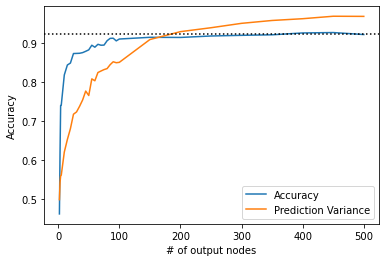

In [18]:
#output to CSV file
ae_df = pd.DataFrame(list(zip(component_list, component_acc, component_var))
                      ,columns = ['Component', 'Accuracy', 'Prediction Variance'])
print(ae_df)
pd.DataFrame(ae_df).to_csv('AE_one_layer_500_epochs_results.csv')

line1=plt.plot(component_list, component_acc)
line2 = plt.plot(component_list, component_var)
#line2=plt.plot(component_list, var_list)
plt.axhline(y=0.925, color = 'k', linestyle = ':')
plt.xlabel("# of output nodes")
plt.ylabel("Accuracy")
plt.legend((line1[0], line2[0]), ('Accuracy', 'Prediction Variance'))
#plt.legend((line1[0]), ('Accuracy'))
plt.show()